In [1]:
%pylab inline
from ultralytics import YOLO
from glob import glob
import os
import pandas as pd
import cv2
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
stage1_model = YOLO('/home/etriai04/Downloads/Pseudanabaena/best.pt')
stage2_model = YOLO('/home/etriai04/Downloads/cell_count_data/runs/detect/train12/weights/best.pt')

  0%|                                                                                                                                          | 0/11 [00:00<?, ?it/s]

(327, 107, 3)


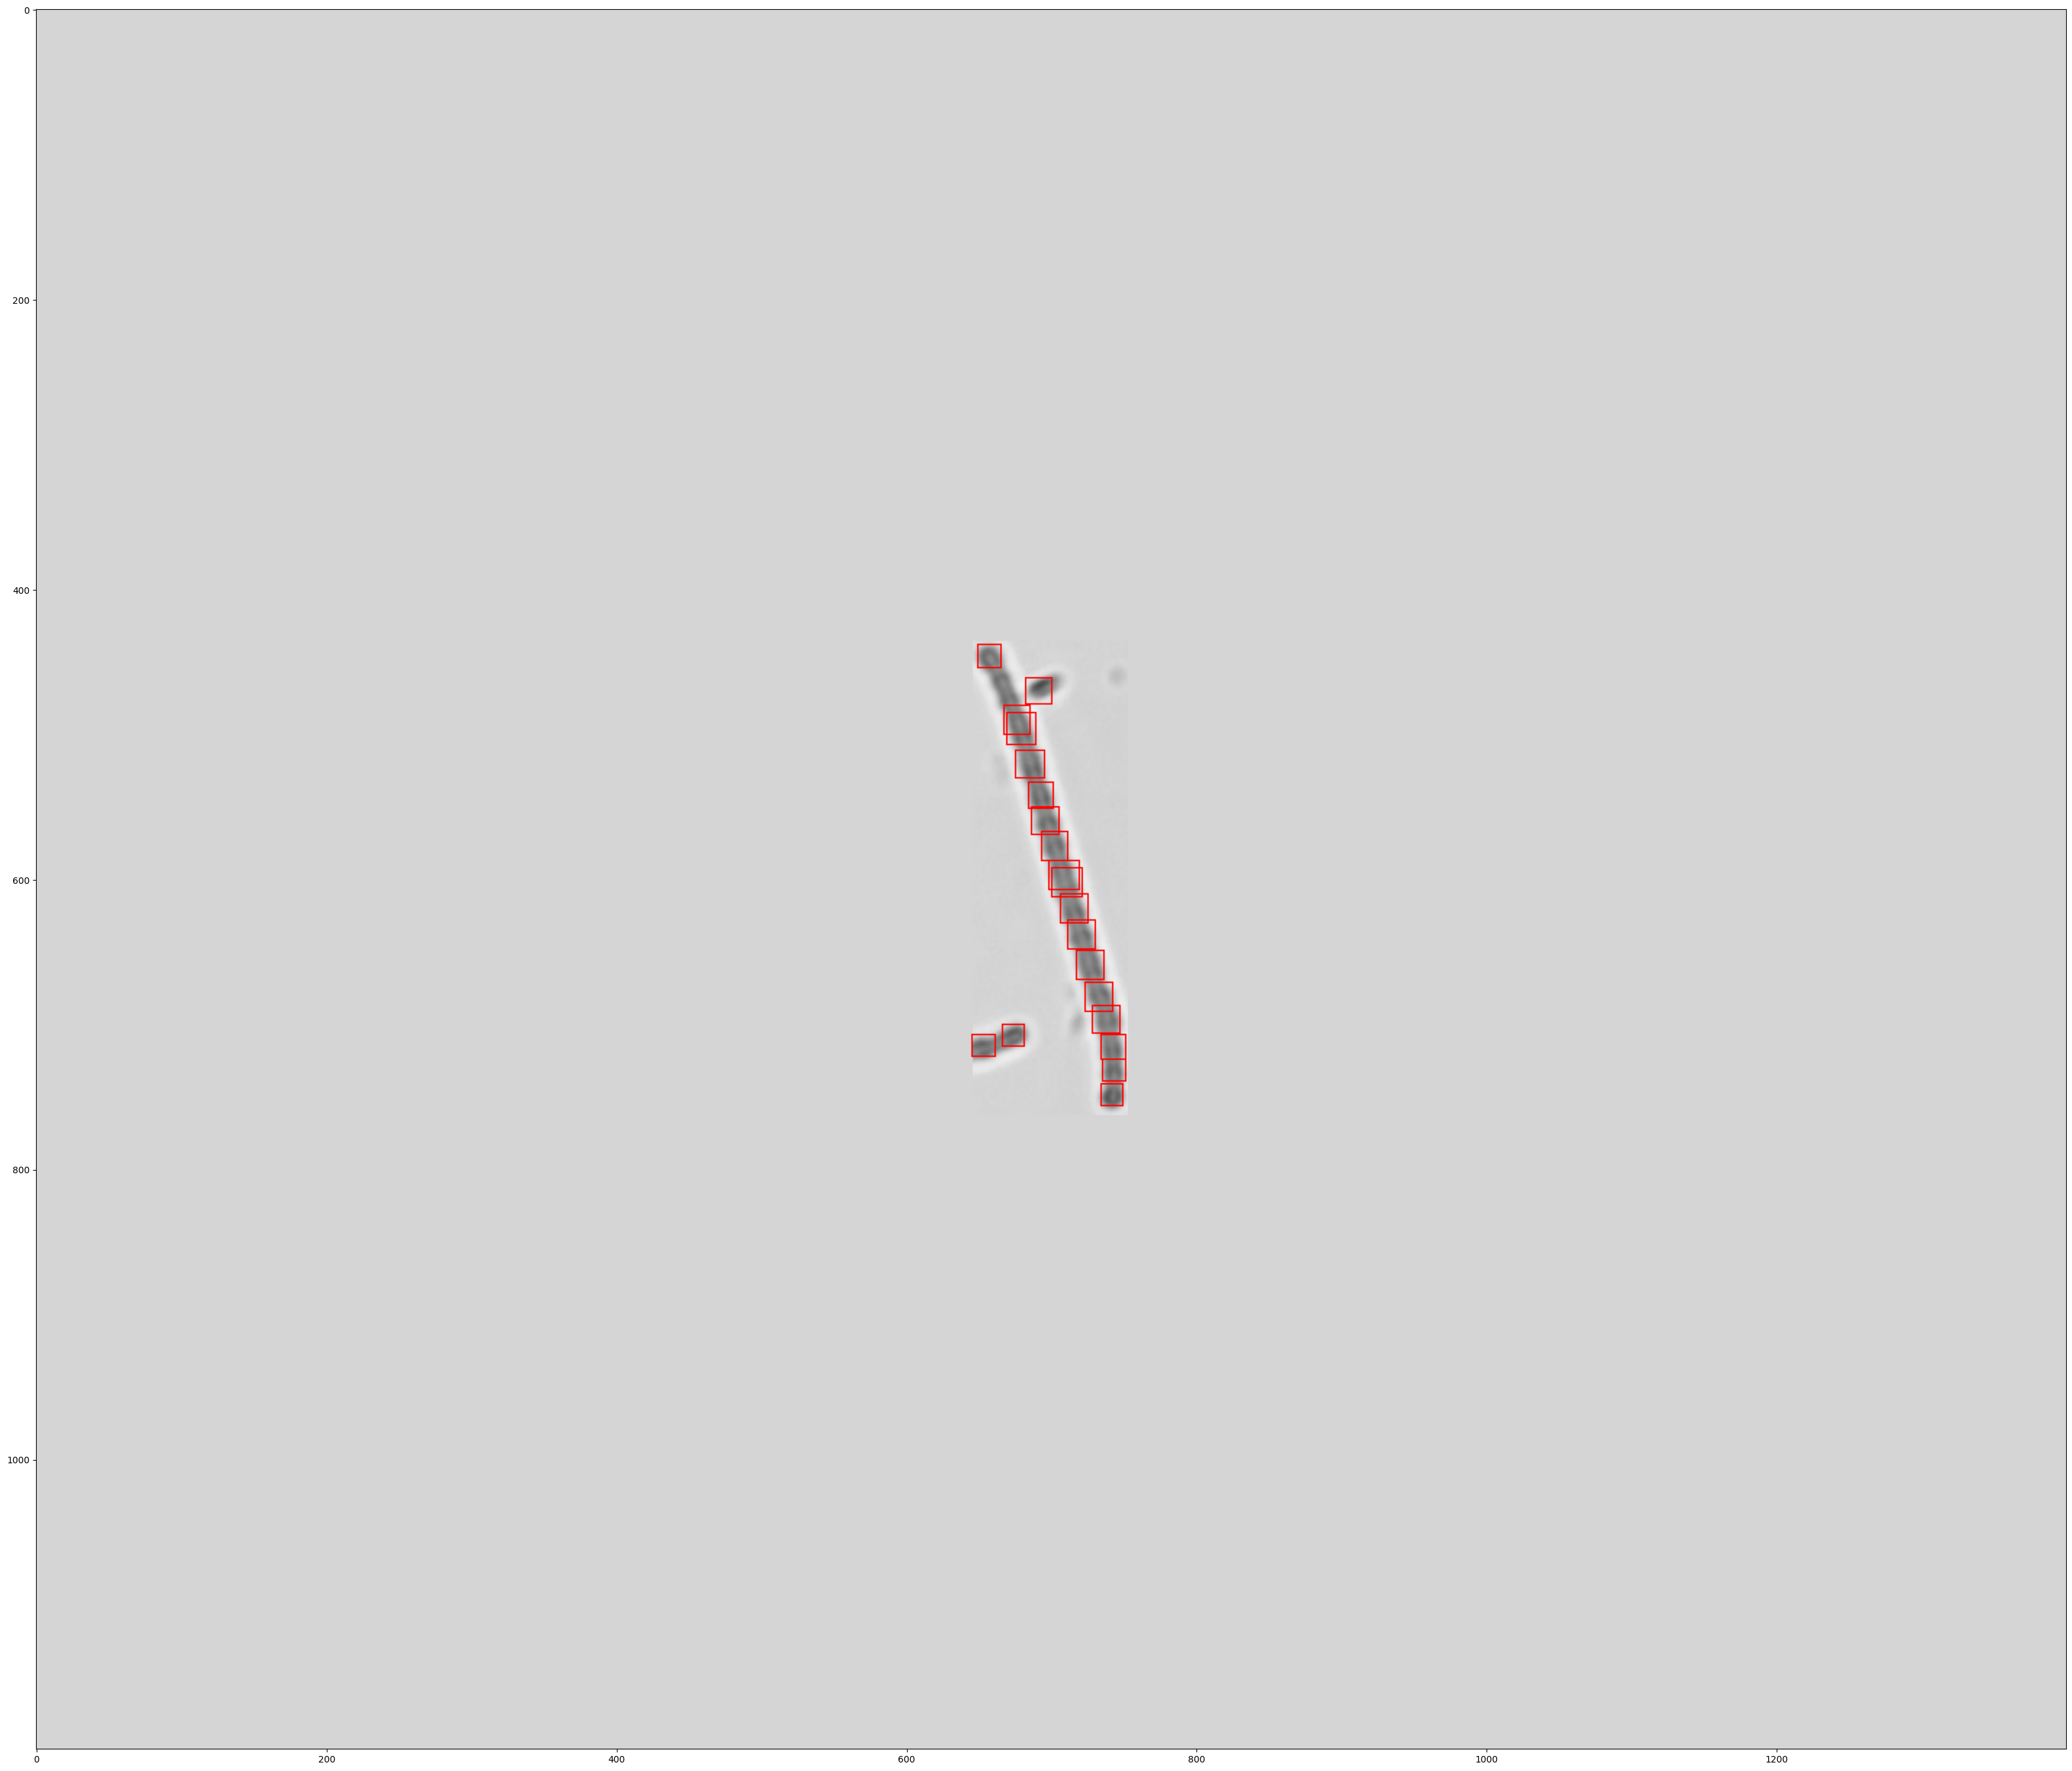

(35, 67, 3)


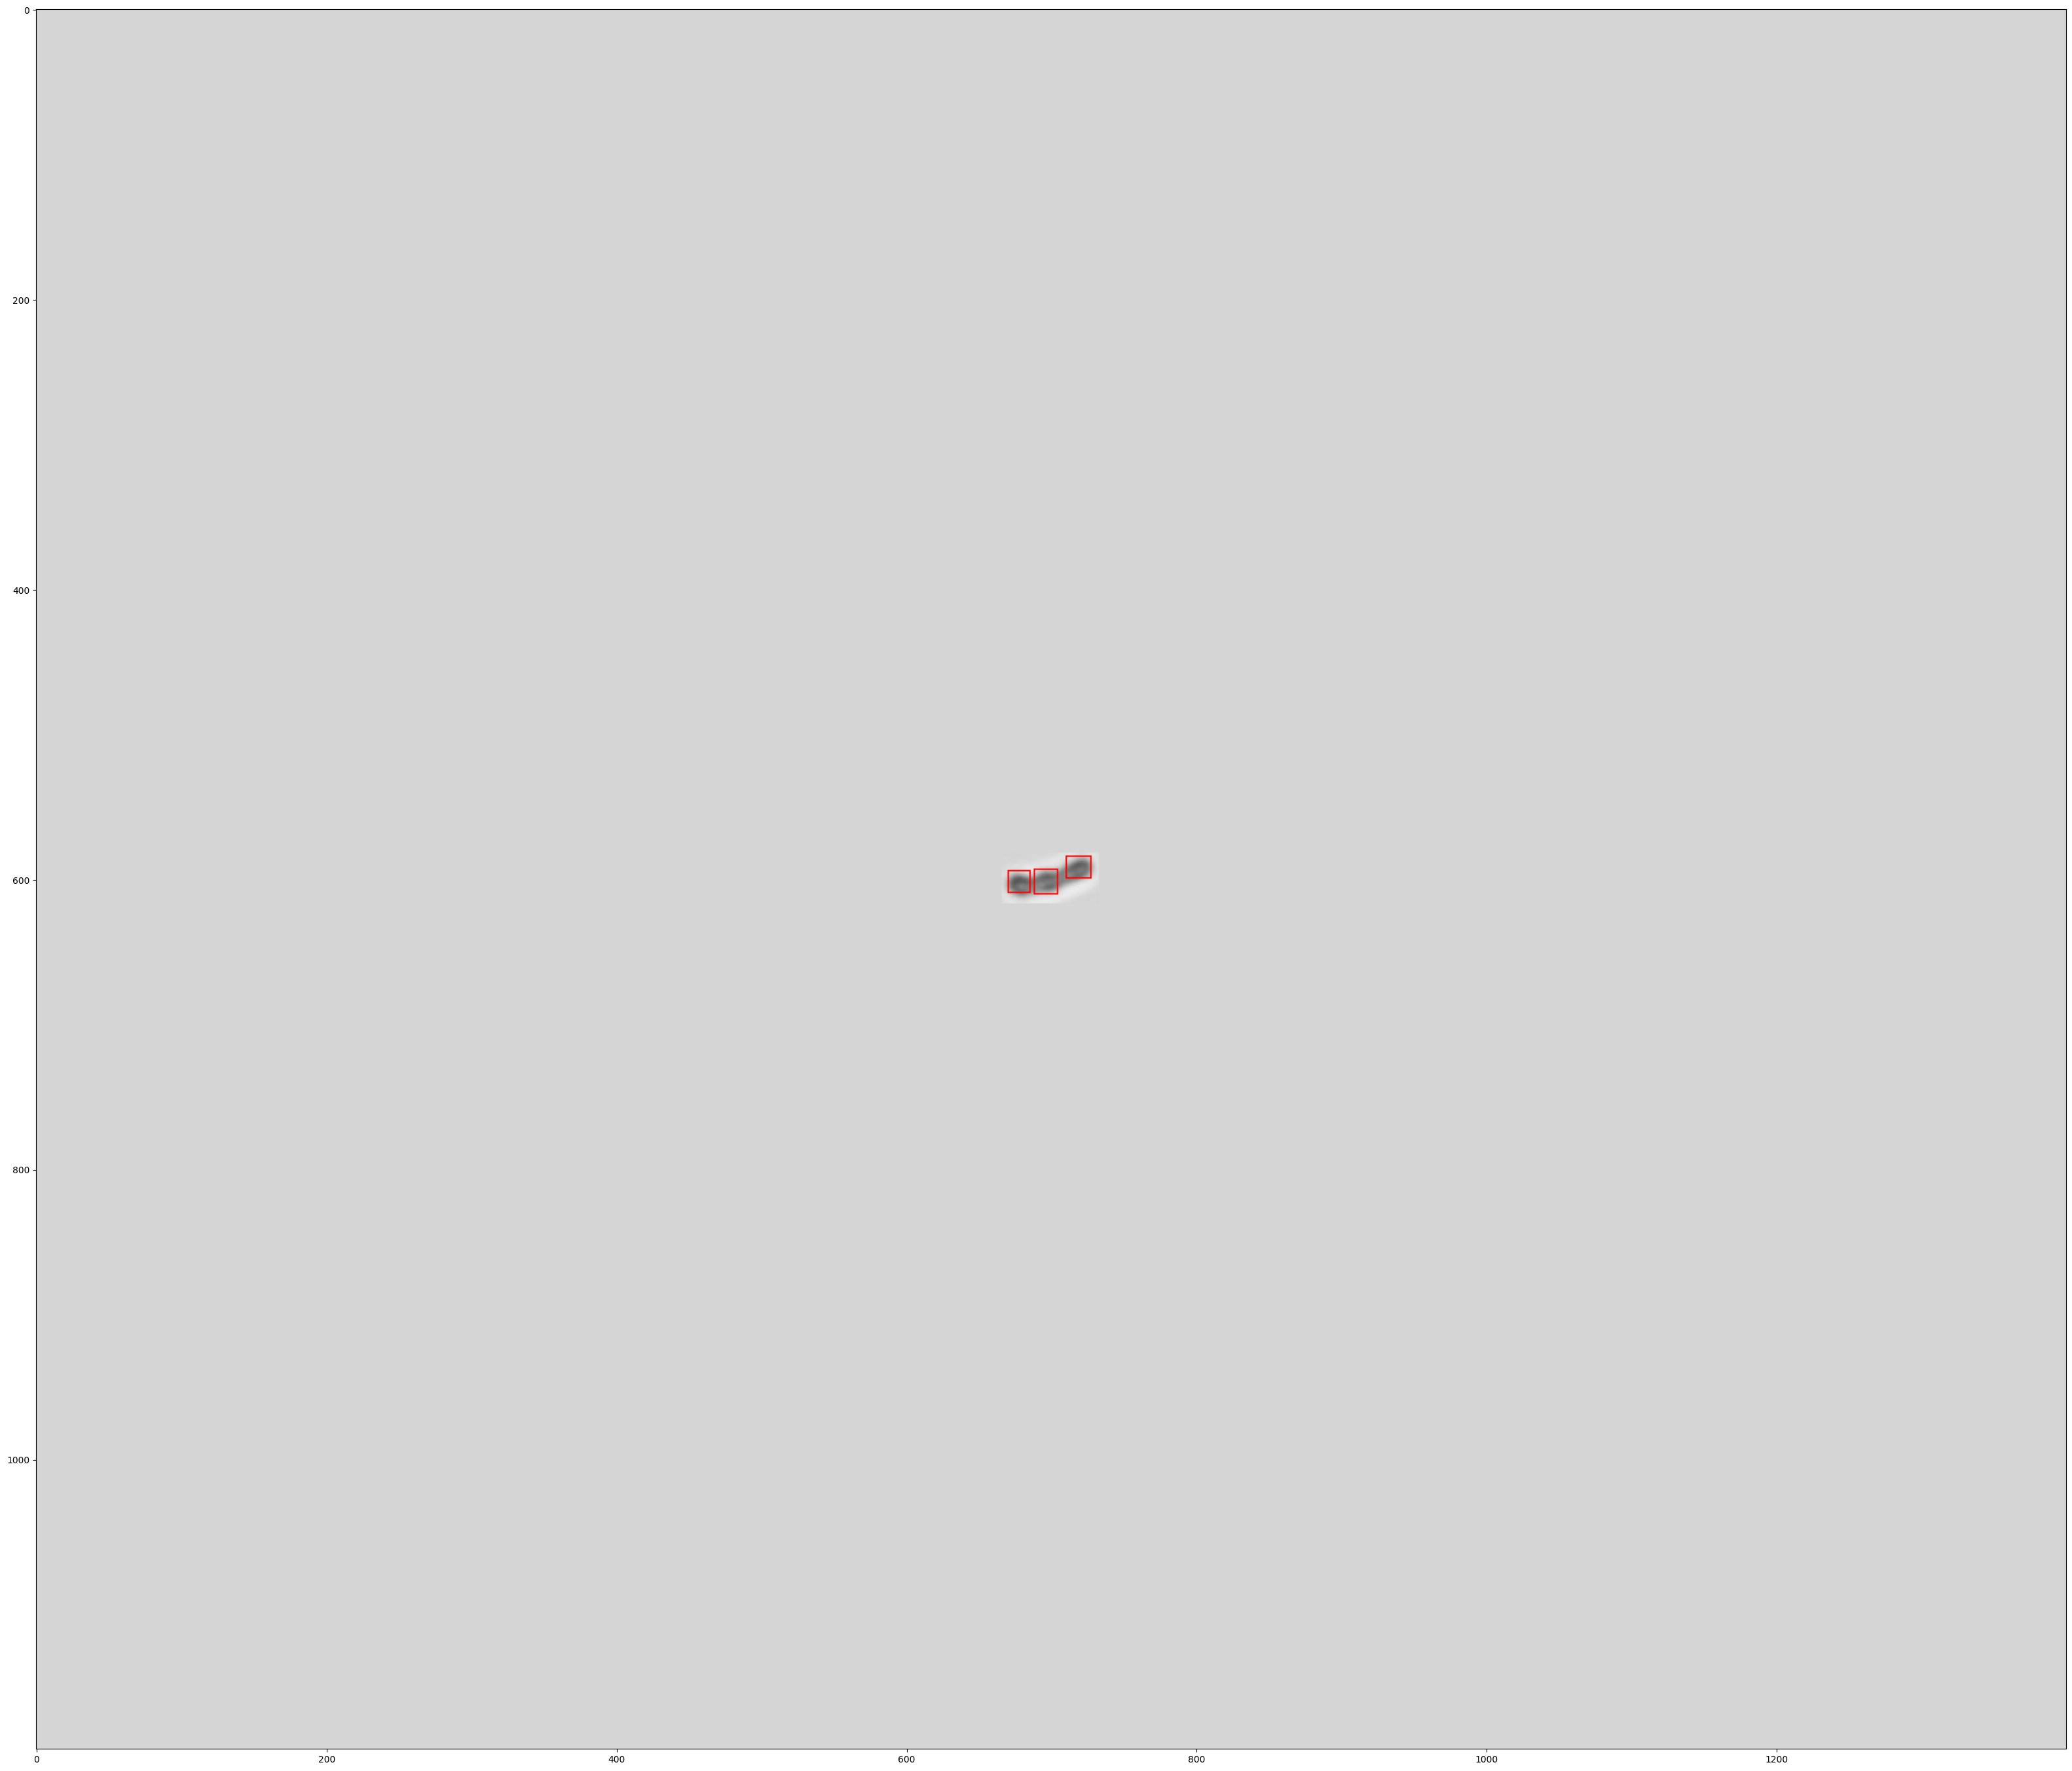

(53, 27, 3)


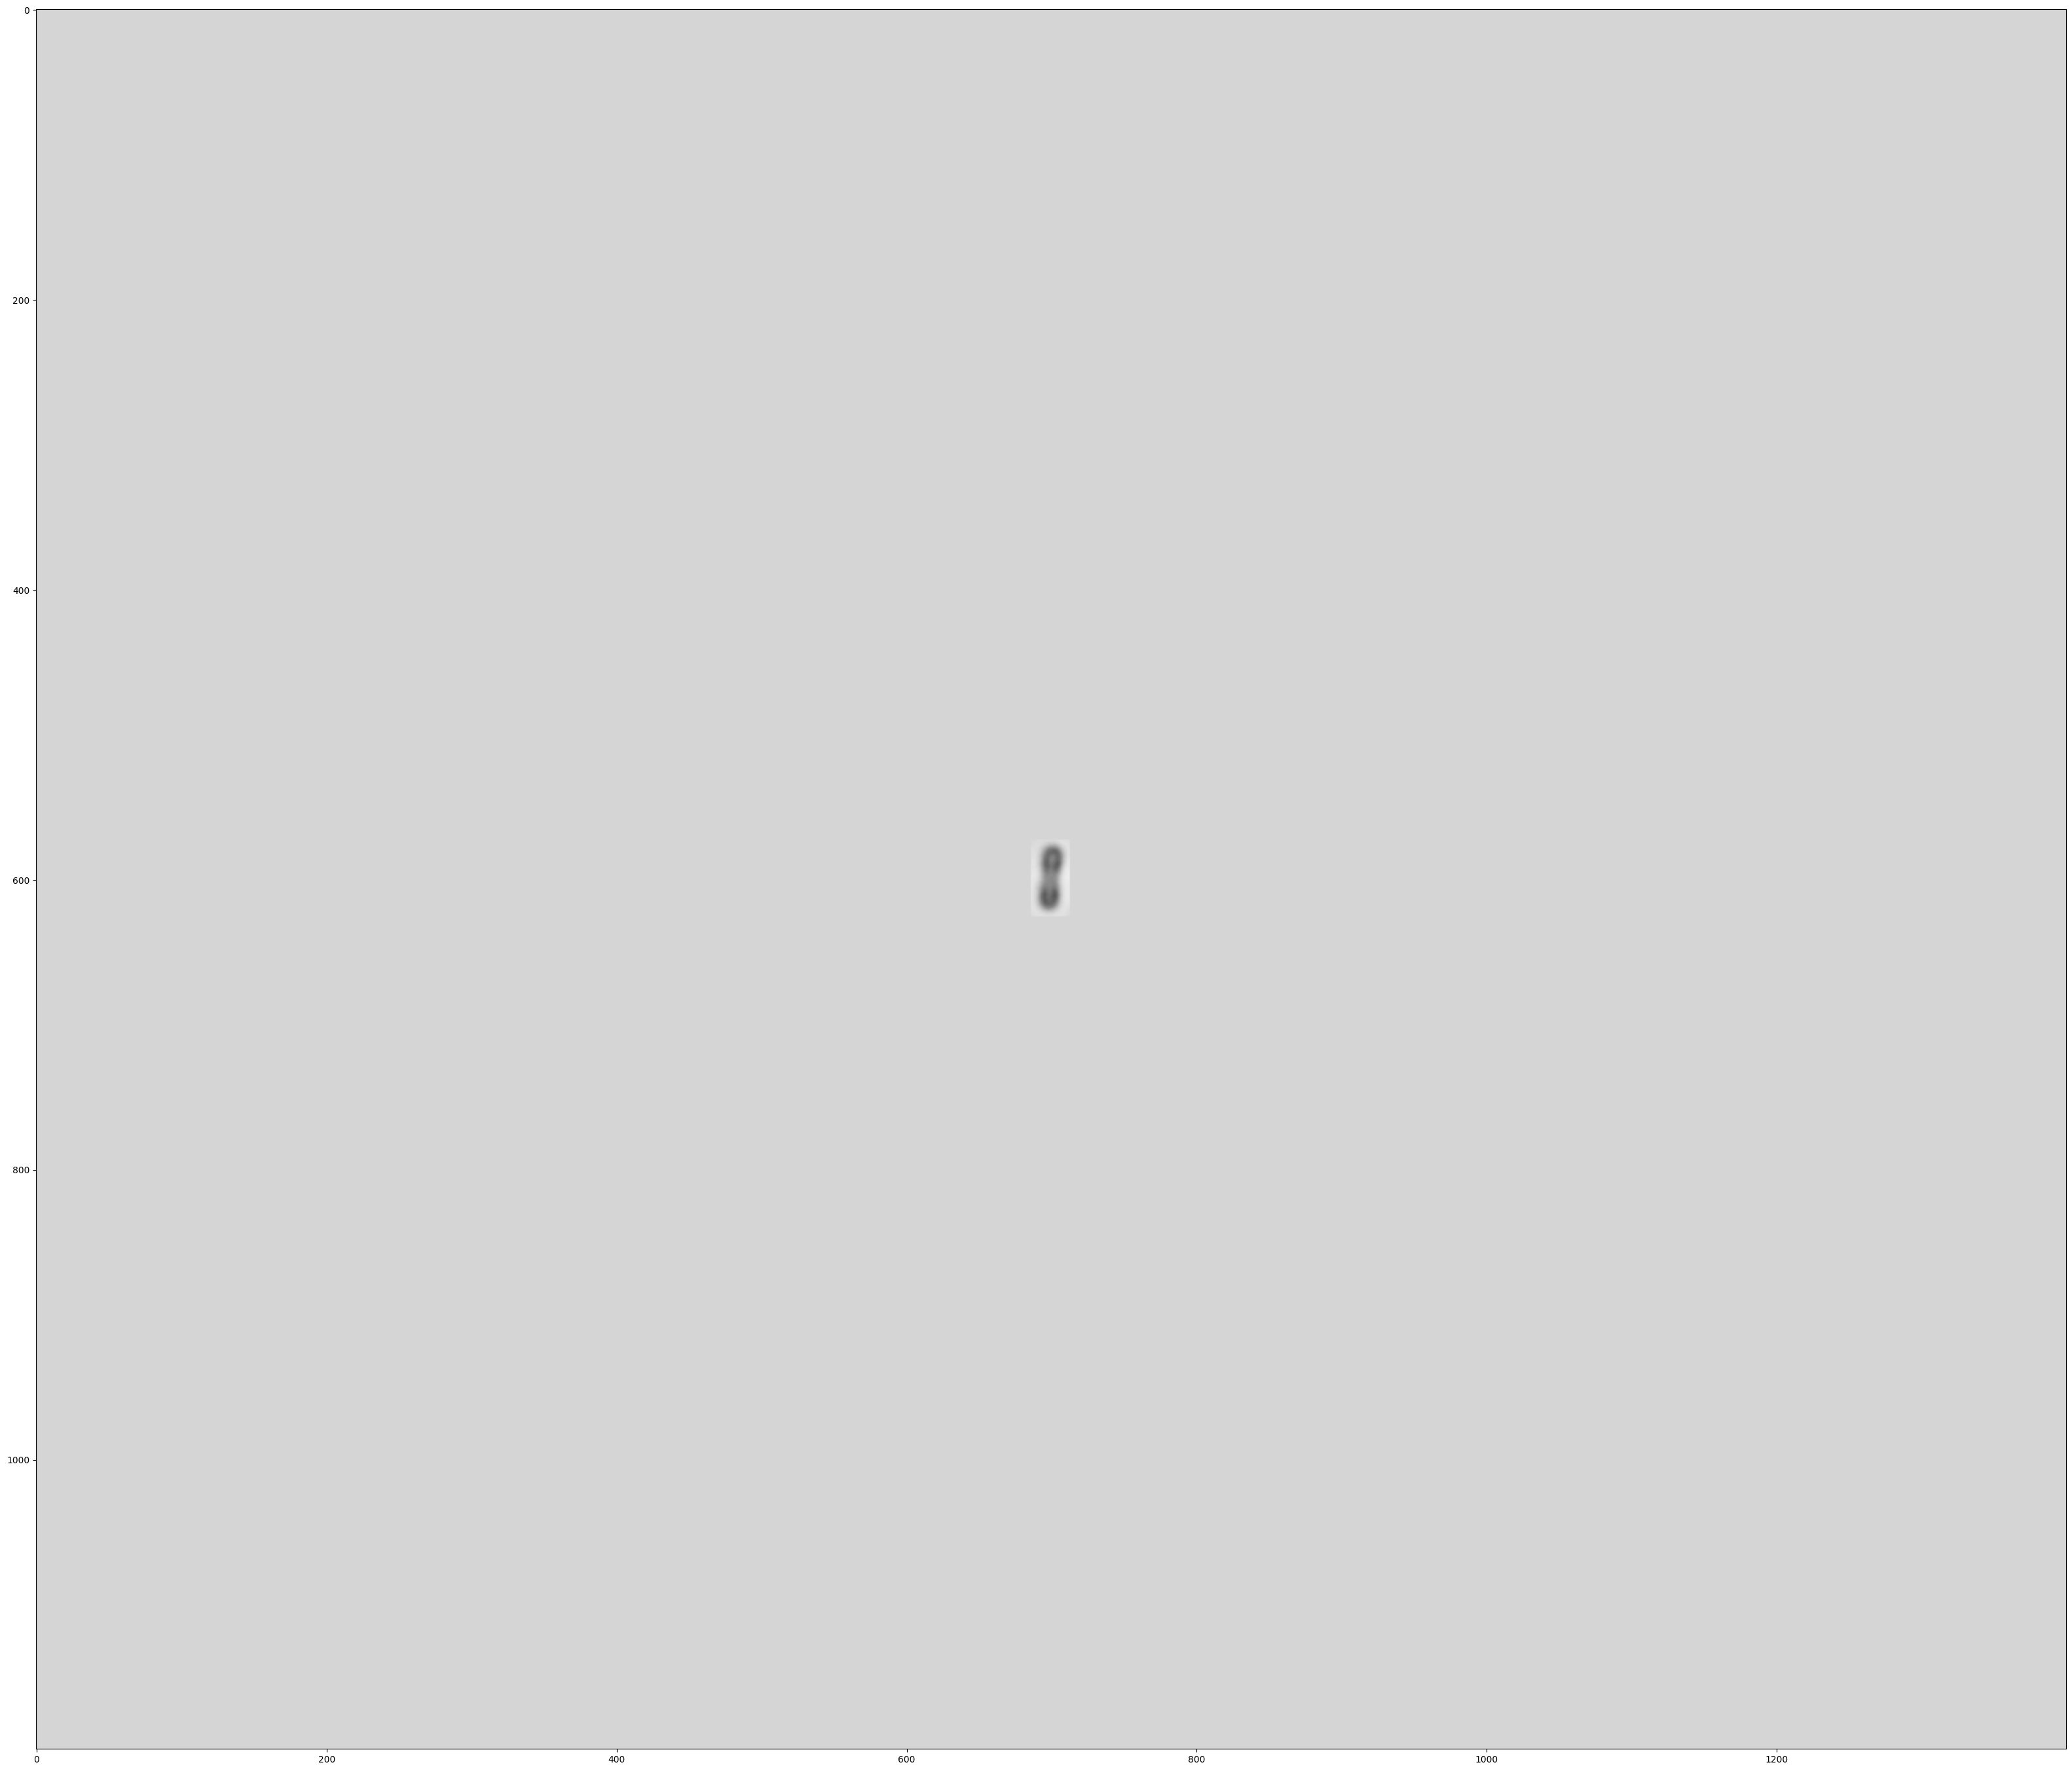

  9%|███████████▊                                                                                                                      | 1/11 [00:04<00:42,  4.30s/it]

(579, 639, 3)


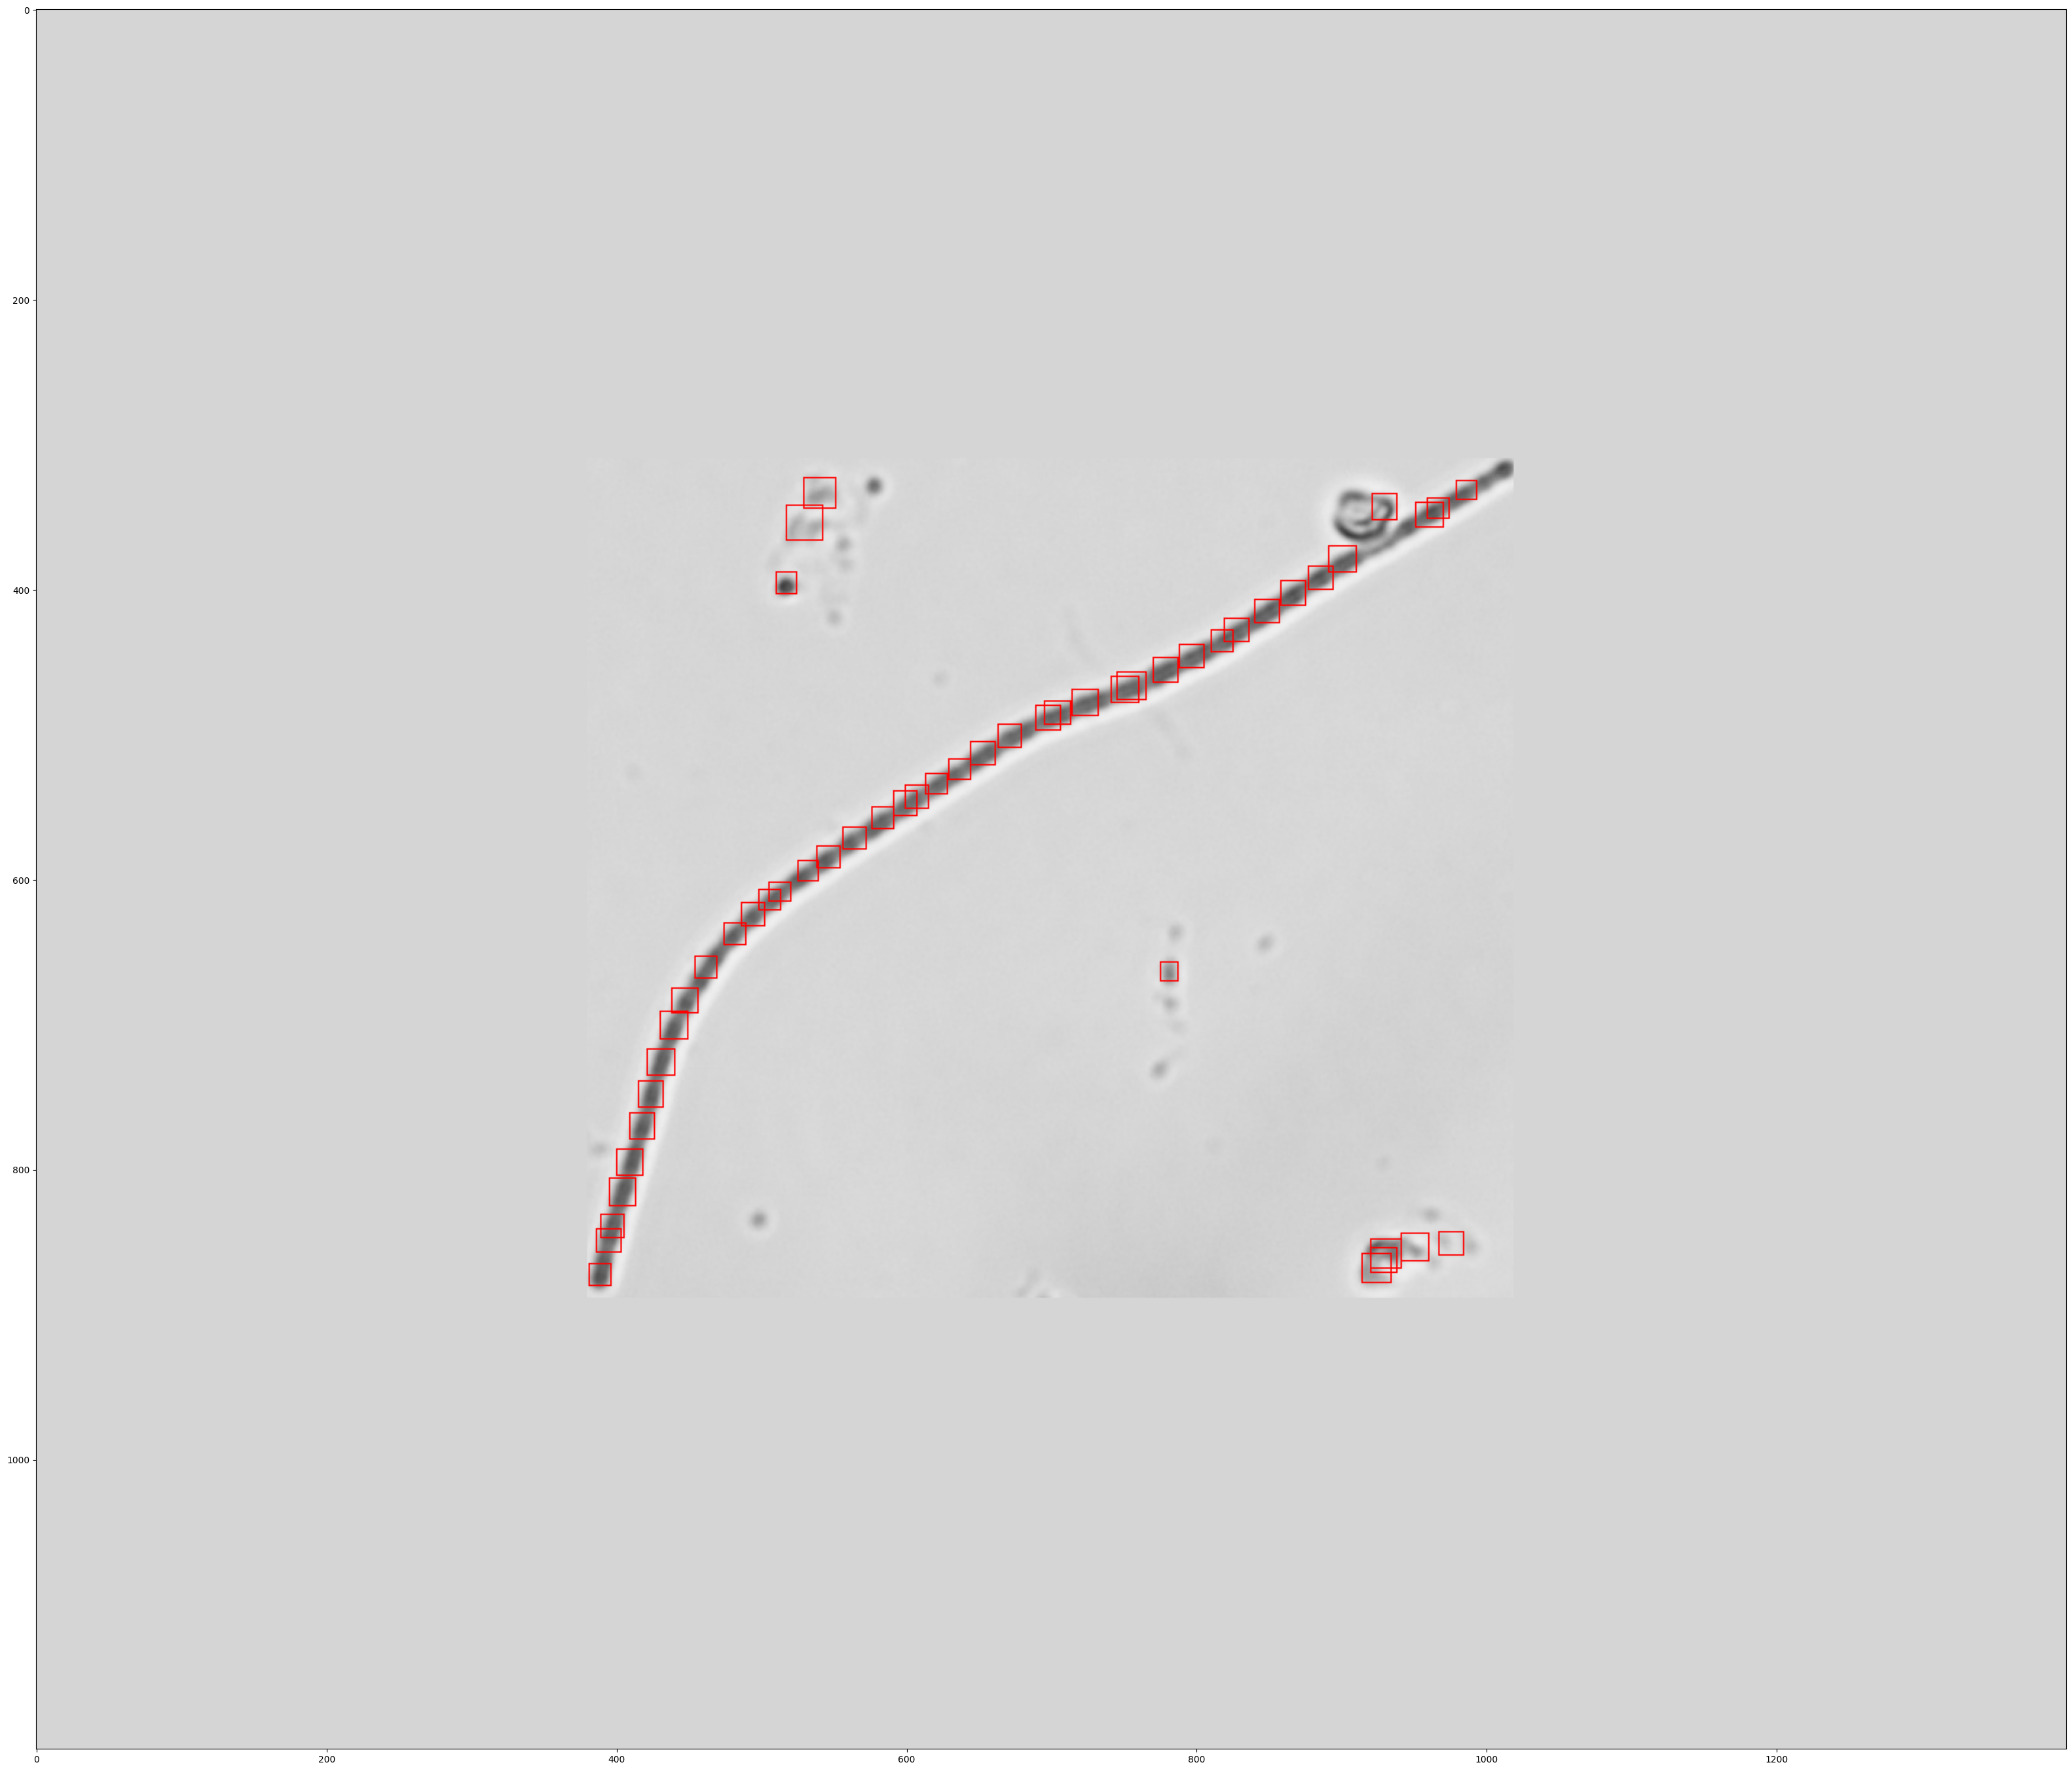

(54, 117, 3)


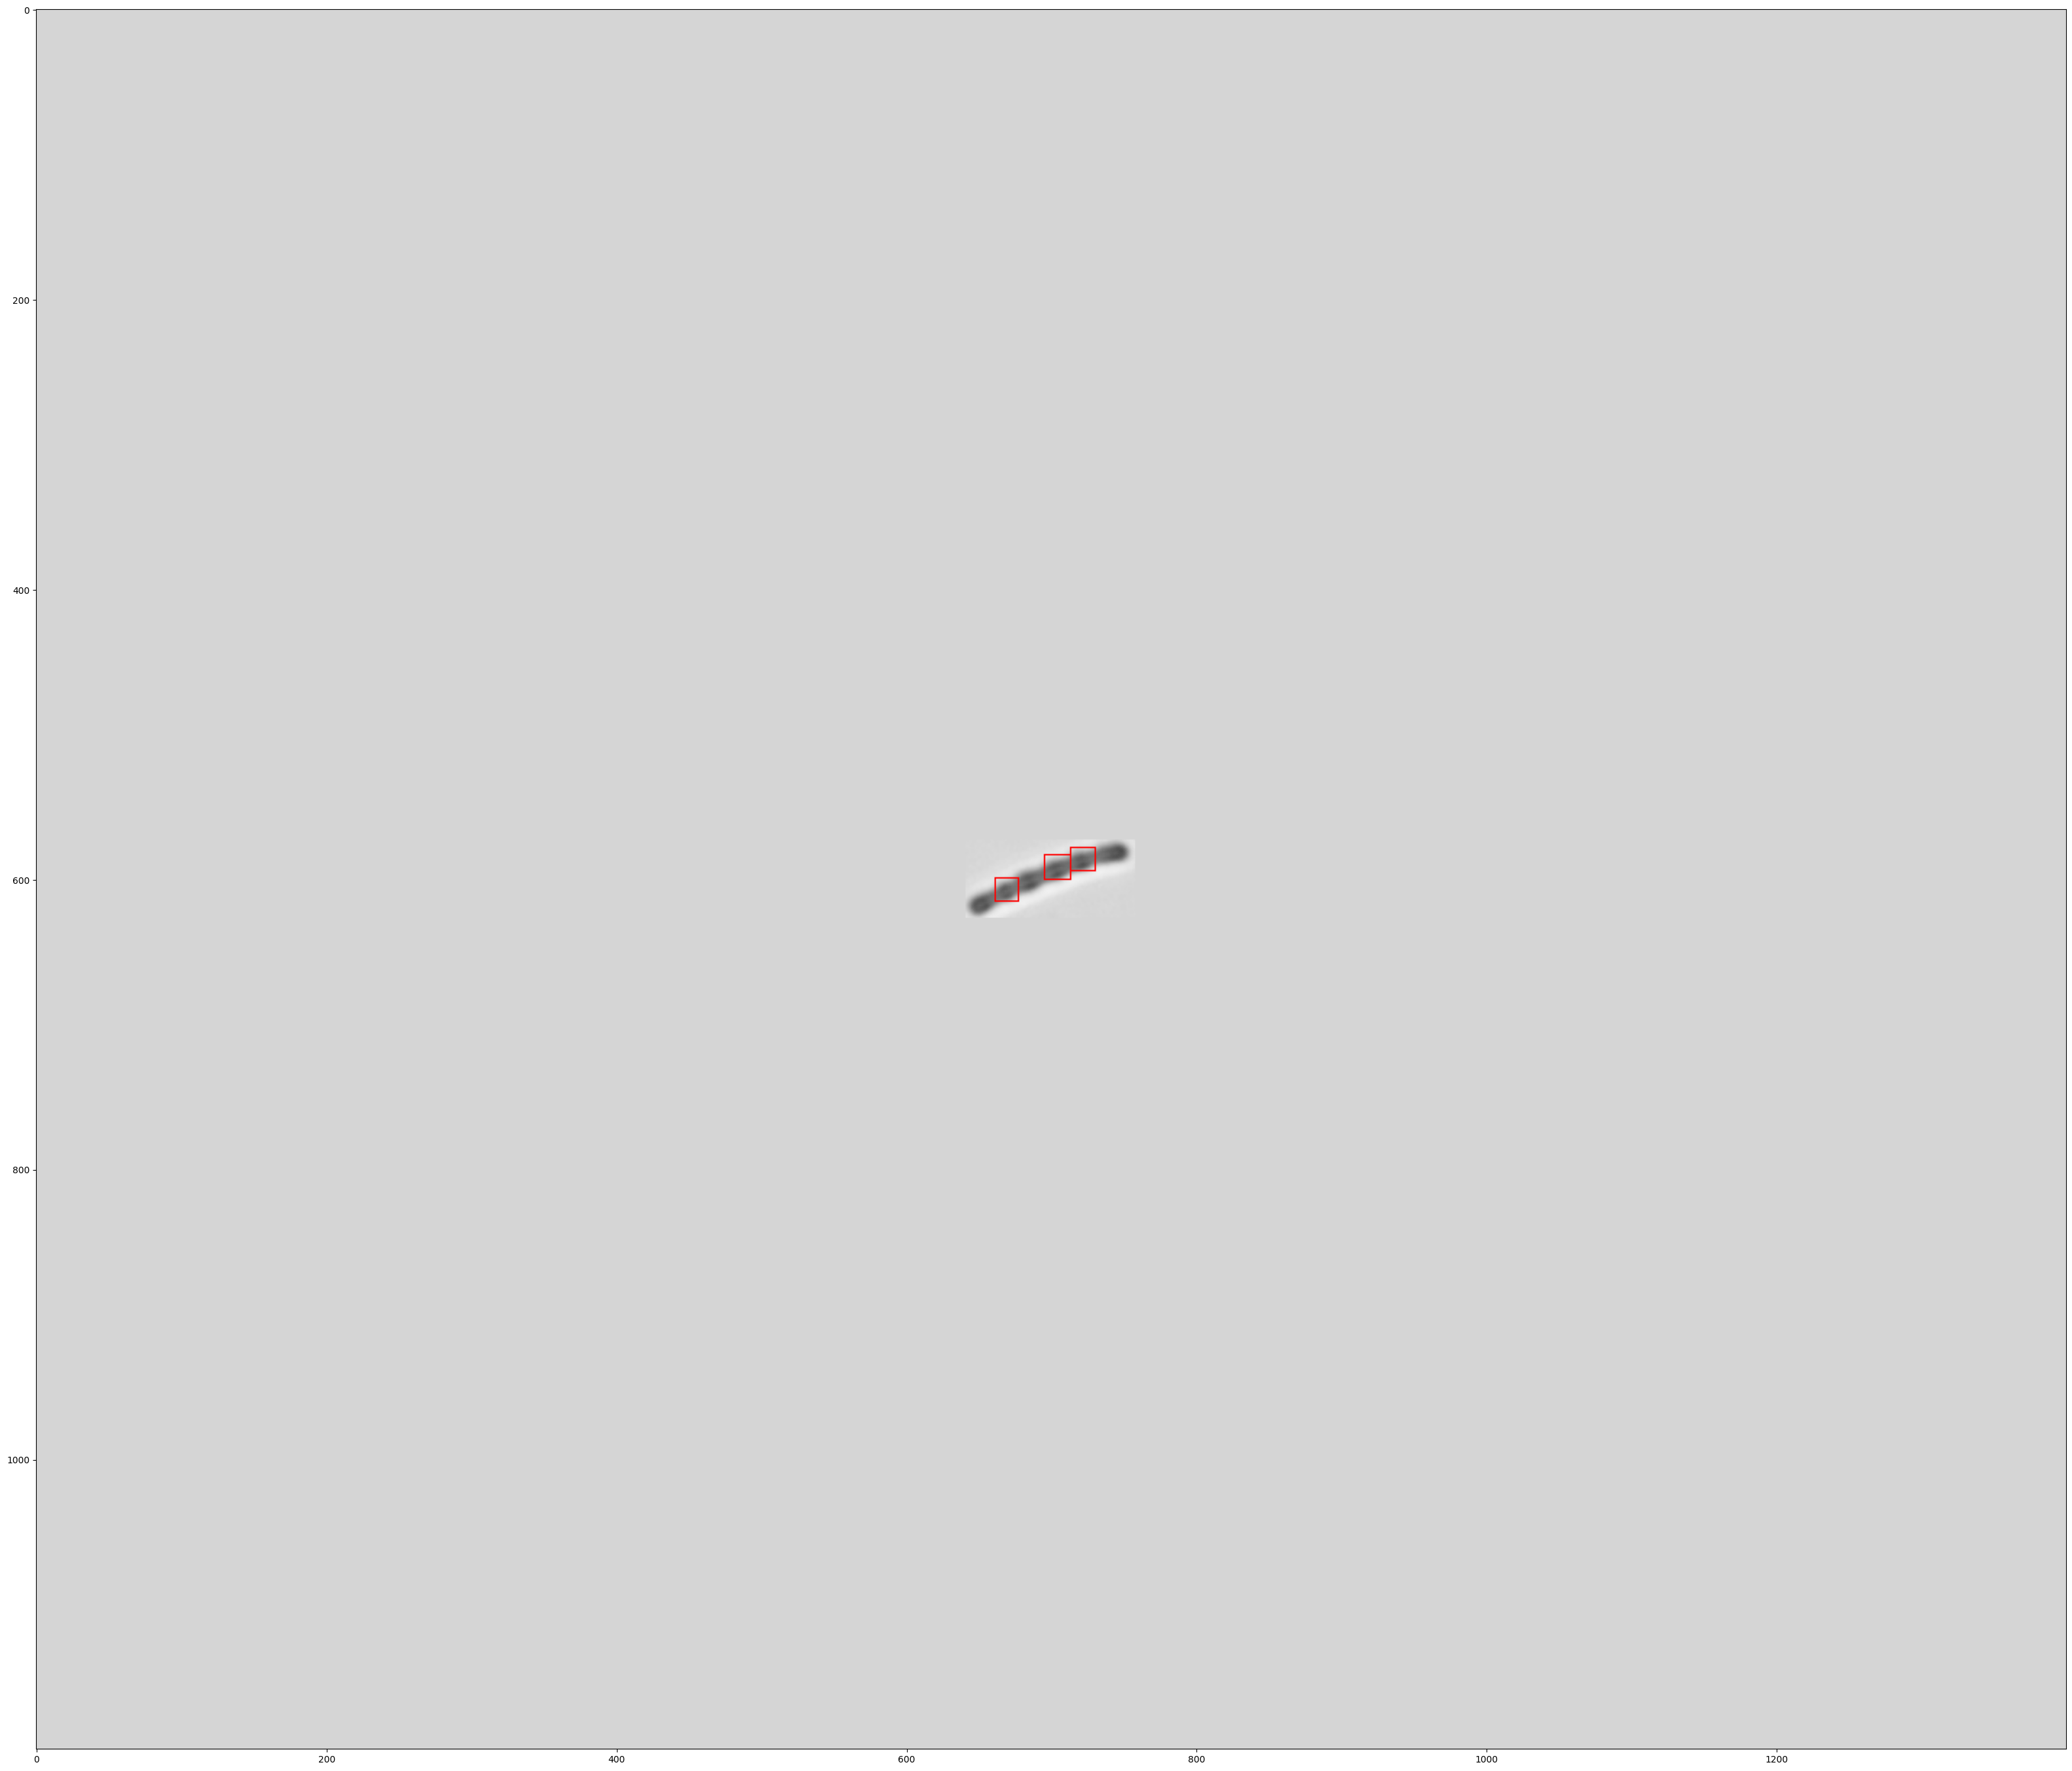

 18%|███████████████████████▋                                                                                                          | 2/11 [00:07<00:32,  3.56s/it]

(141, 96, 3)


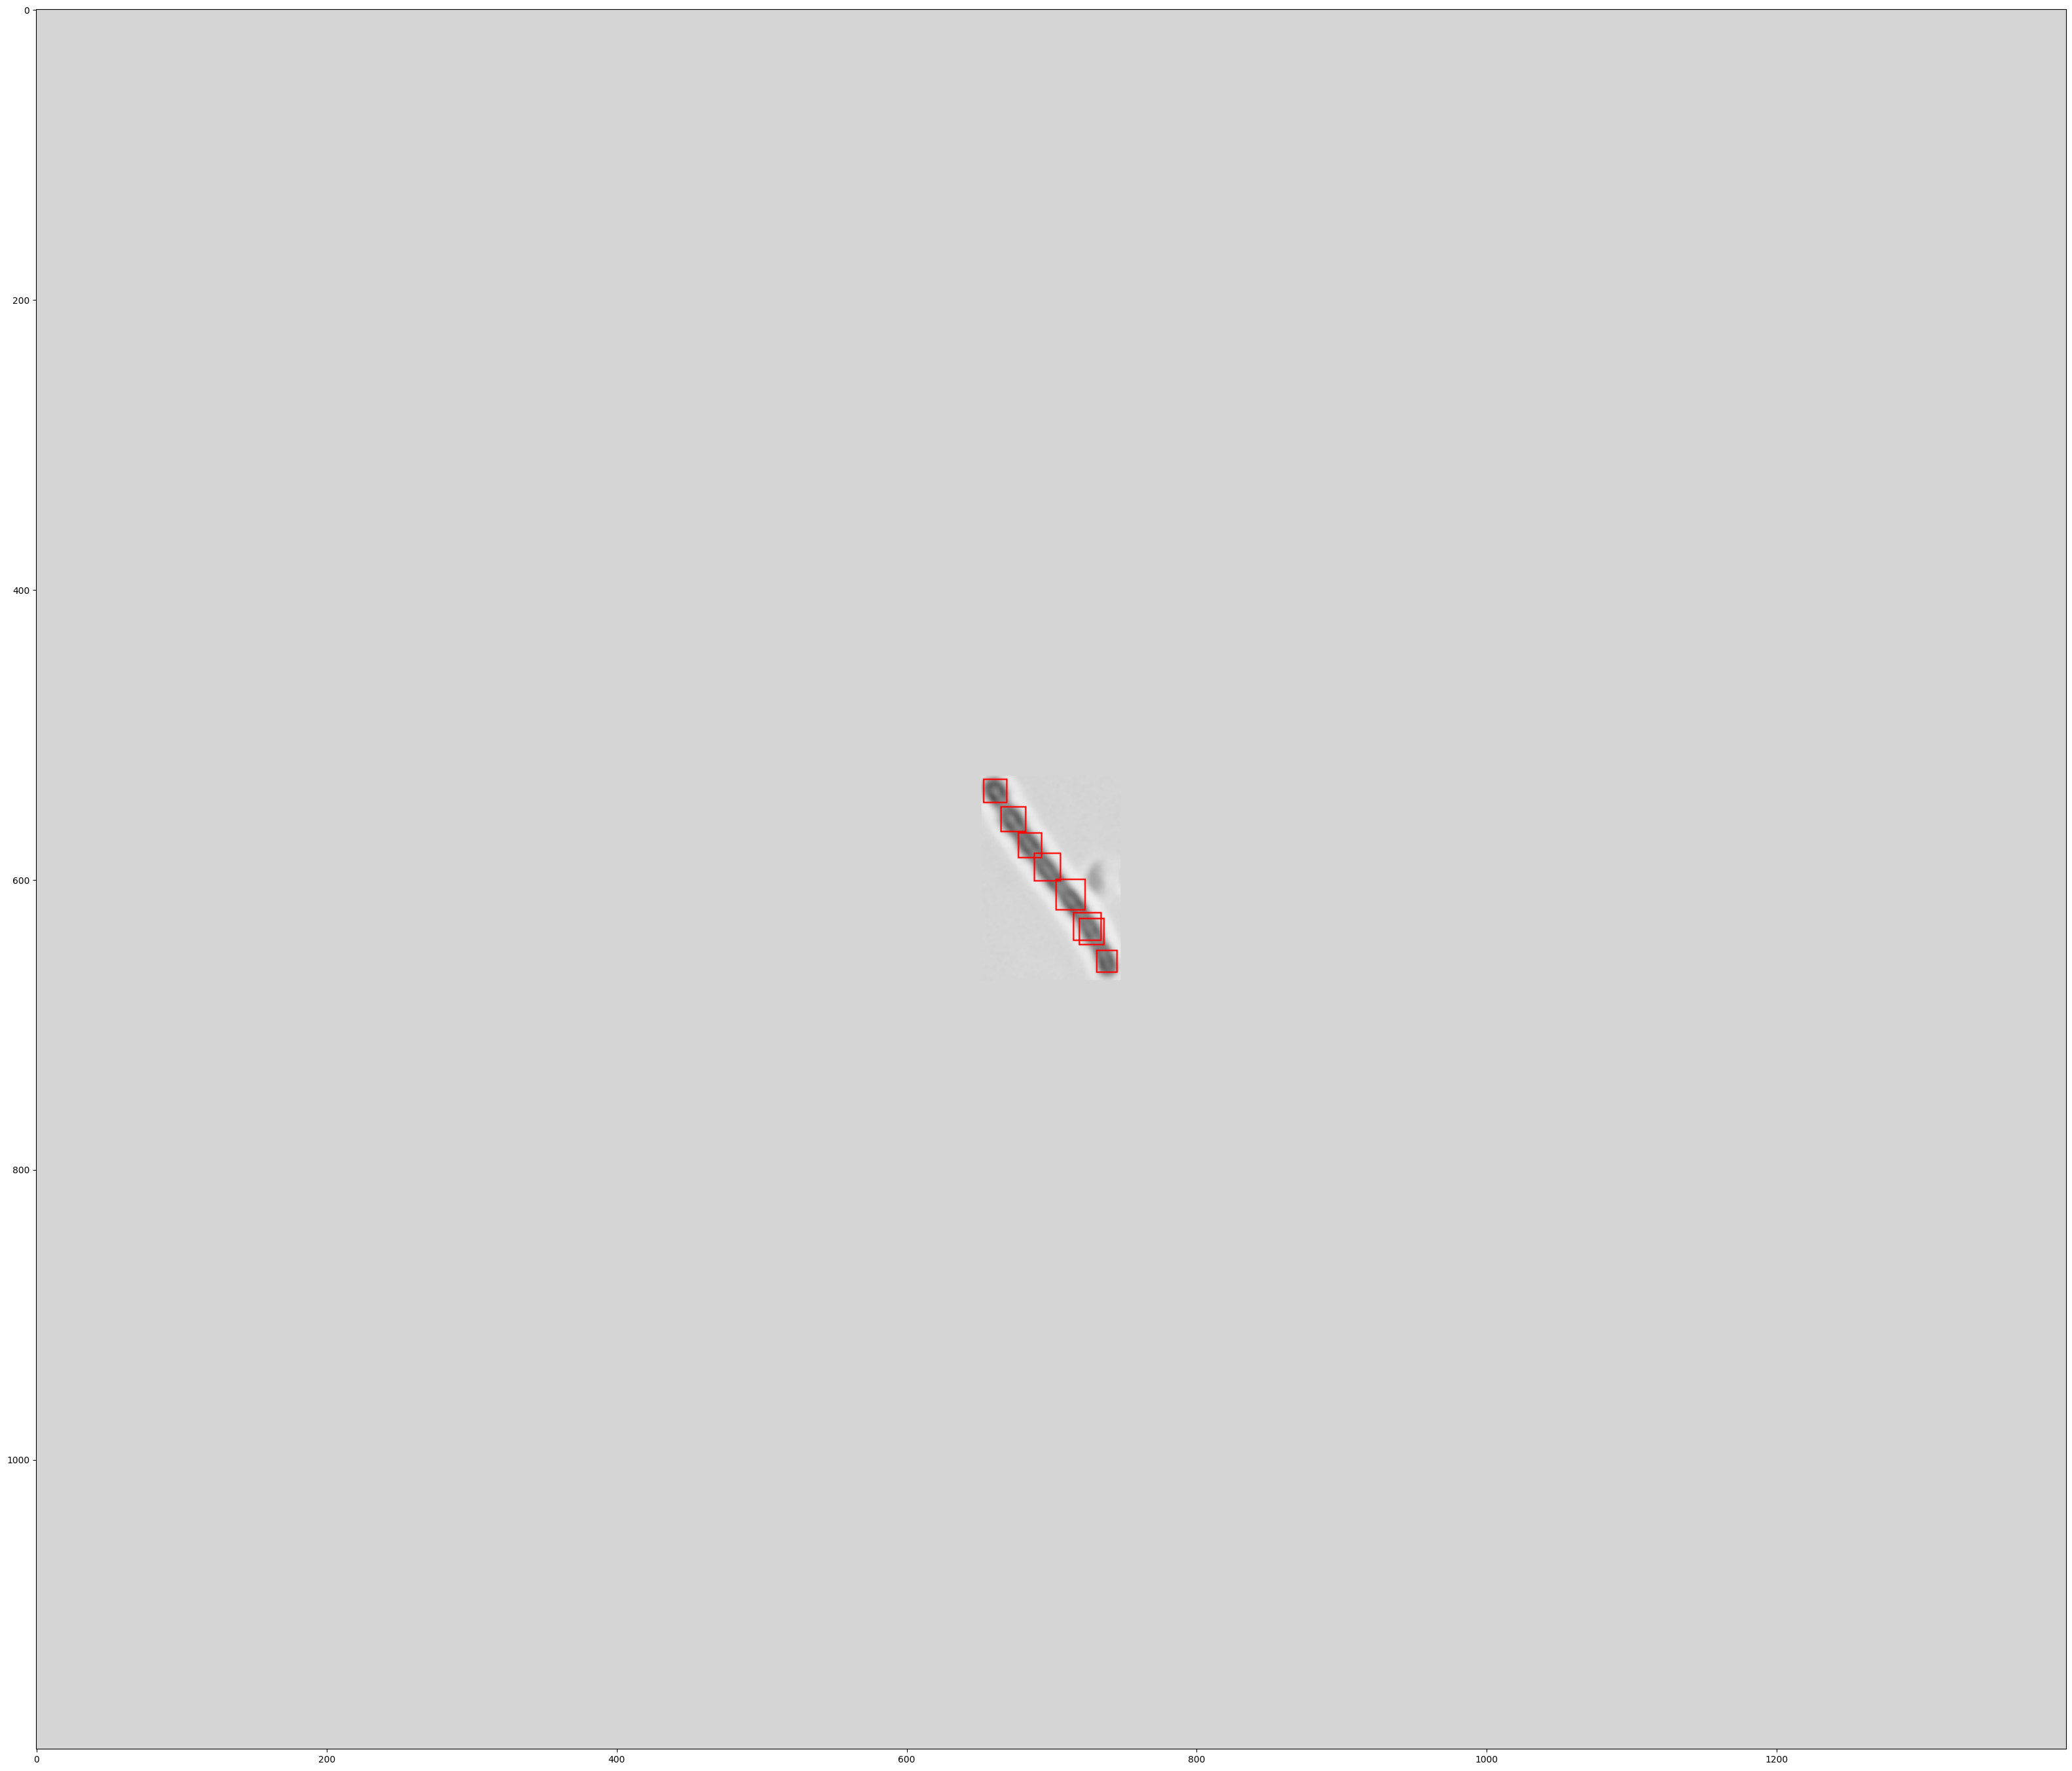

(115, 36, 3)


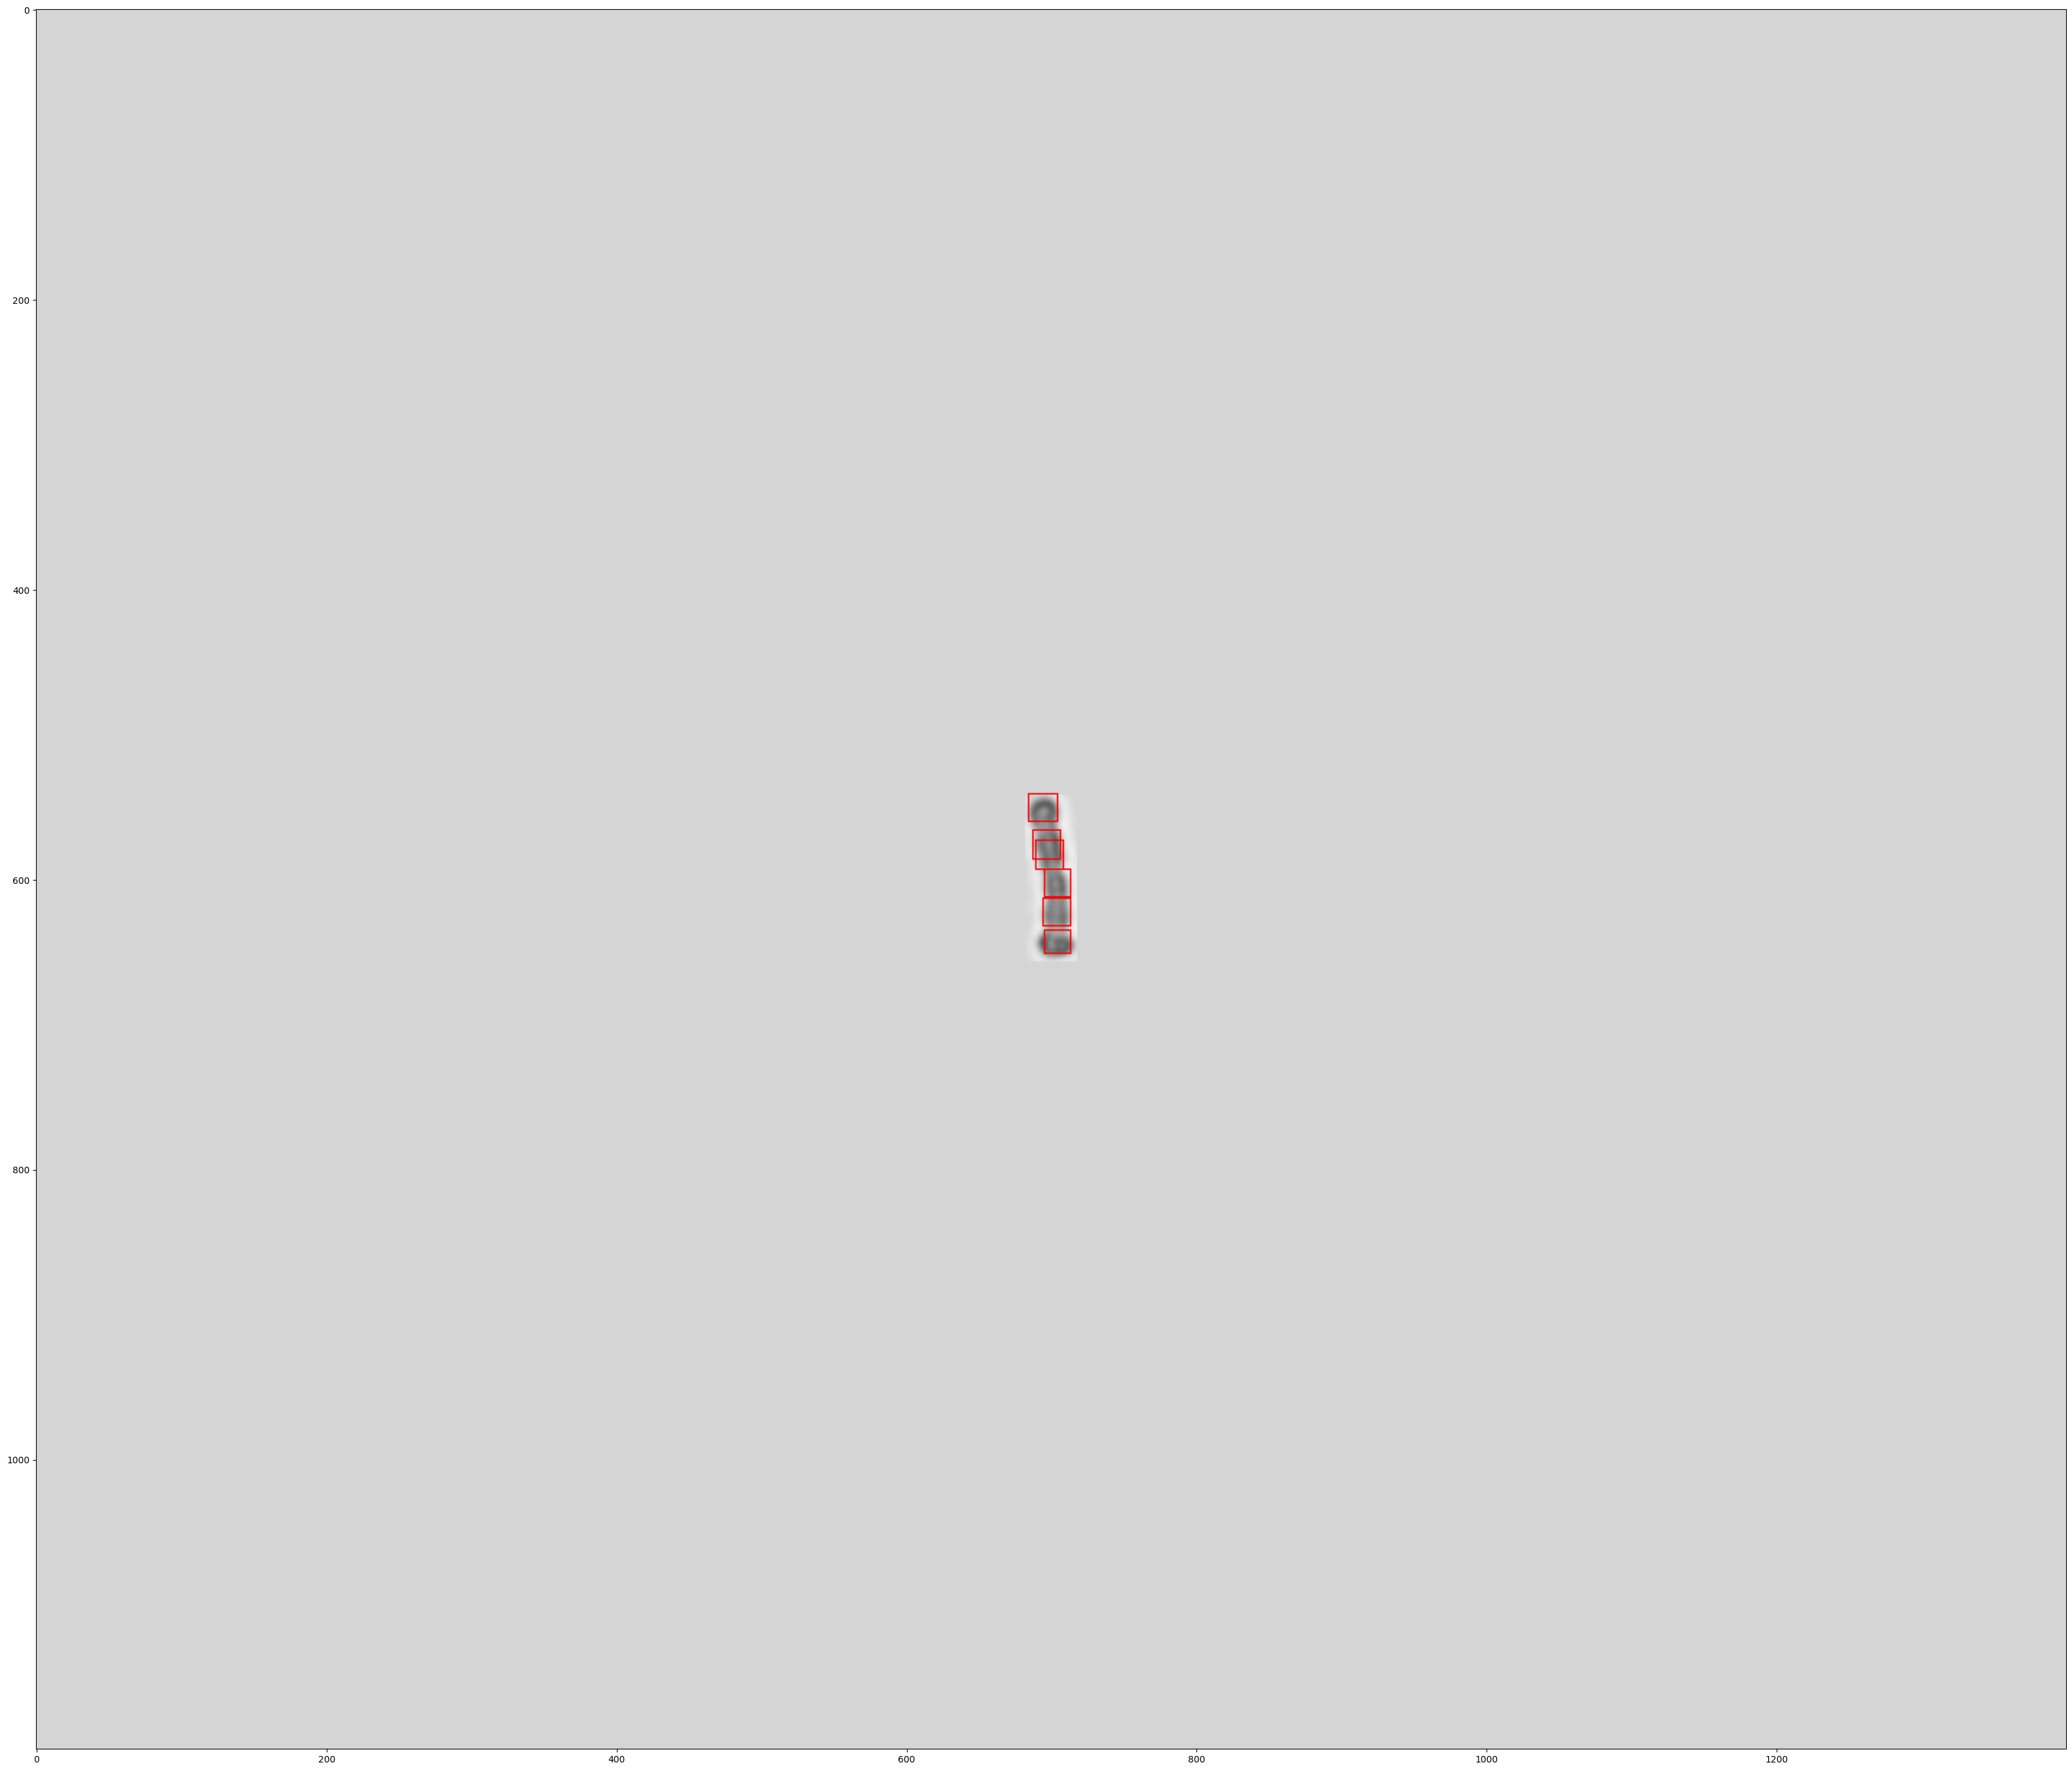

(39, 30, 3)


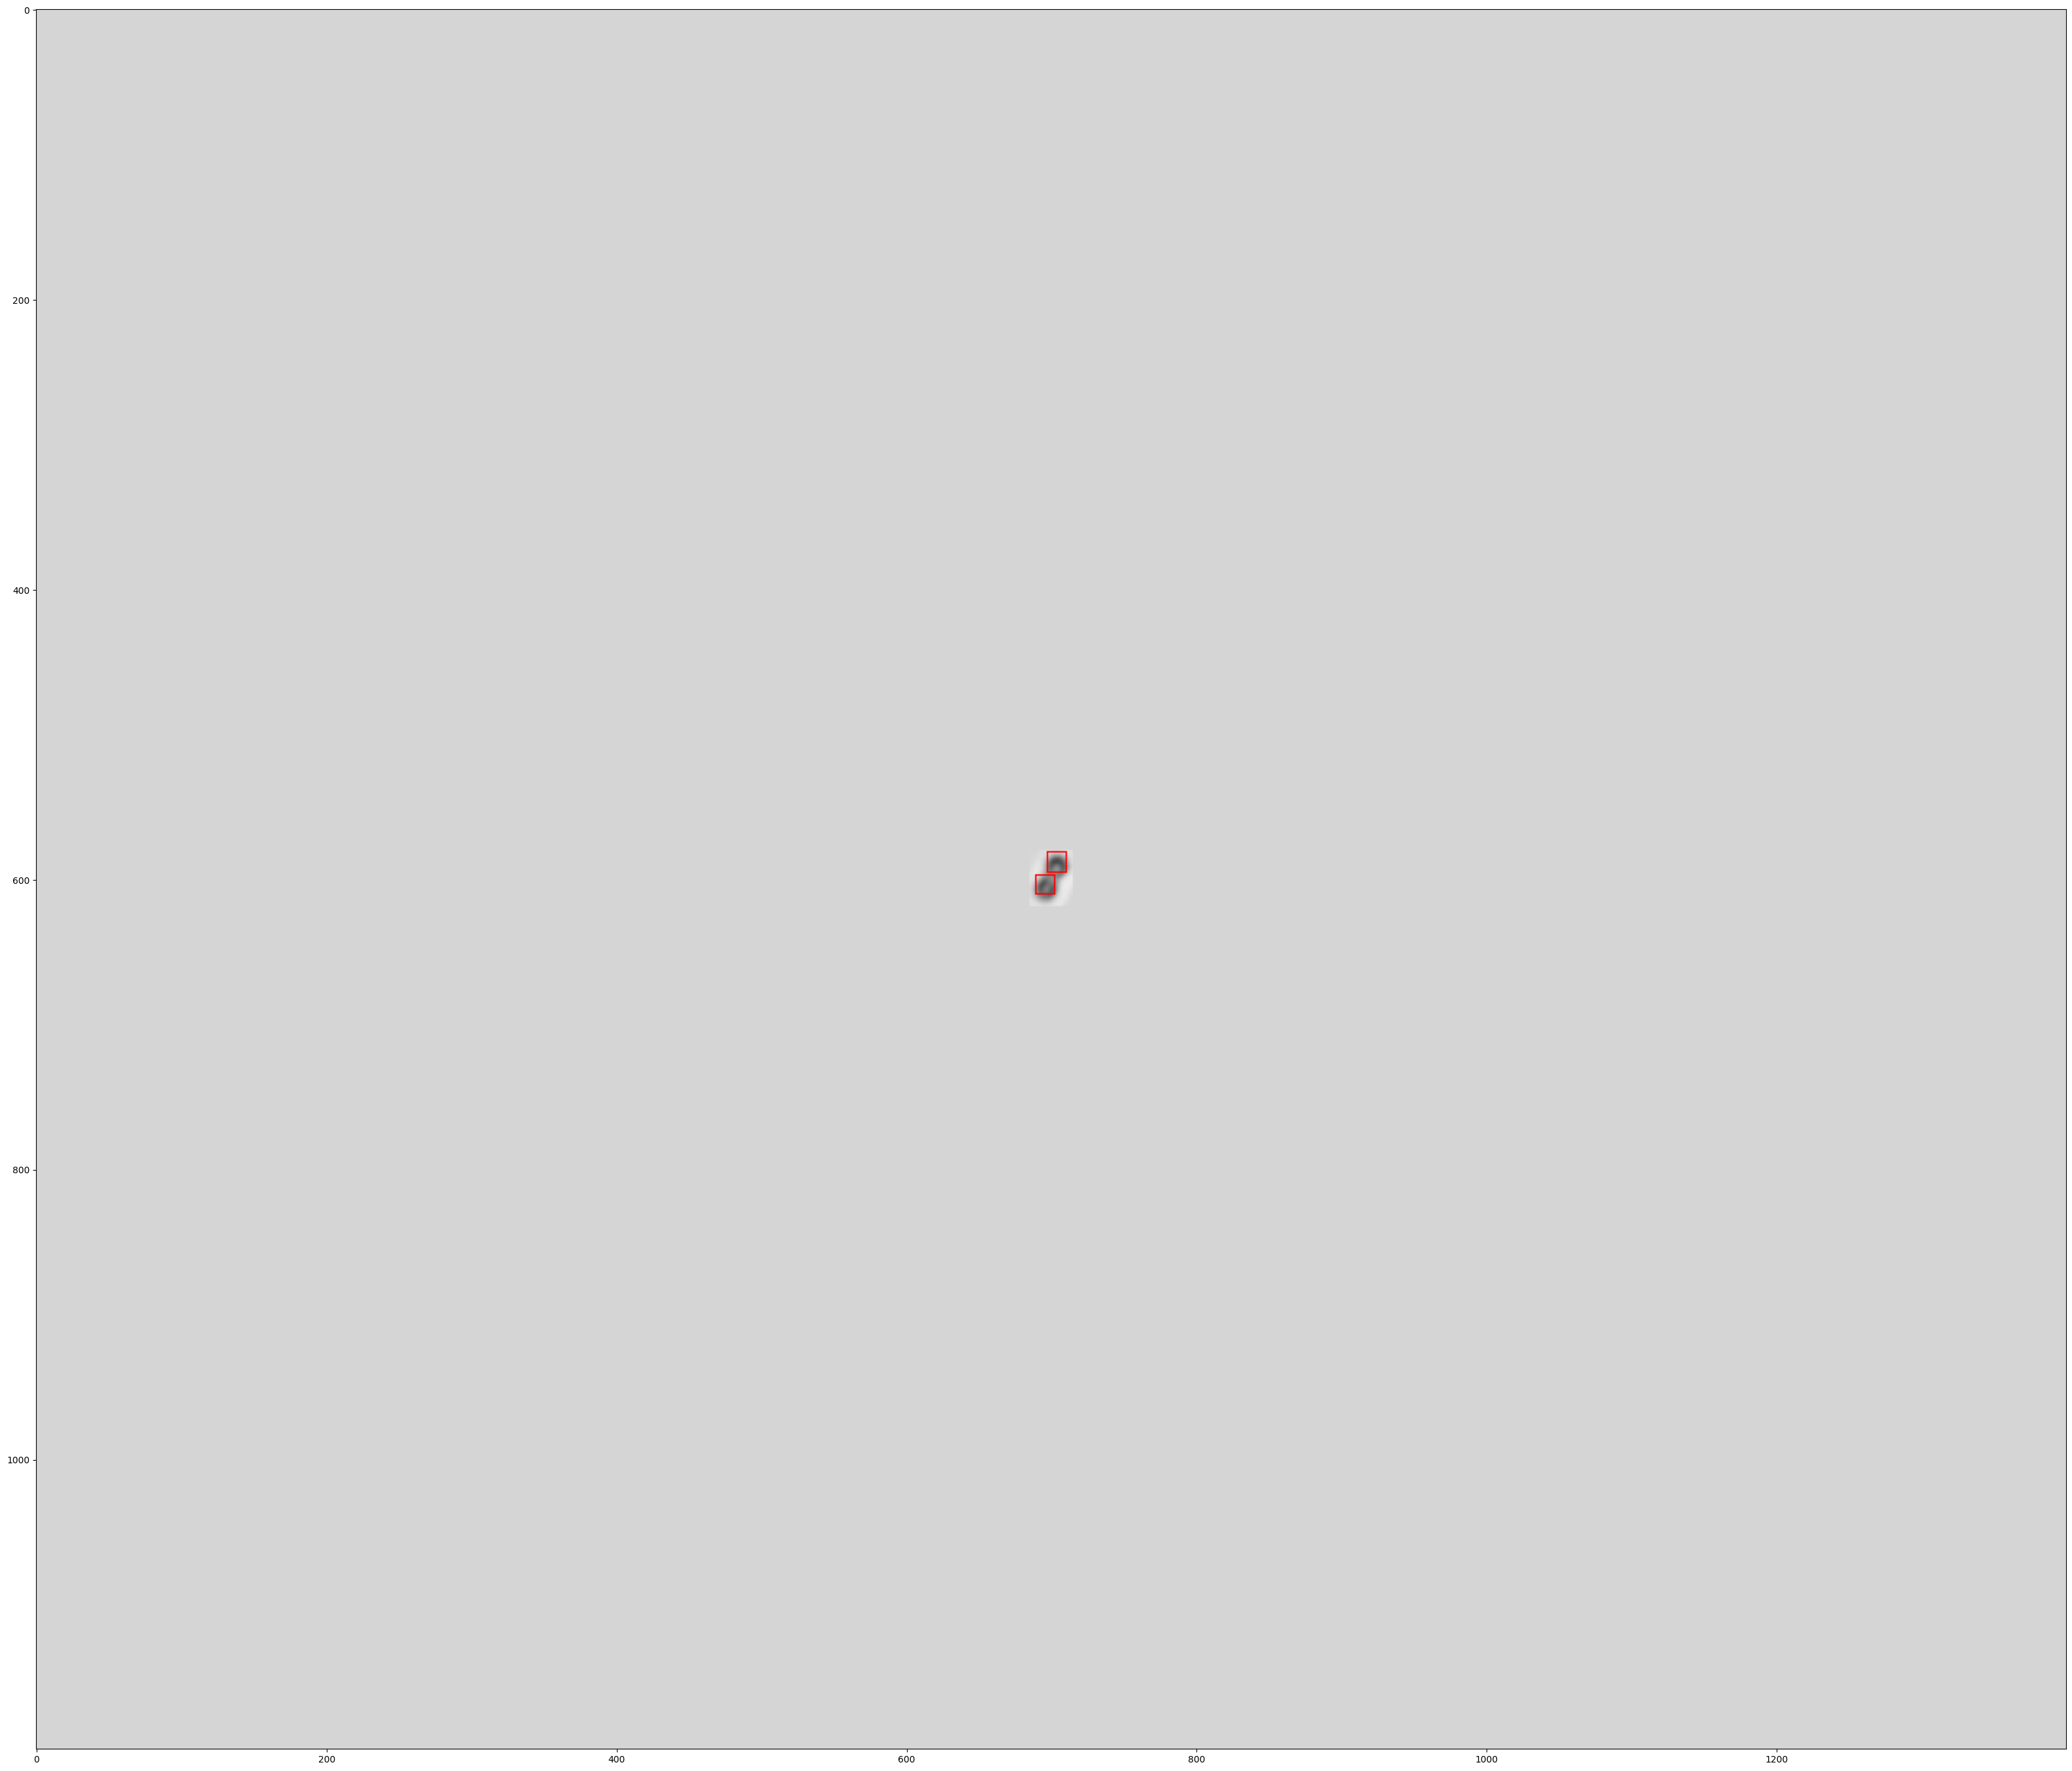

 27%|███████████████████████████████████▍                                                                                              | 3/11 [00:11<00:31,  3.92s/it]

(304, 883, 3)


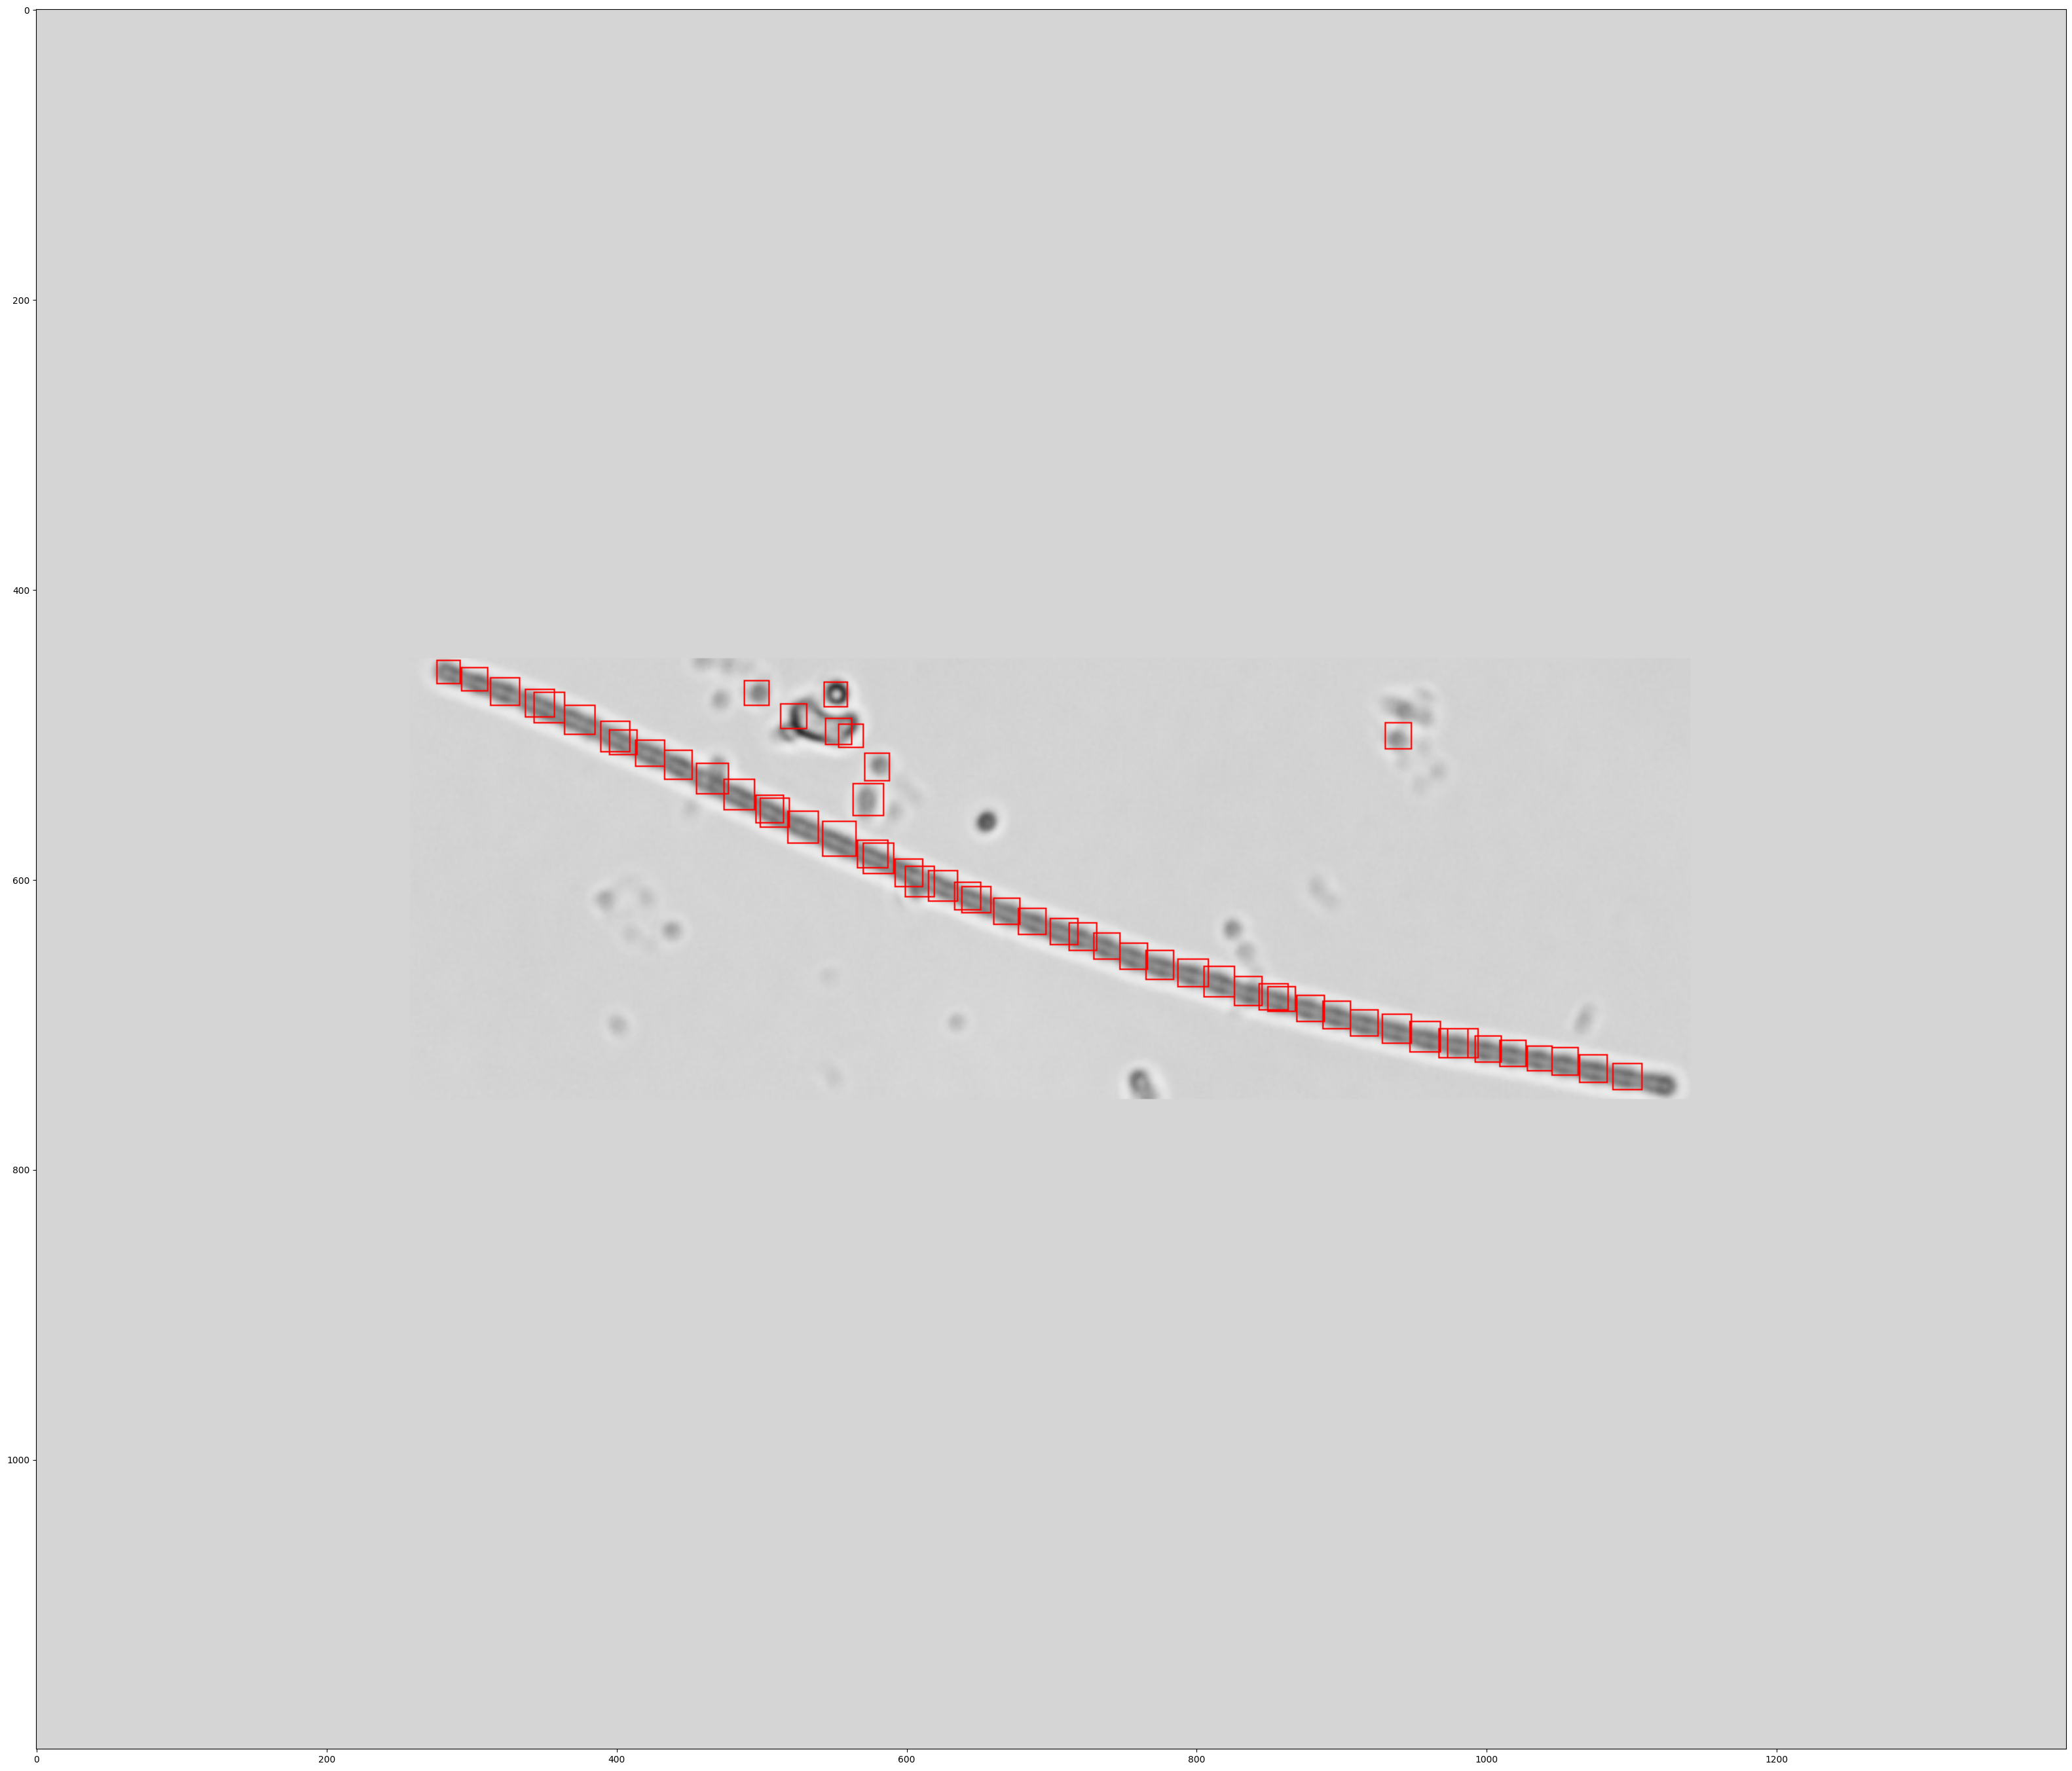

(157, 71, 3)


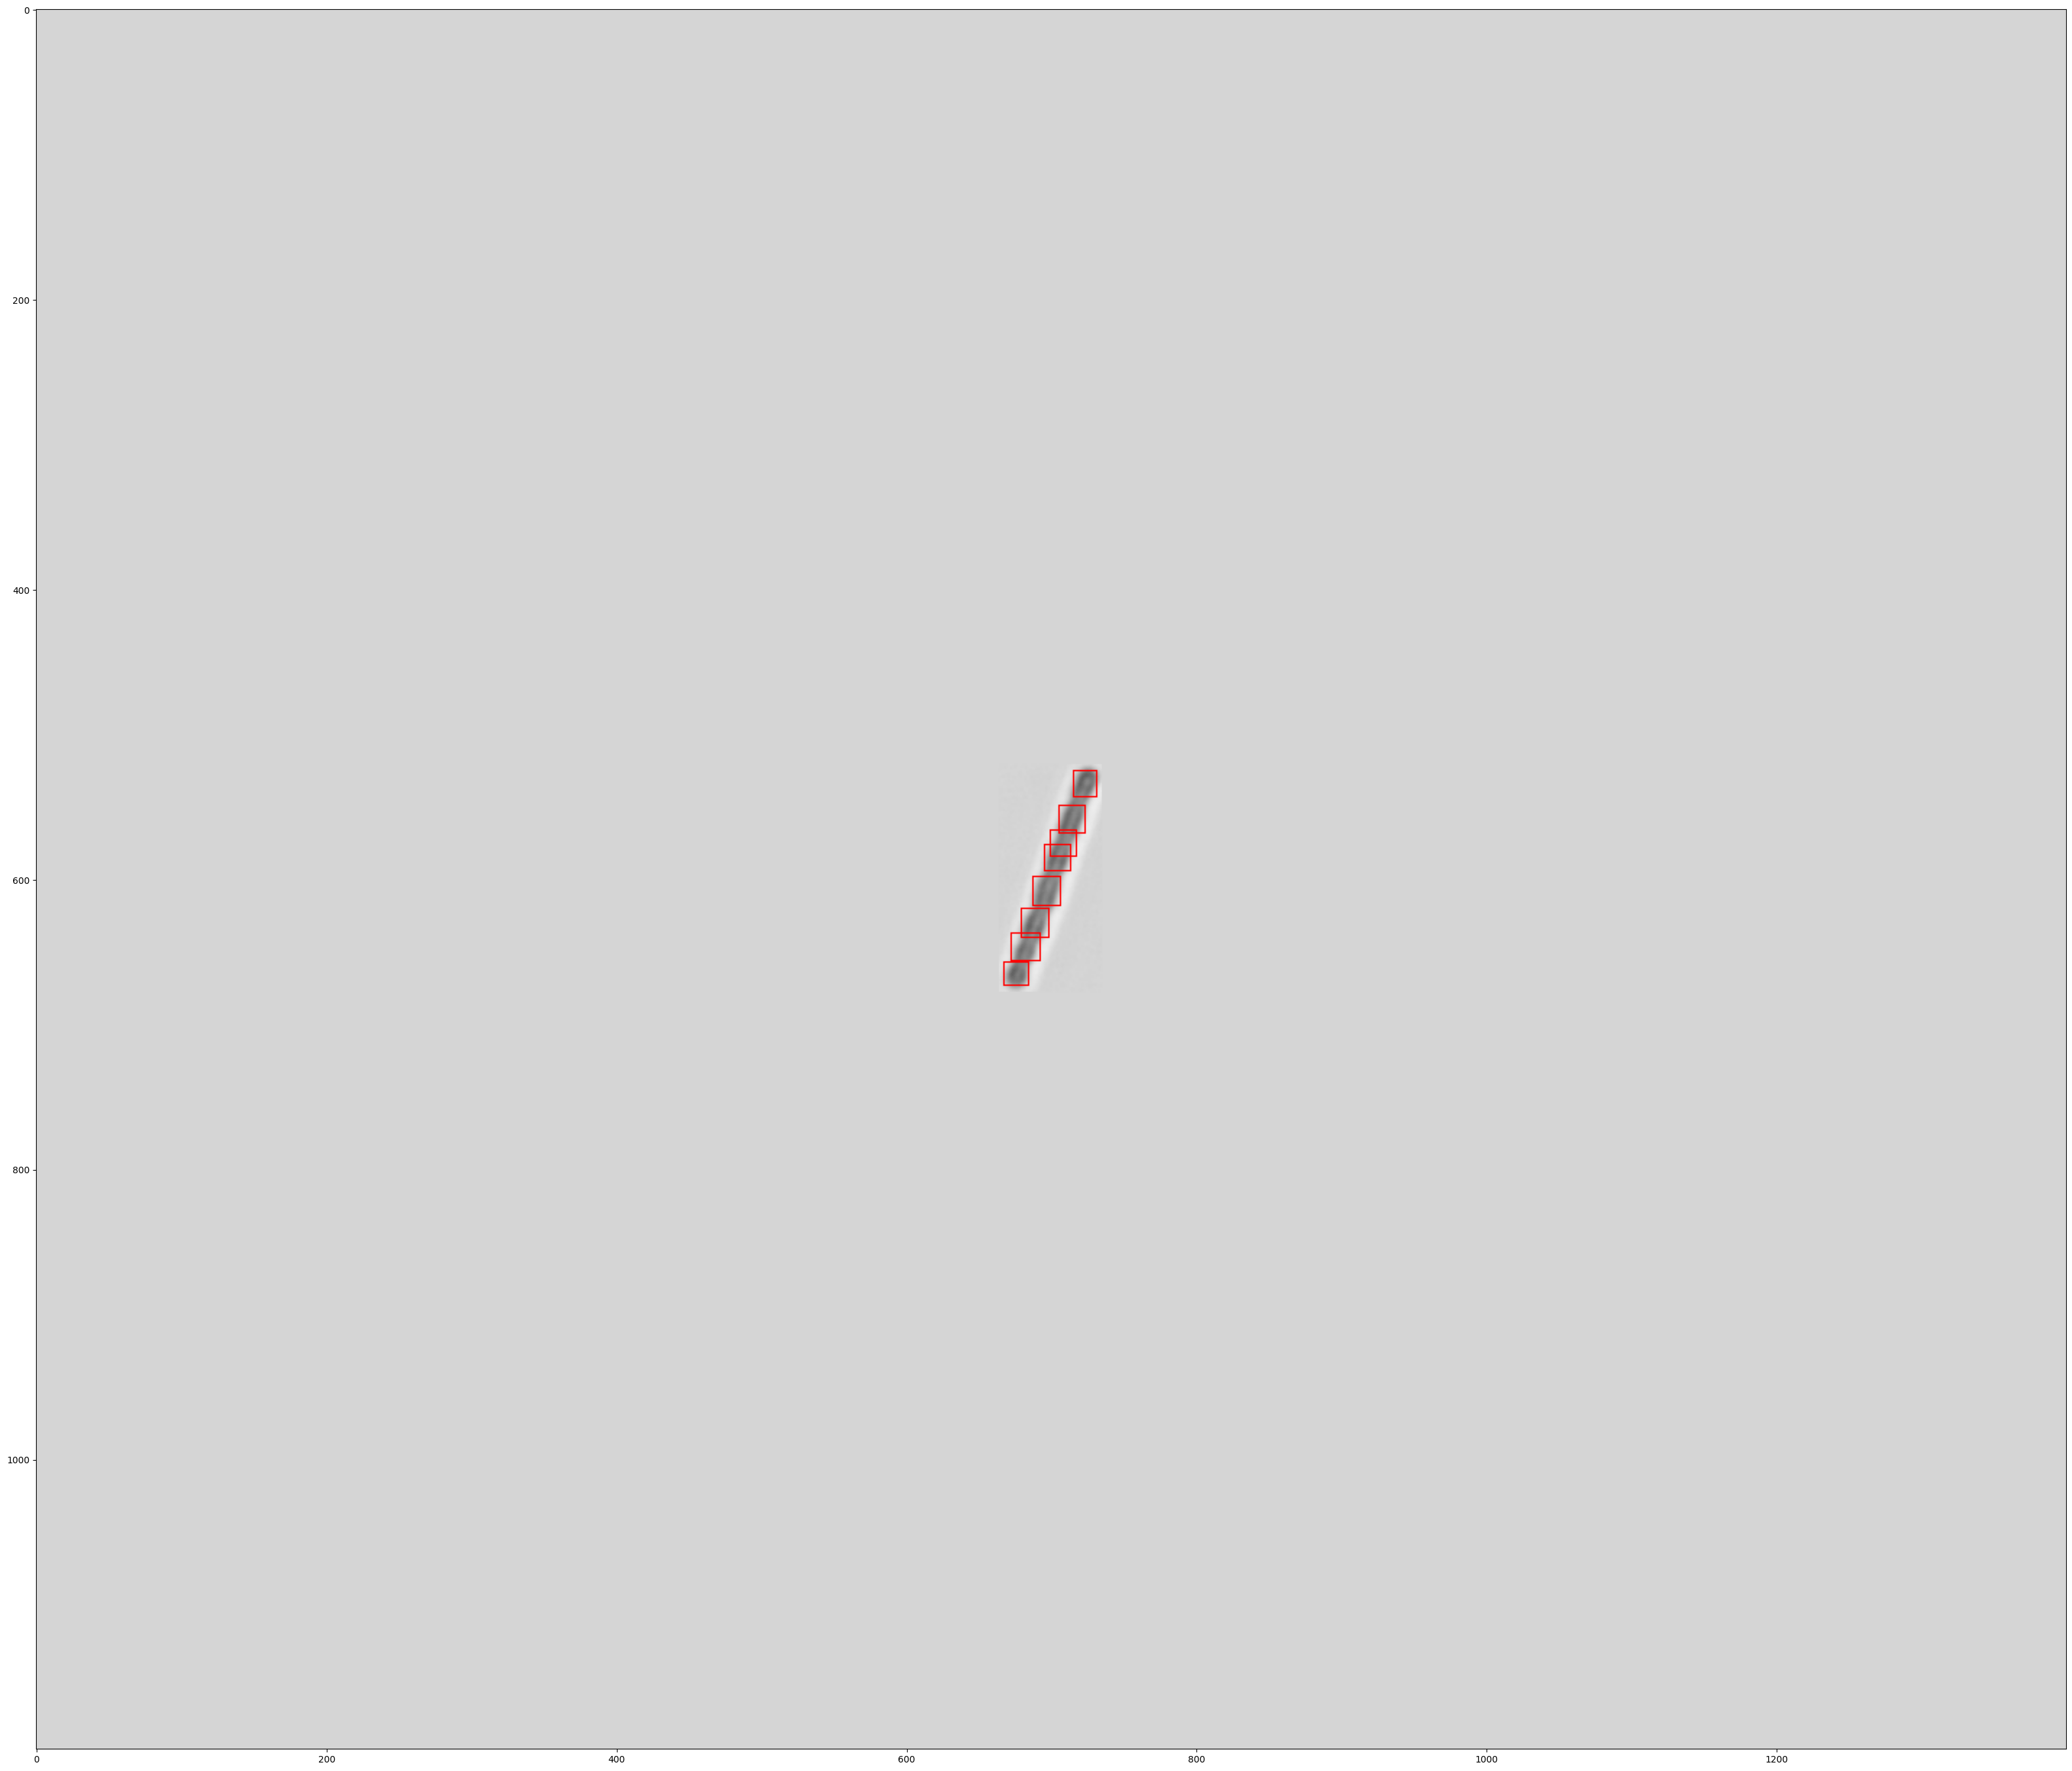

 36%|███████████████████████████████████████████████▎                                                                                  | 4/11 [00:14<00:24,  3.56s/it]

(341, 256, 3)


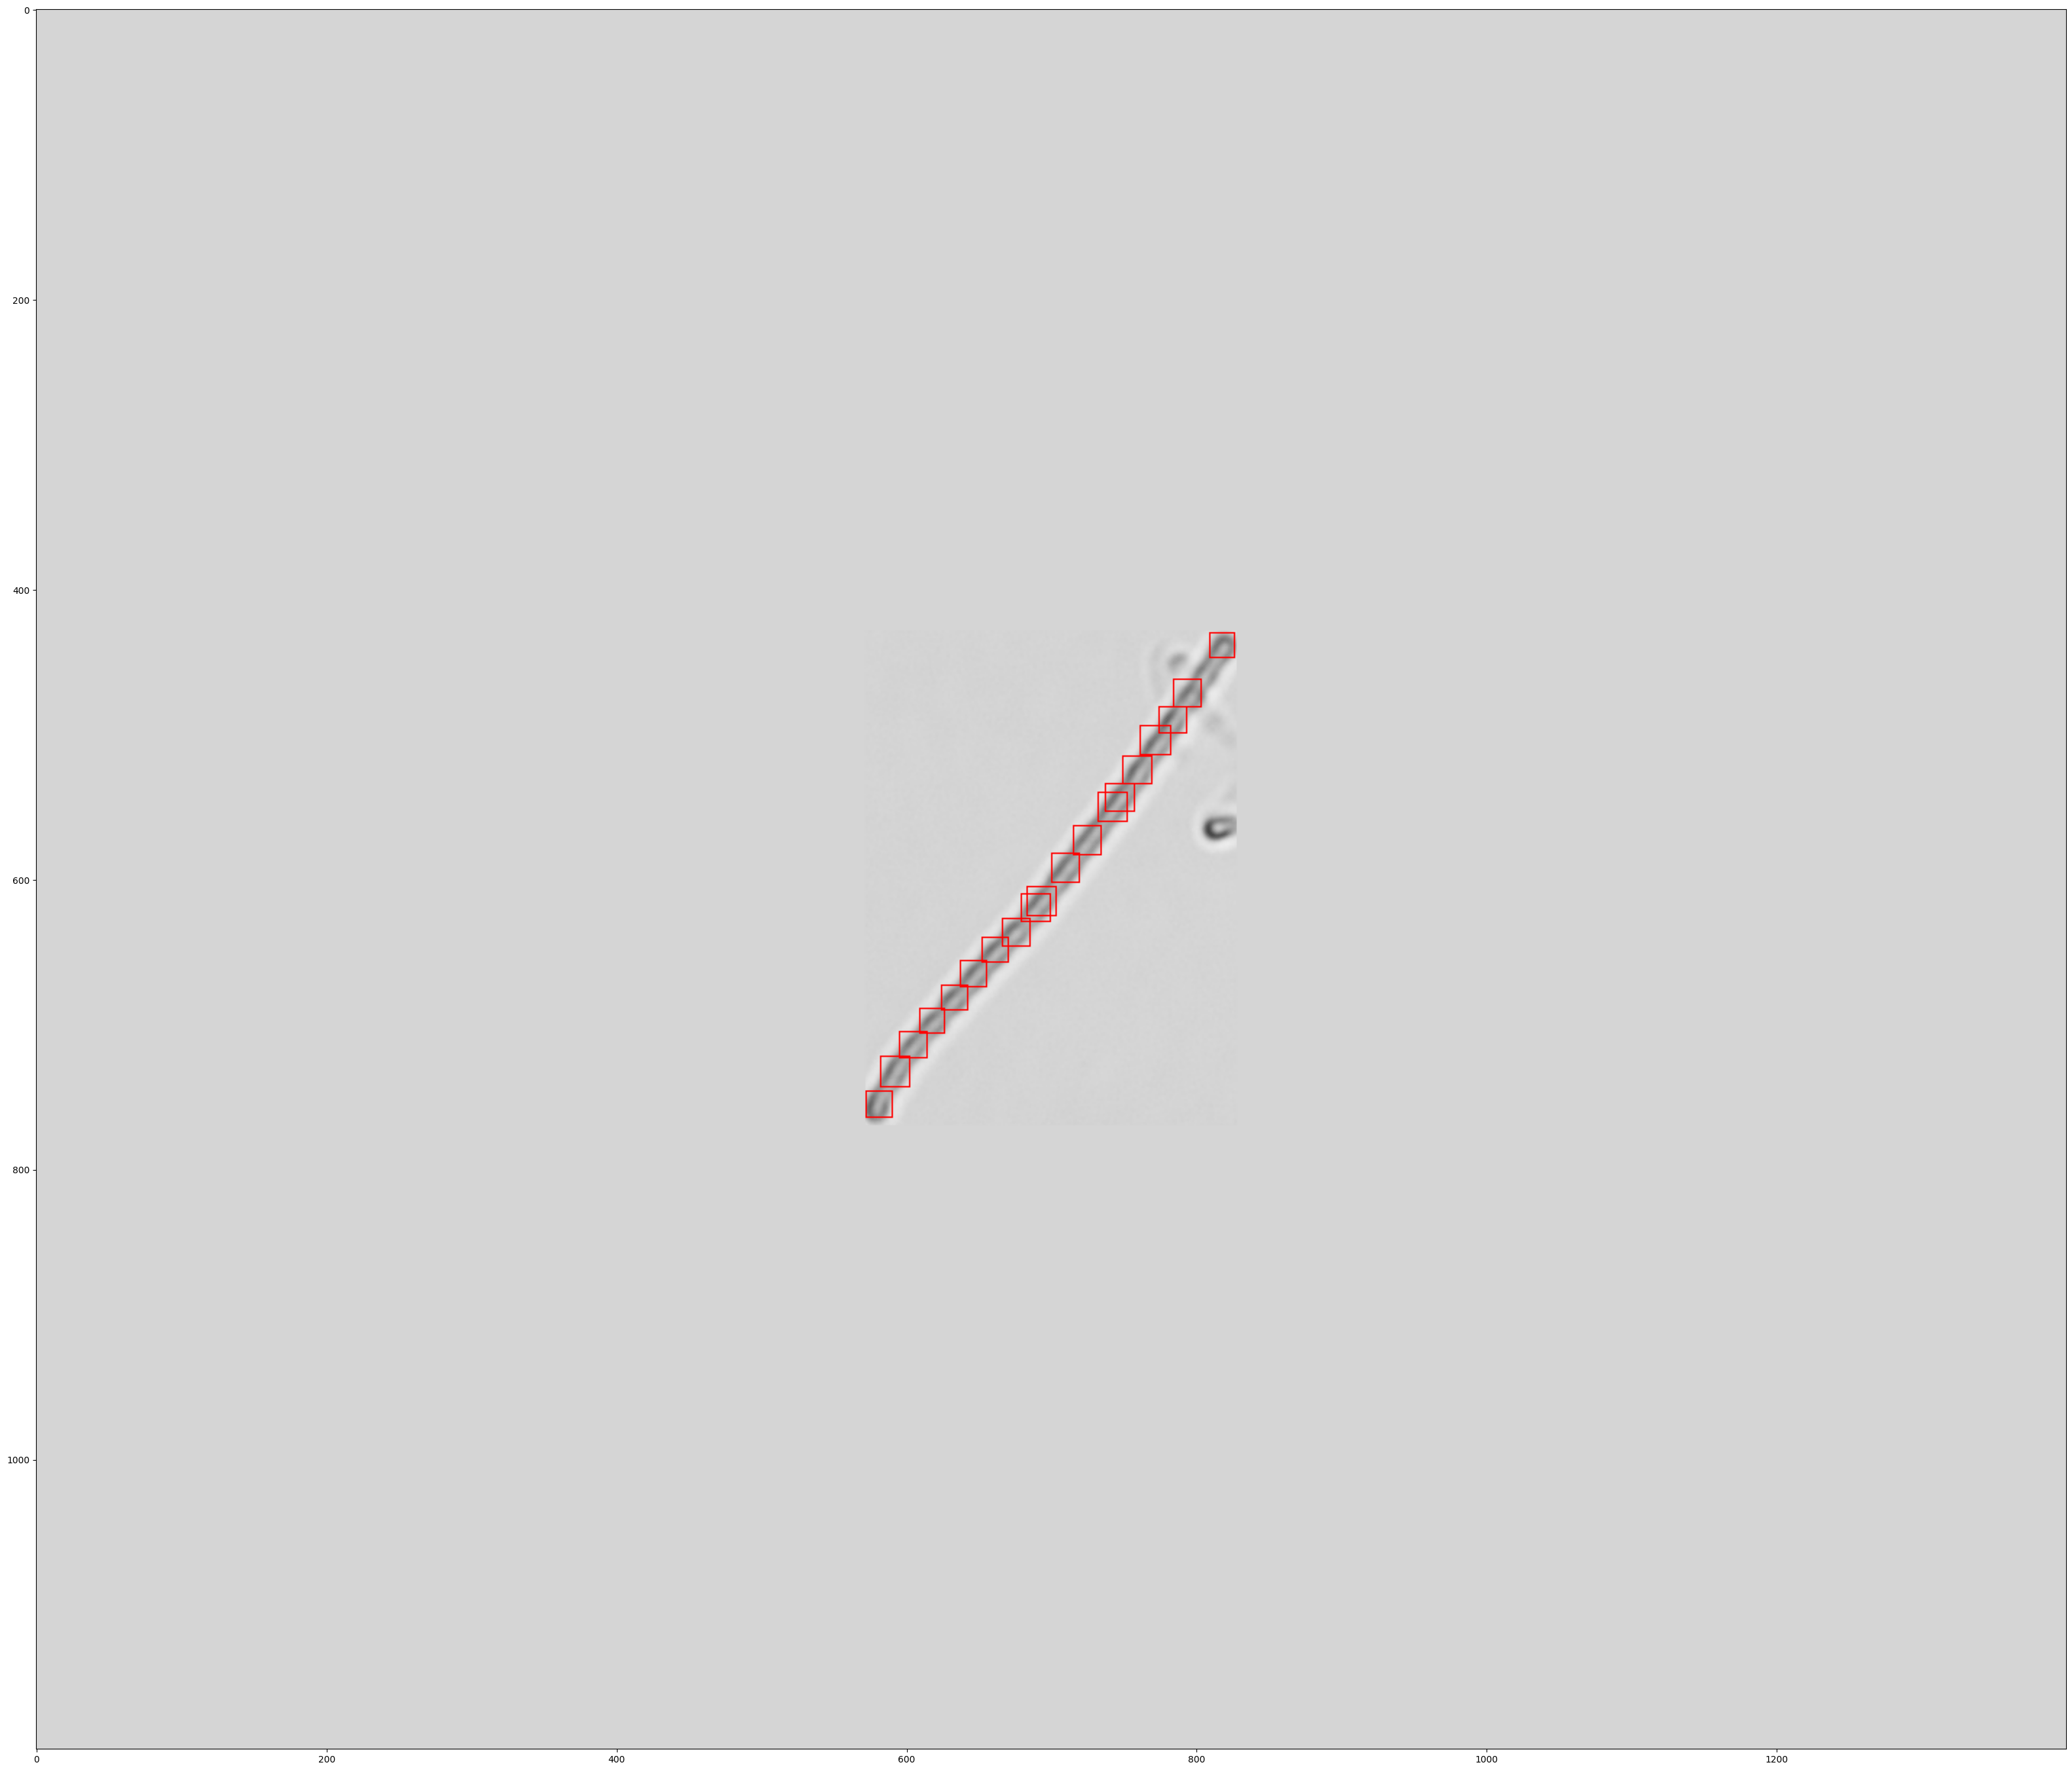

(37, 97, 3)


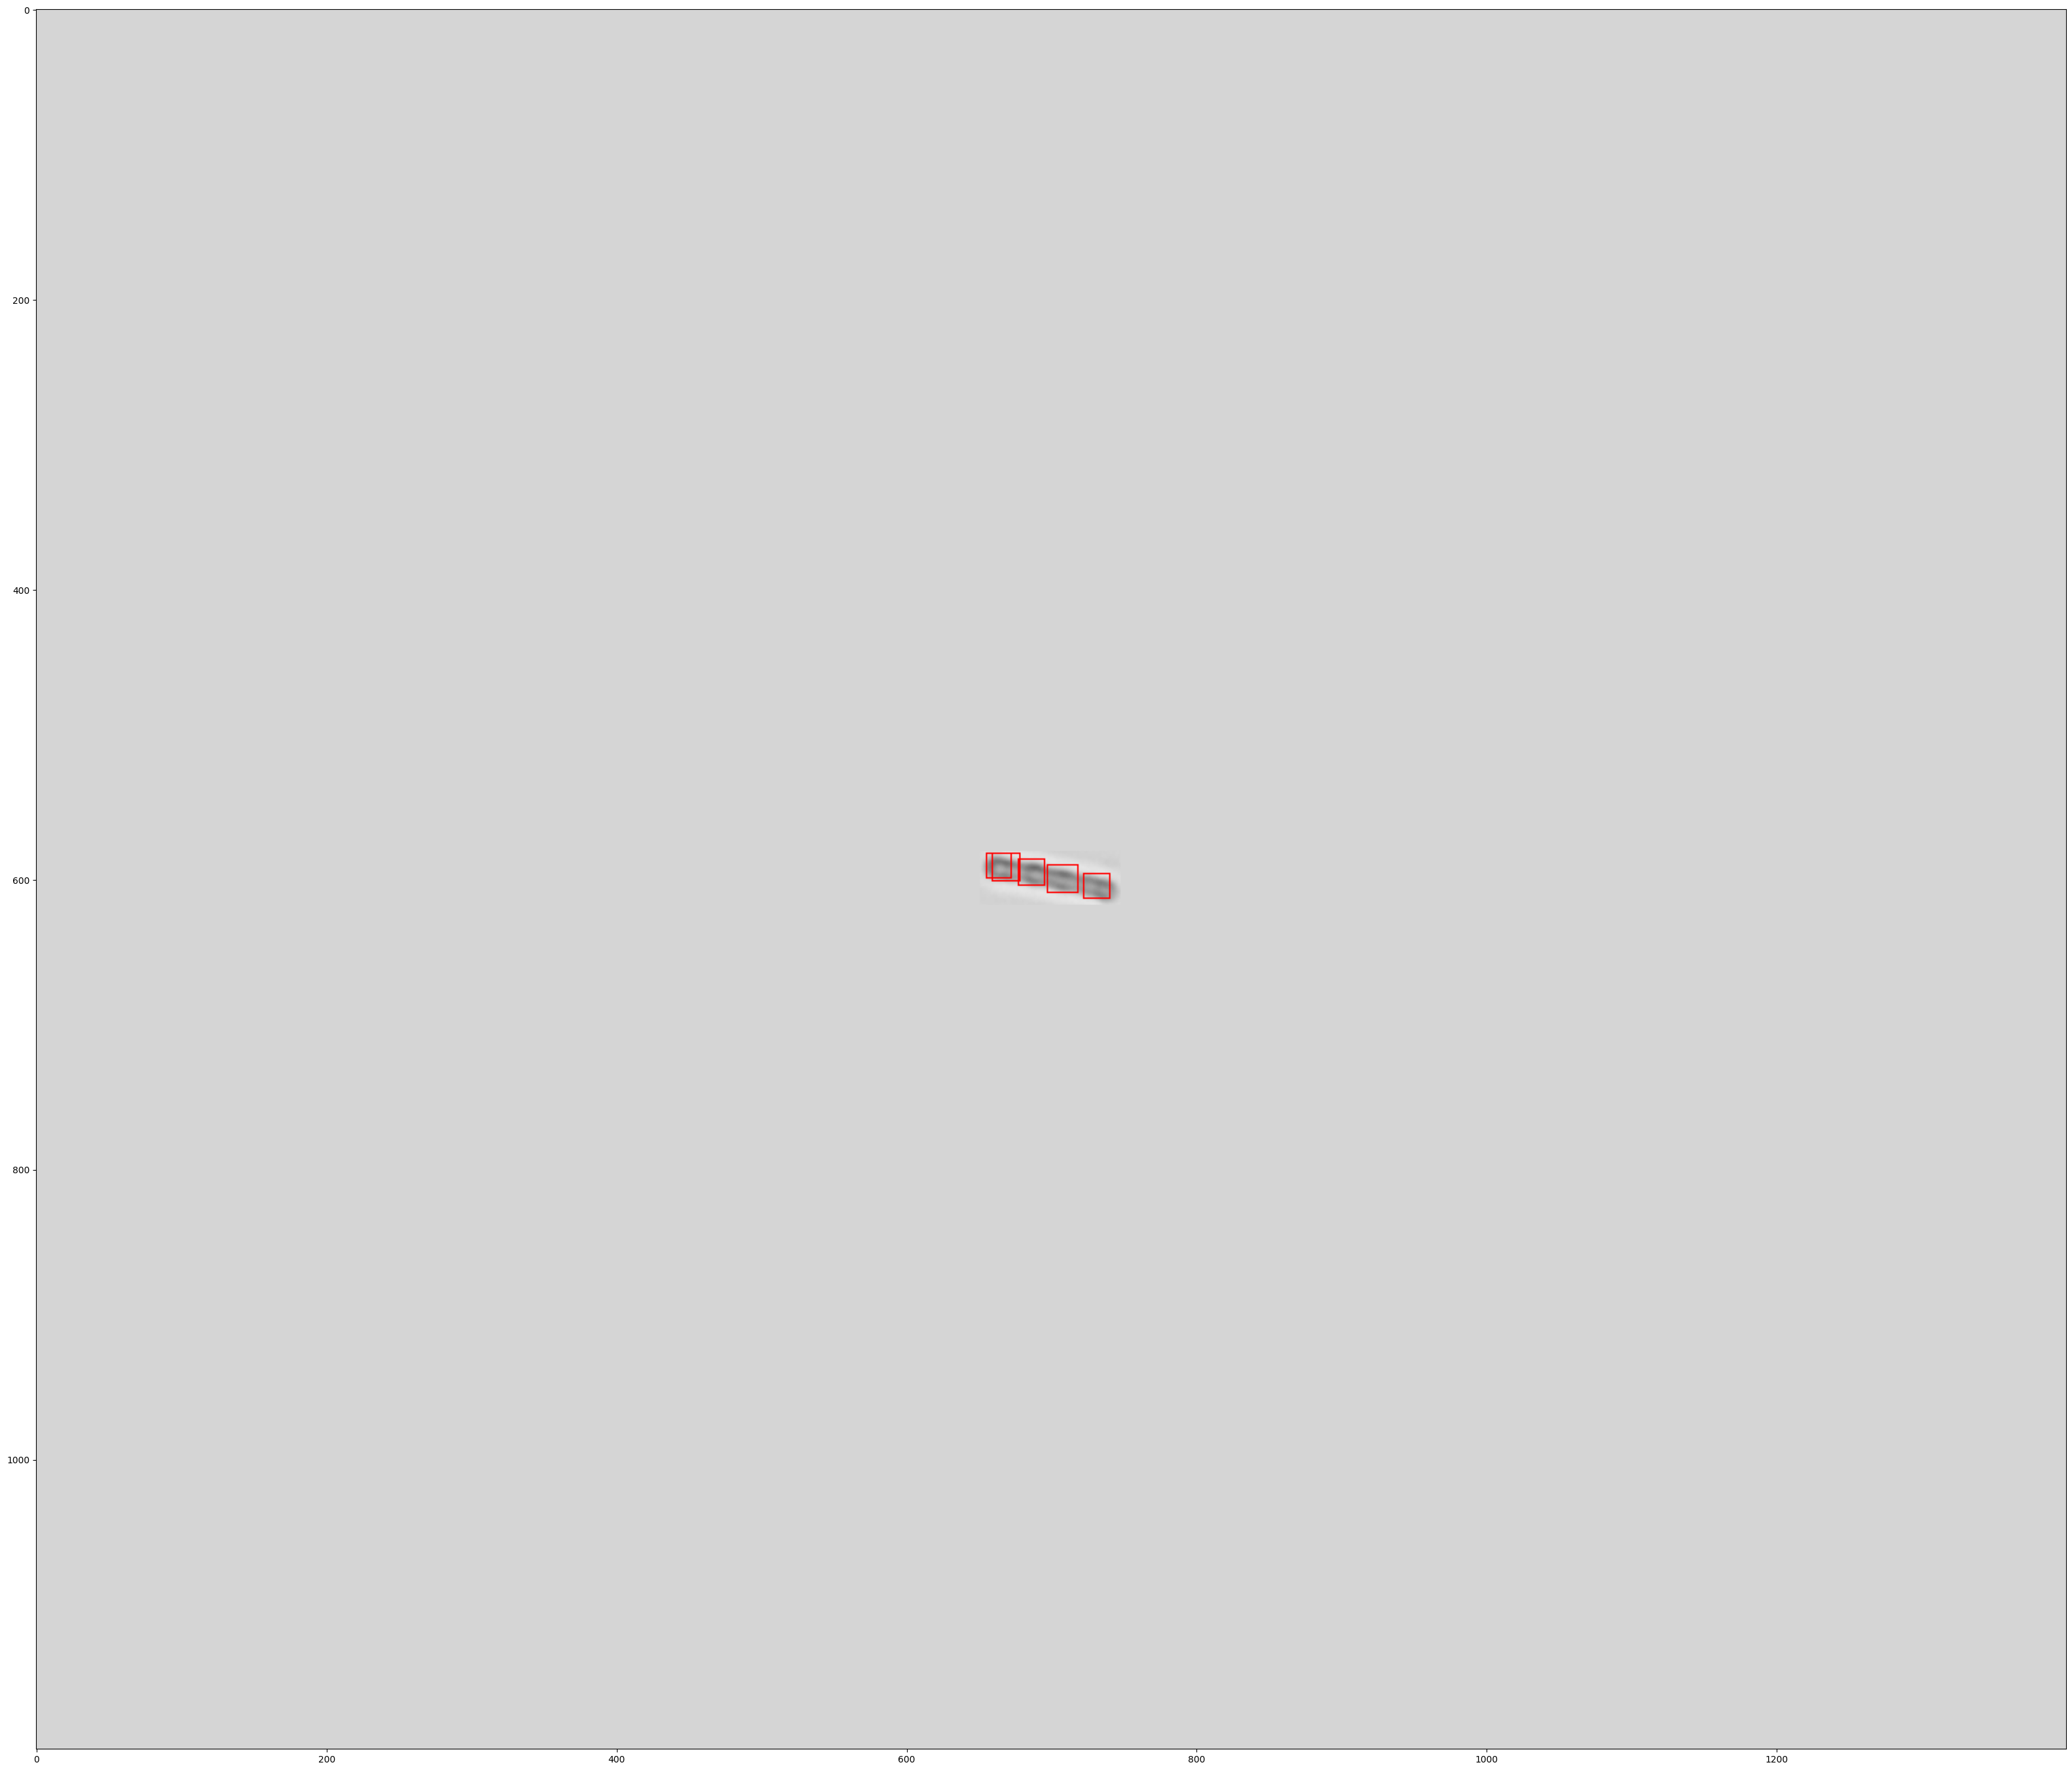

 45%|███████████████████████████████████████████████████████████                                                                       | 5/11 [00:17<00:20,  3.39s/it]

(102, 59, 3)


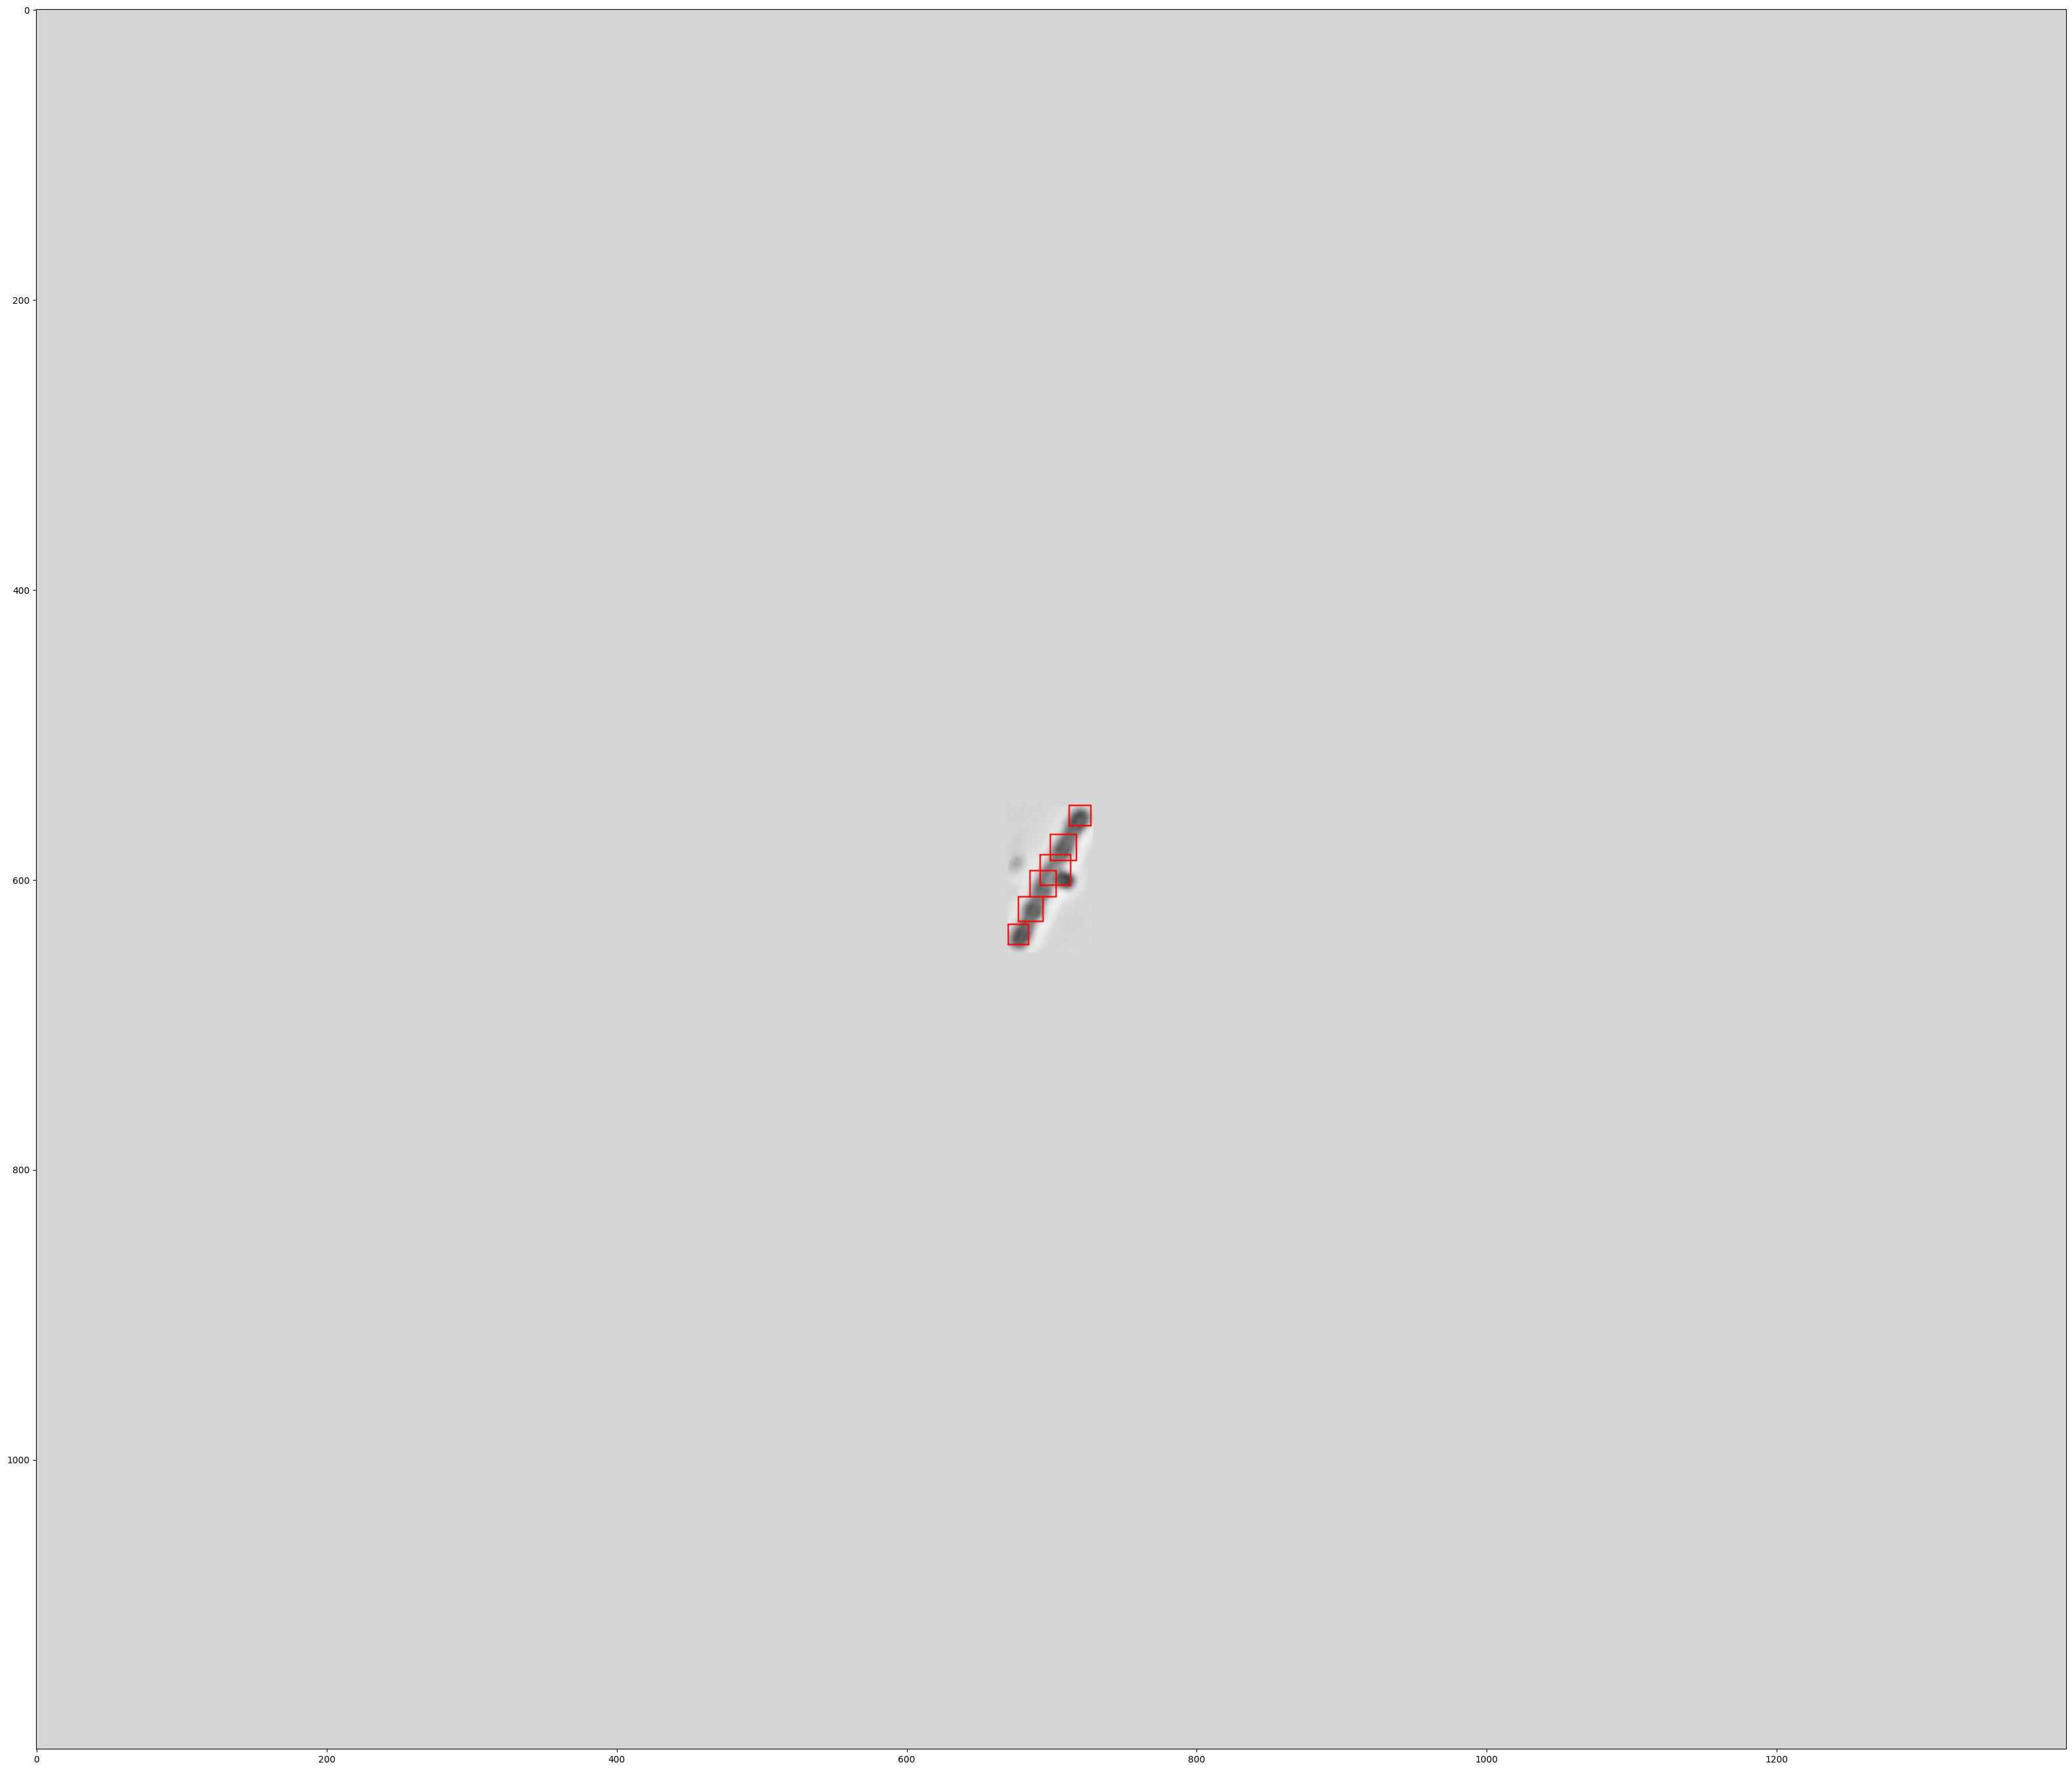

(322, 83, 3)


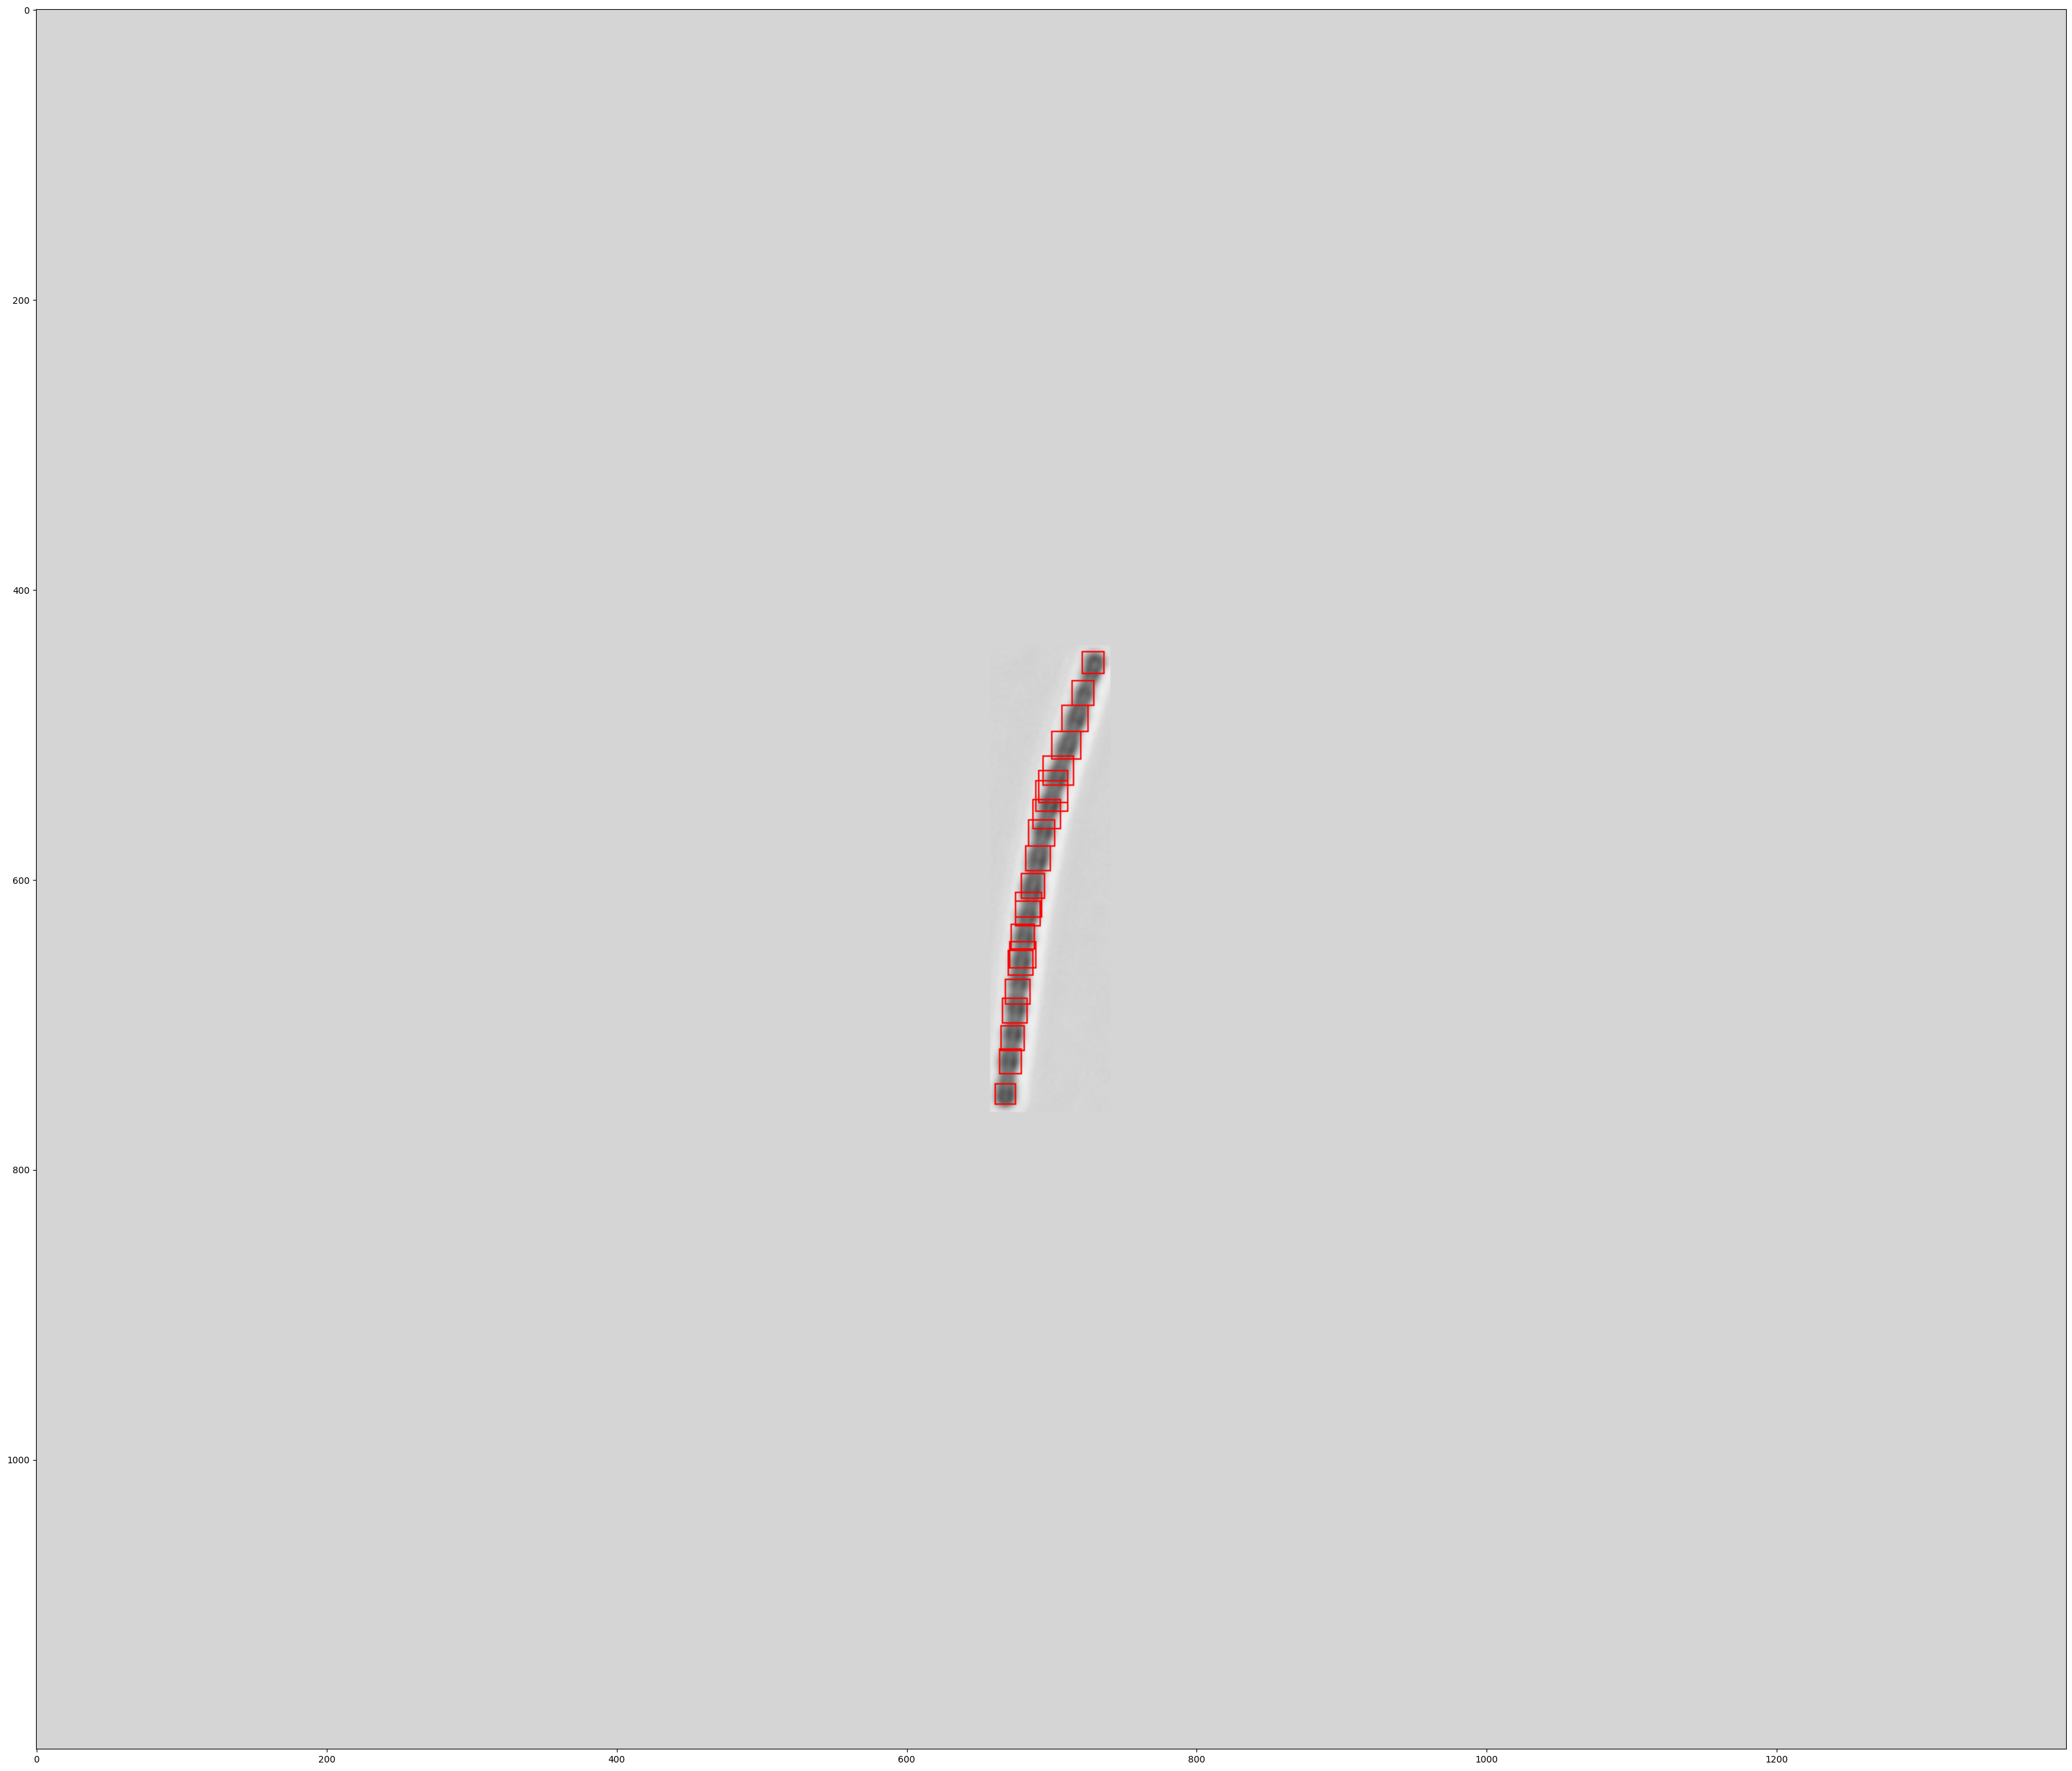

 55%|██████████████████████████████████████████████████████████████████████▉                                                           | 6/11 [00:20<00:16,  3.23s/it]

(102, 42, 3)


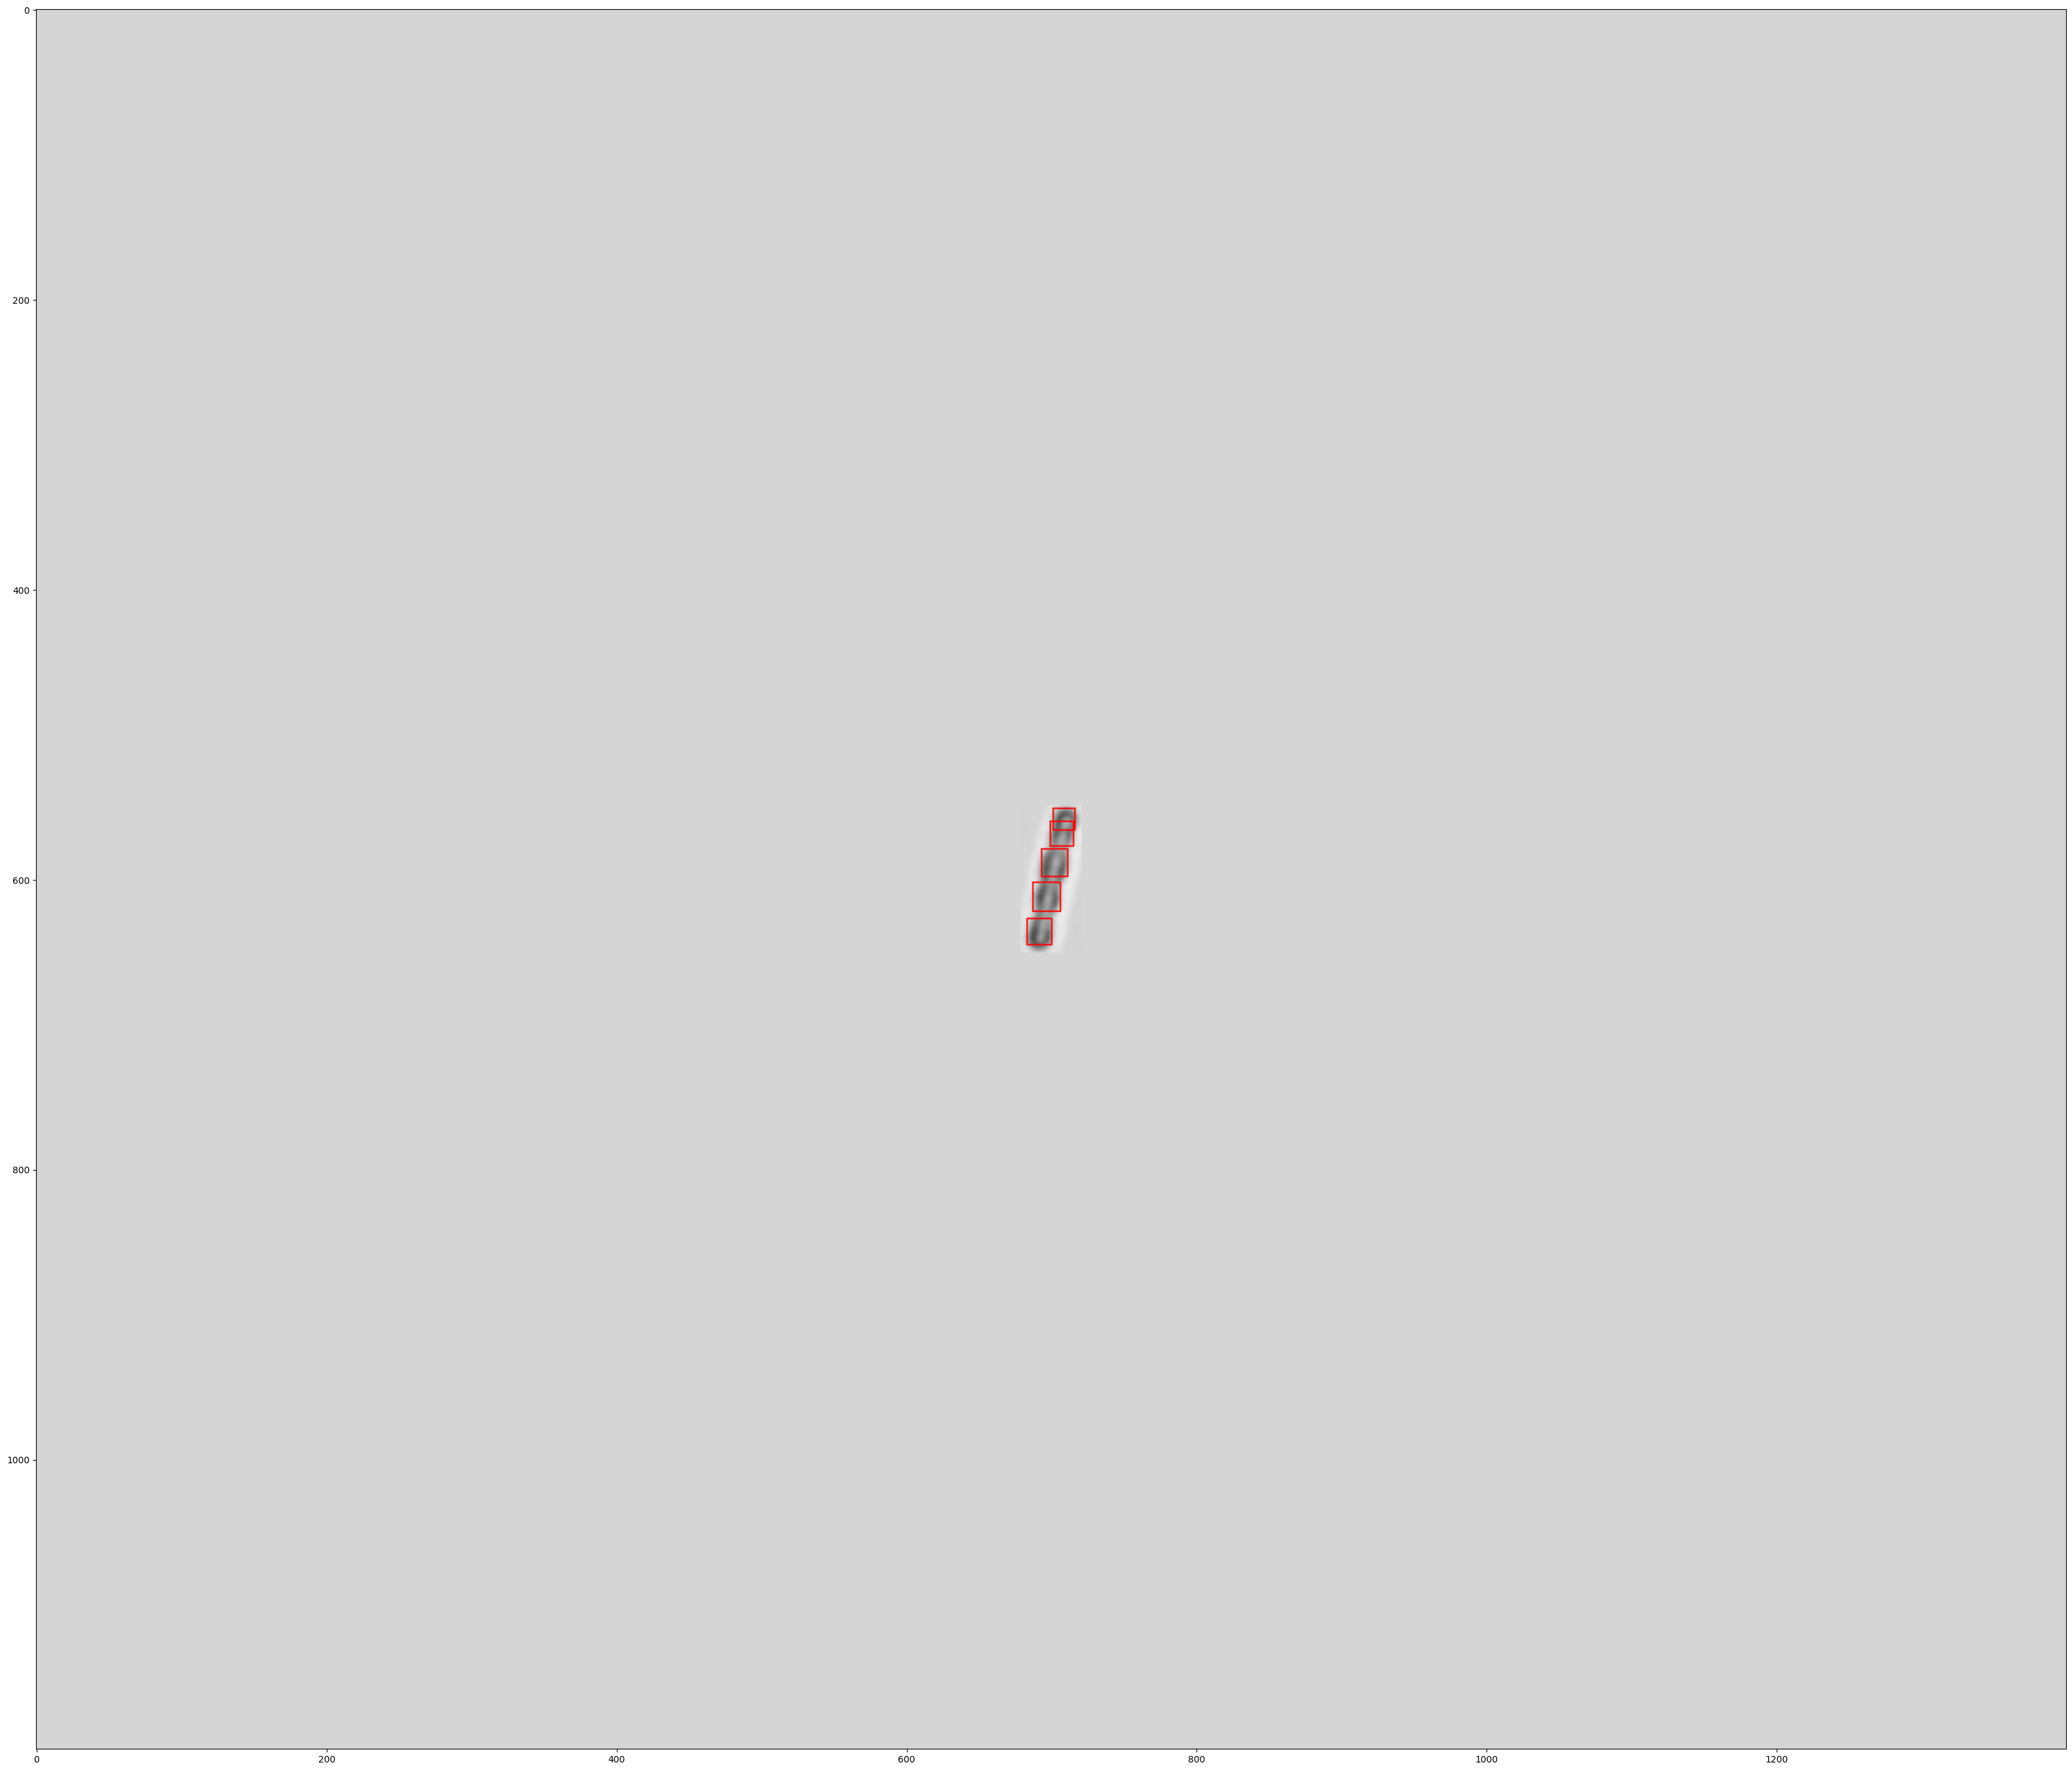

(43, 115, 3)


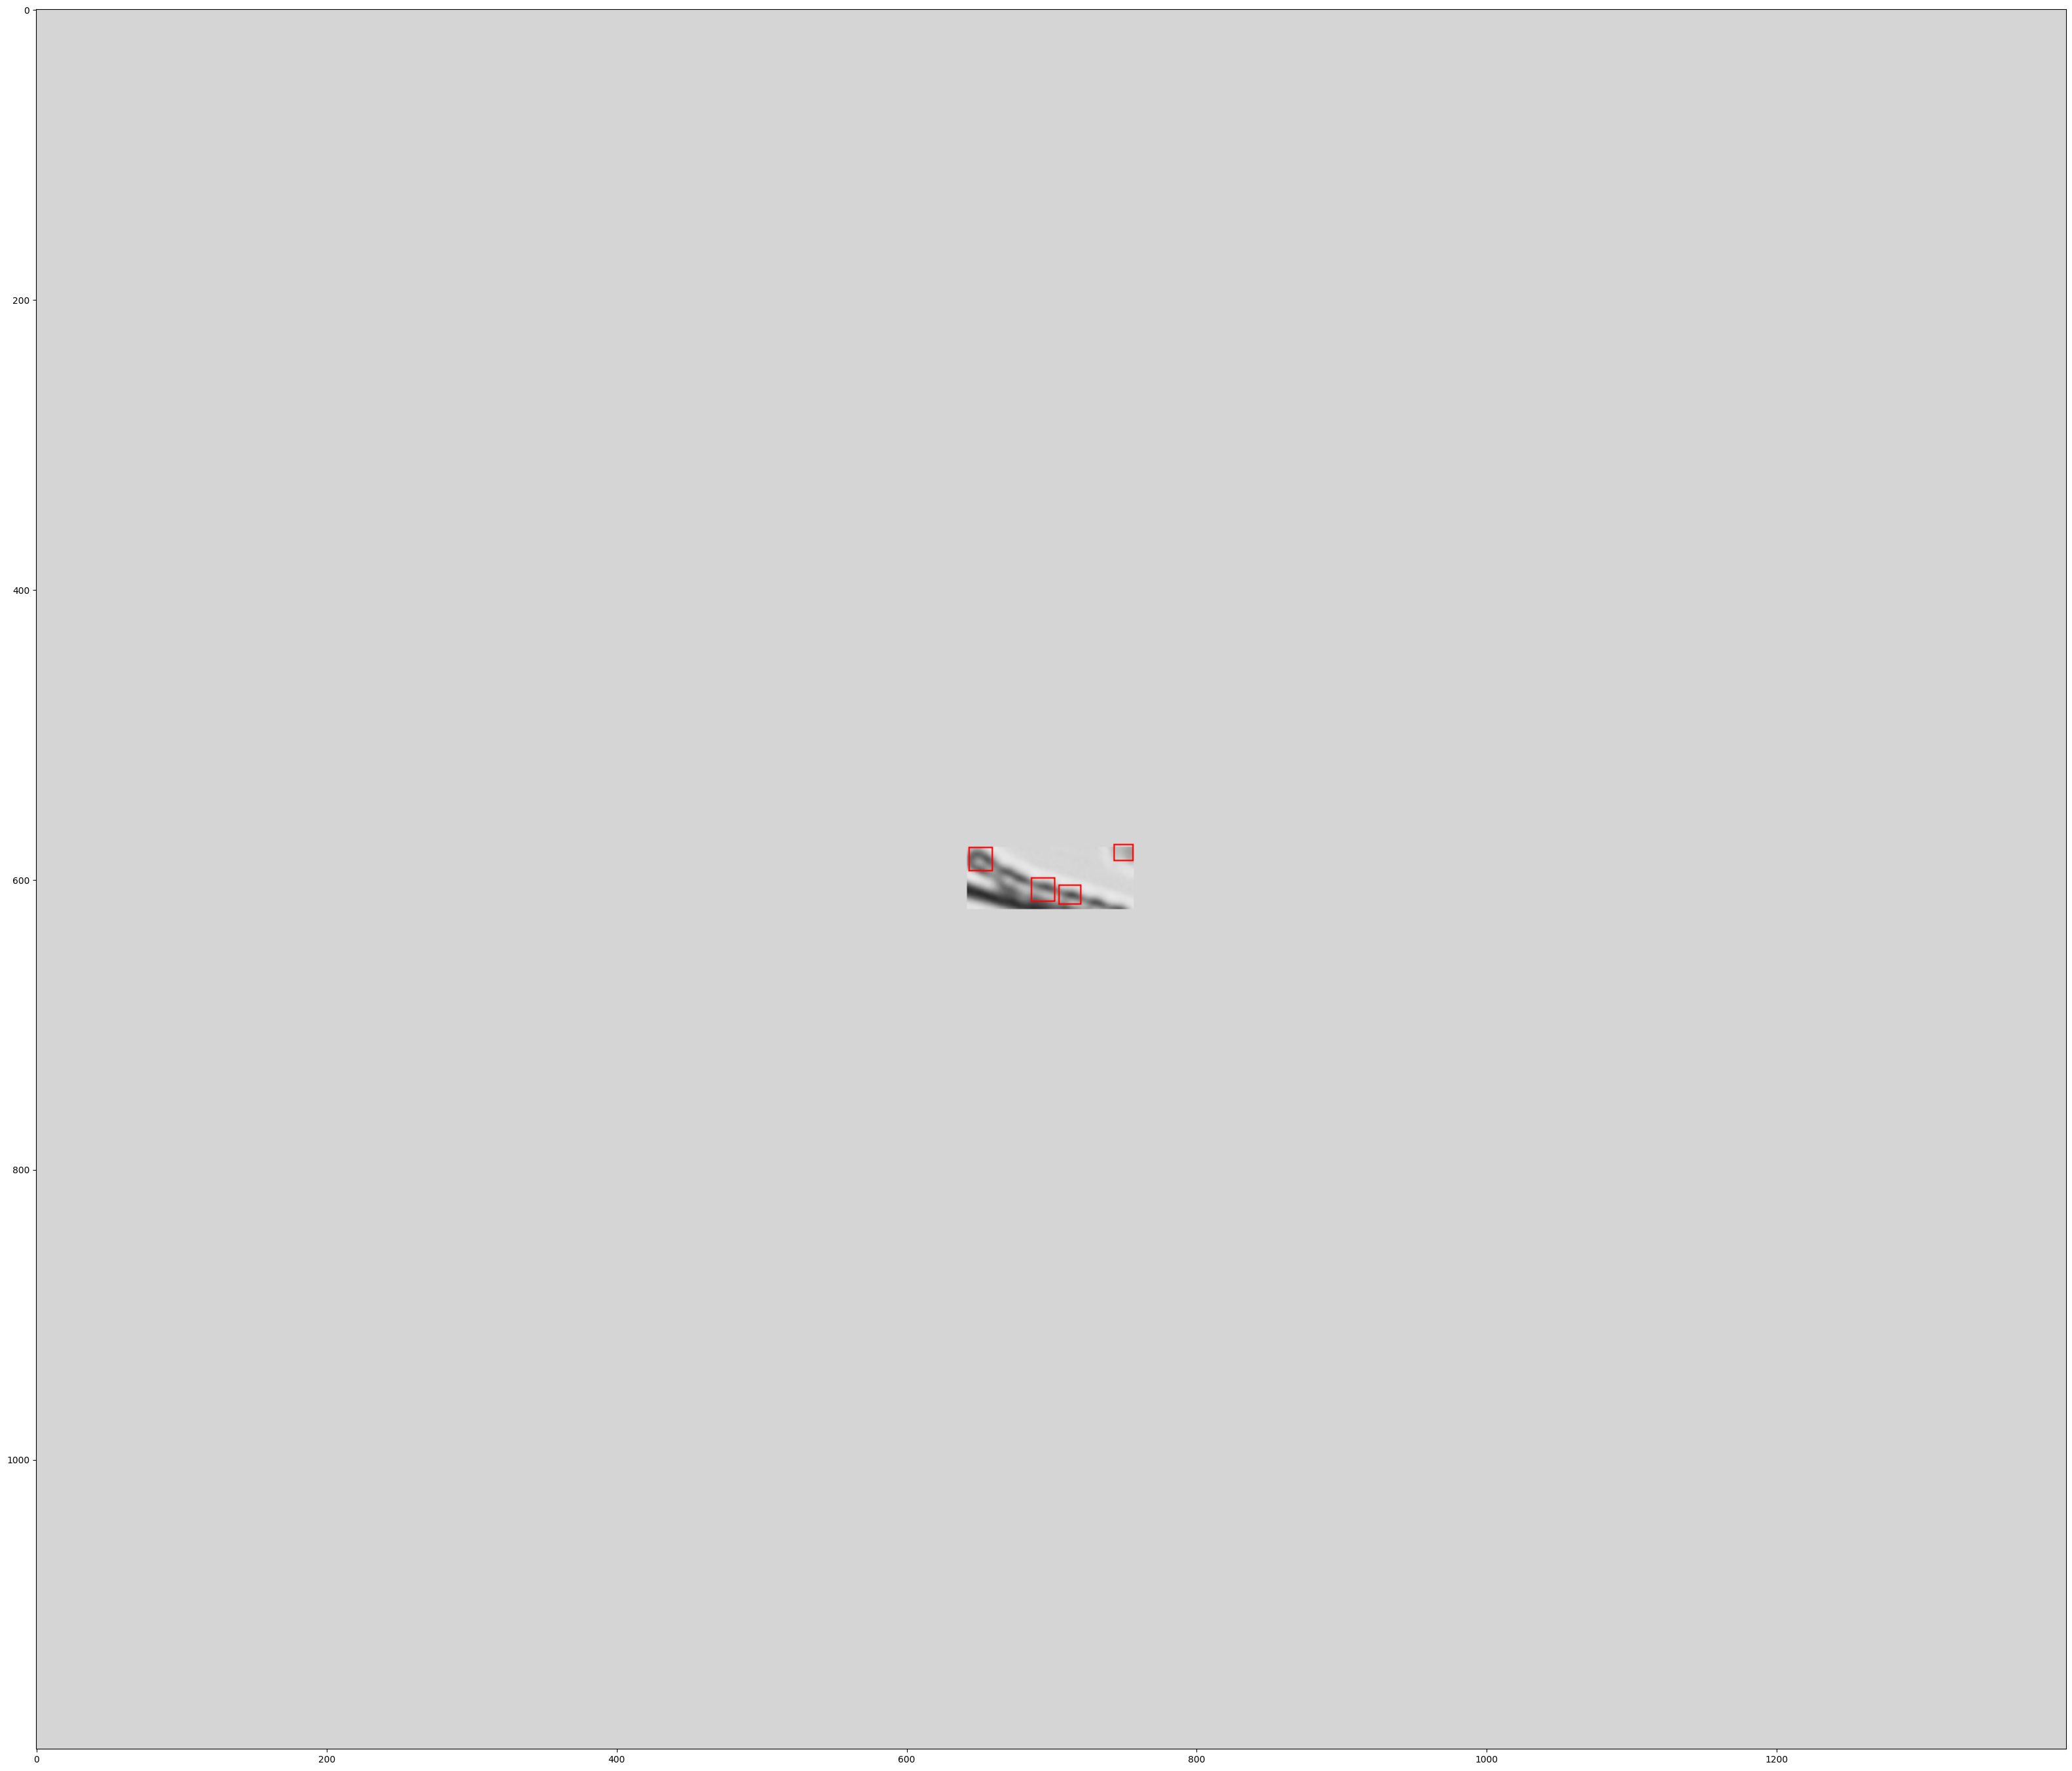

(38, 108, 3)


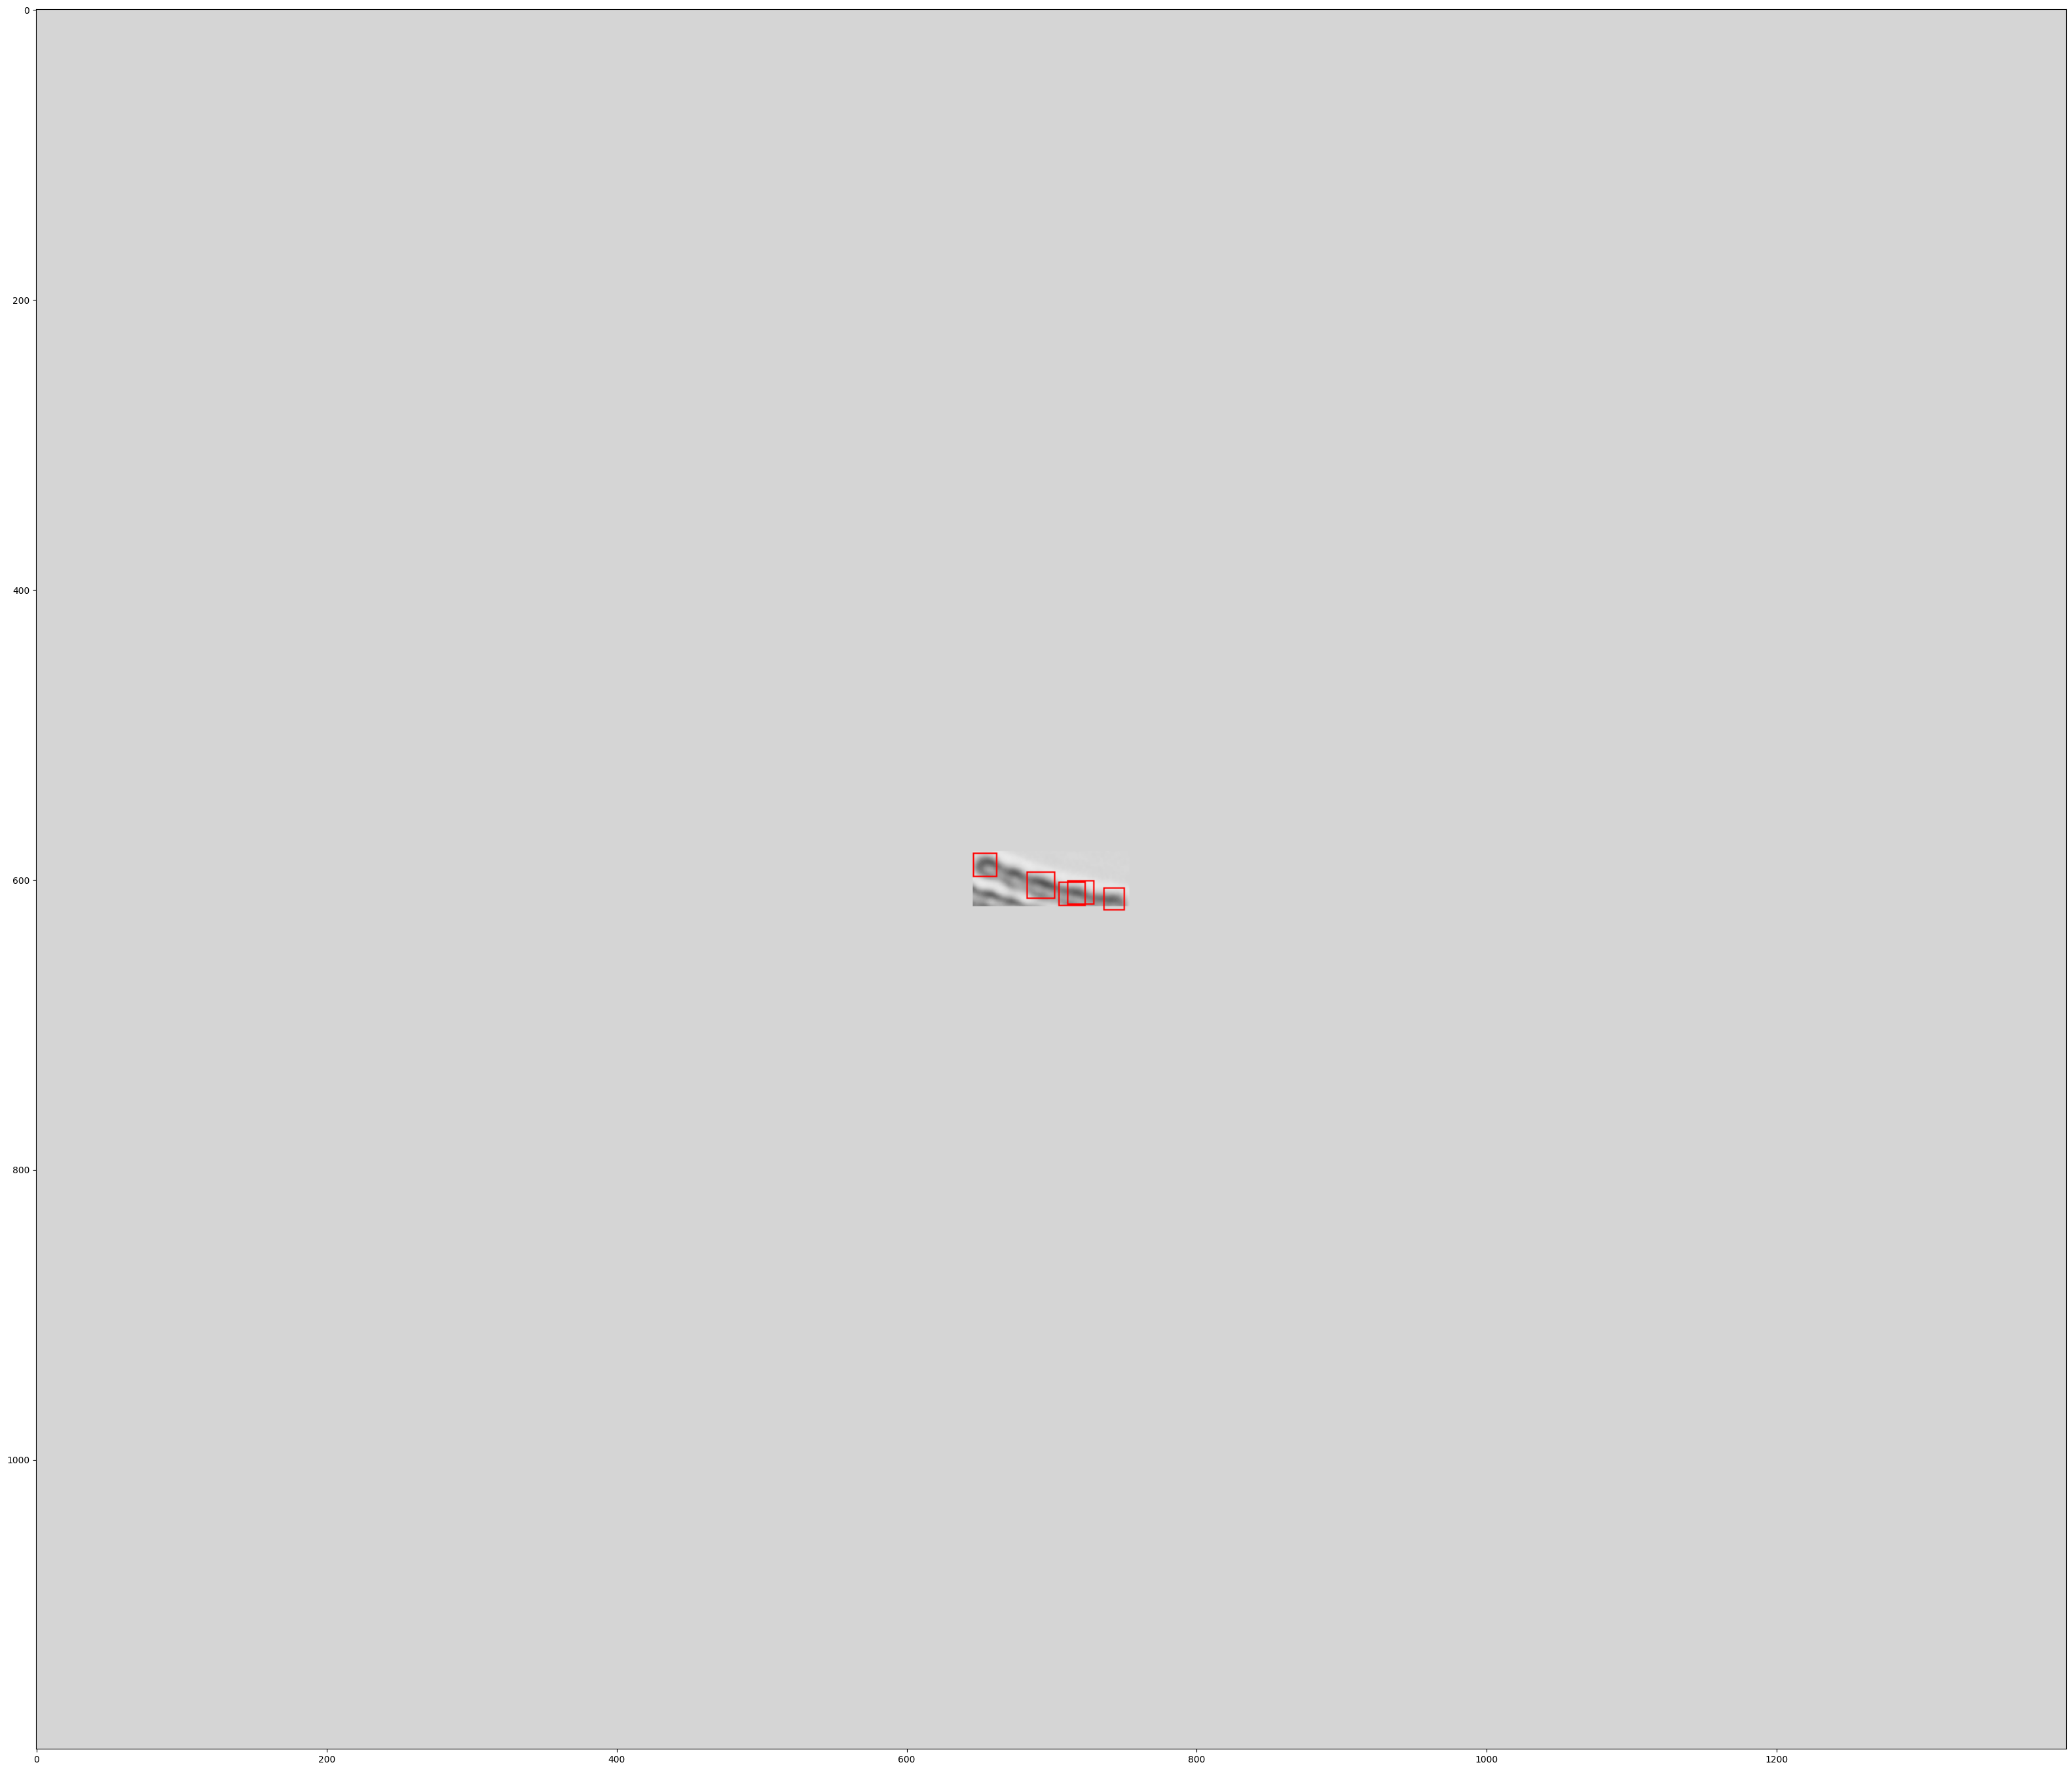

(196, 904, 3)


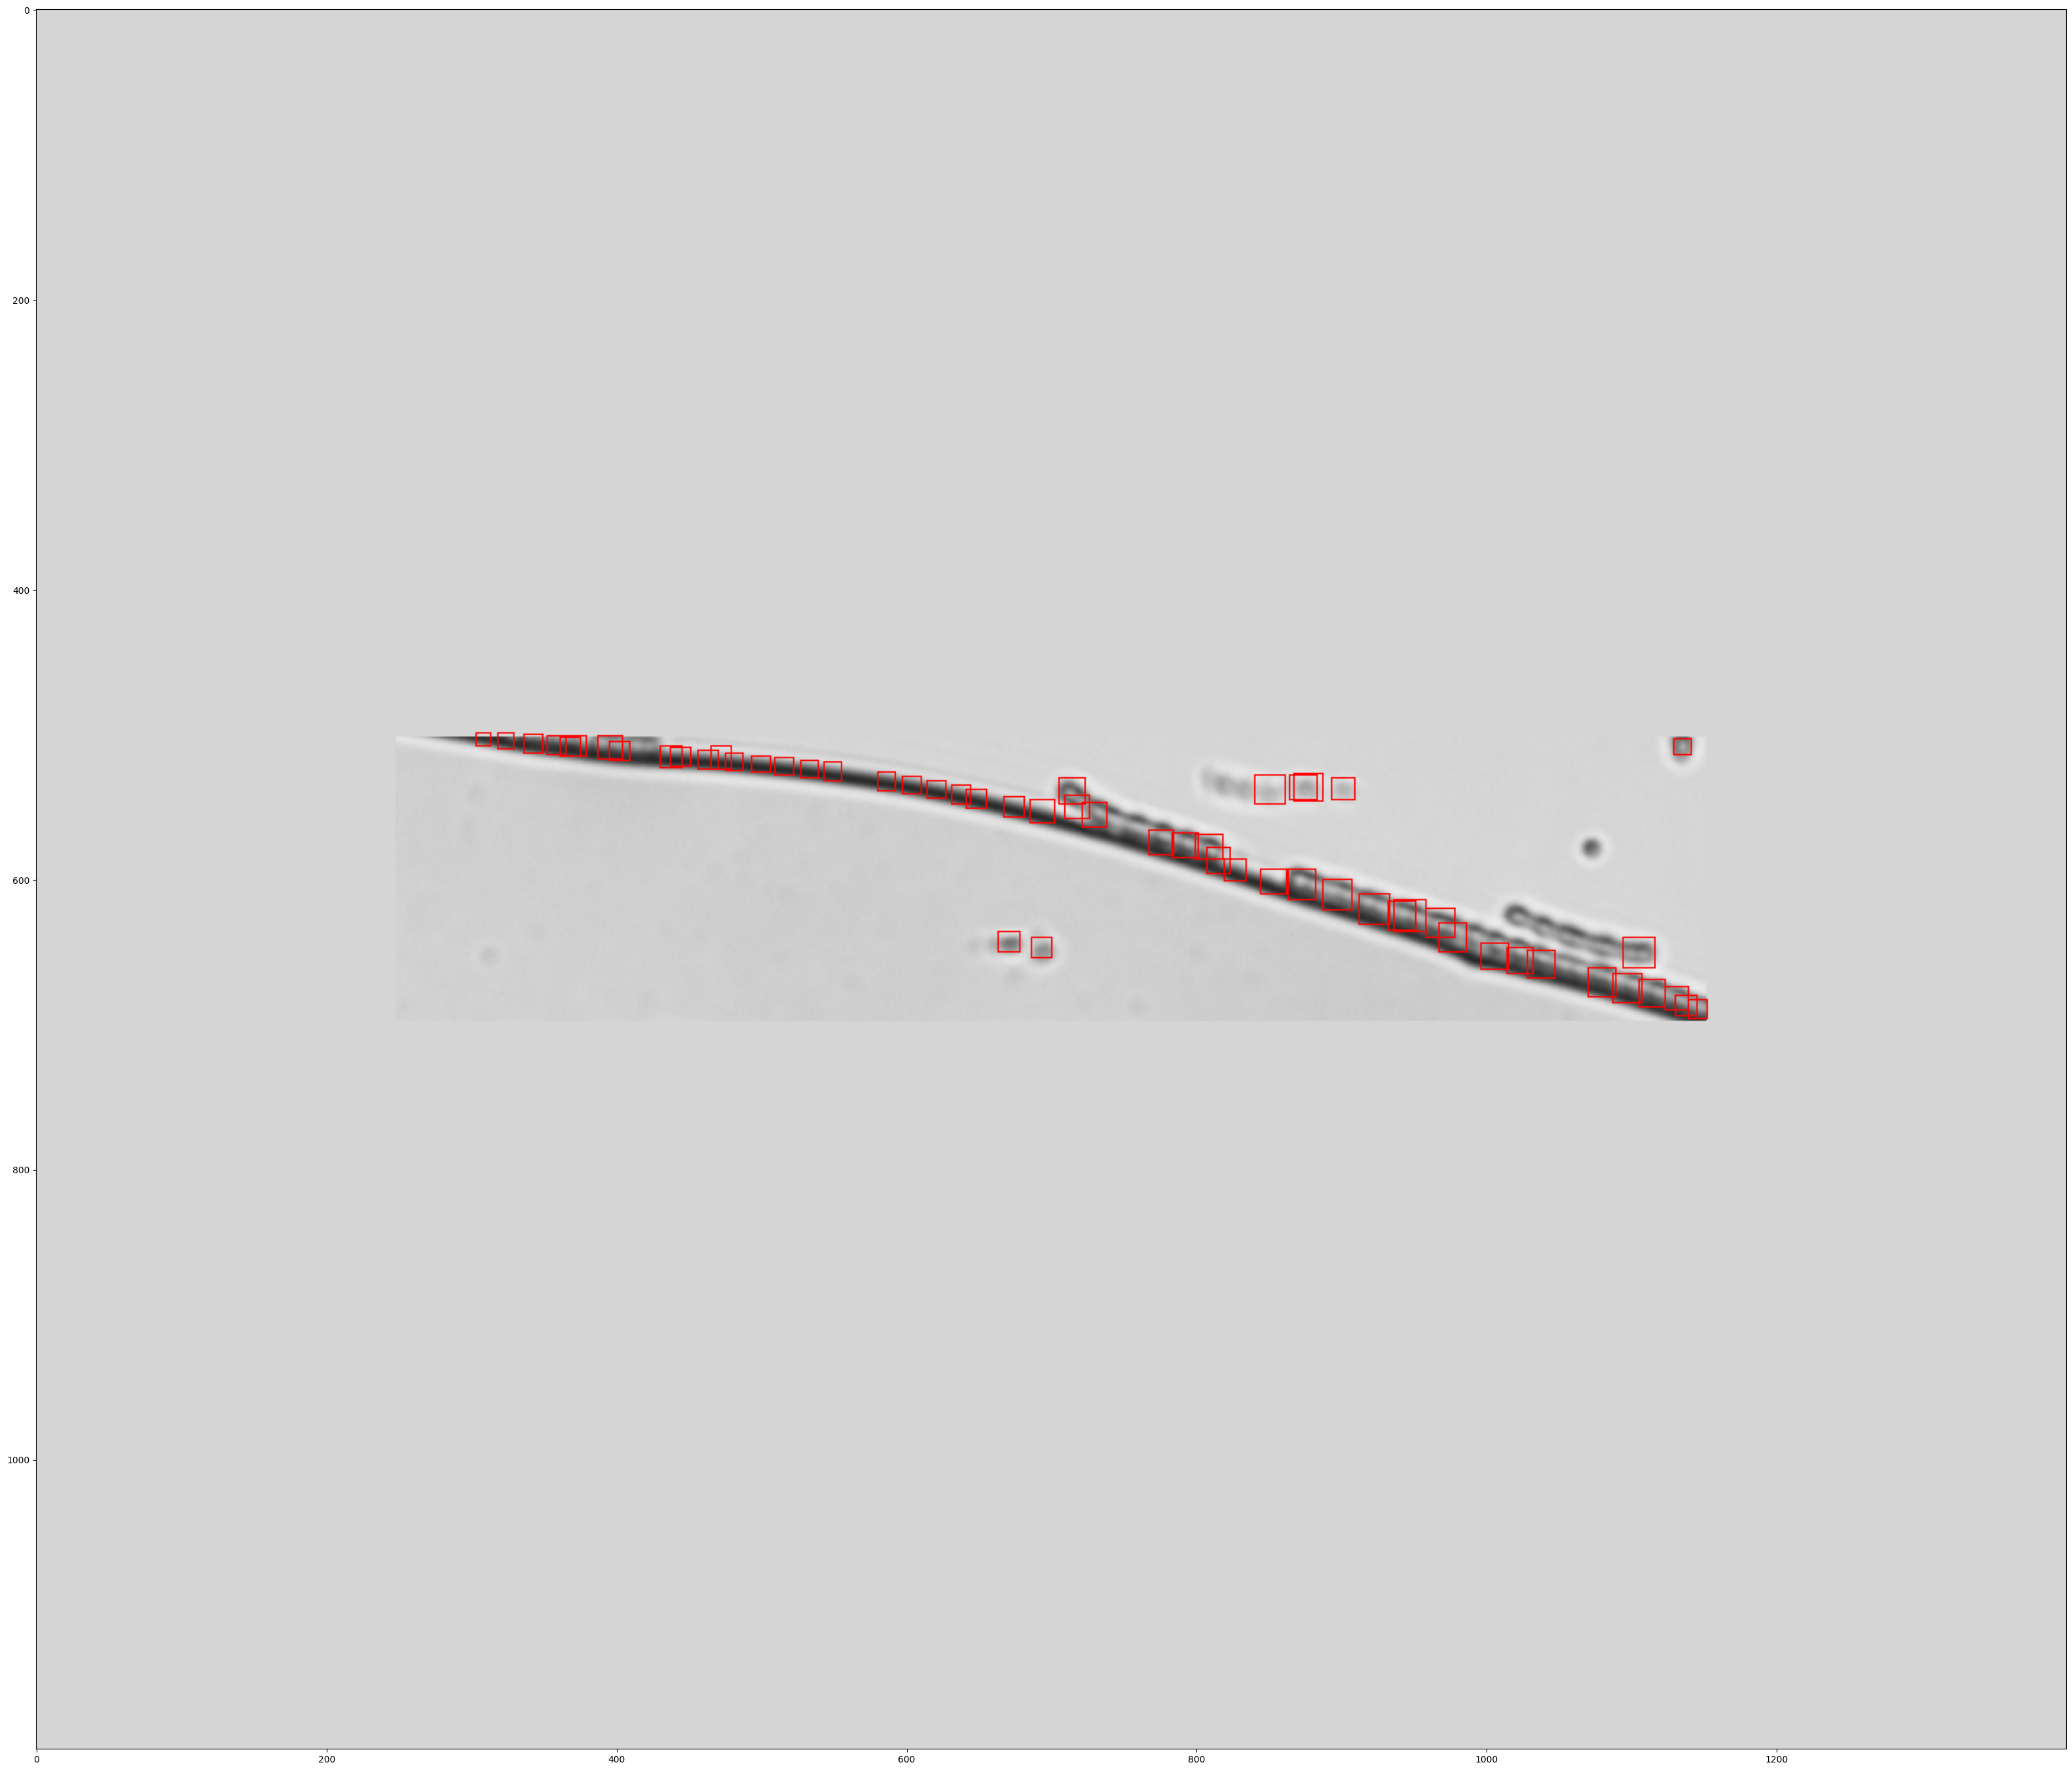

(133, 963, 3)


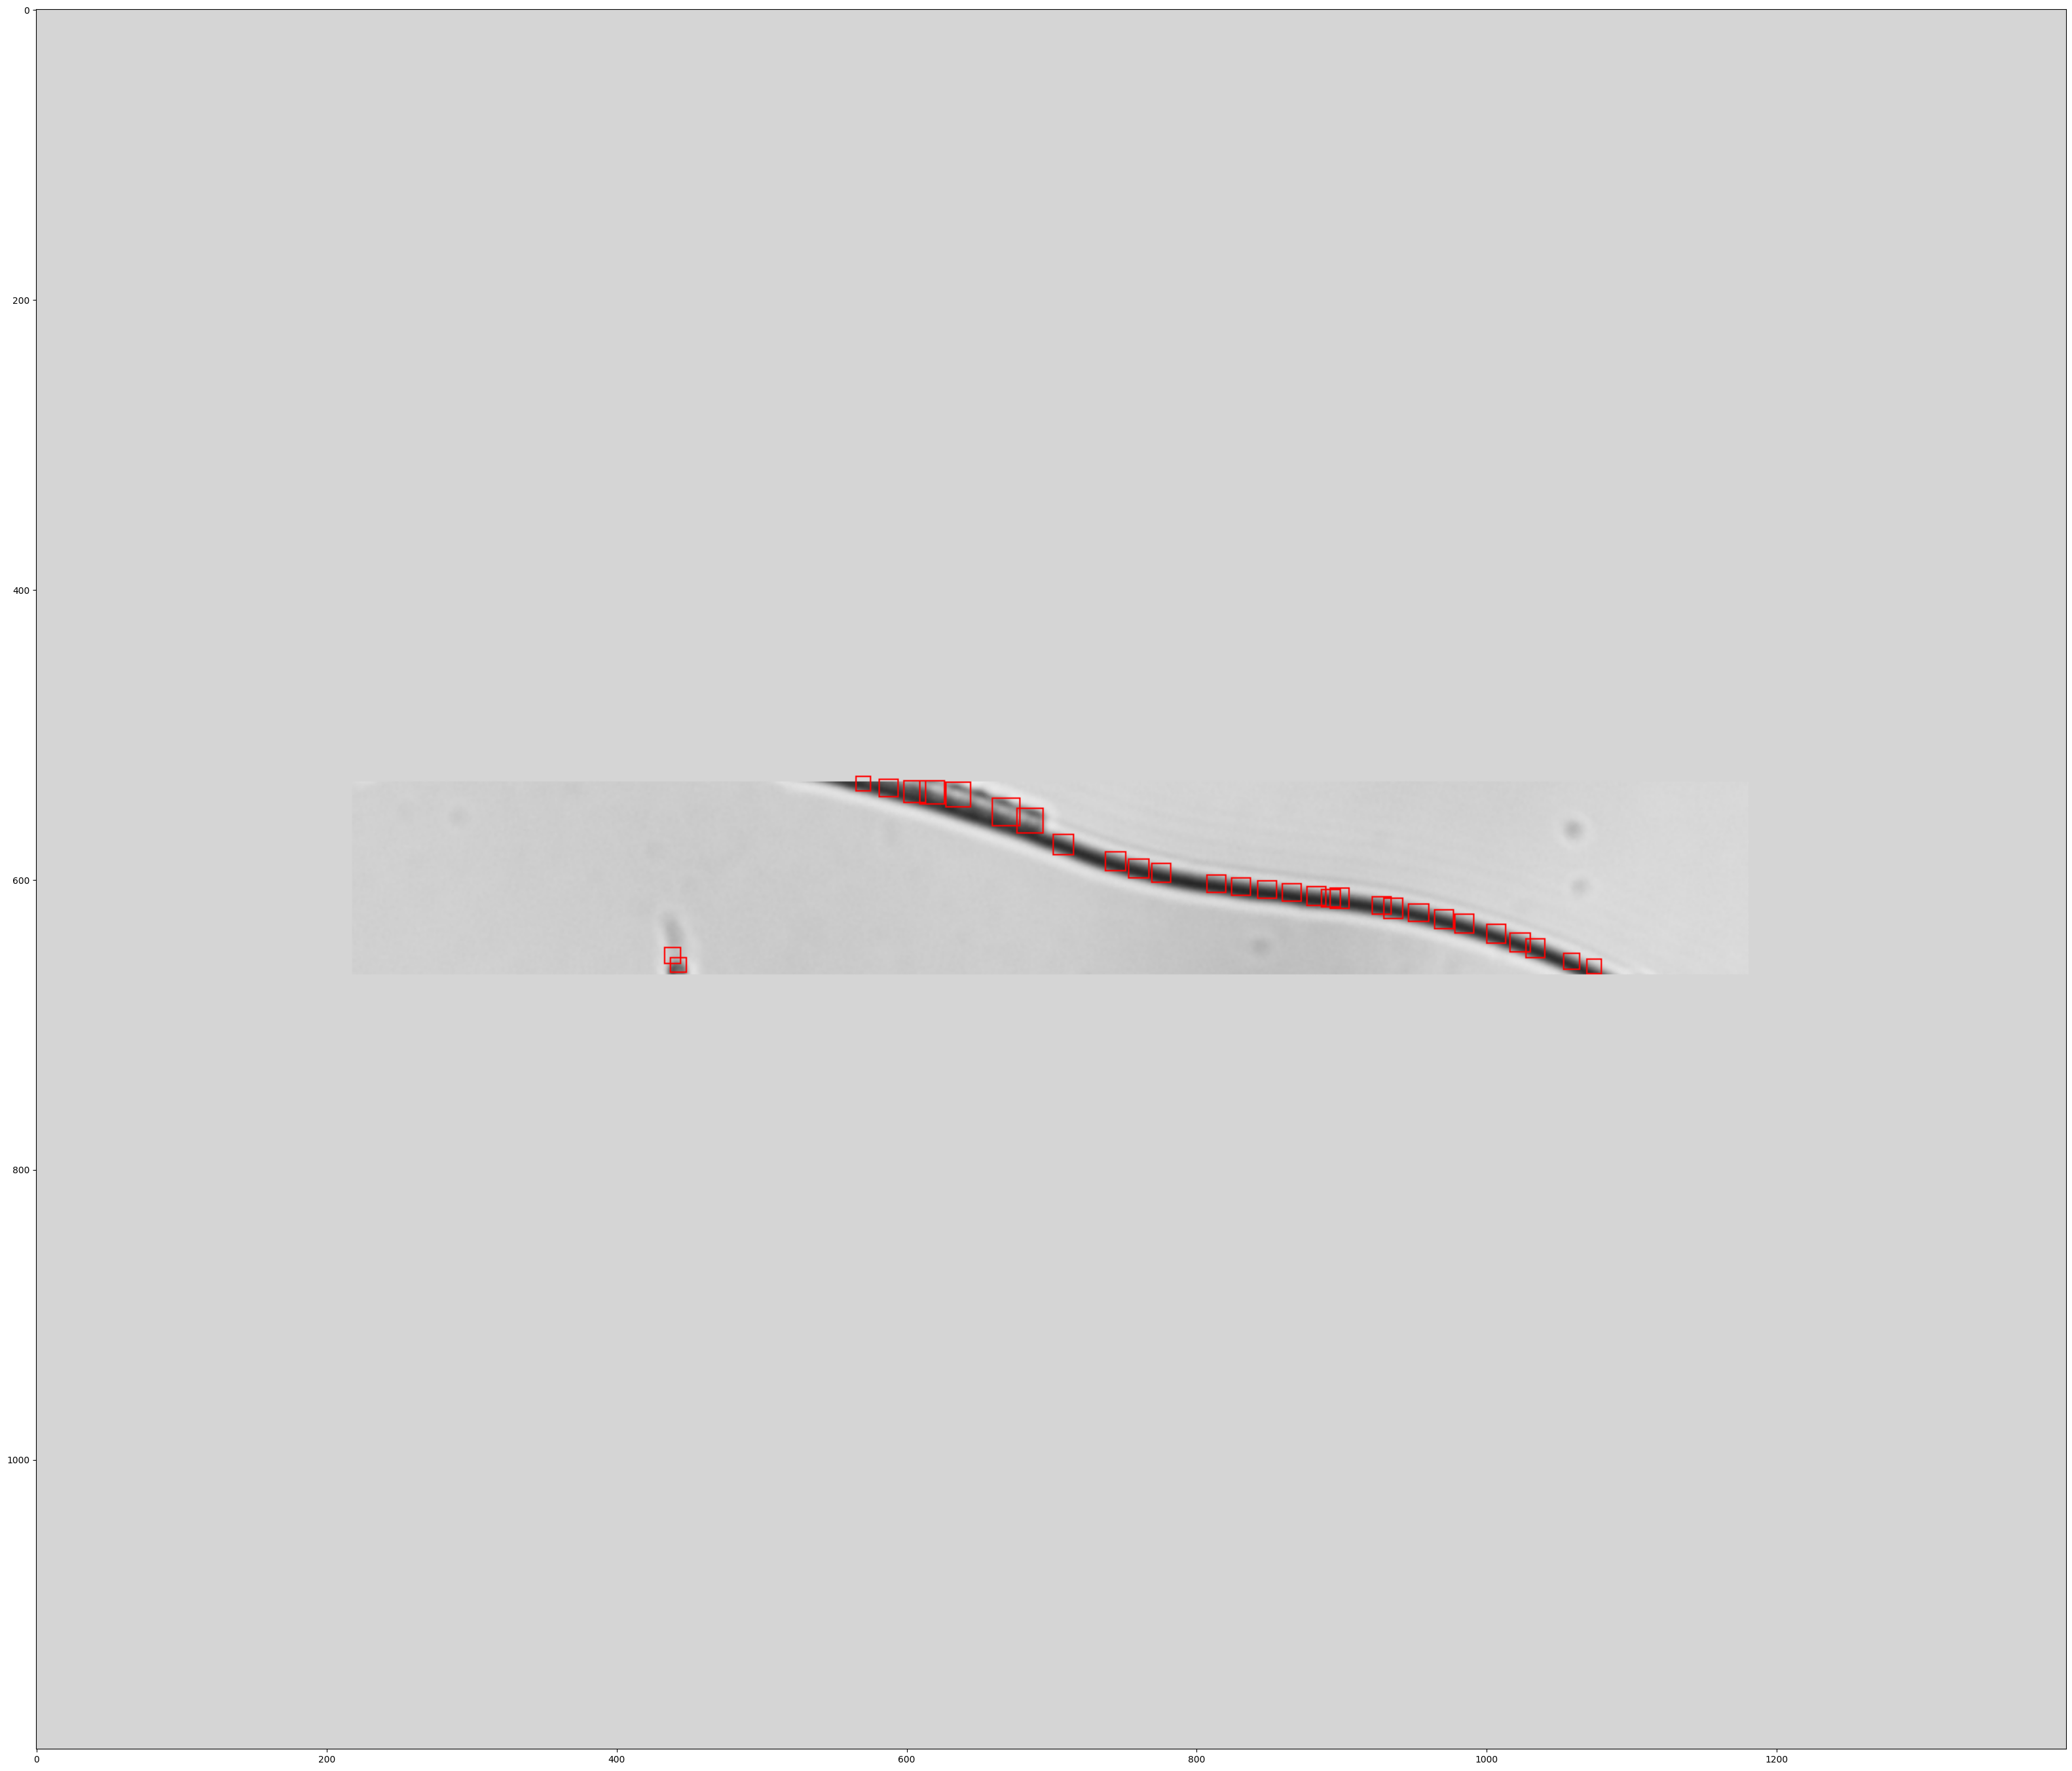

(237, 951, 3)


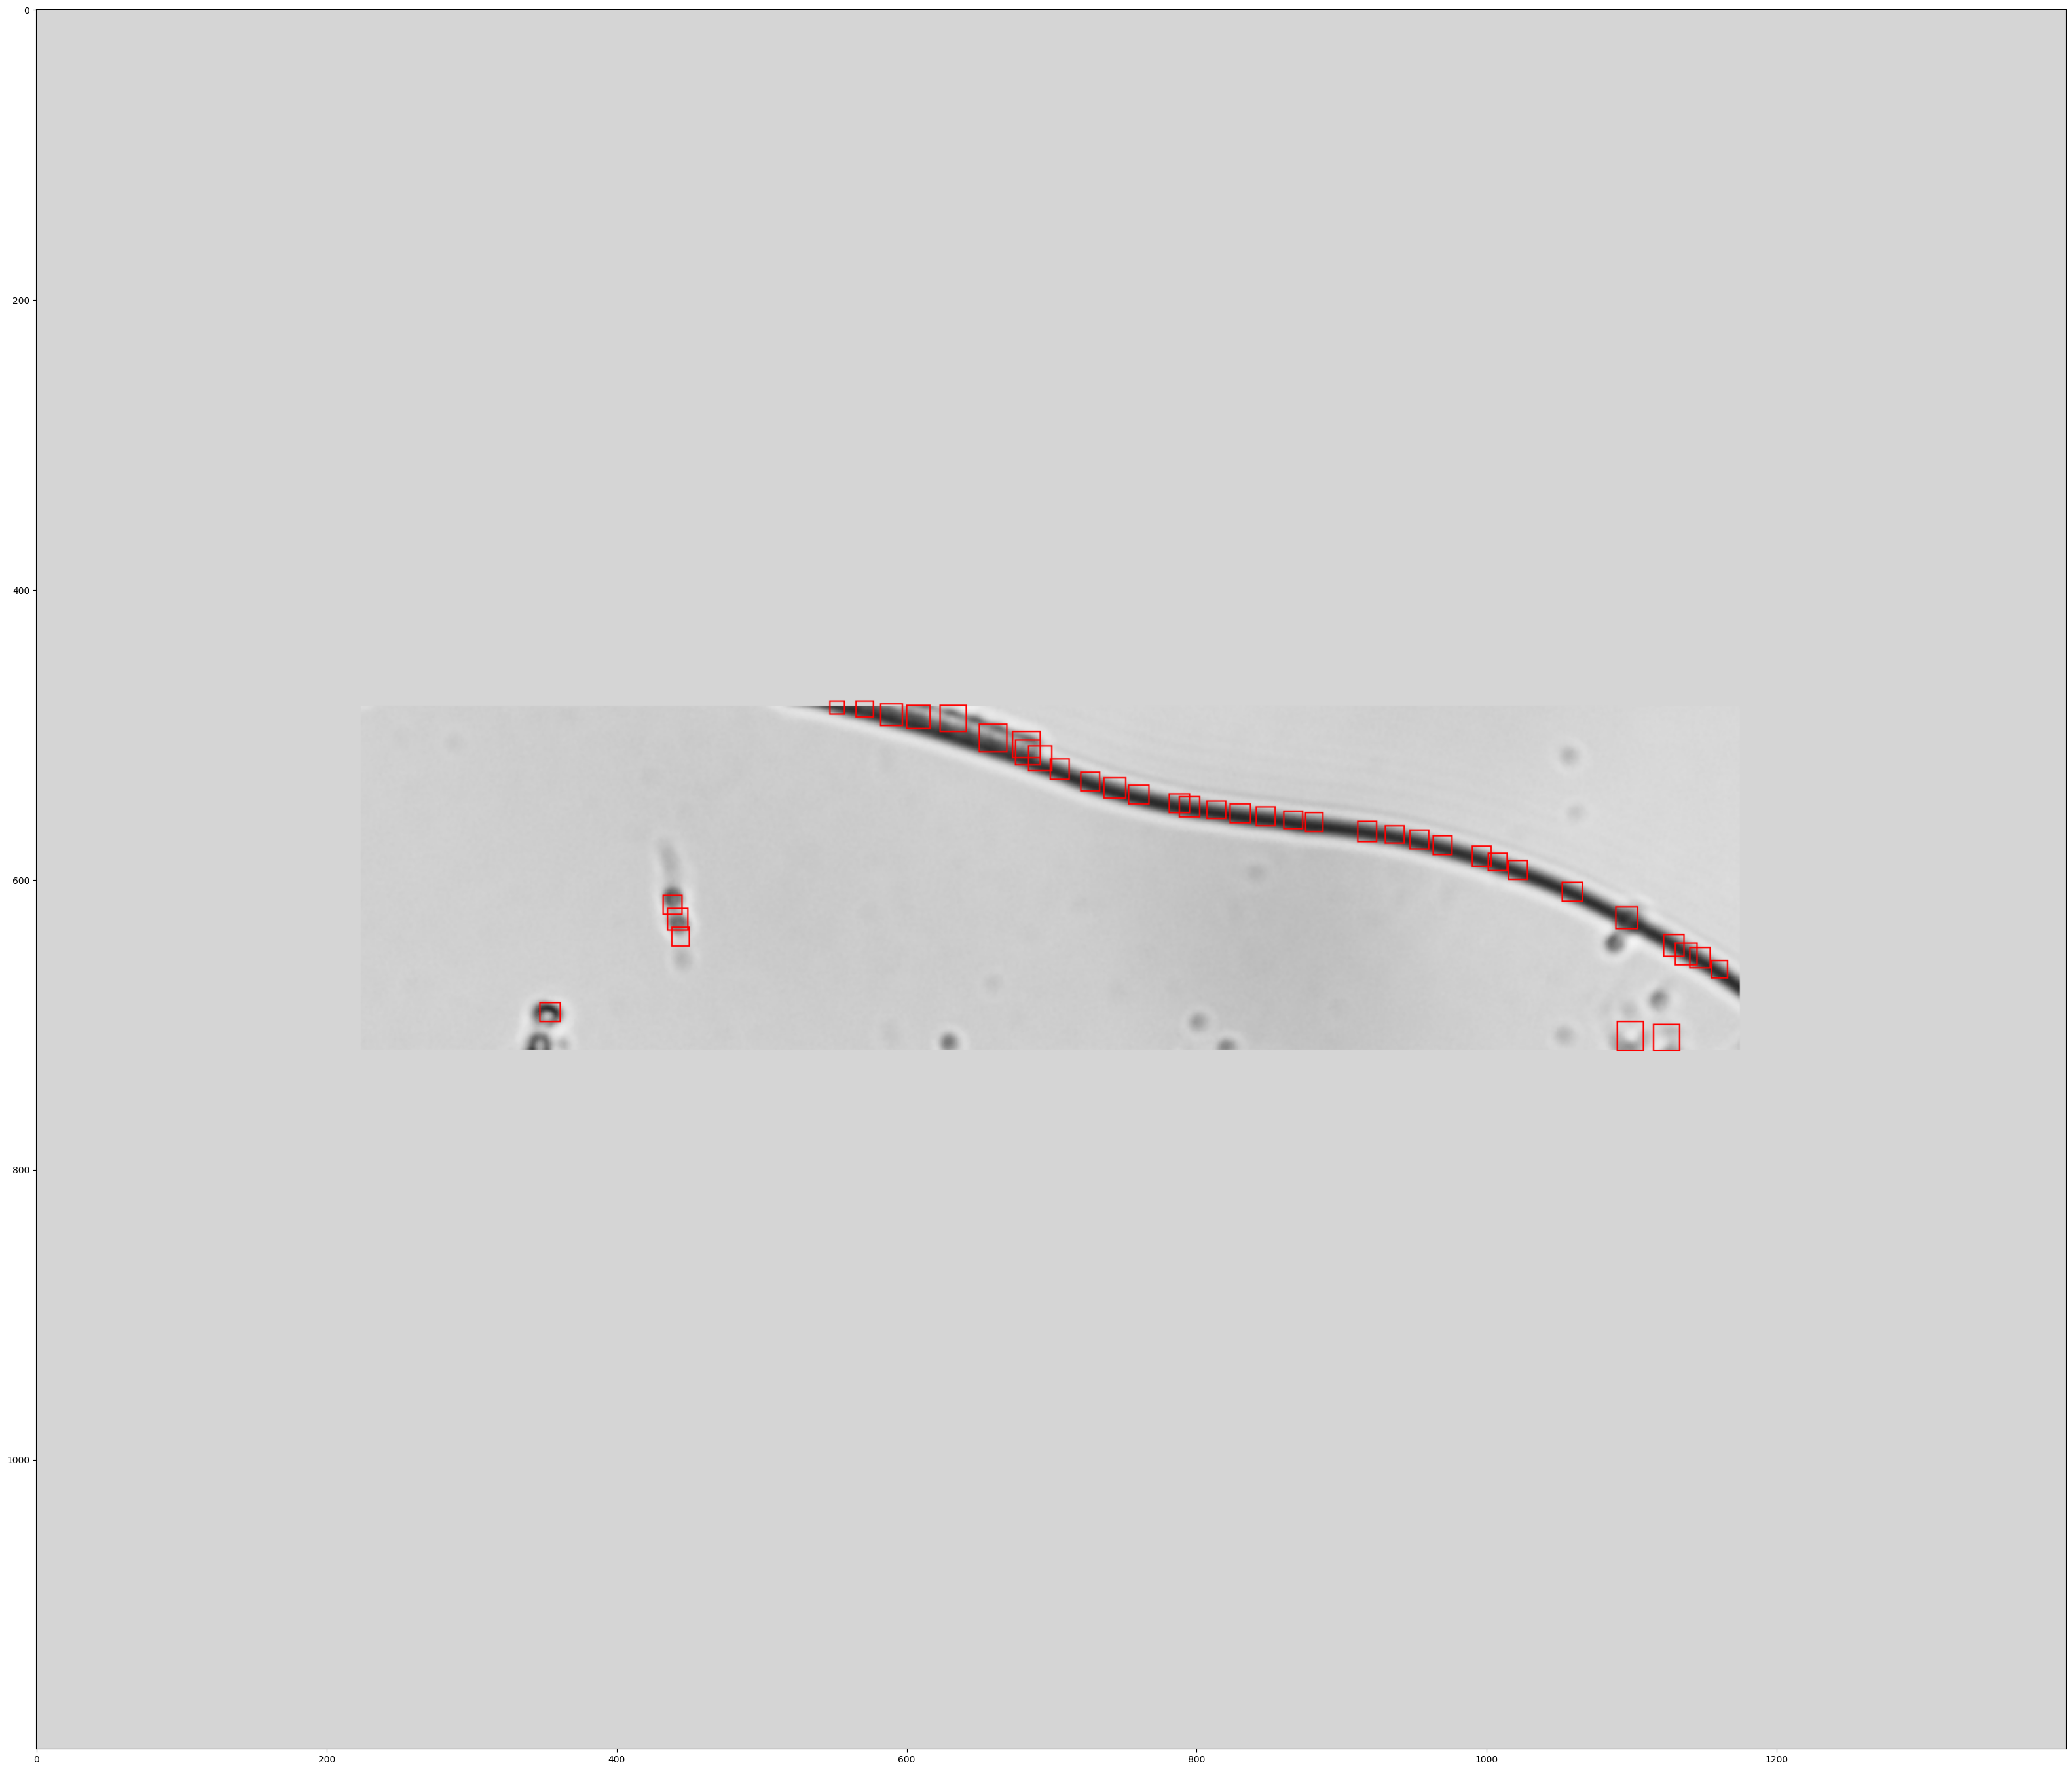

(32, 208, 3)


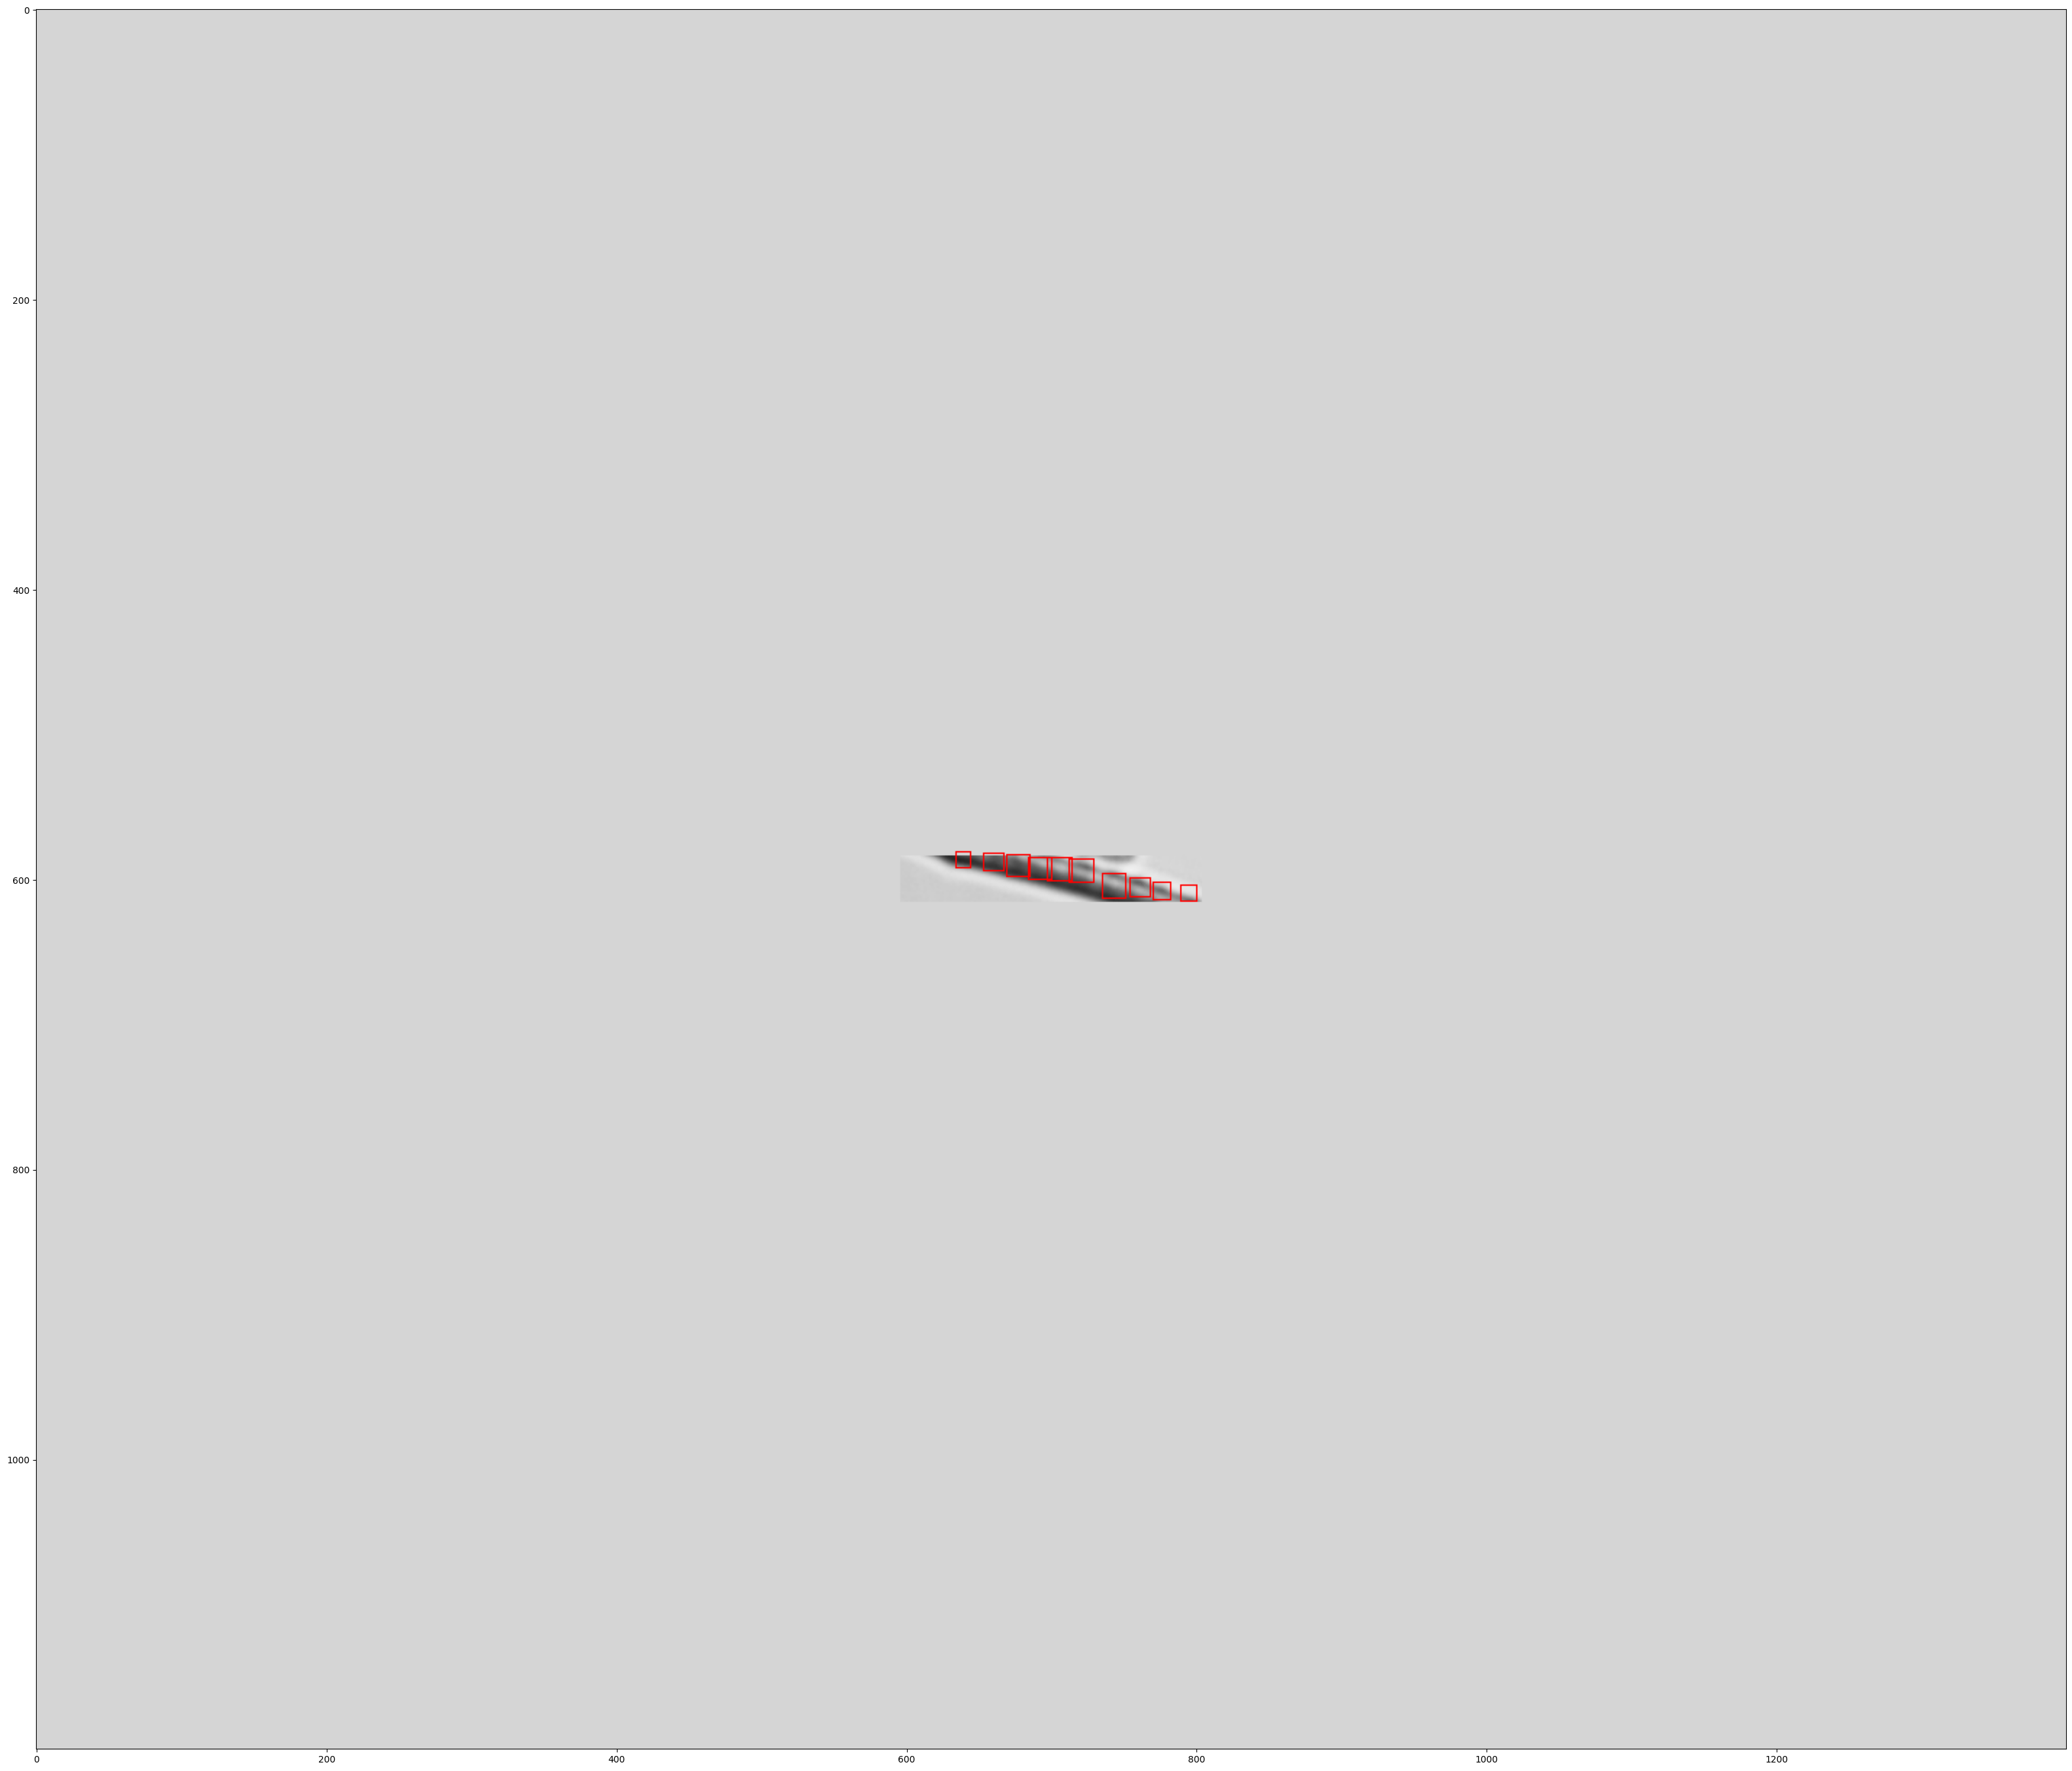

(74, 360, 3)


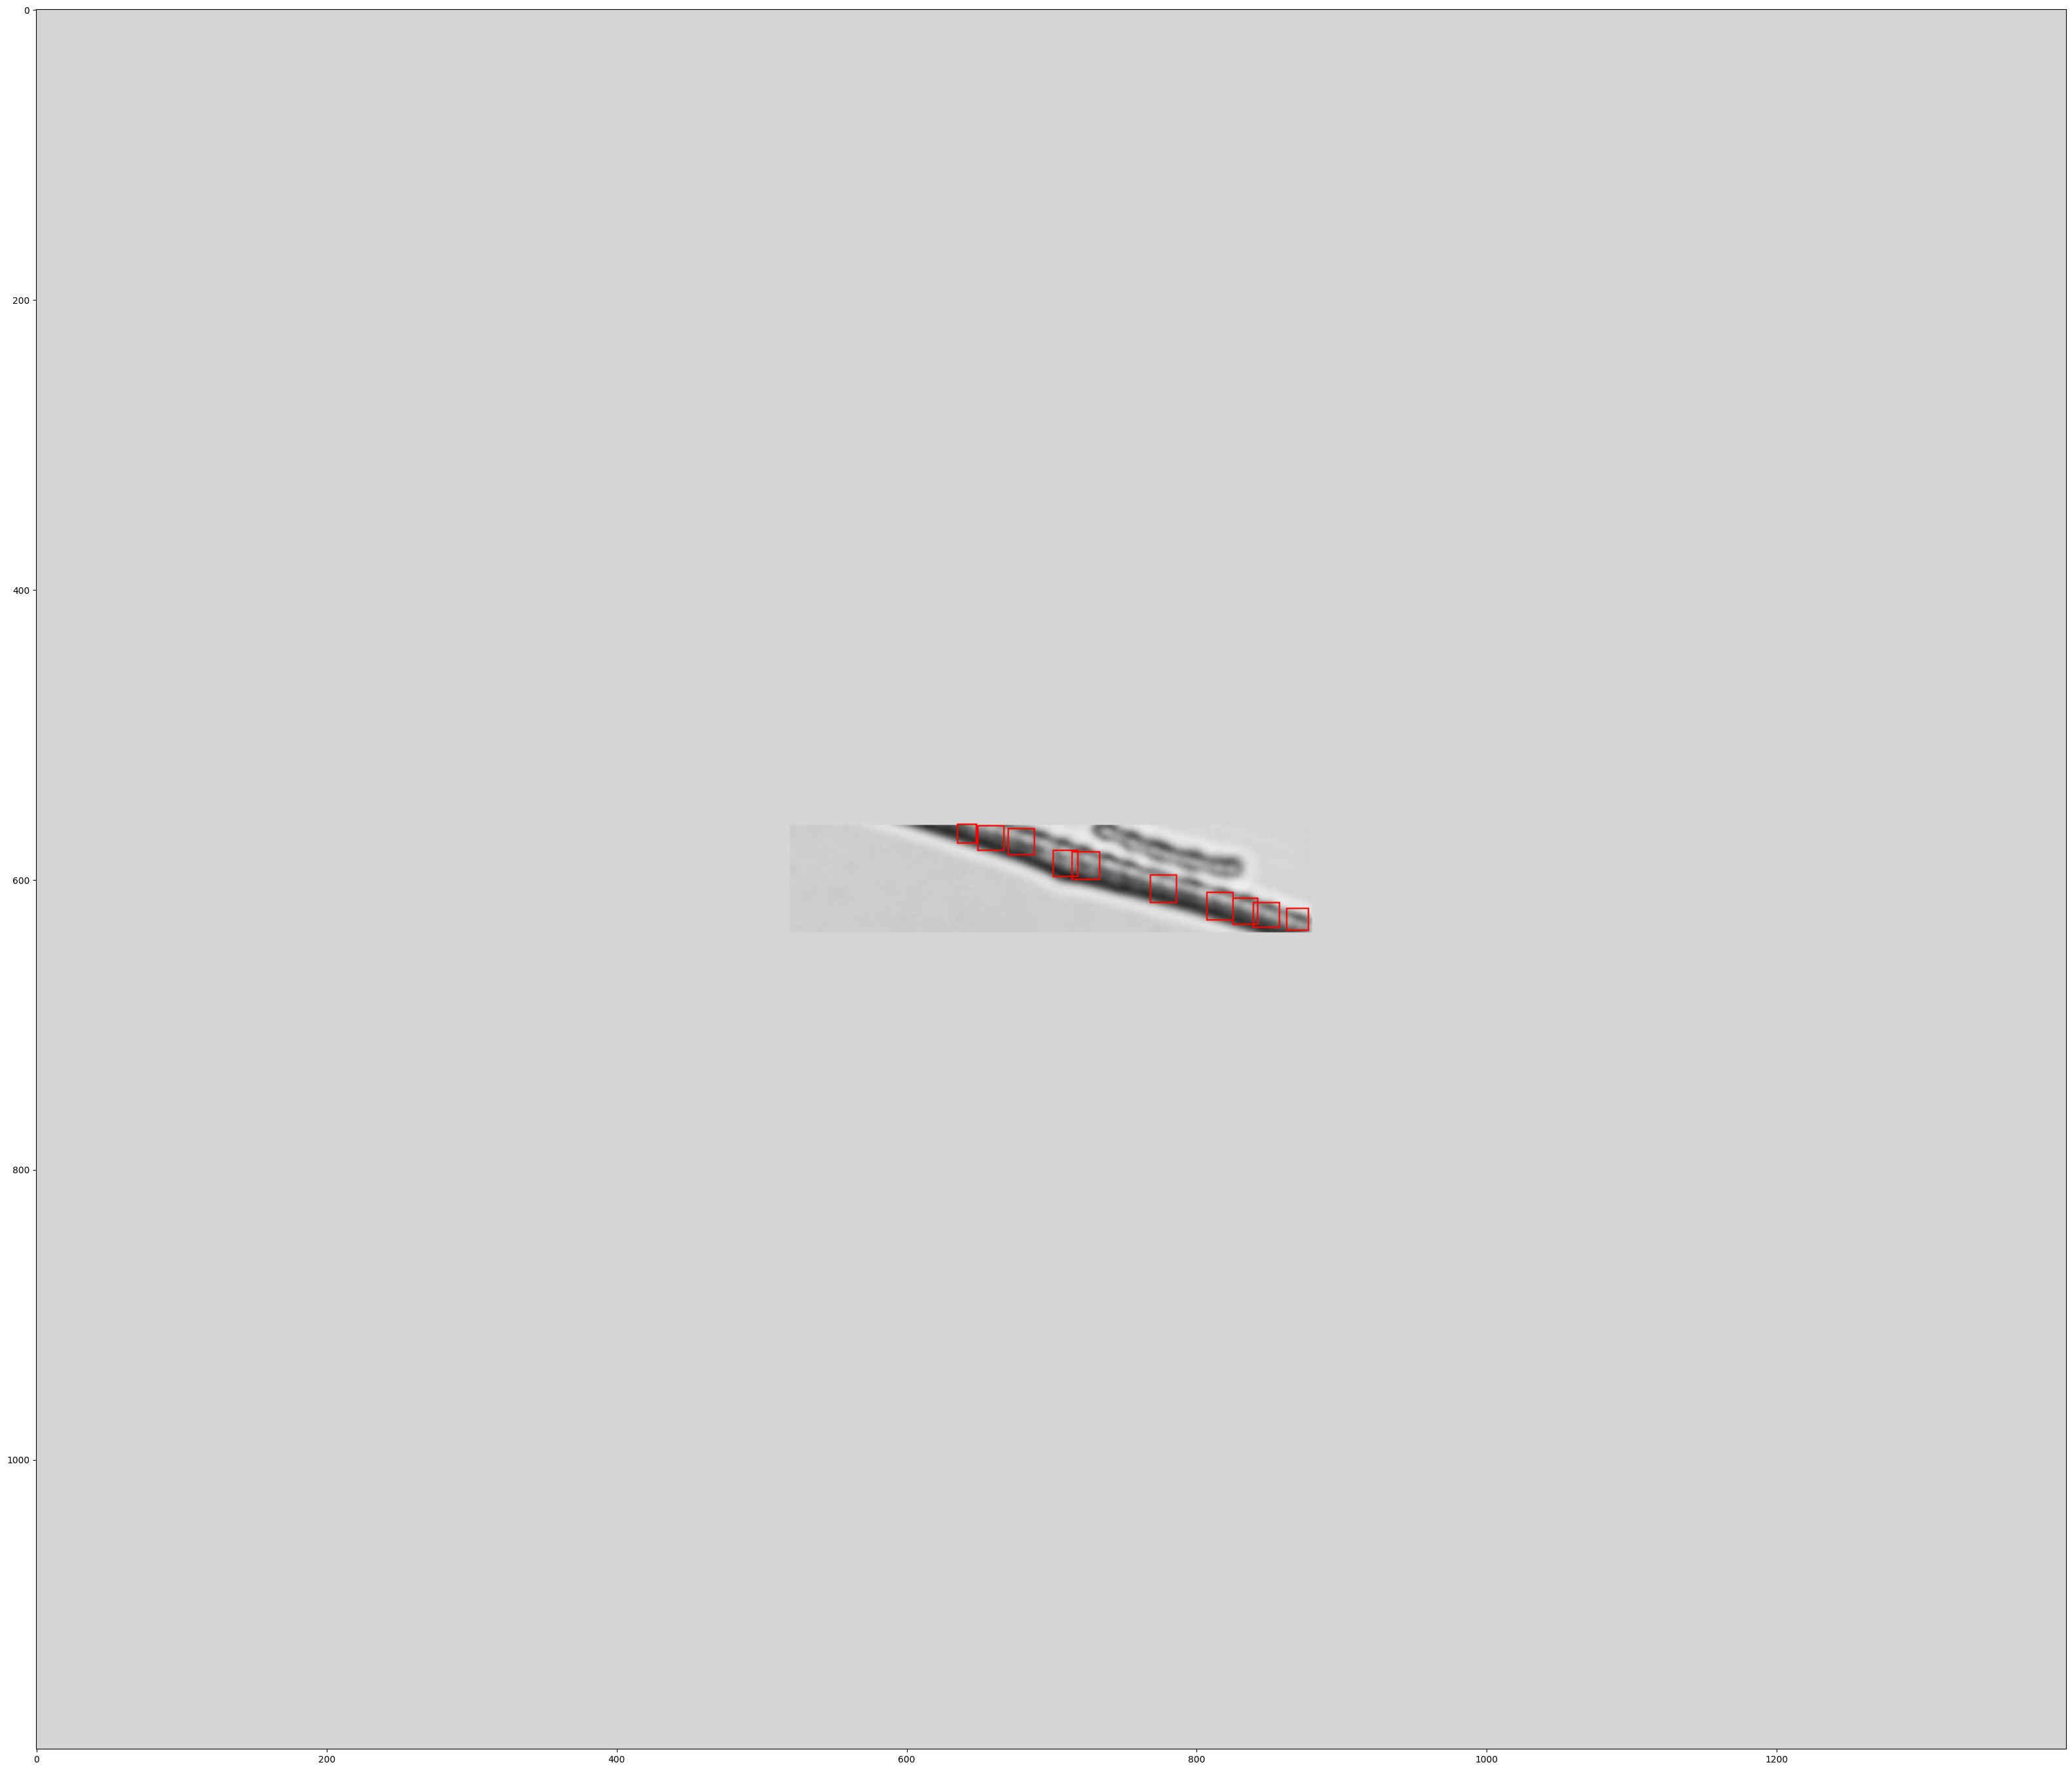

(31, 166, 3)


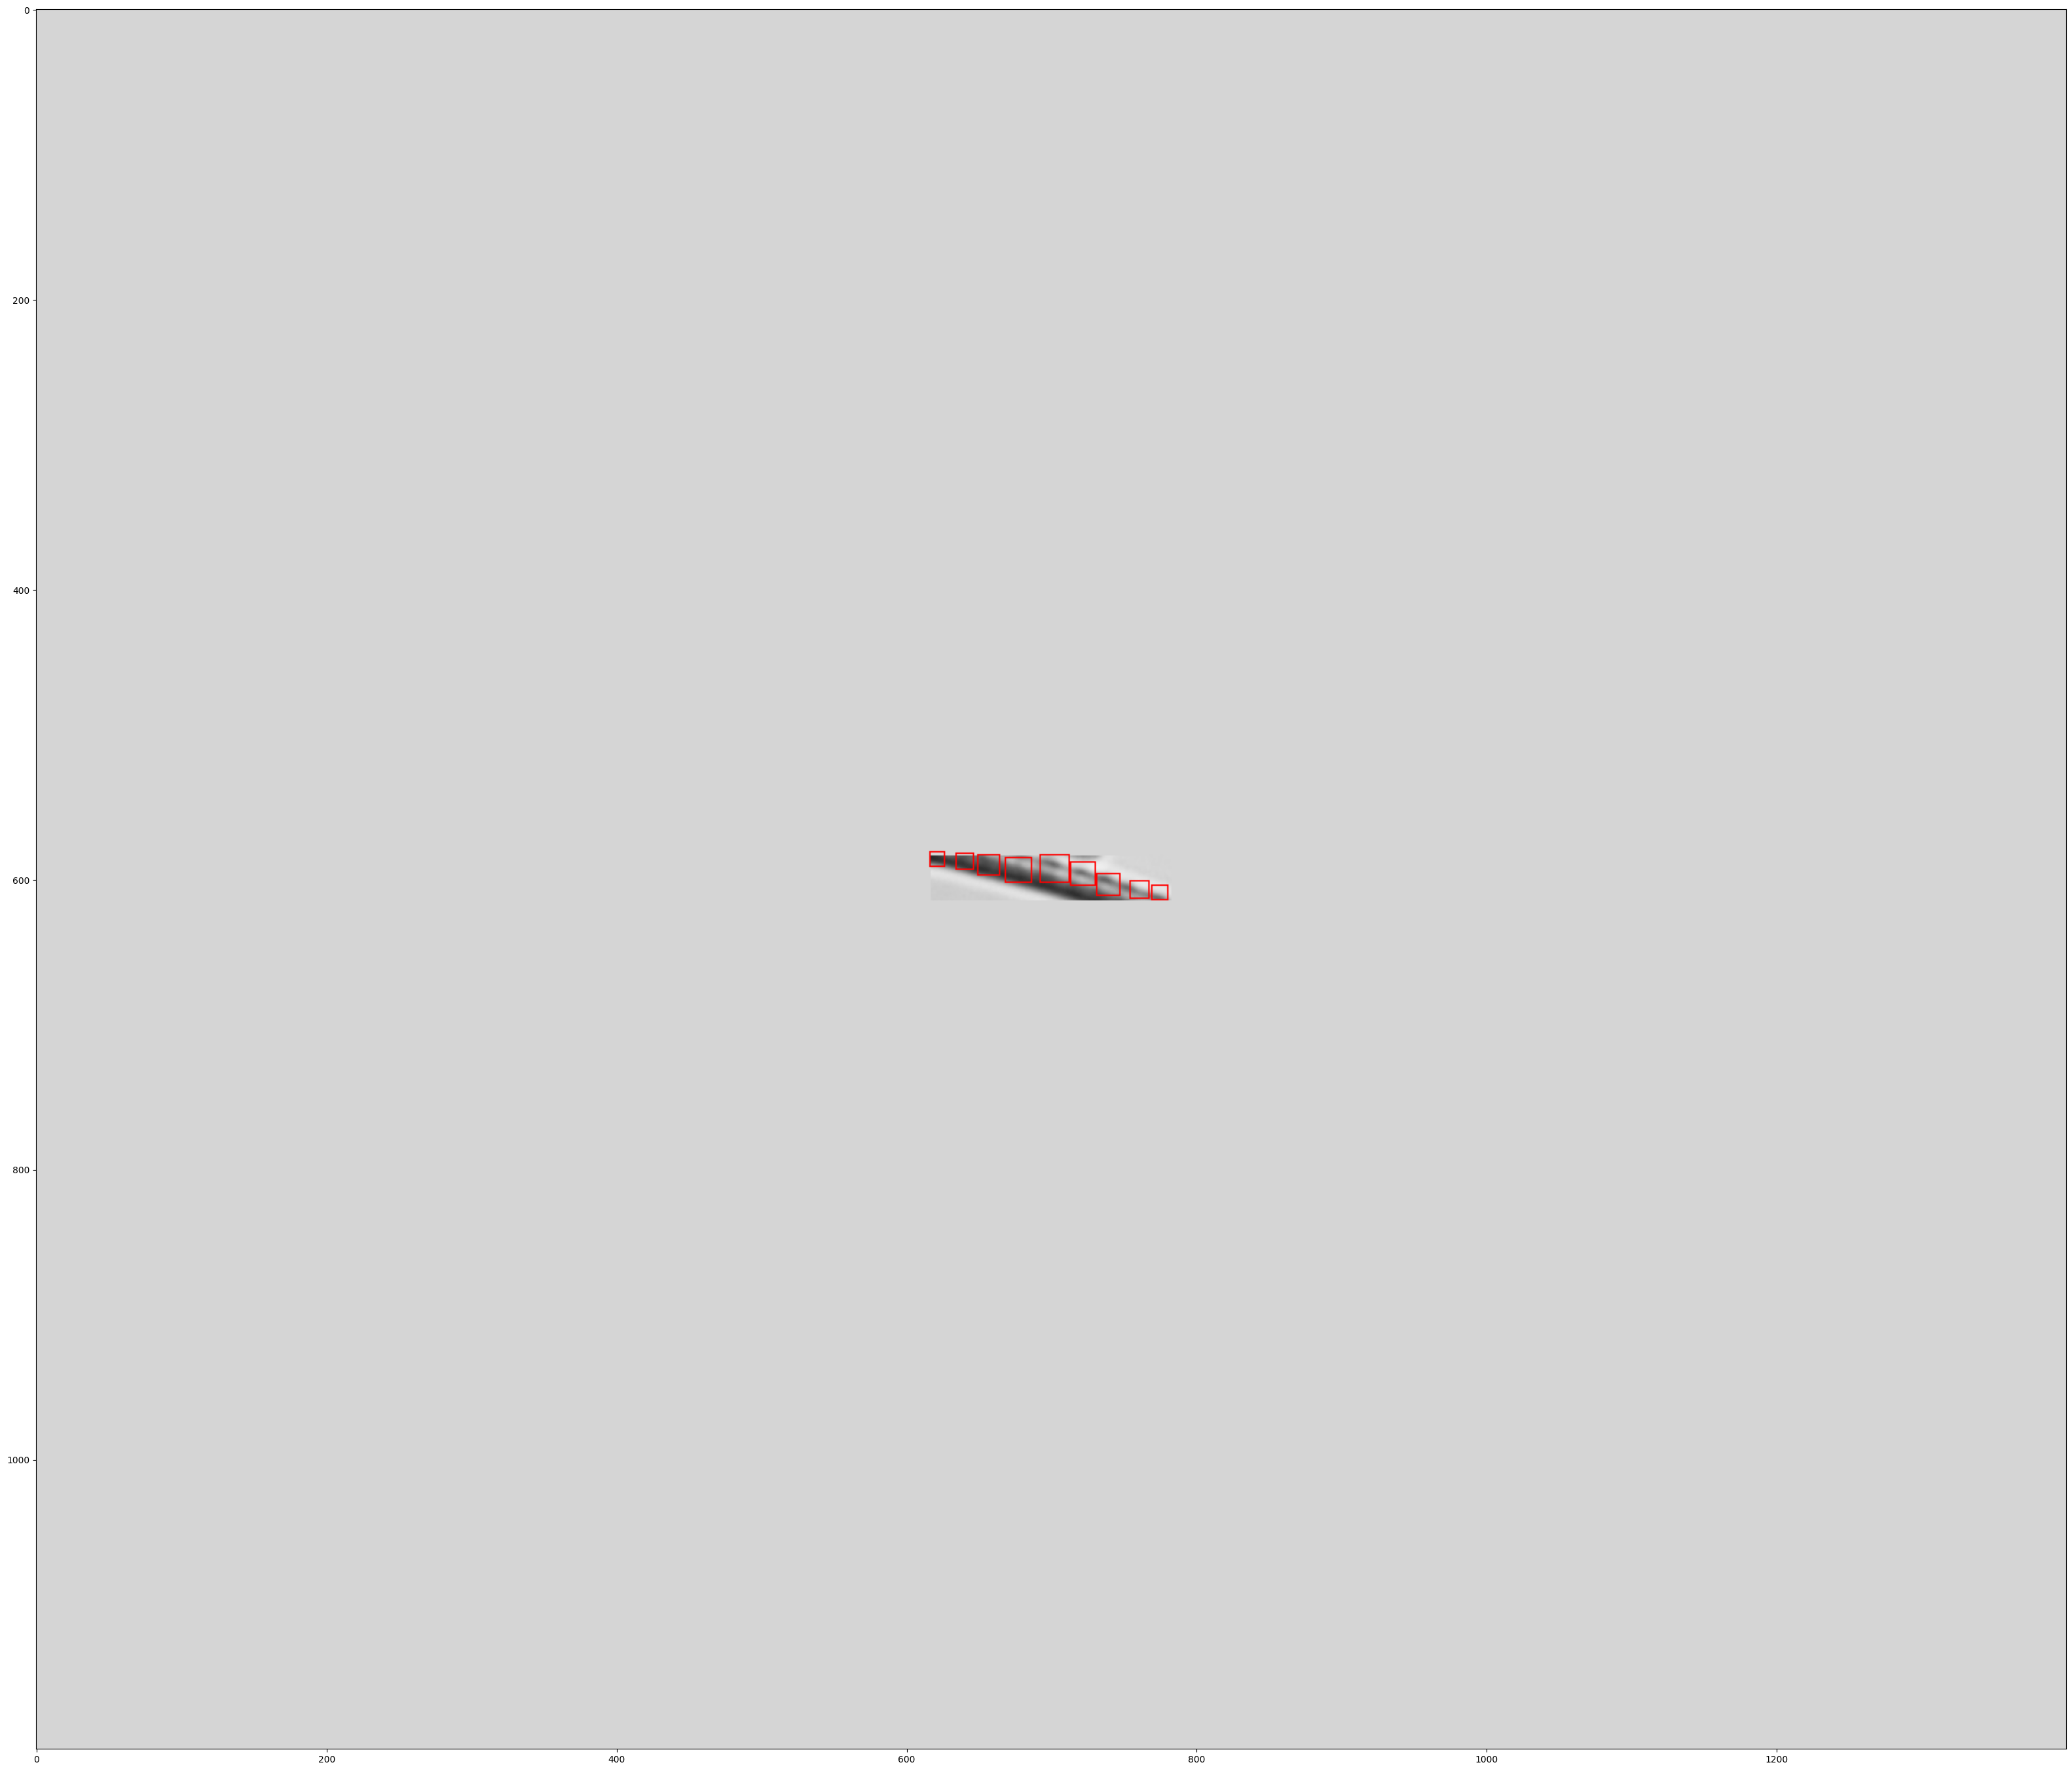

(361, 917, 3)


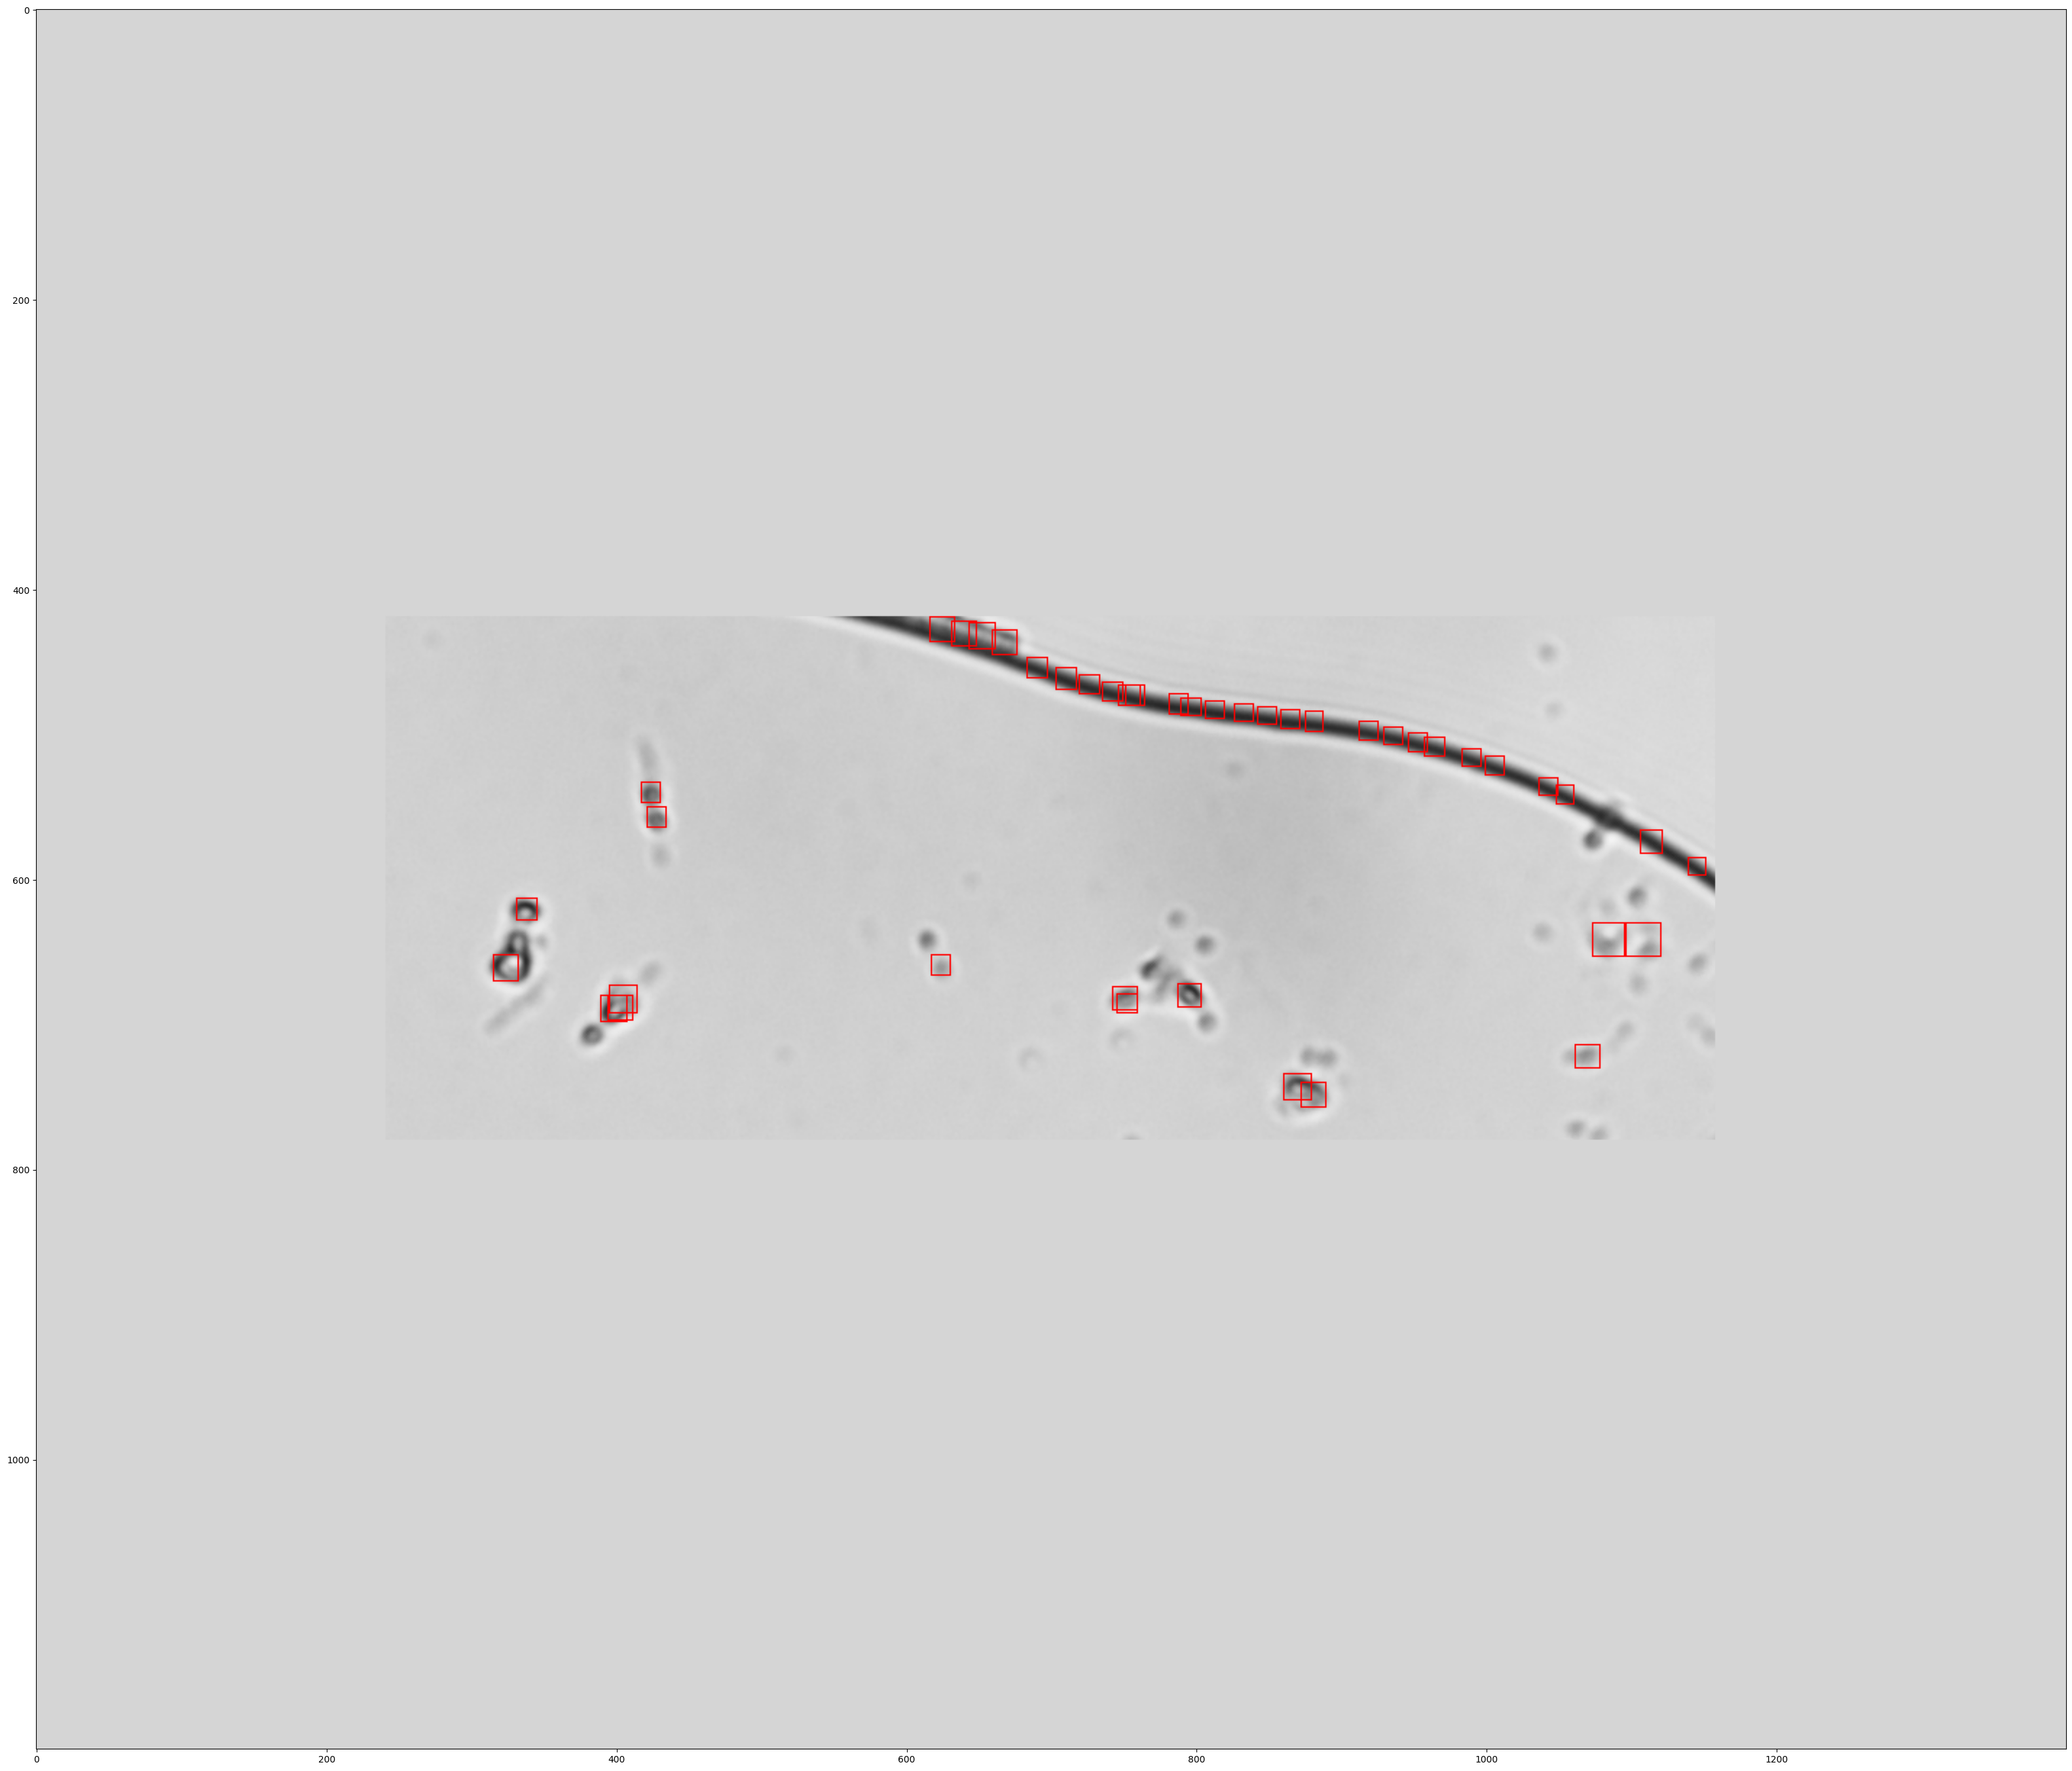

(72, 292, 3)


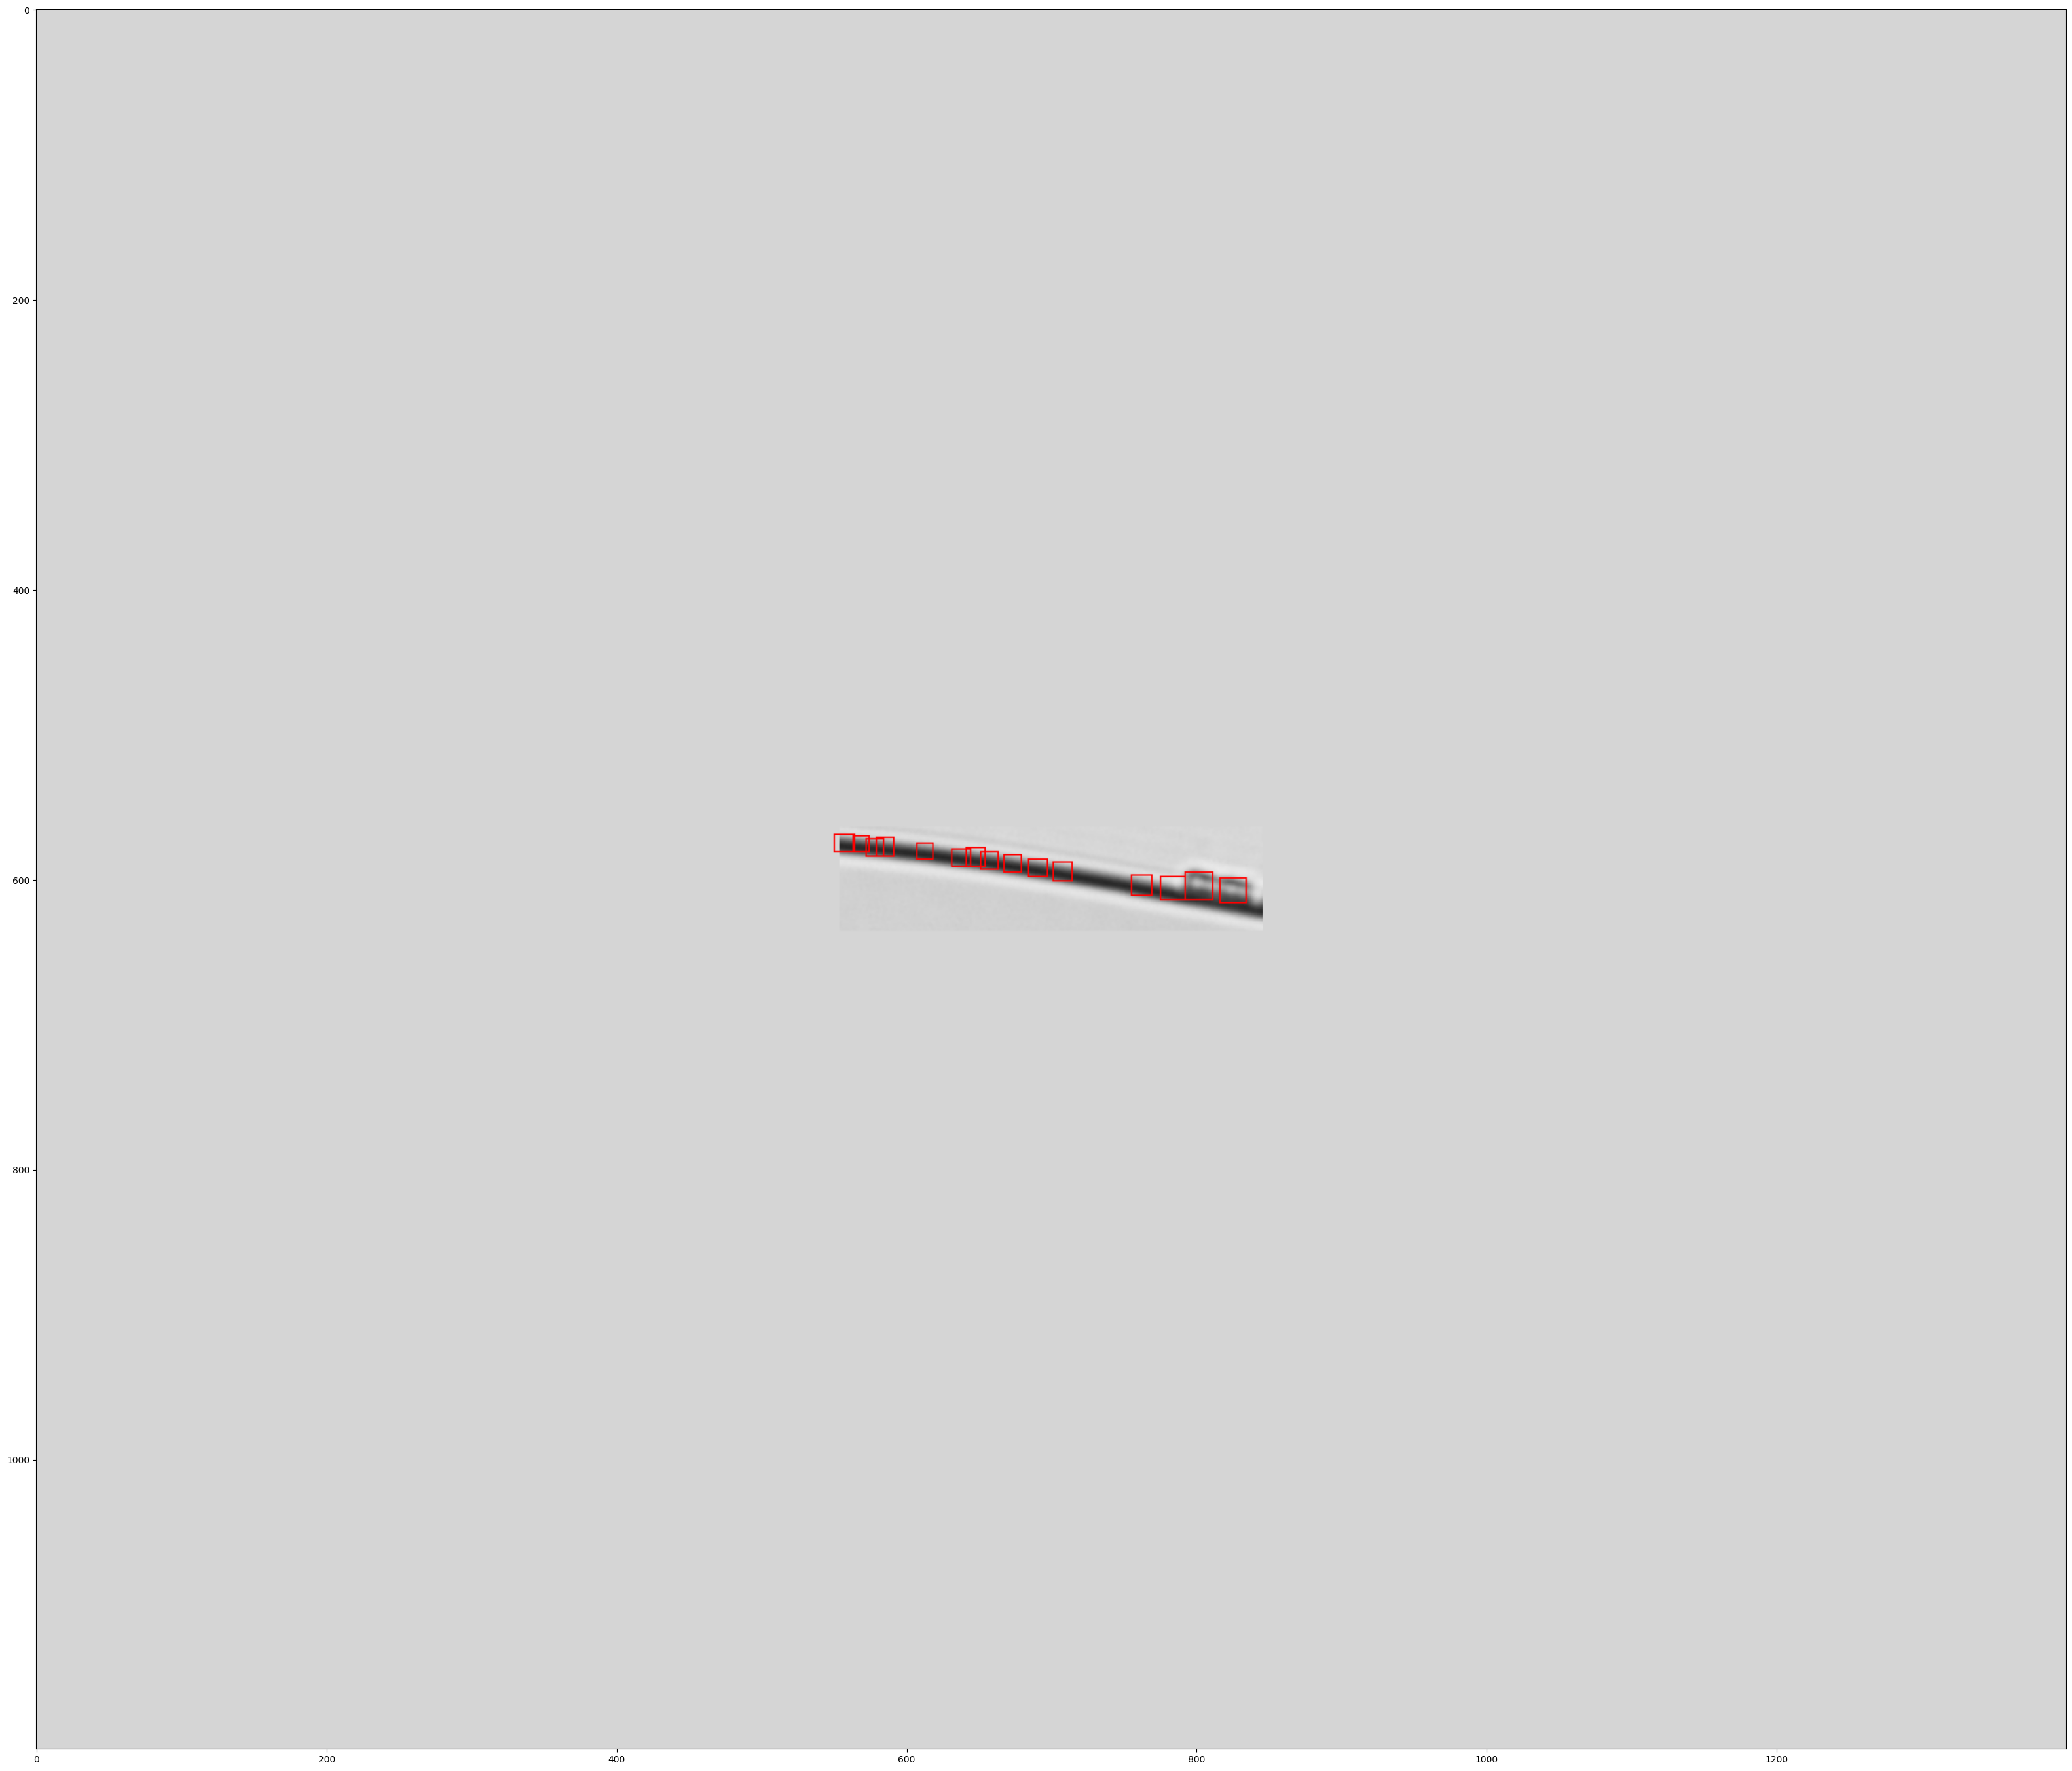

(60, 280, 3)


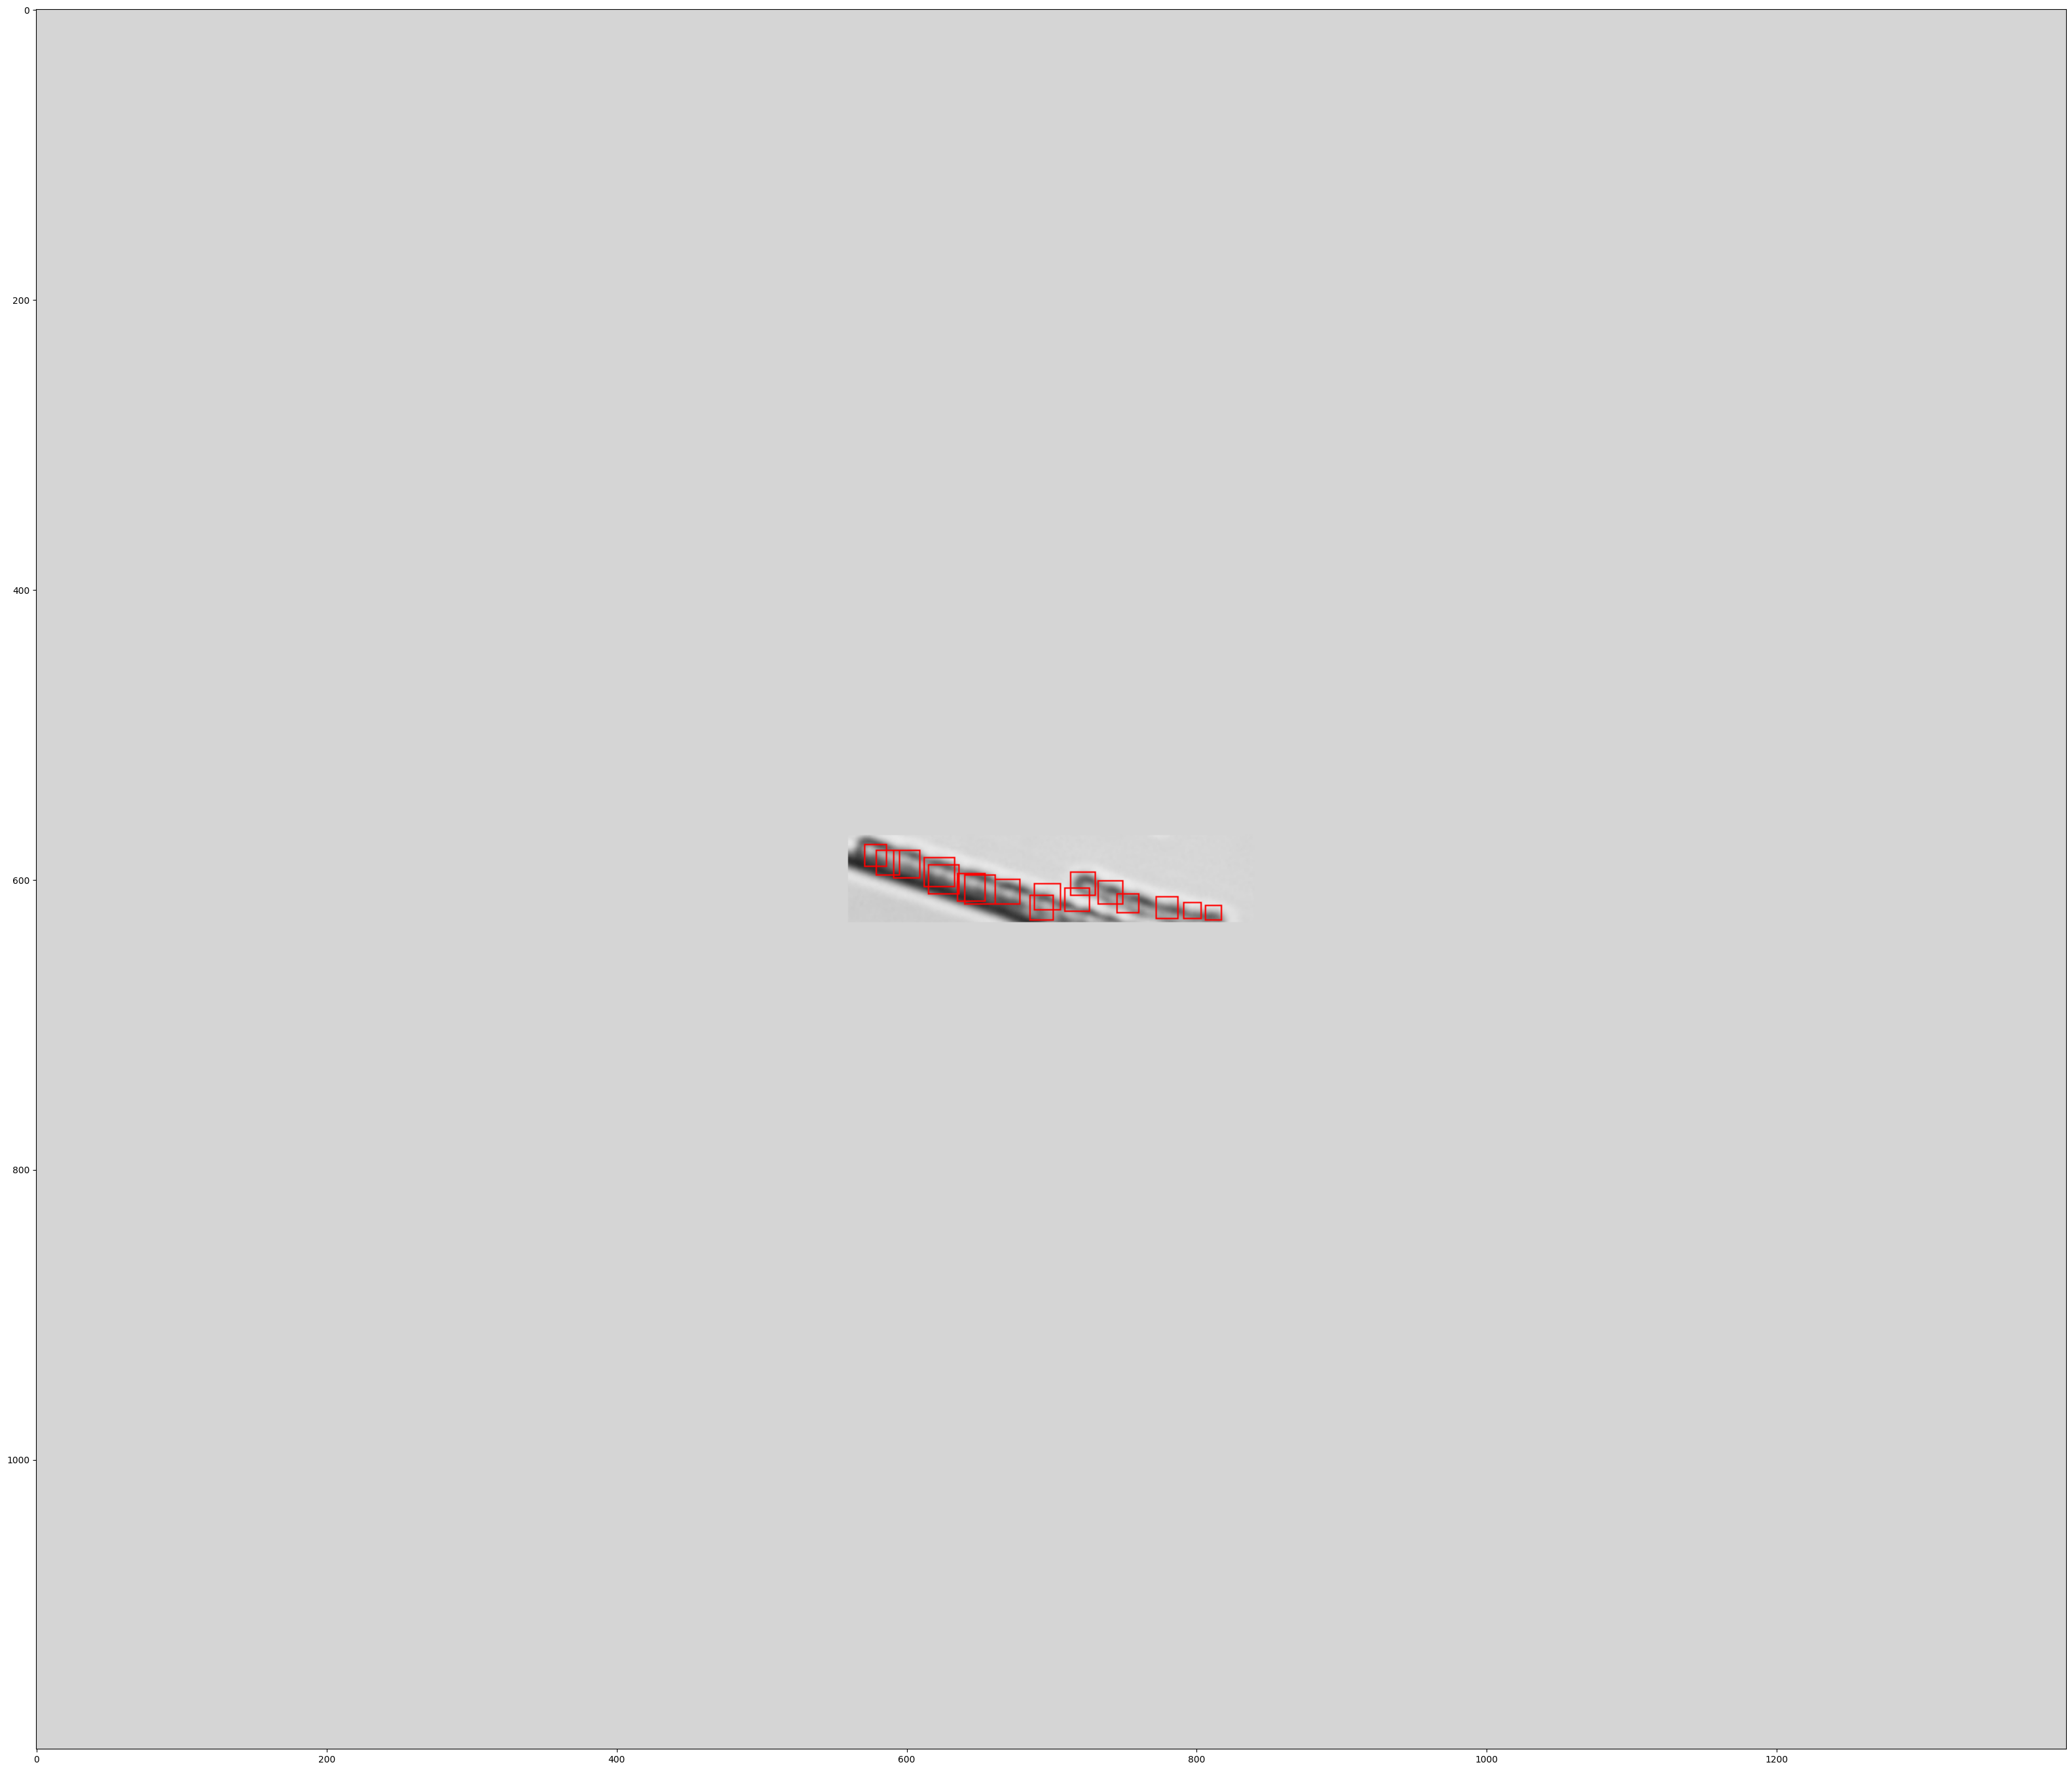

 64%|██████████████████████████████████████████████████████████████████████████████████▋                                               | 7/11 [00:37<00:30,  7.74s/it]

(171, 168, 3)


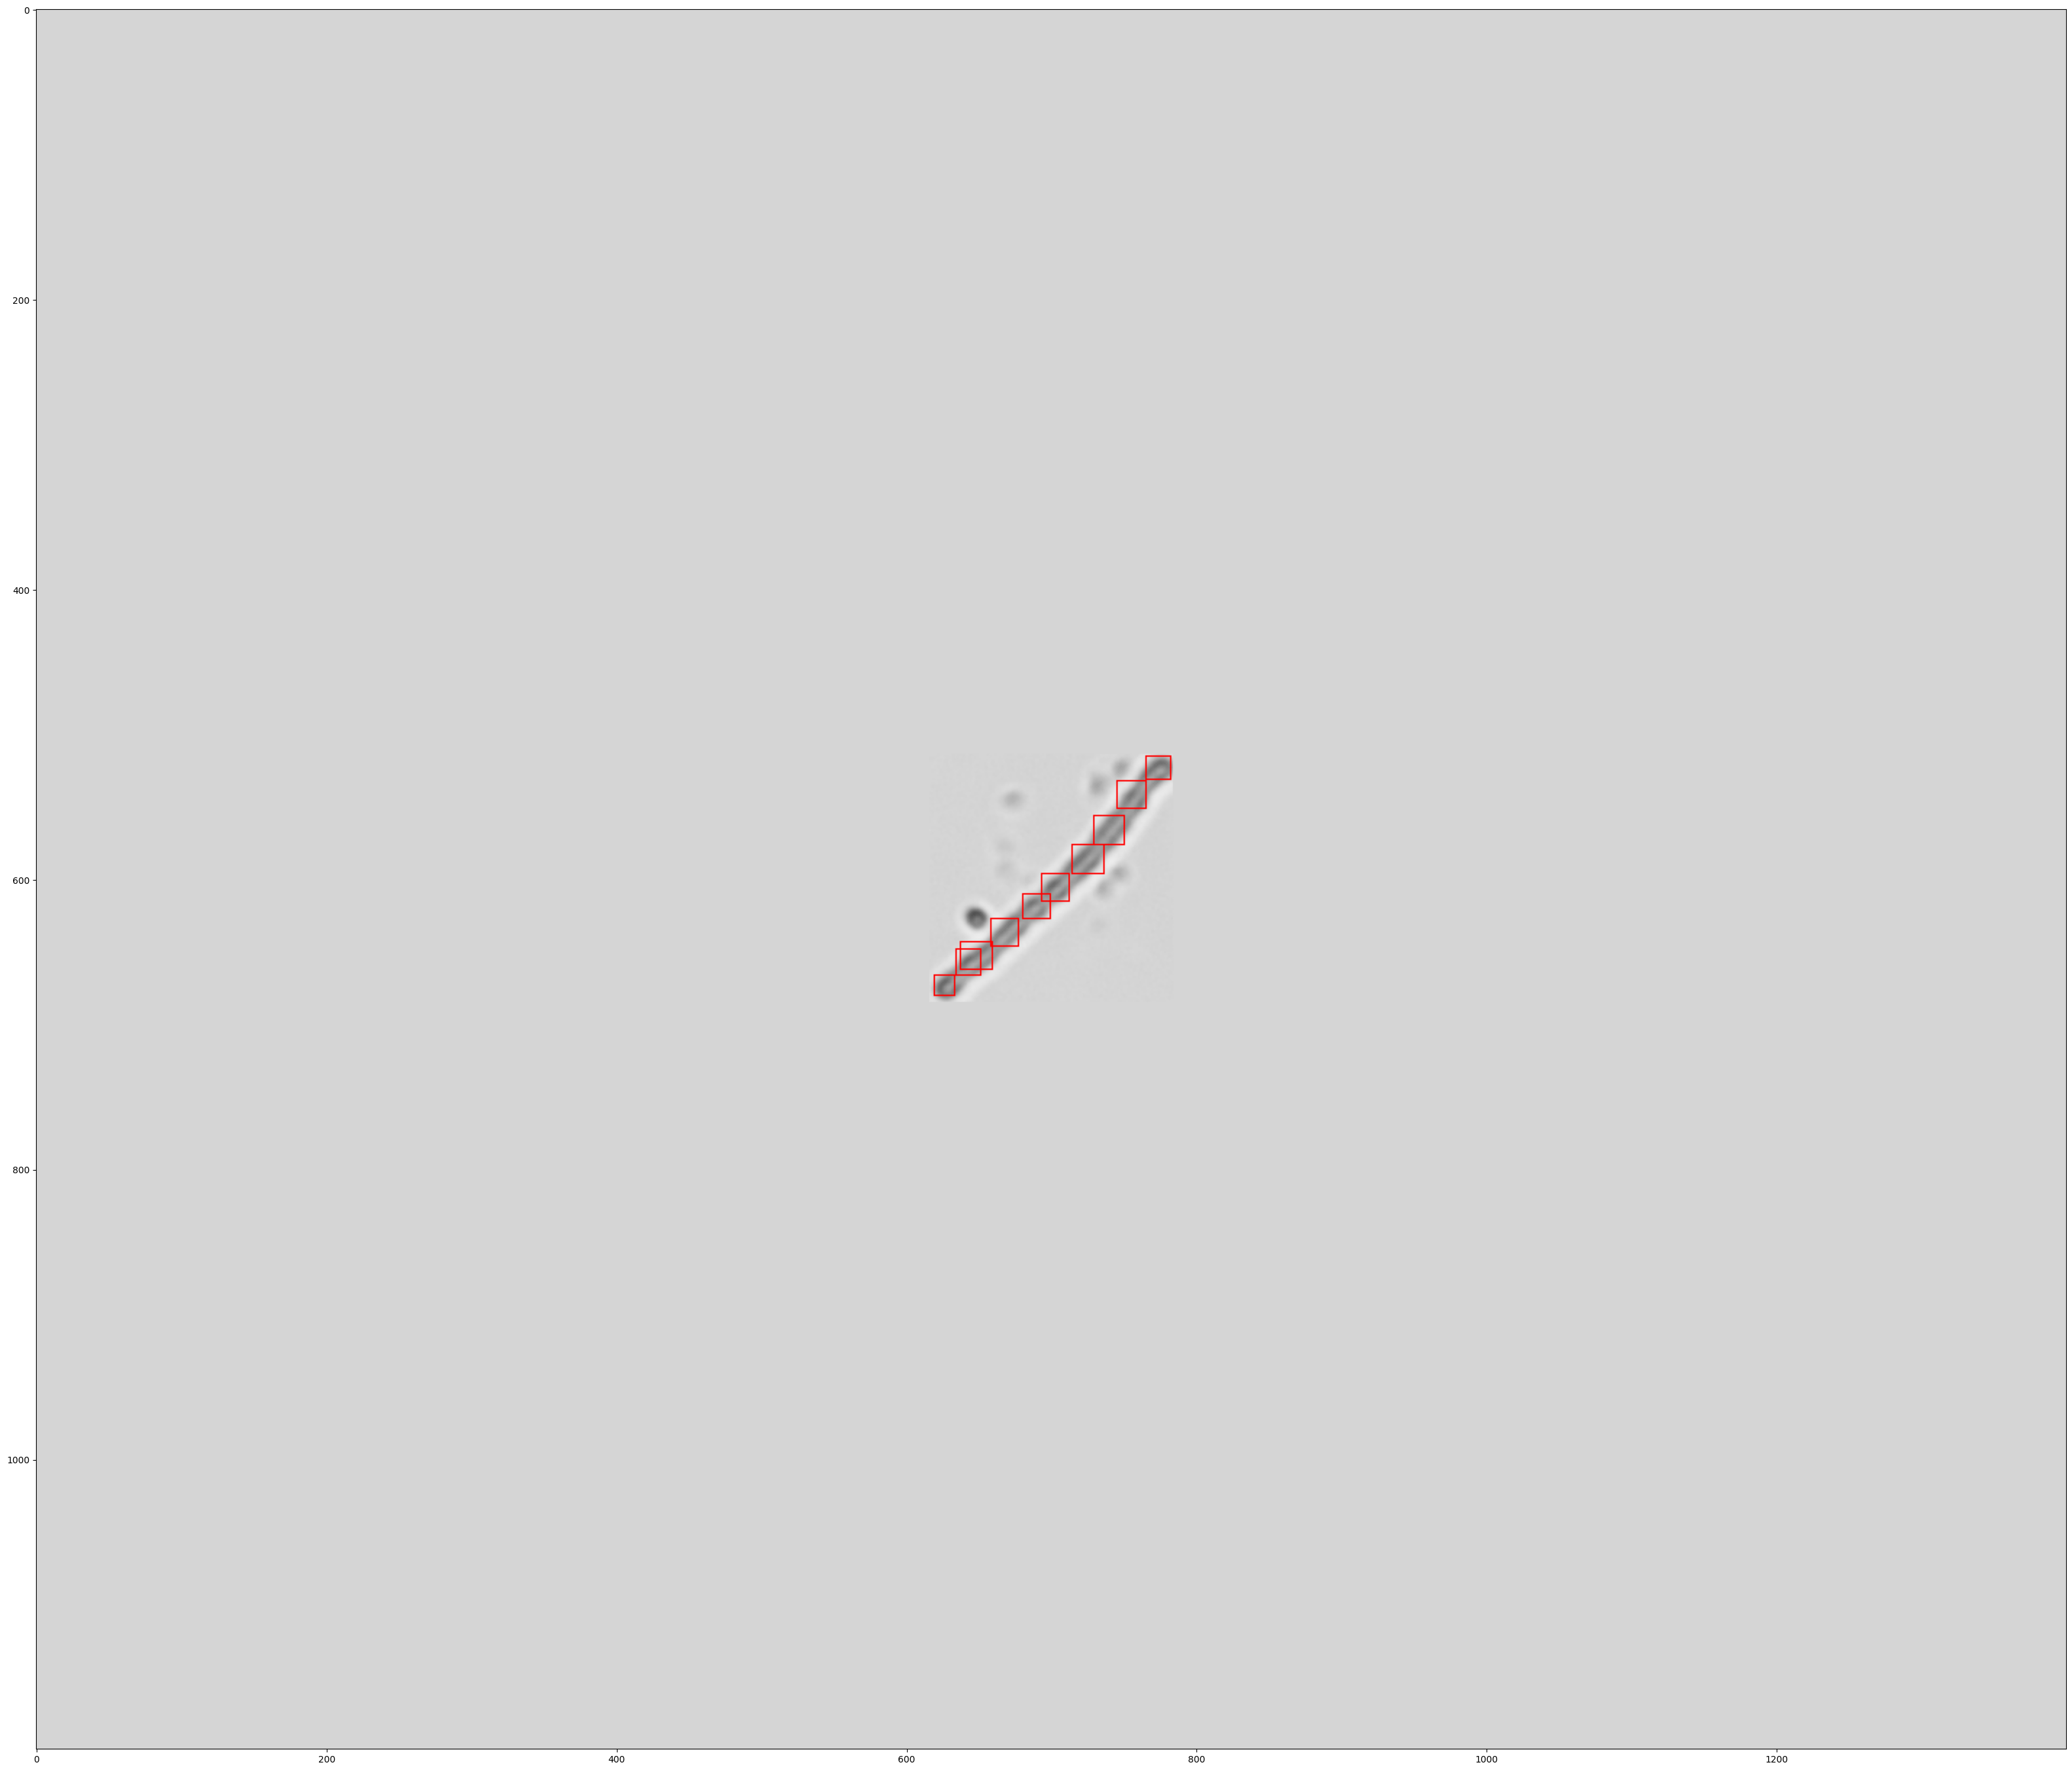

(61, 35, 3)


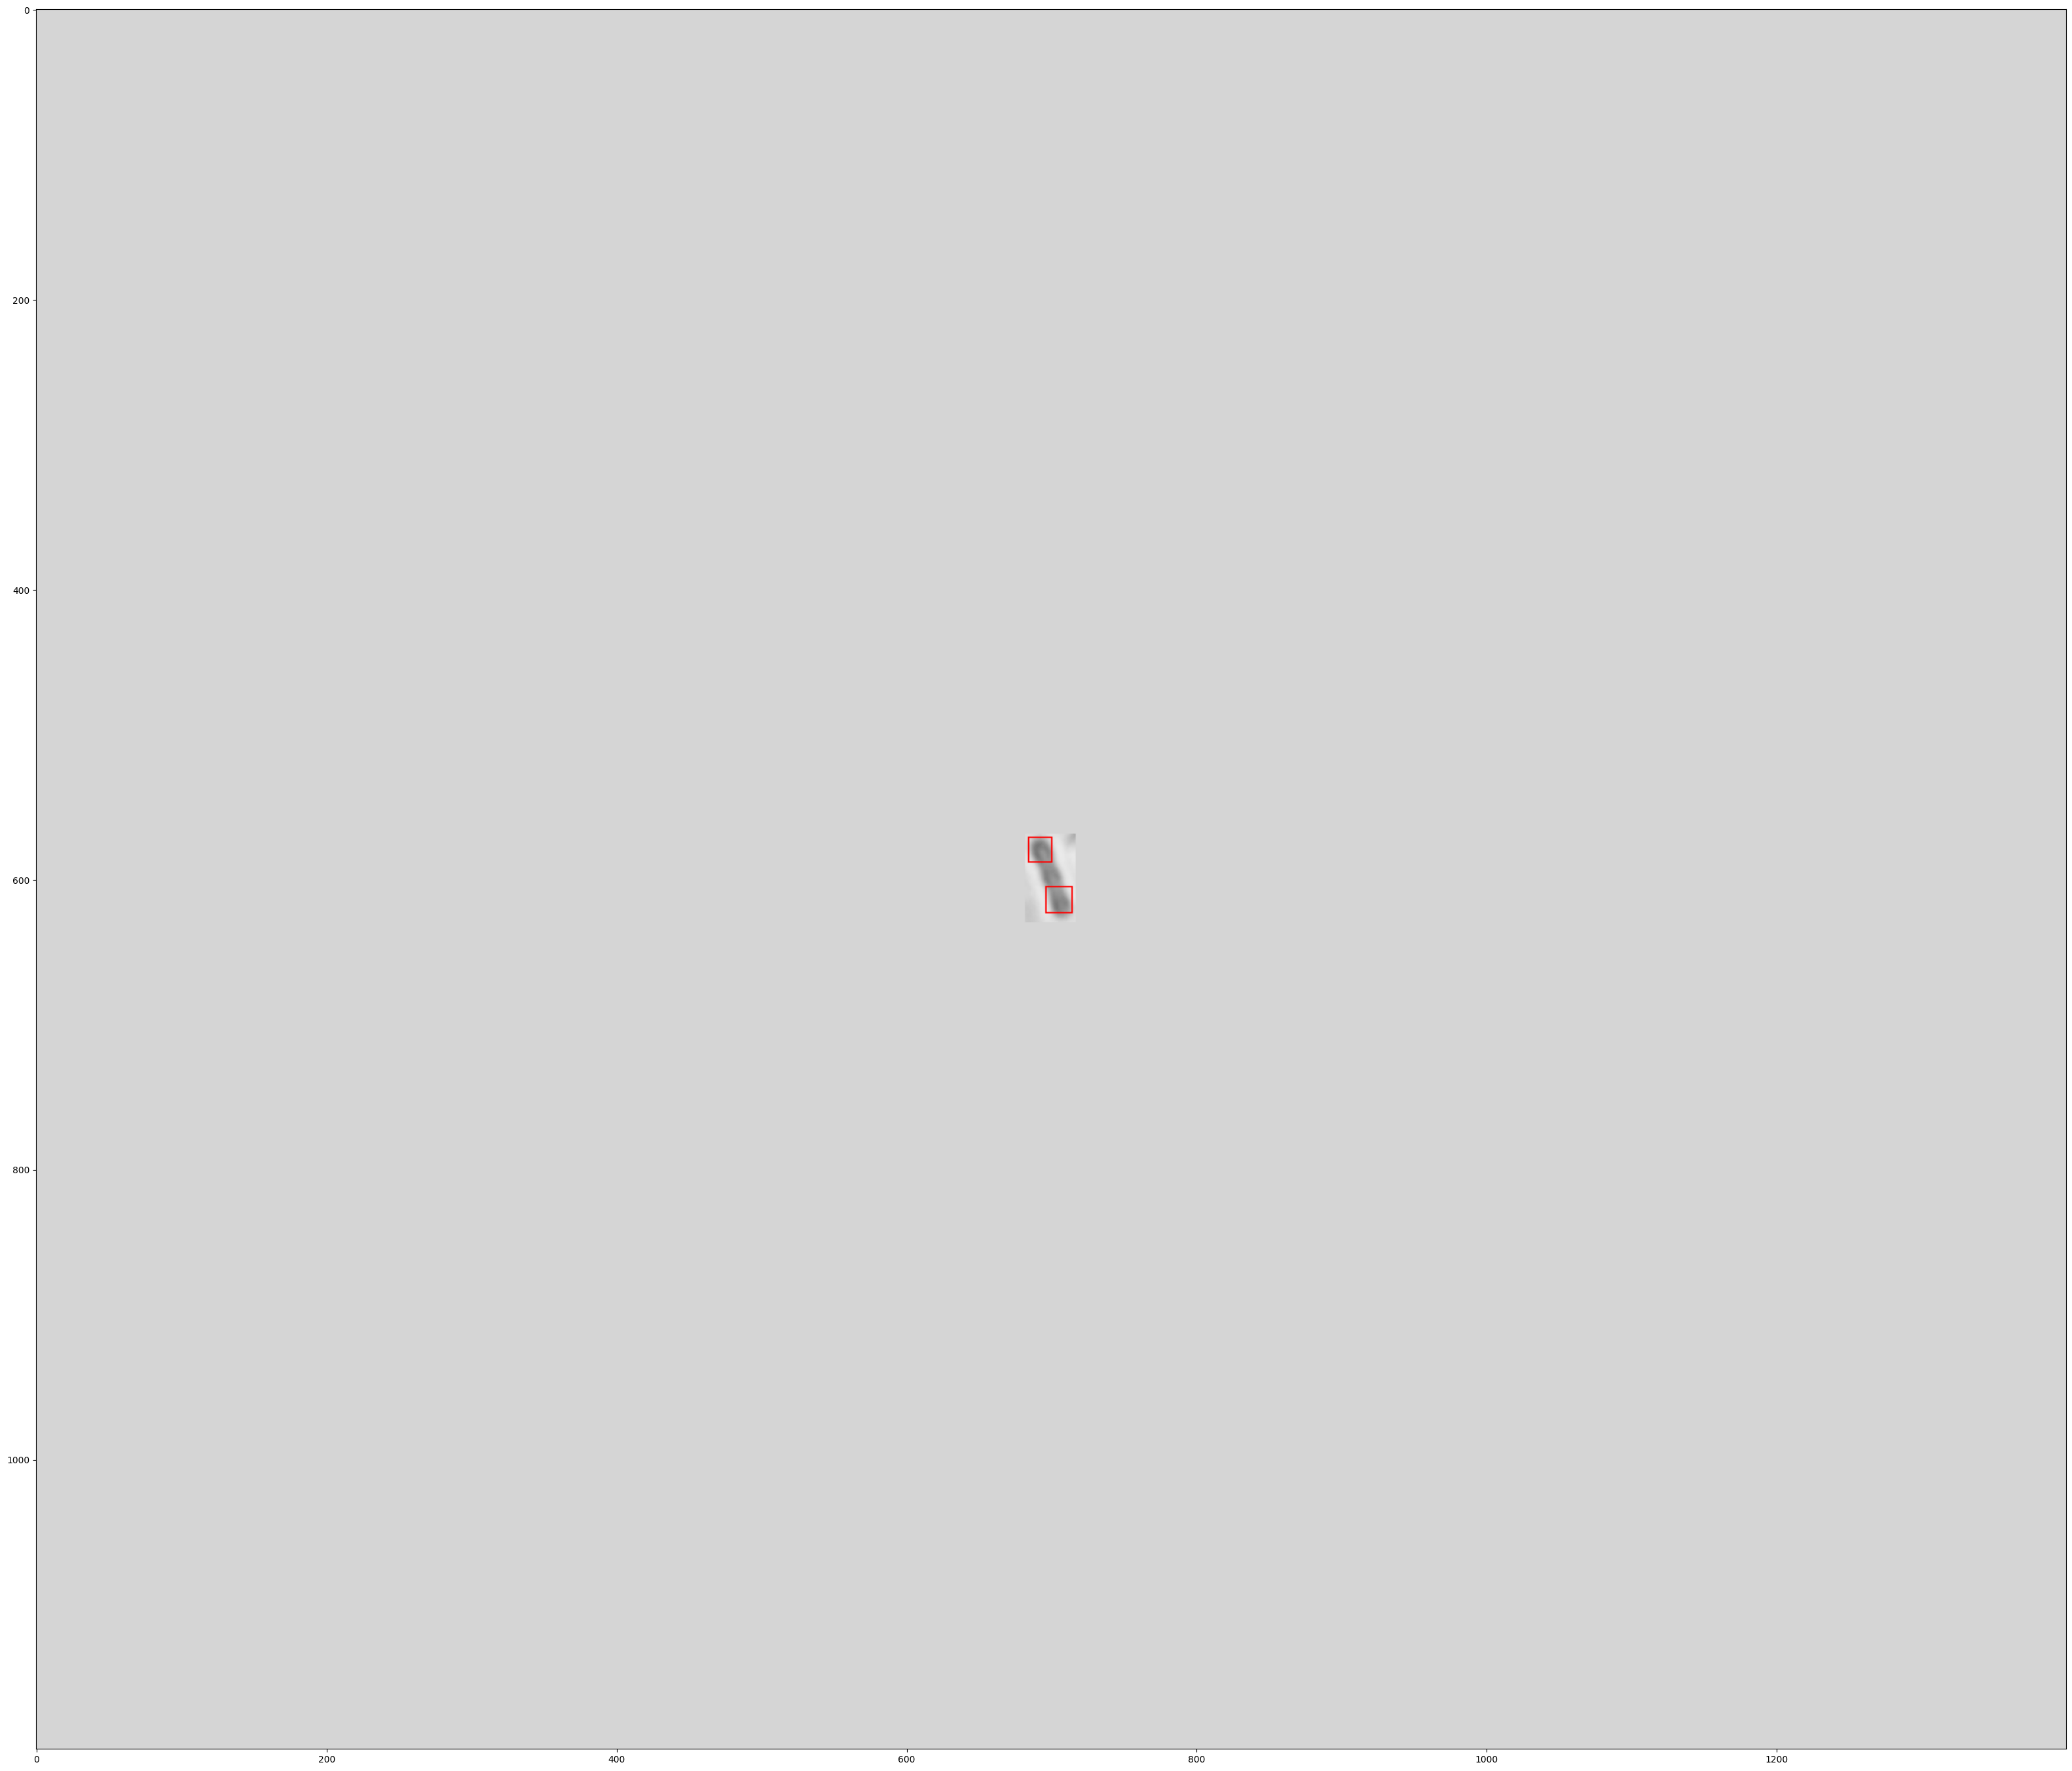

(802, 42, 3)


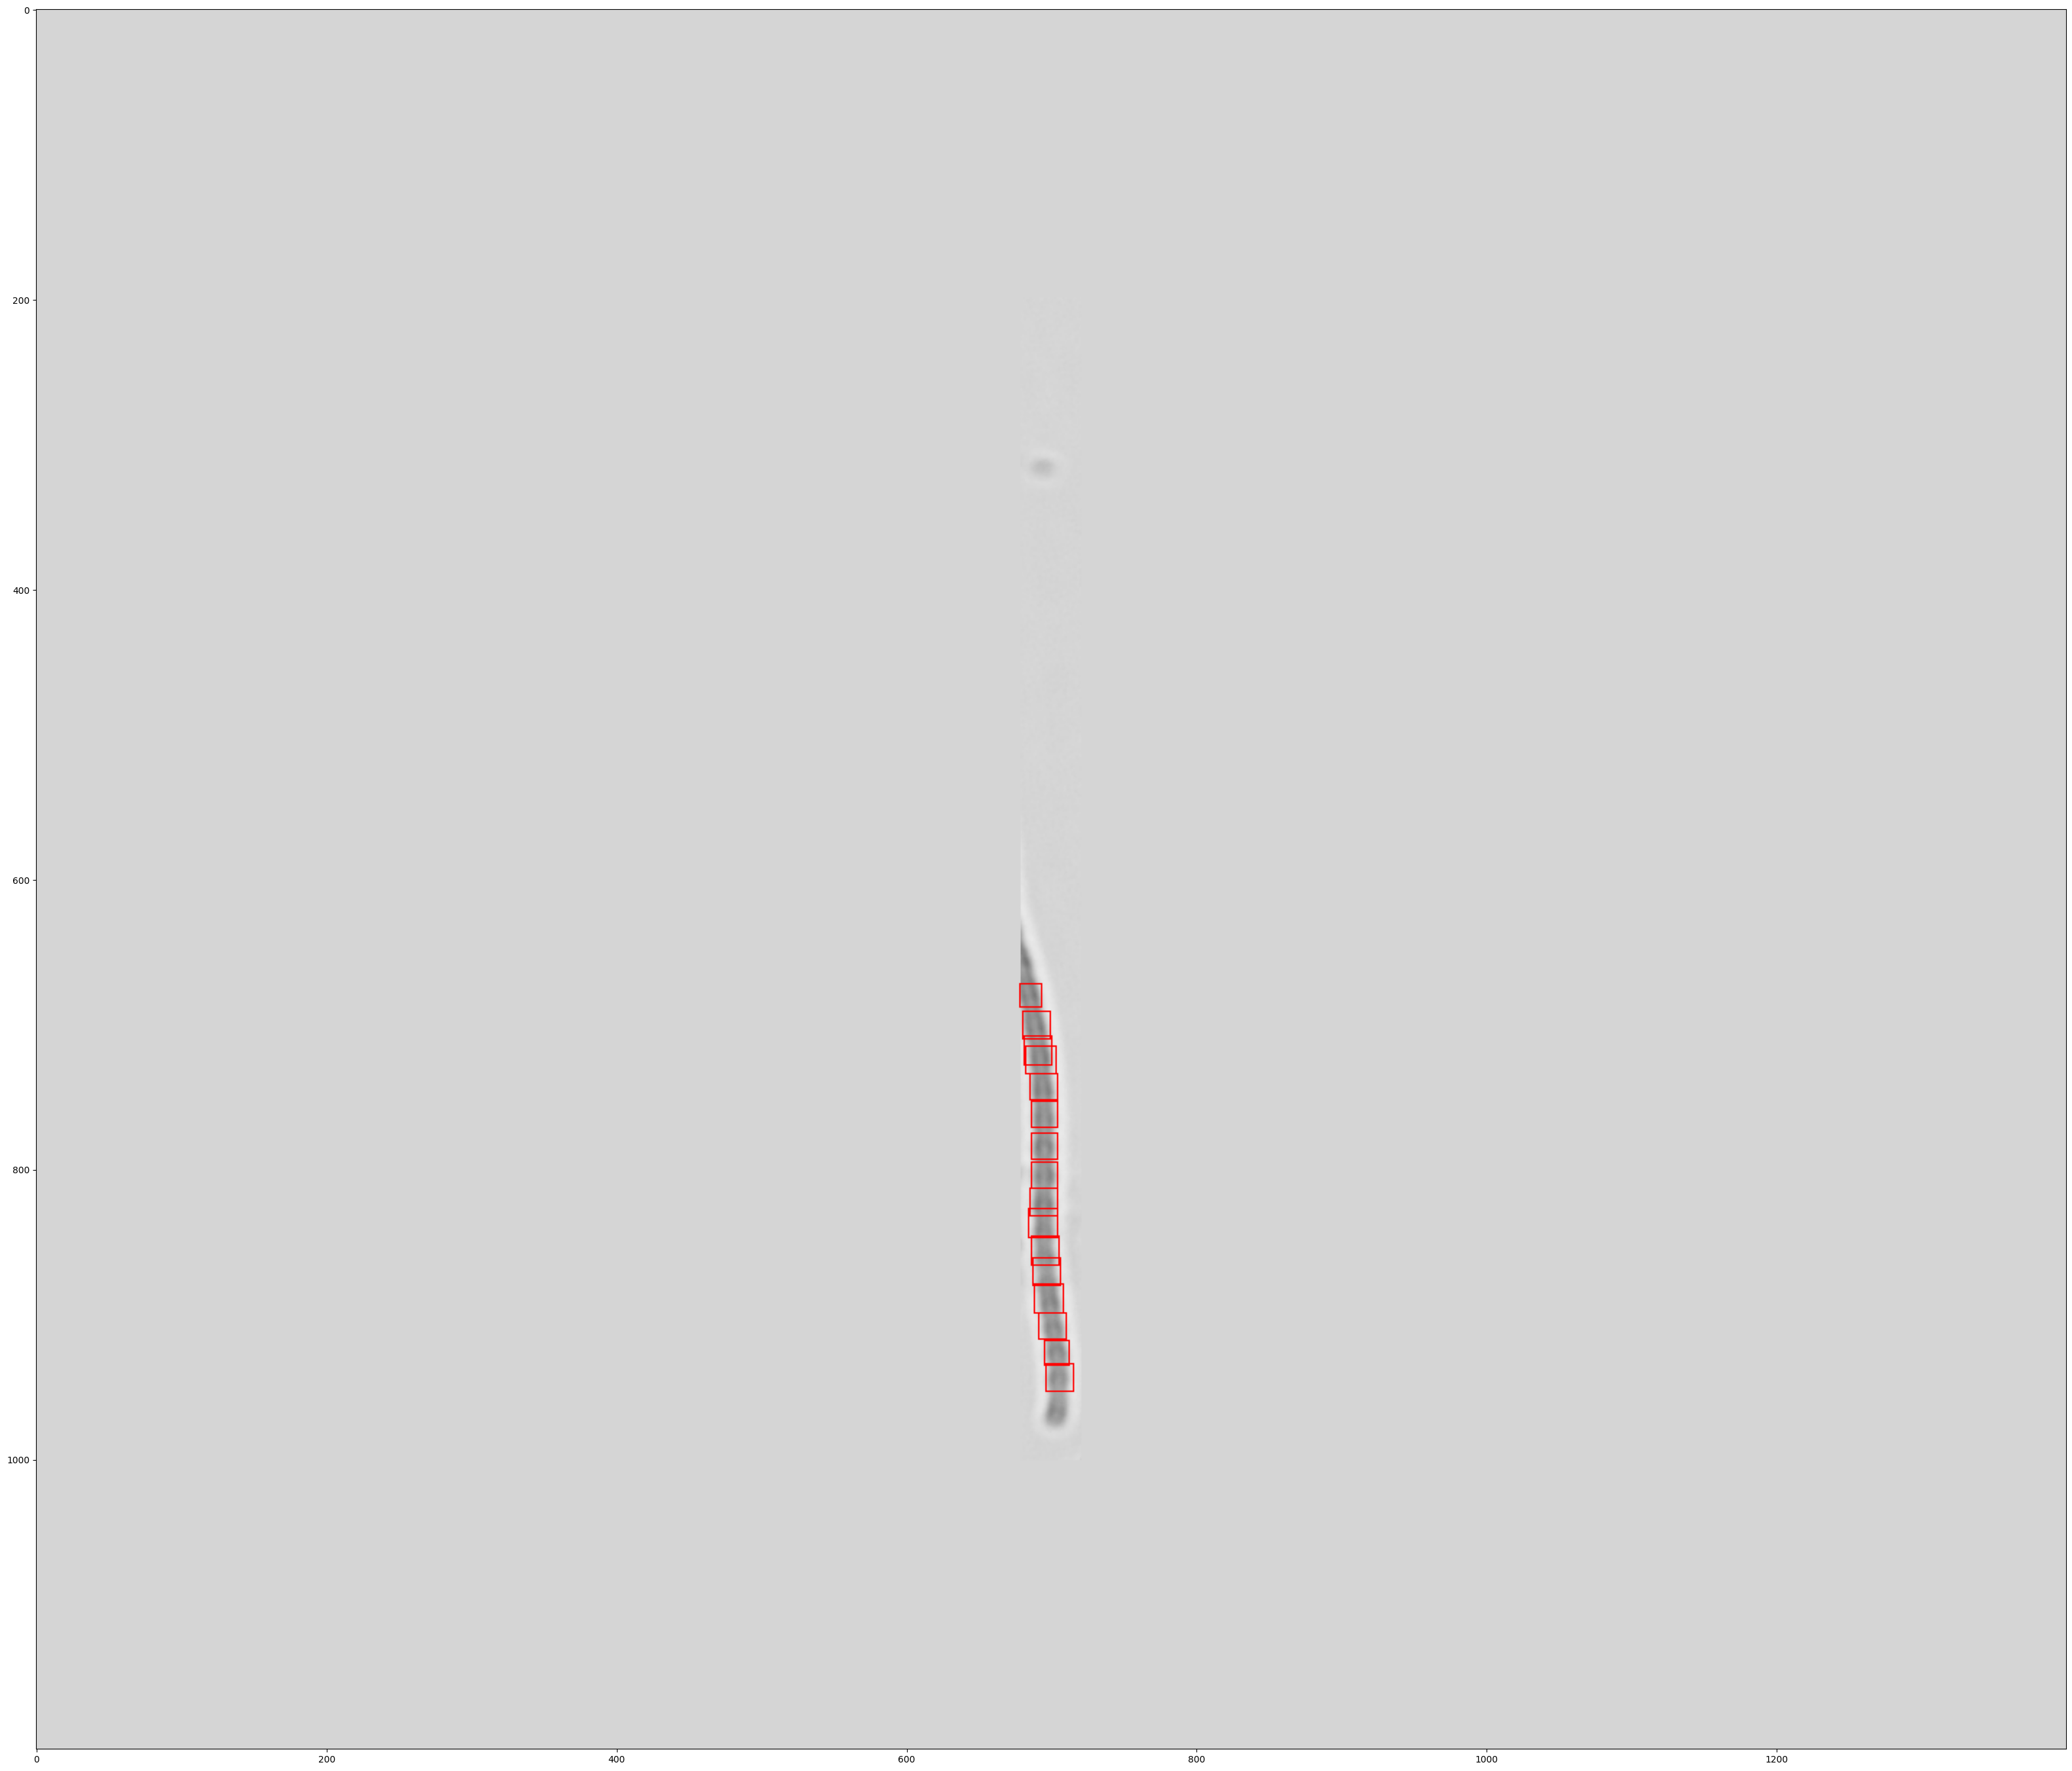

(374, 37, 3)


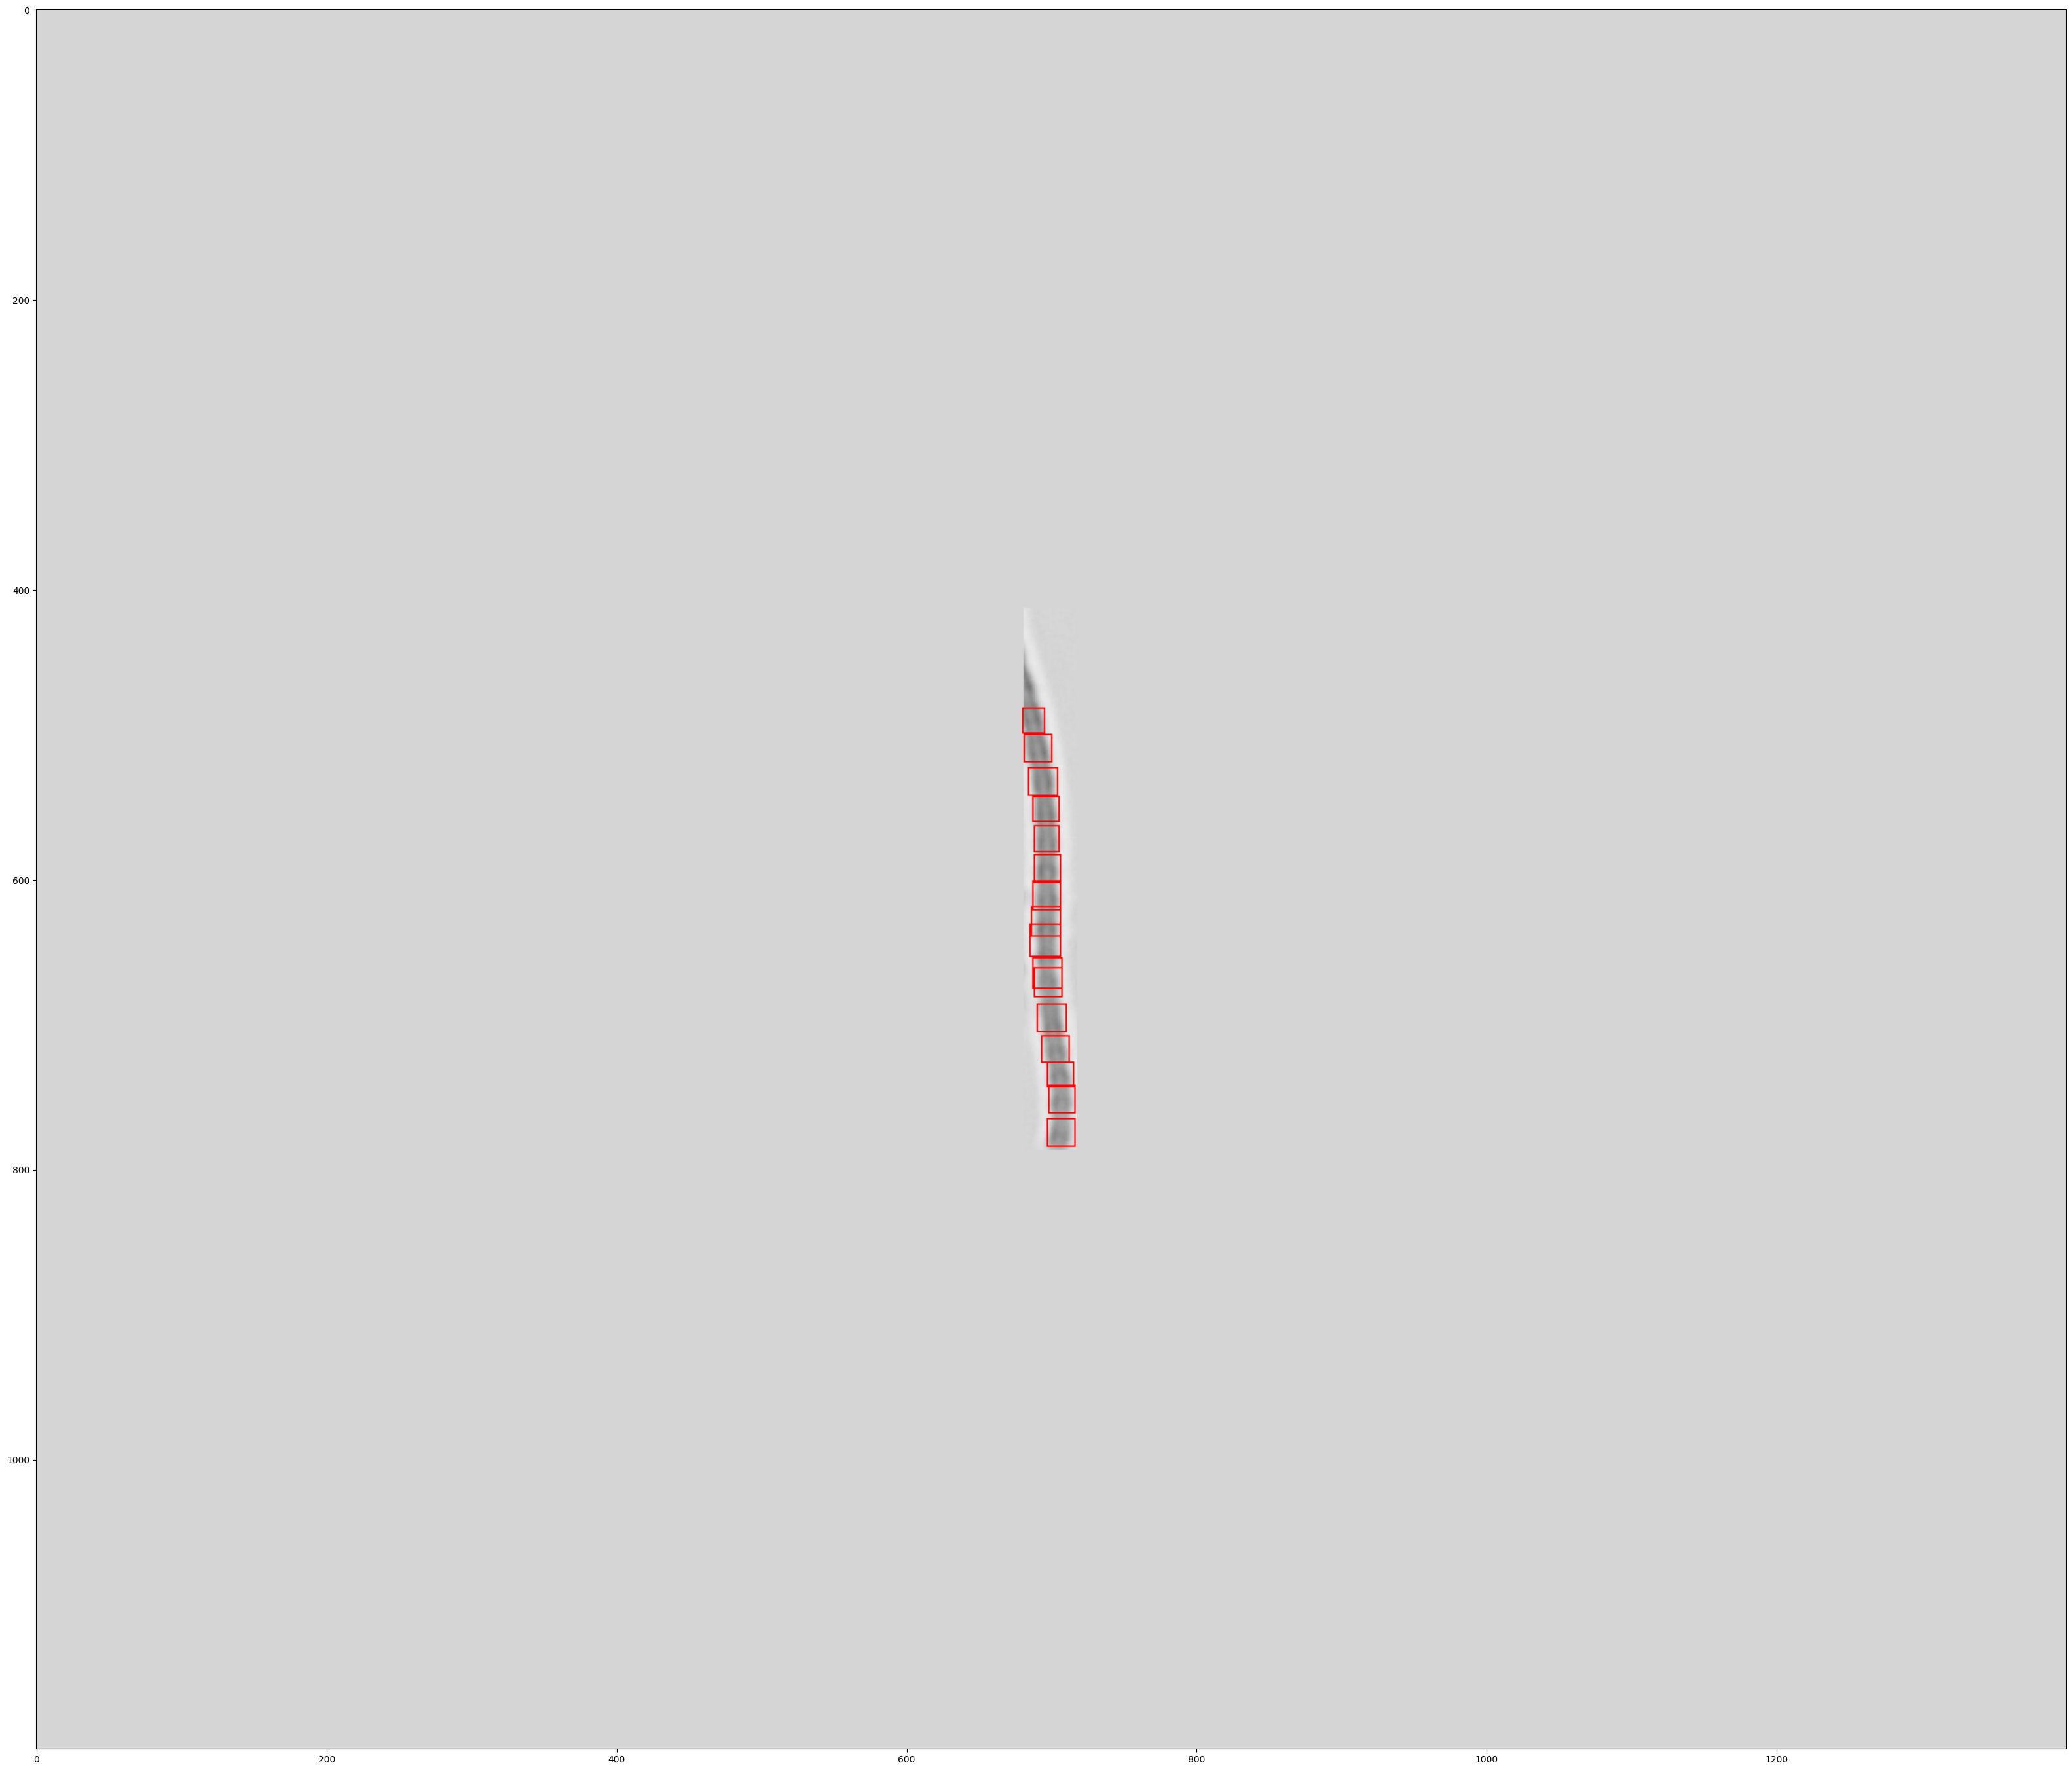

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 8/11 [00:43<00:21,  7.09s/it]

(36, 99, 3)


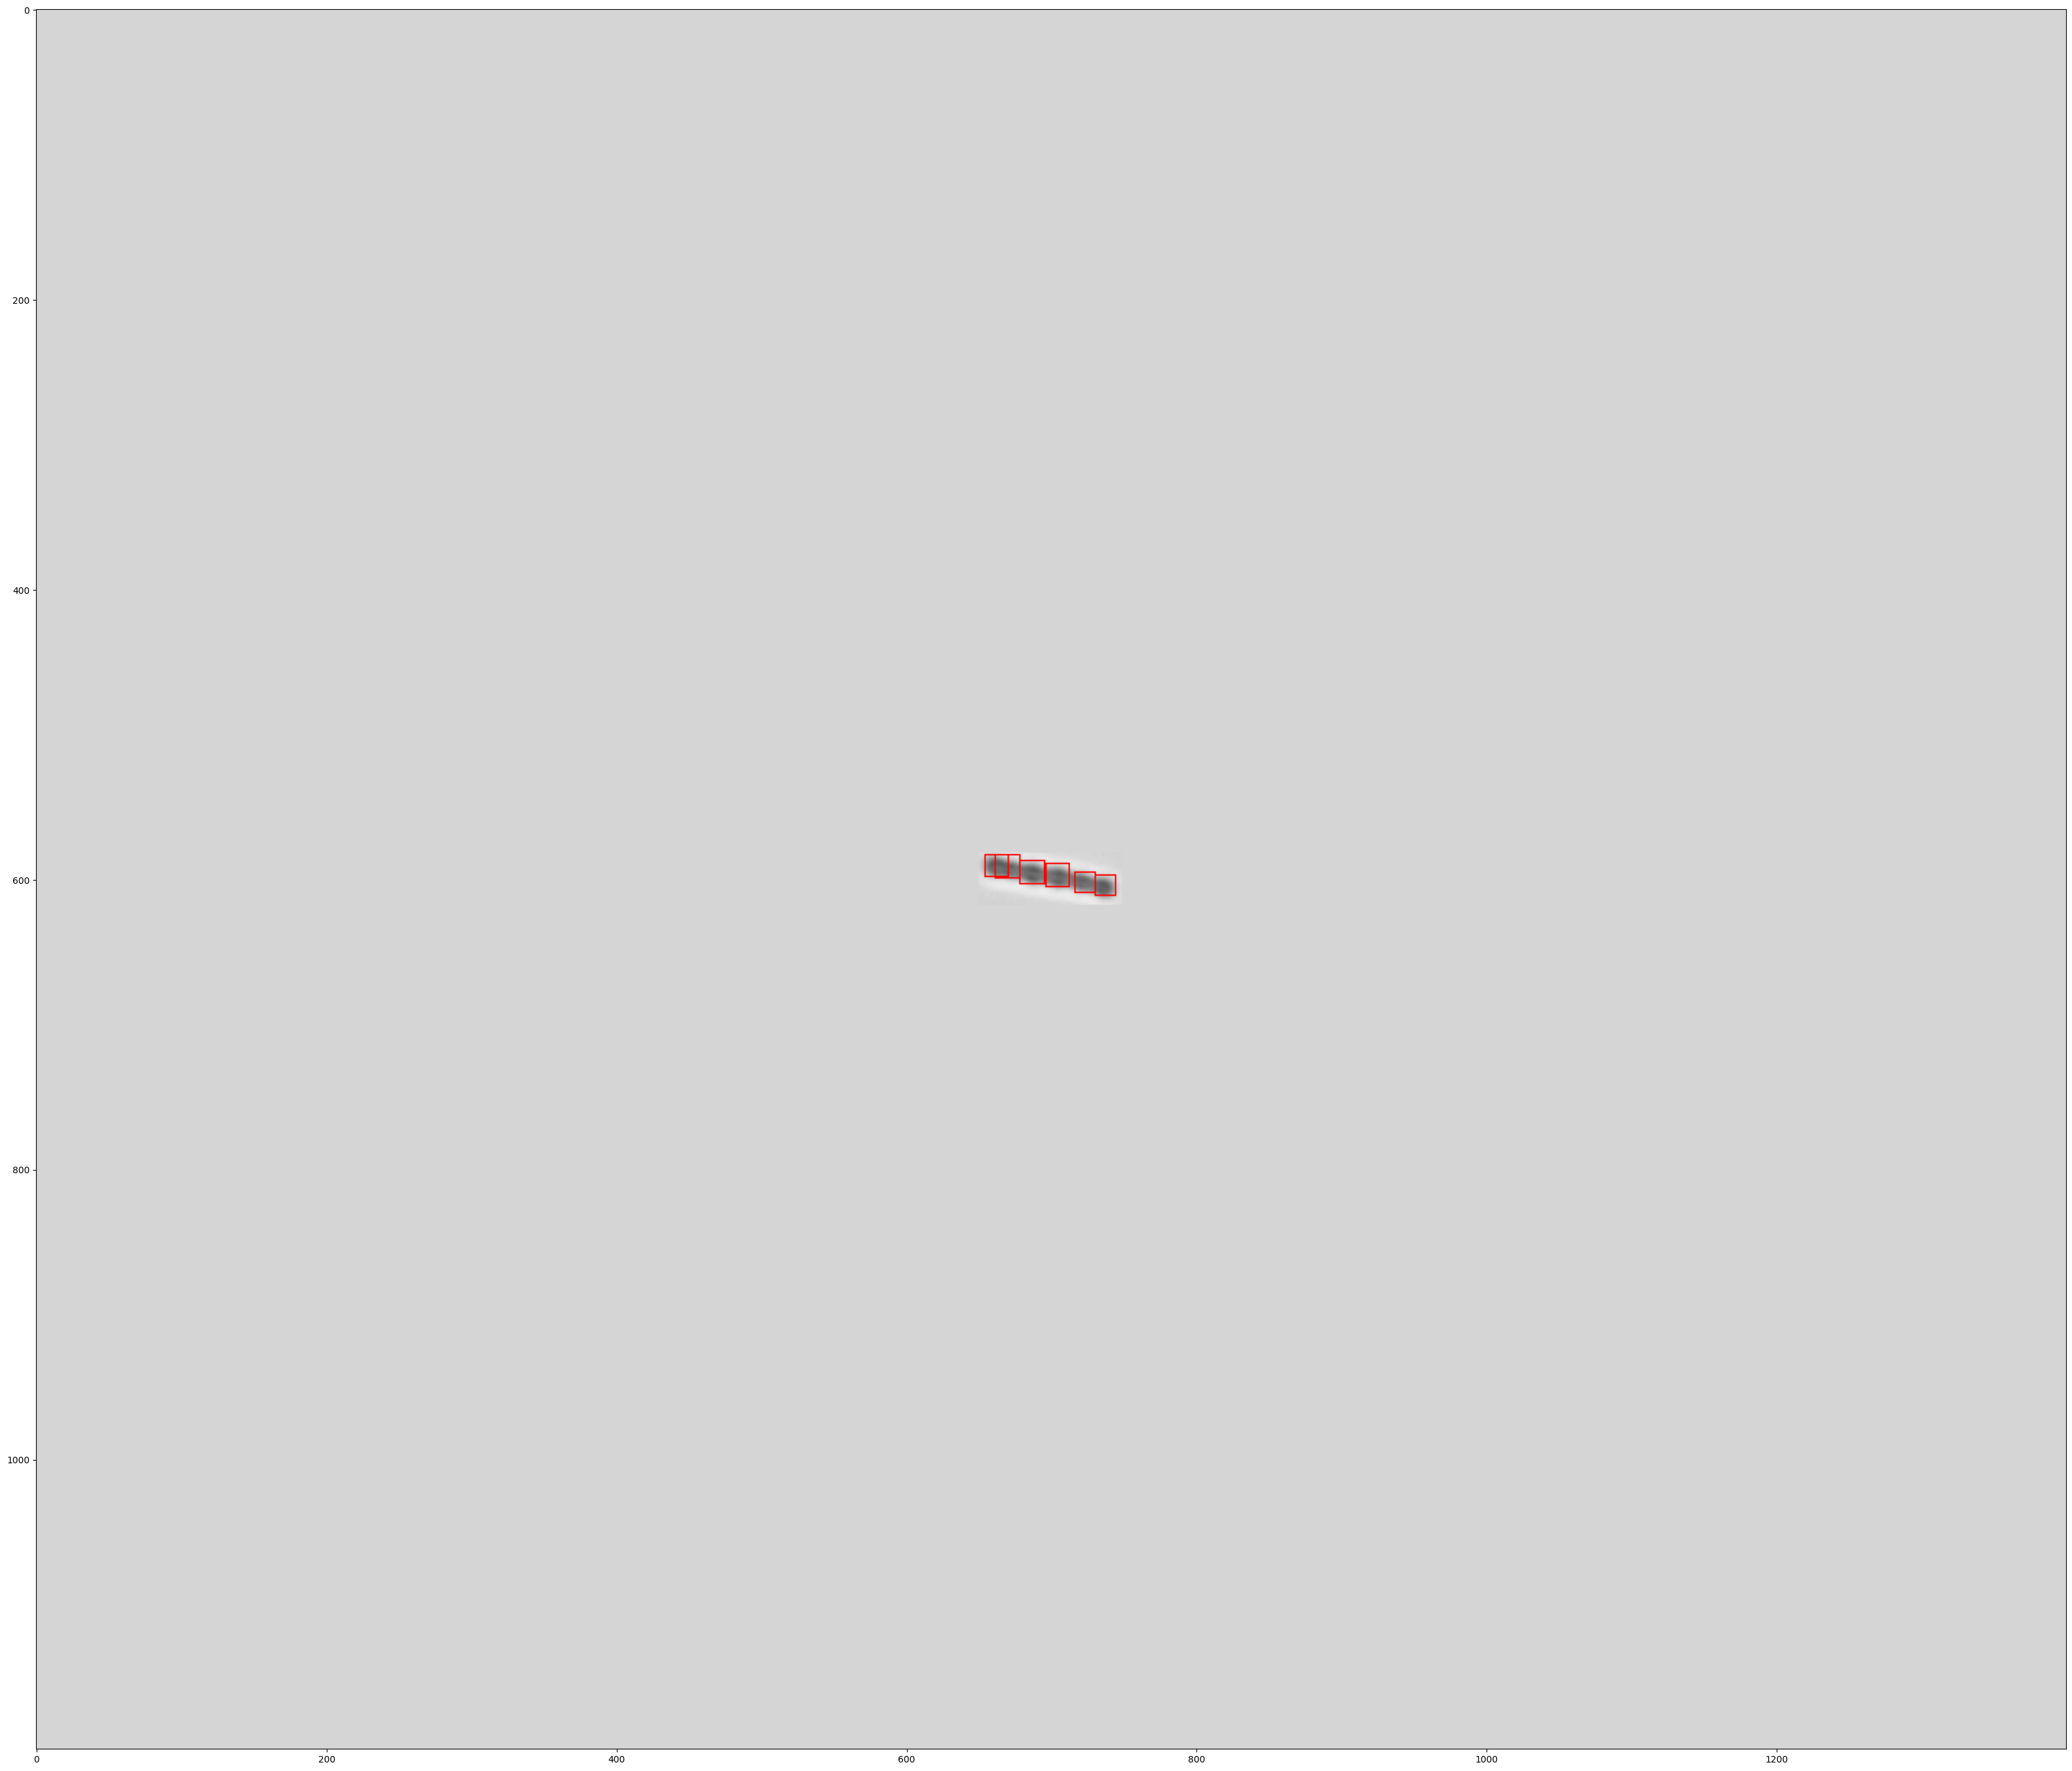

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 9/11 [00:44<00:10,  5.33s/it]

(455, 504, 3)


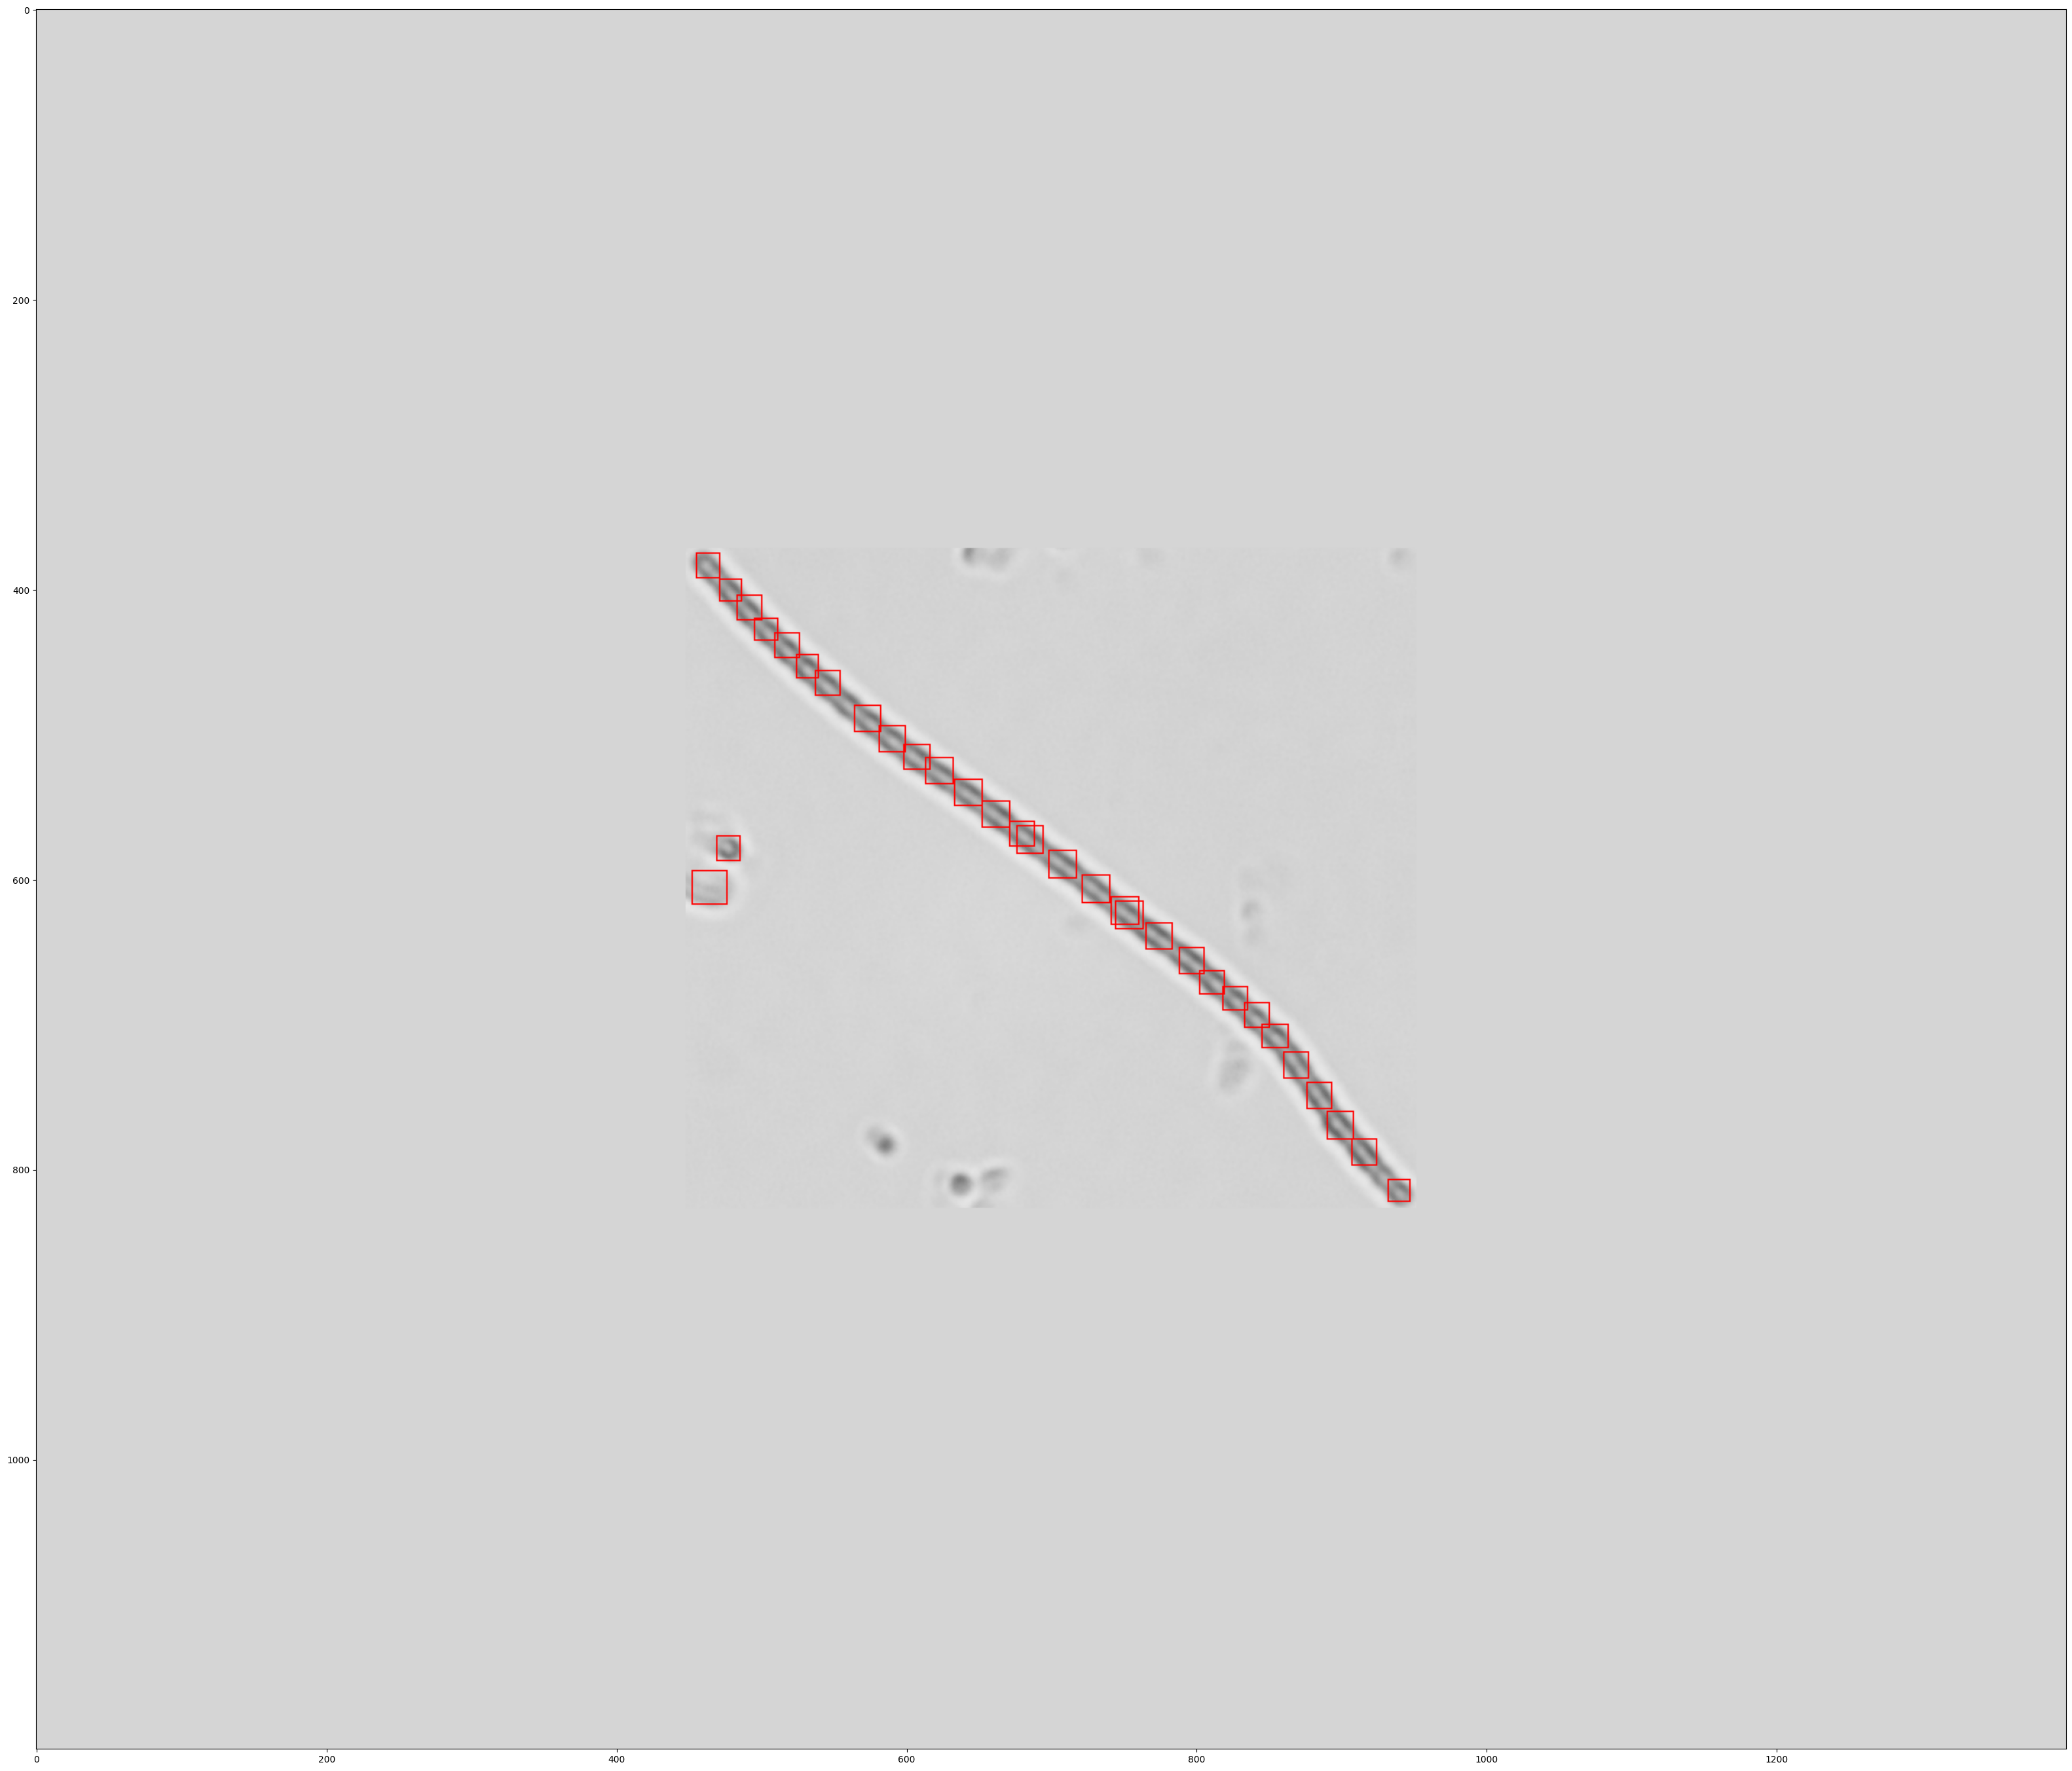

(130, 55, 3)


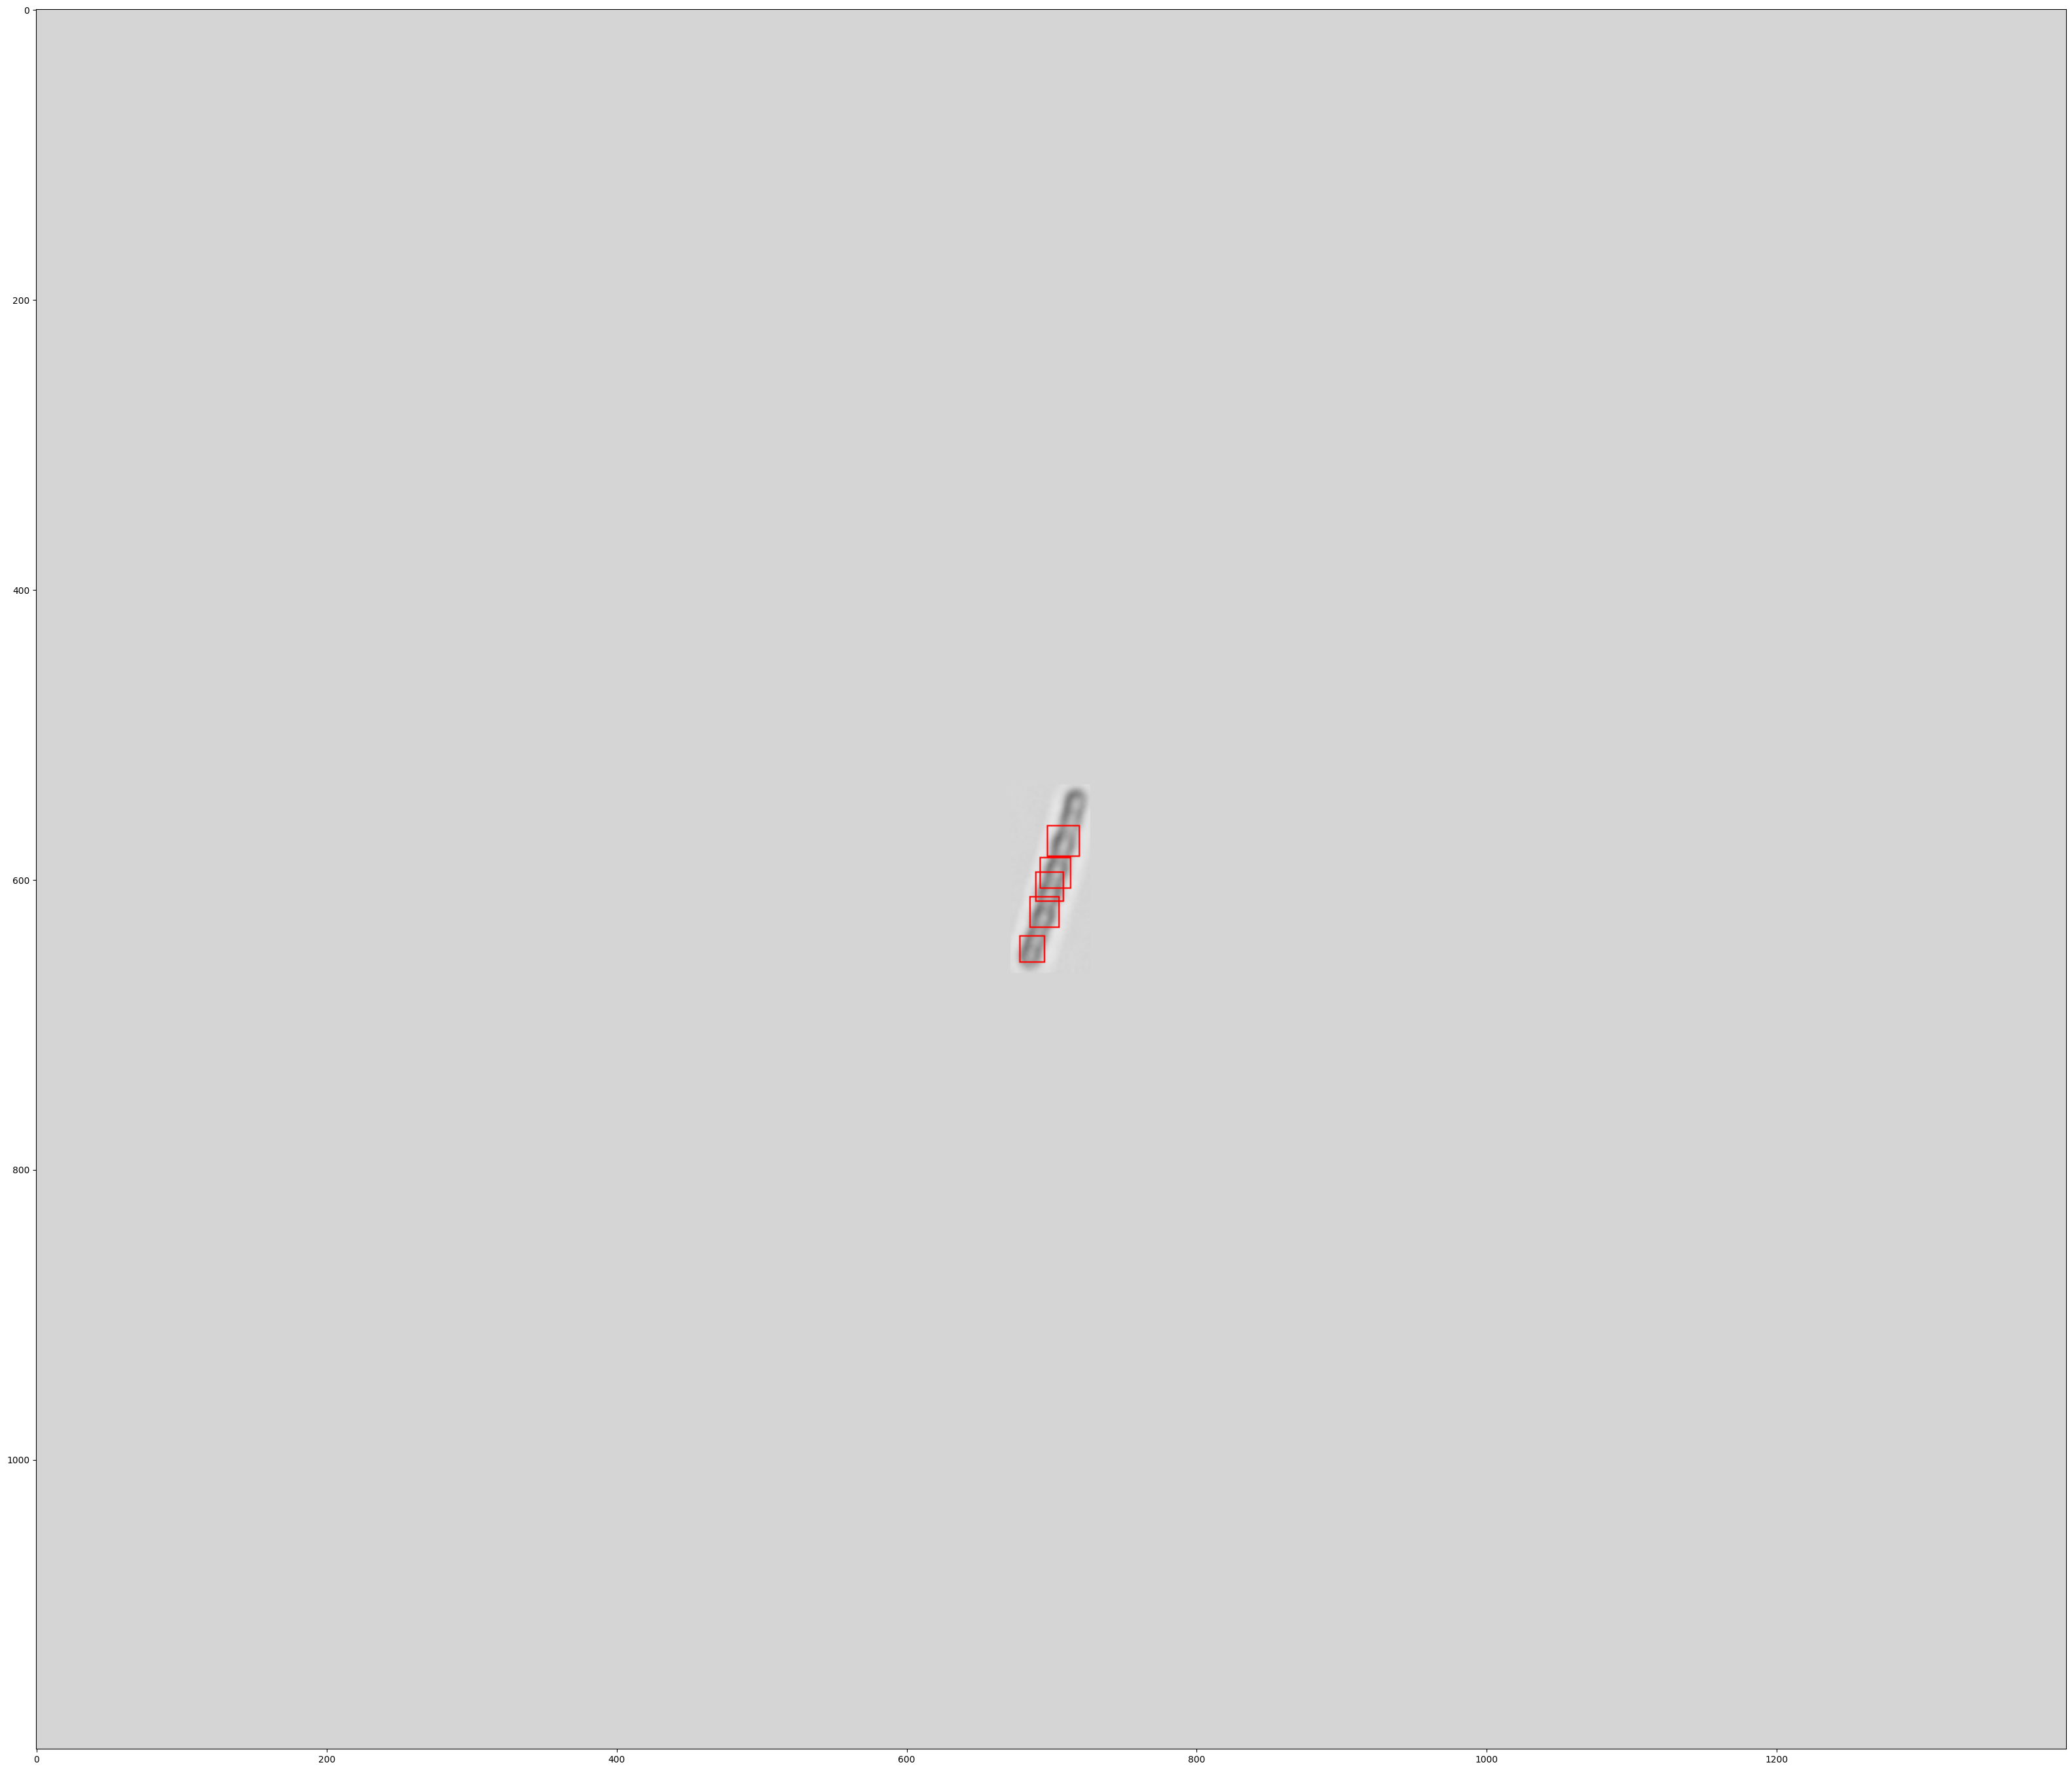

(35, 120, 3)


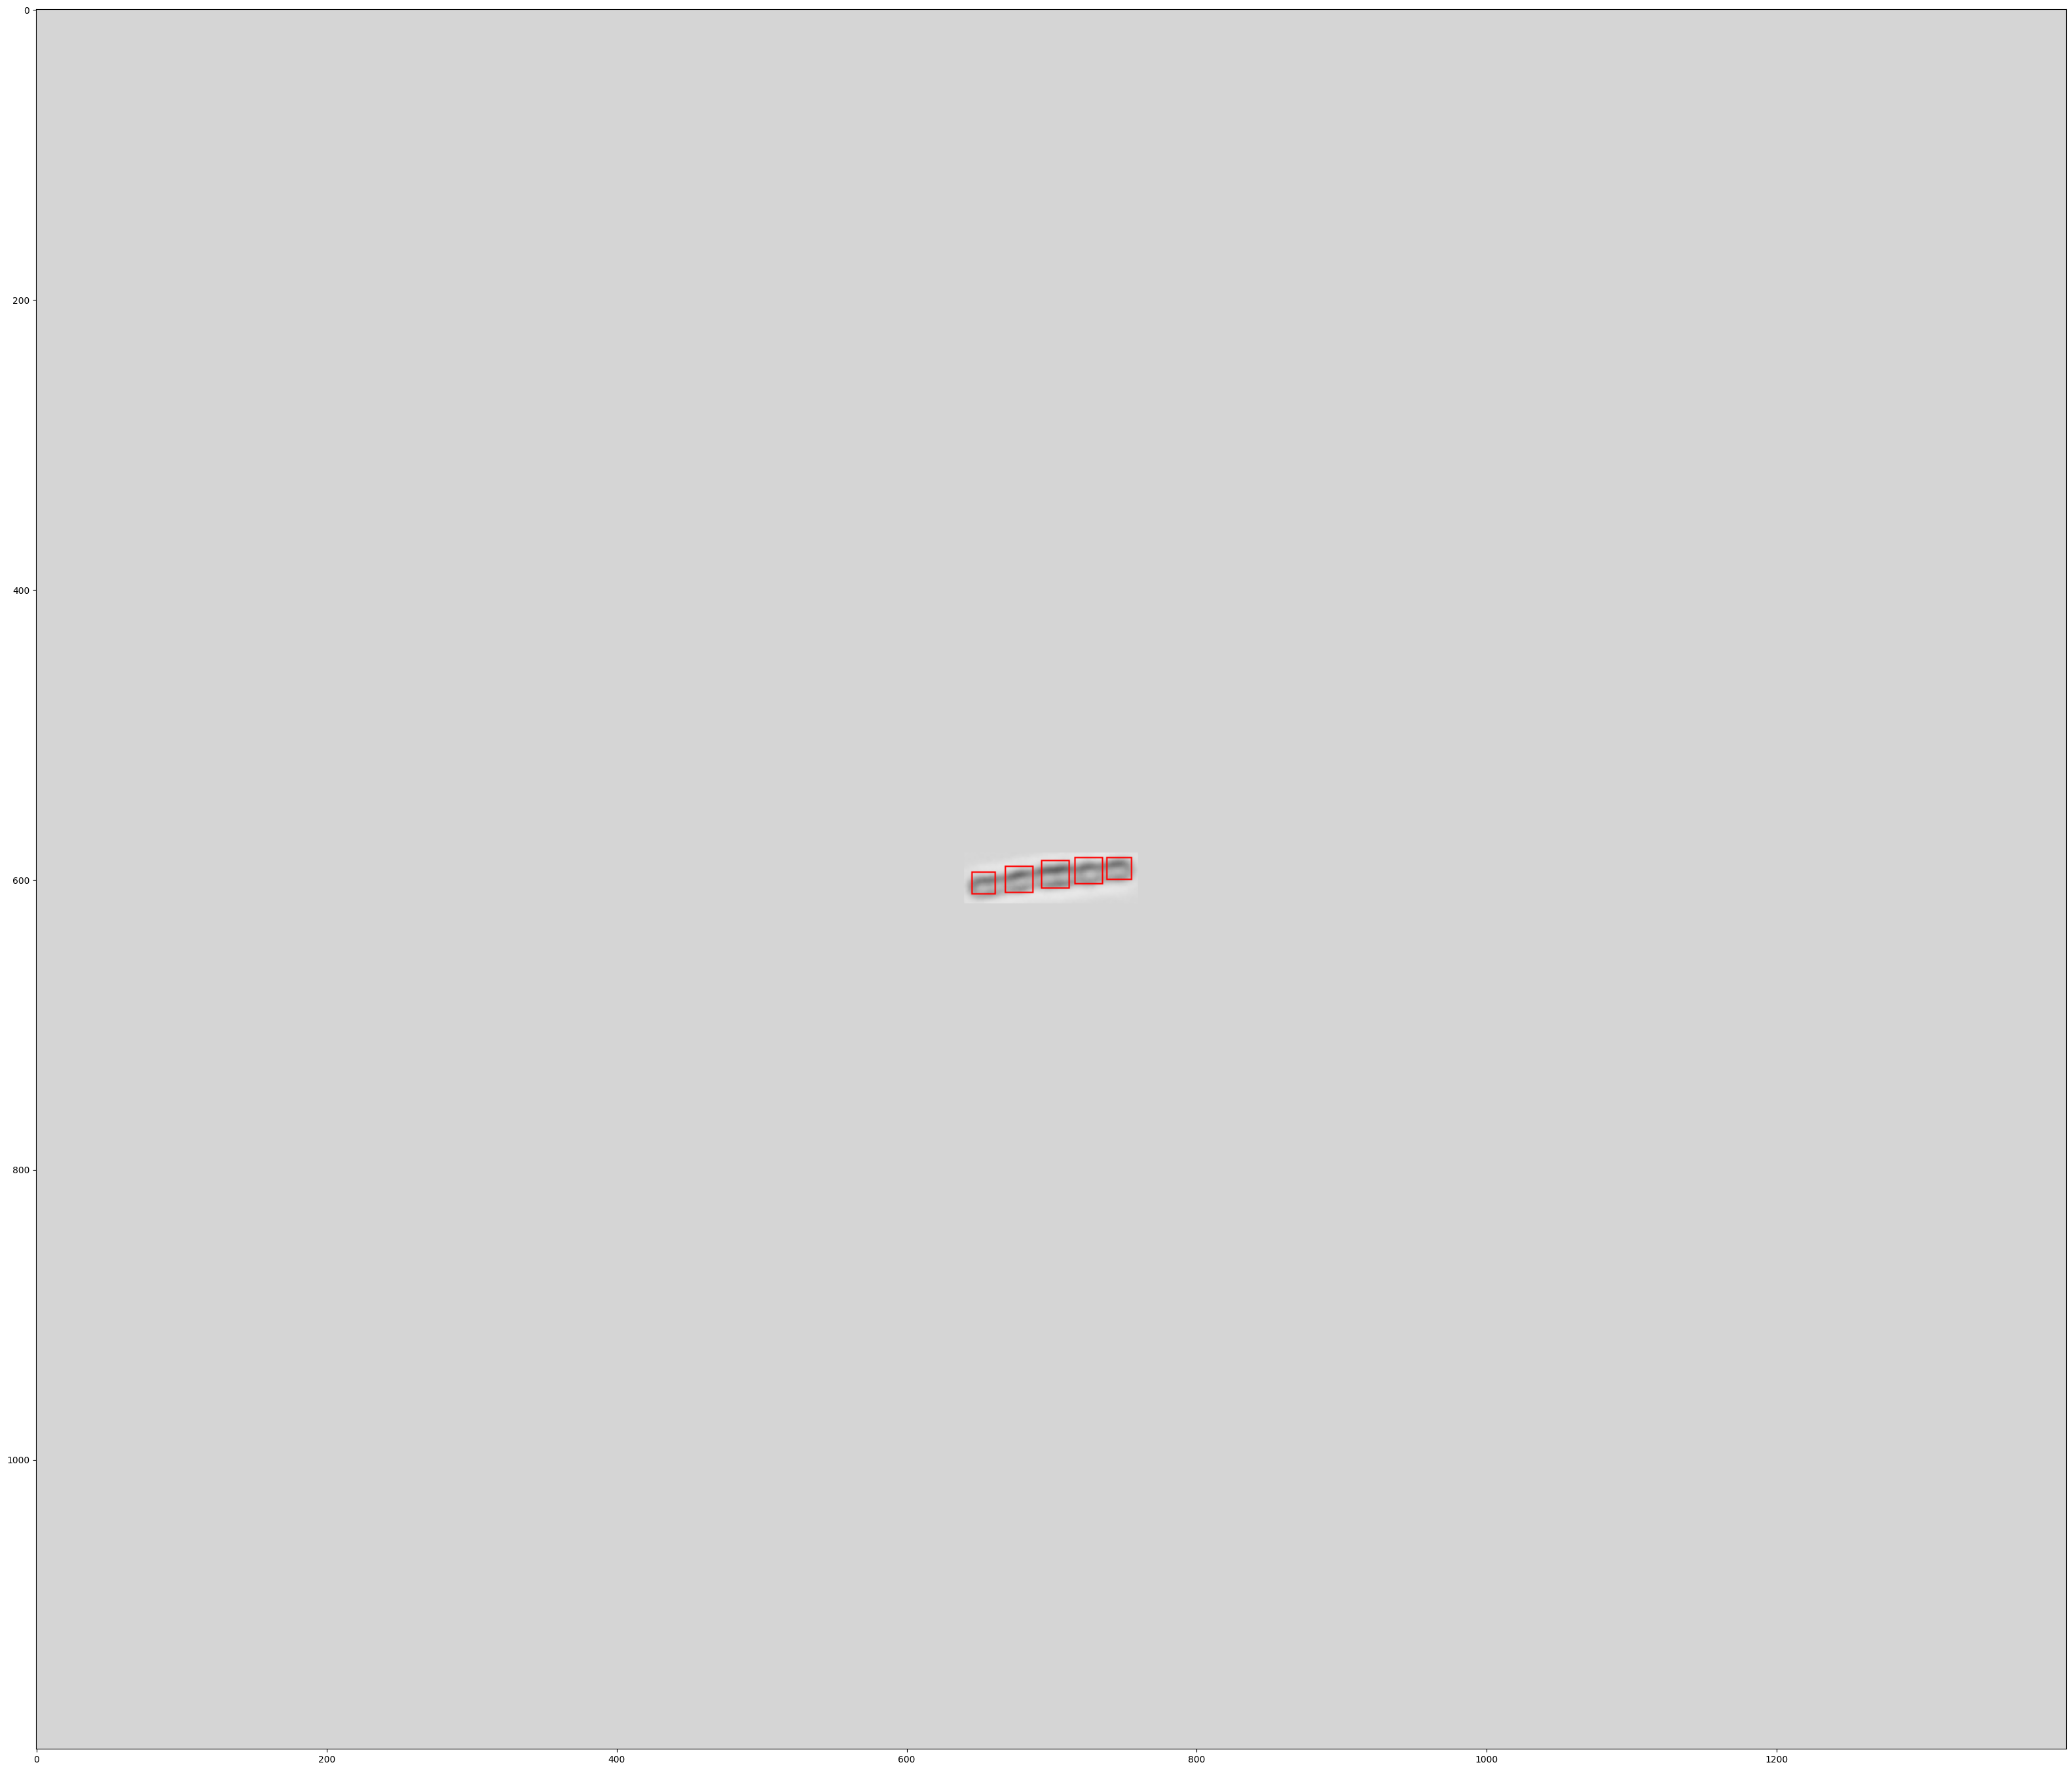

(151, 64, 3)


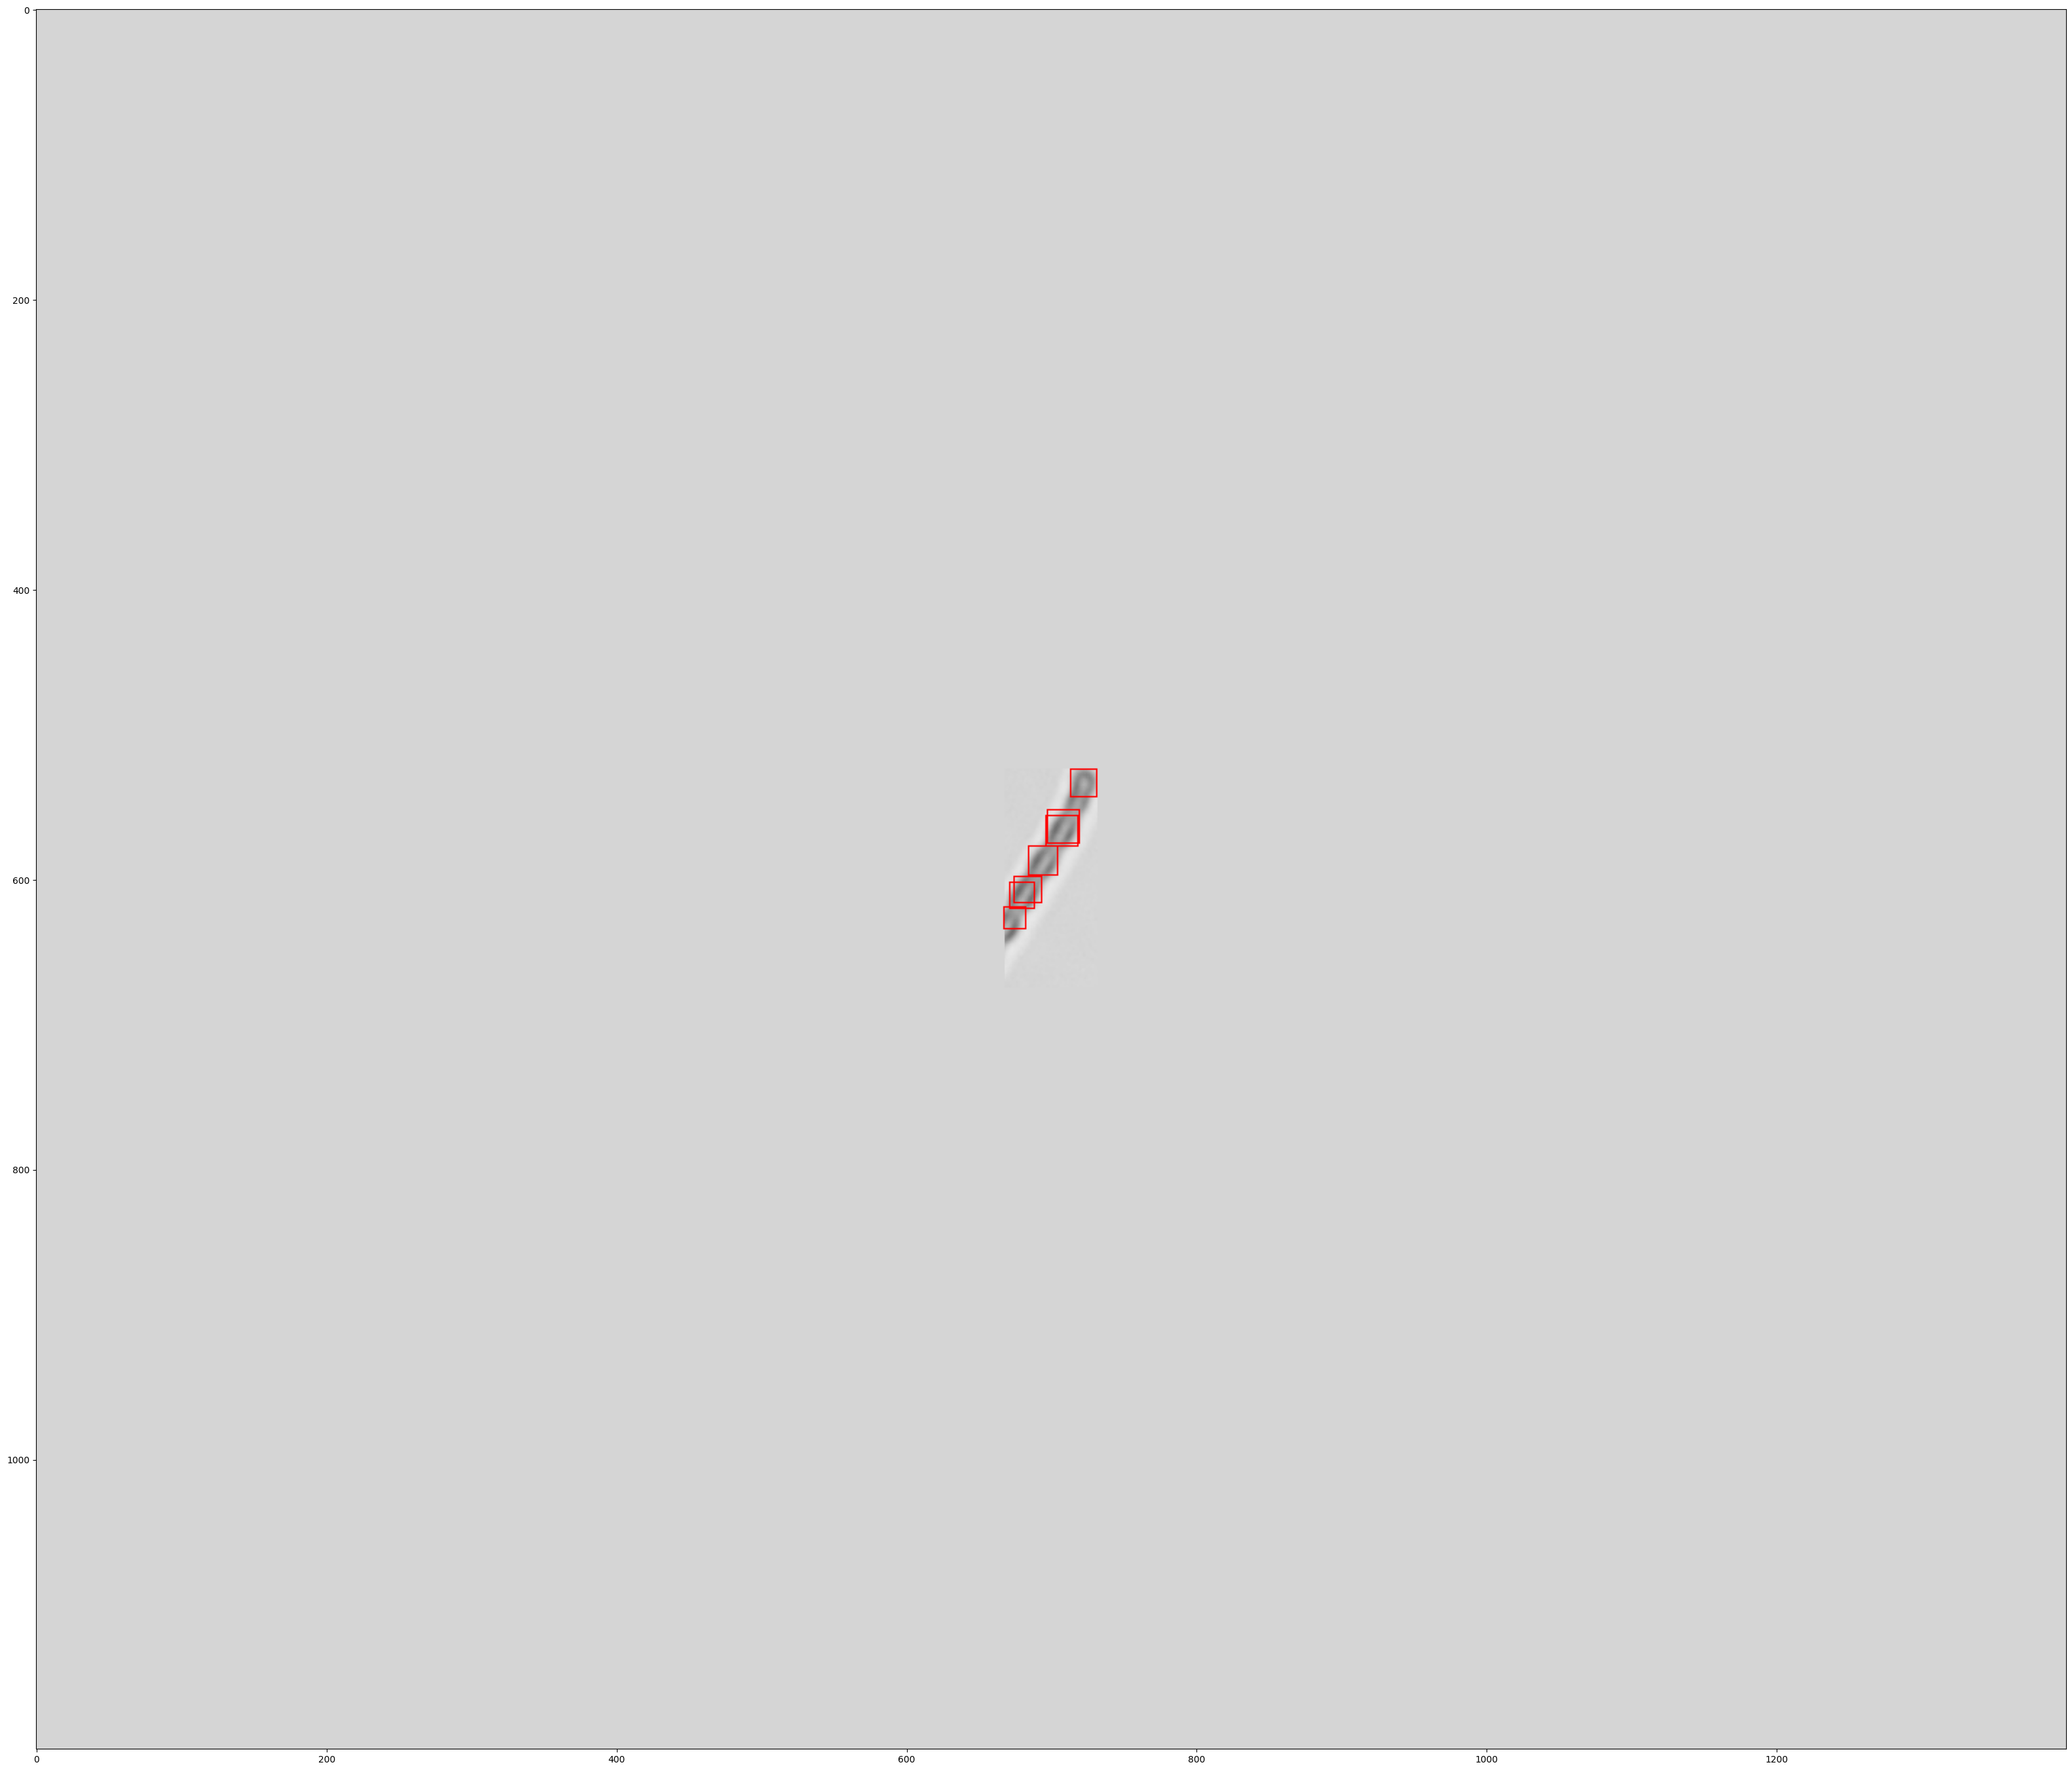

(215, 65, 3)


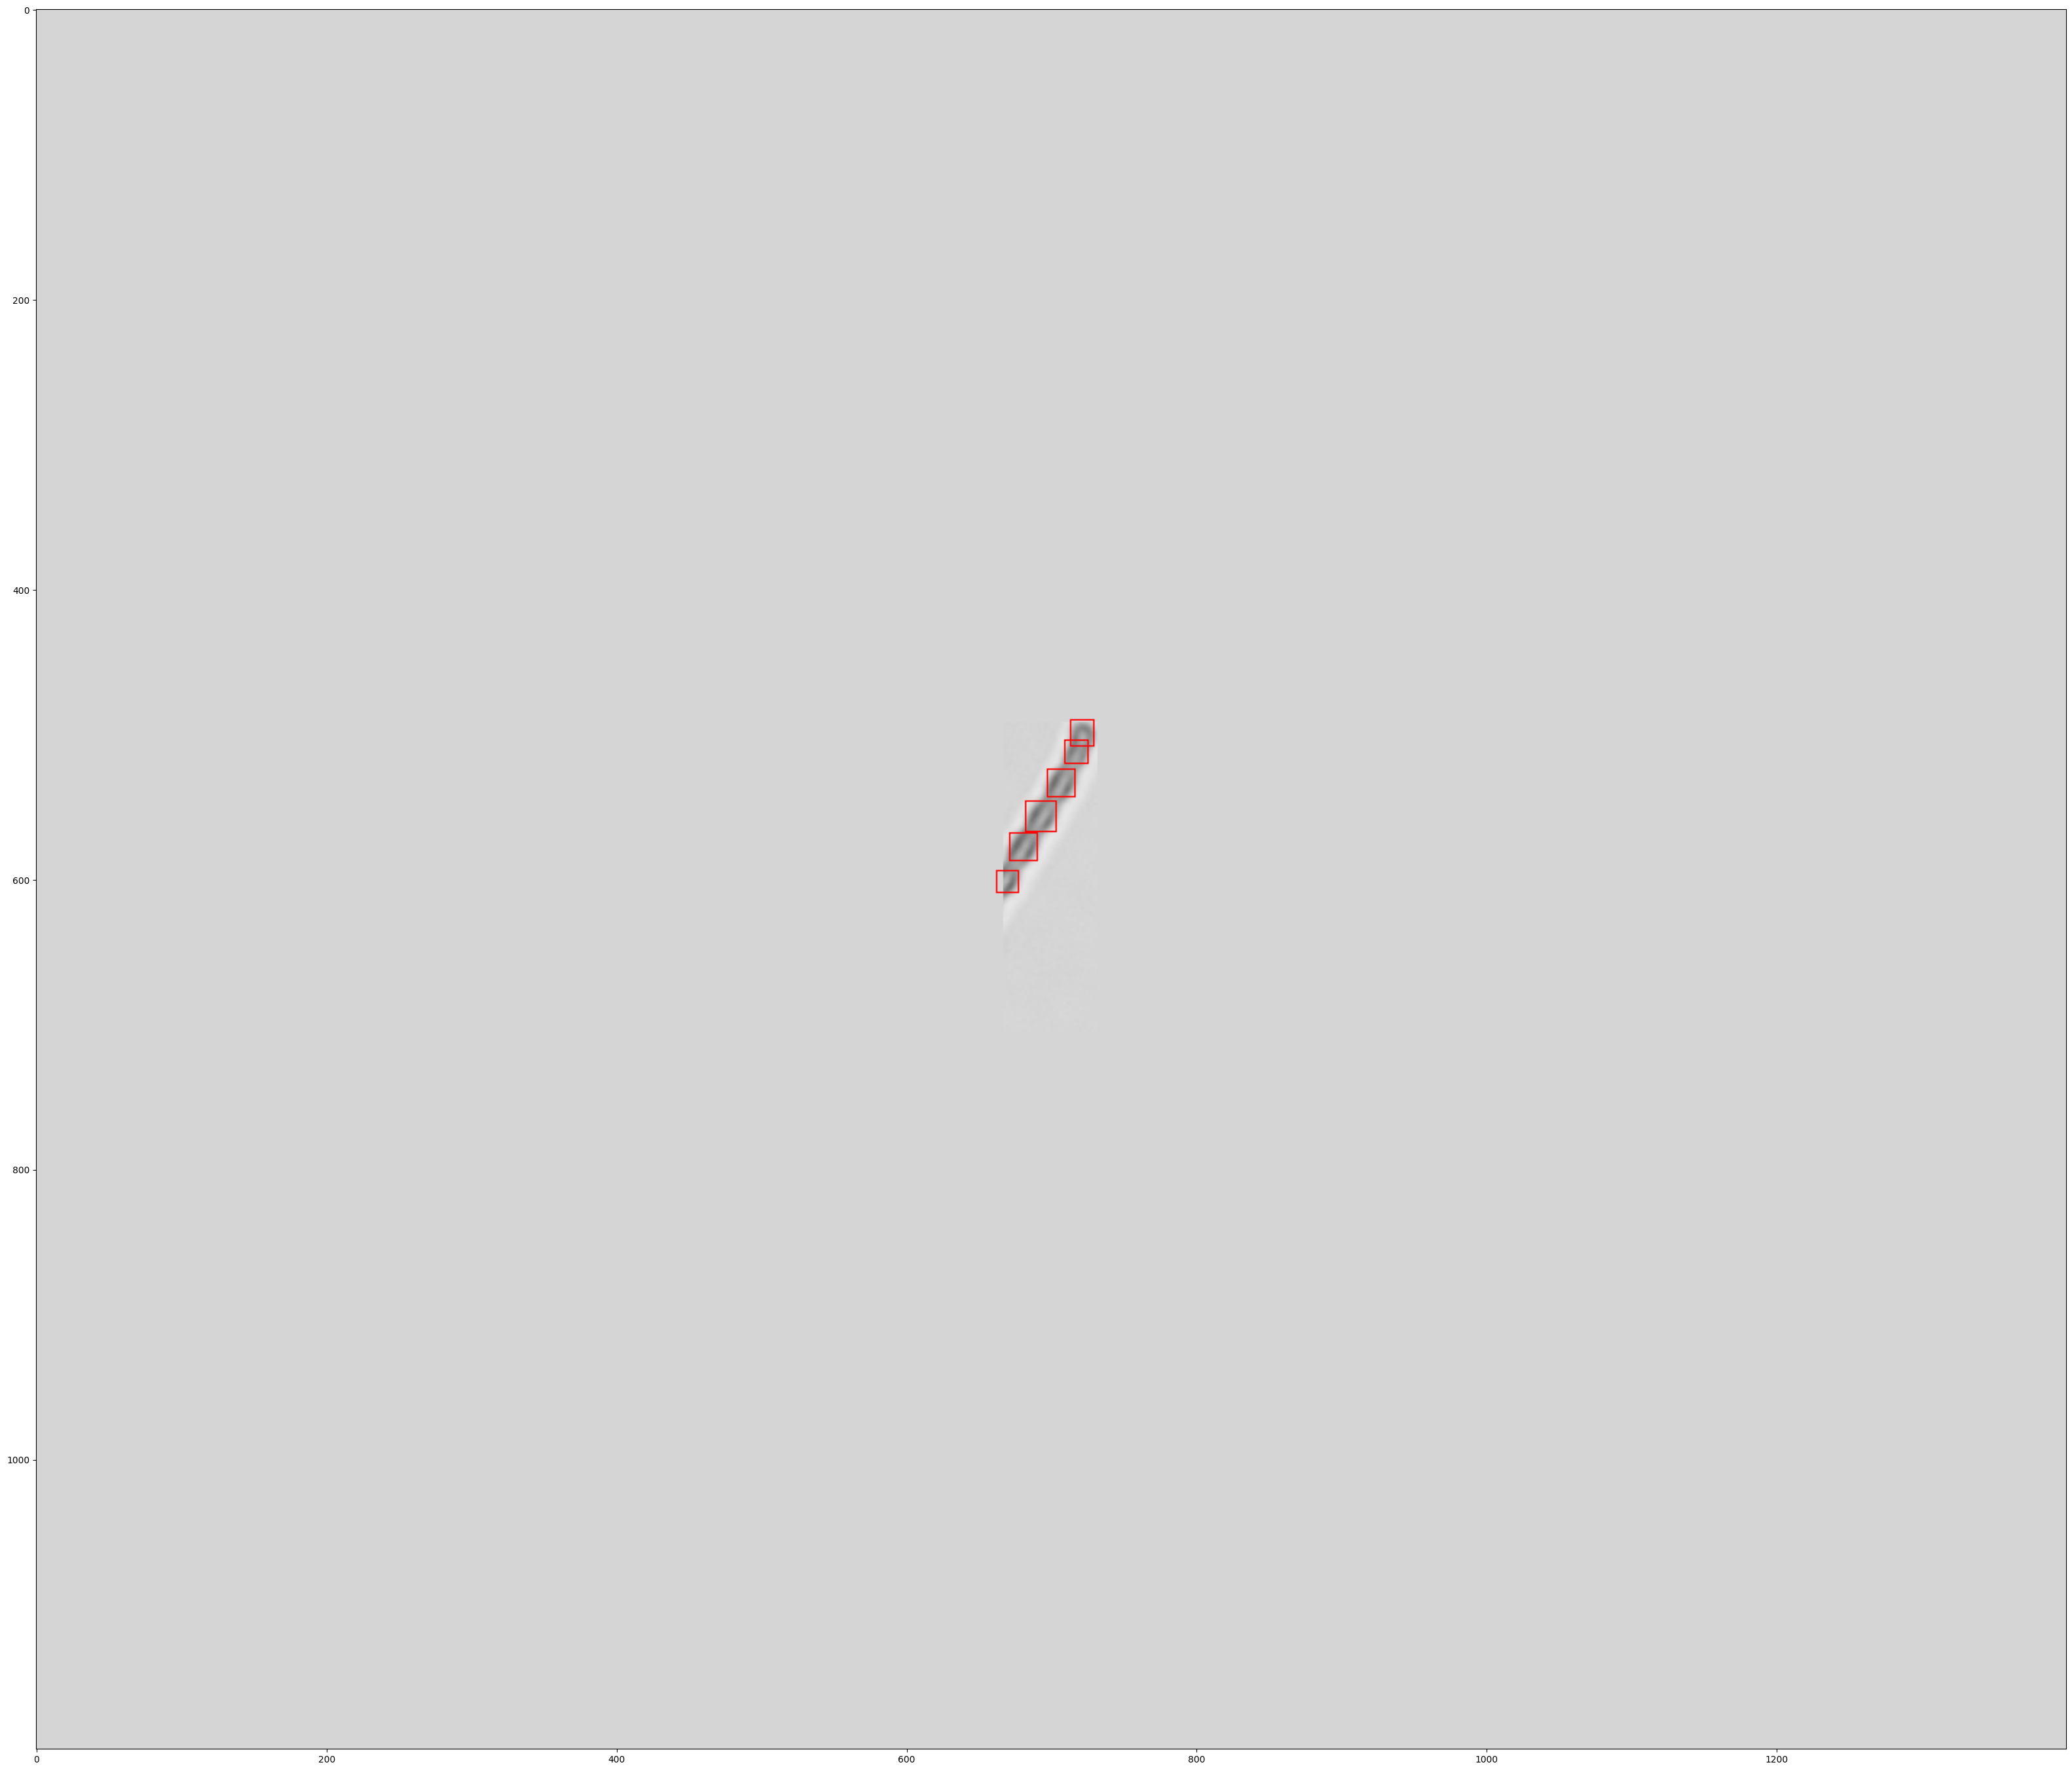

(320, 65, 3)


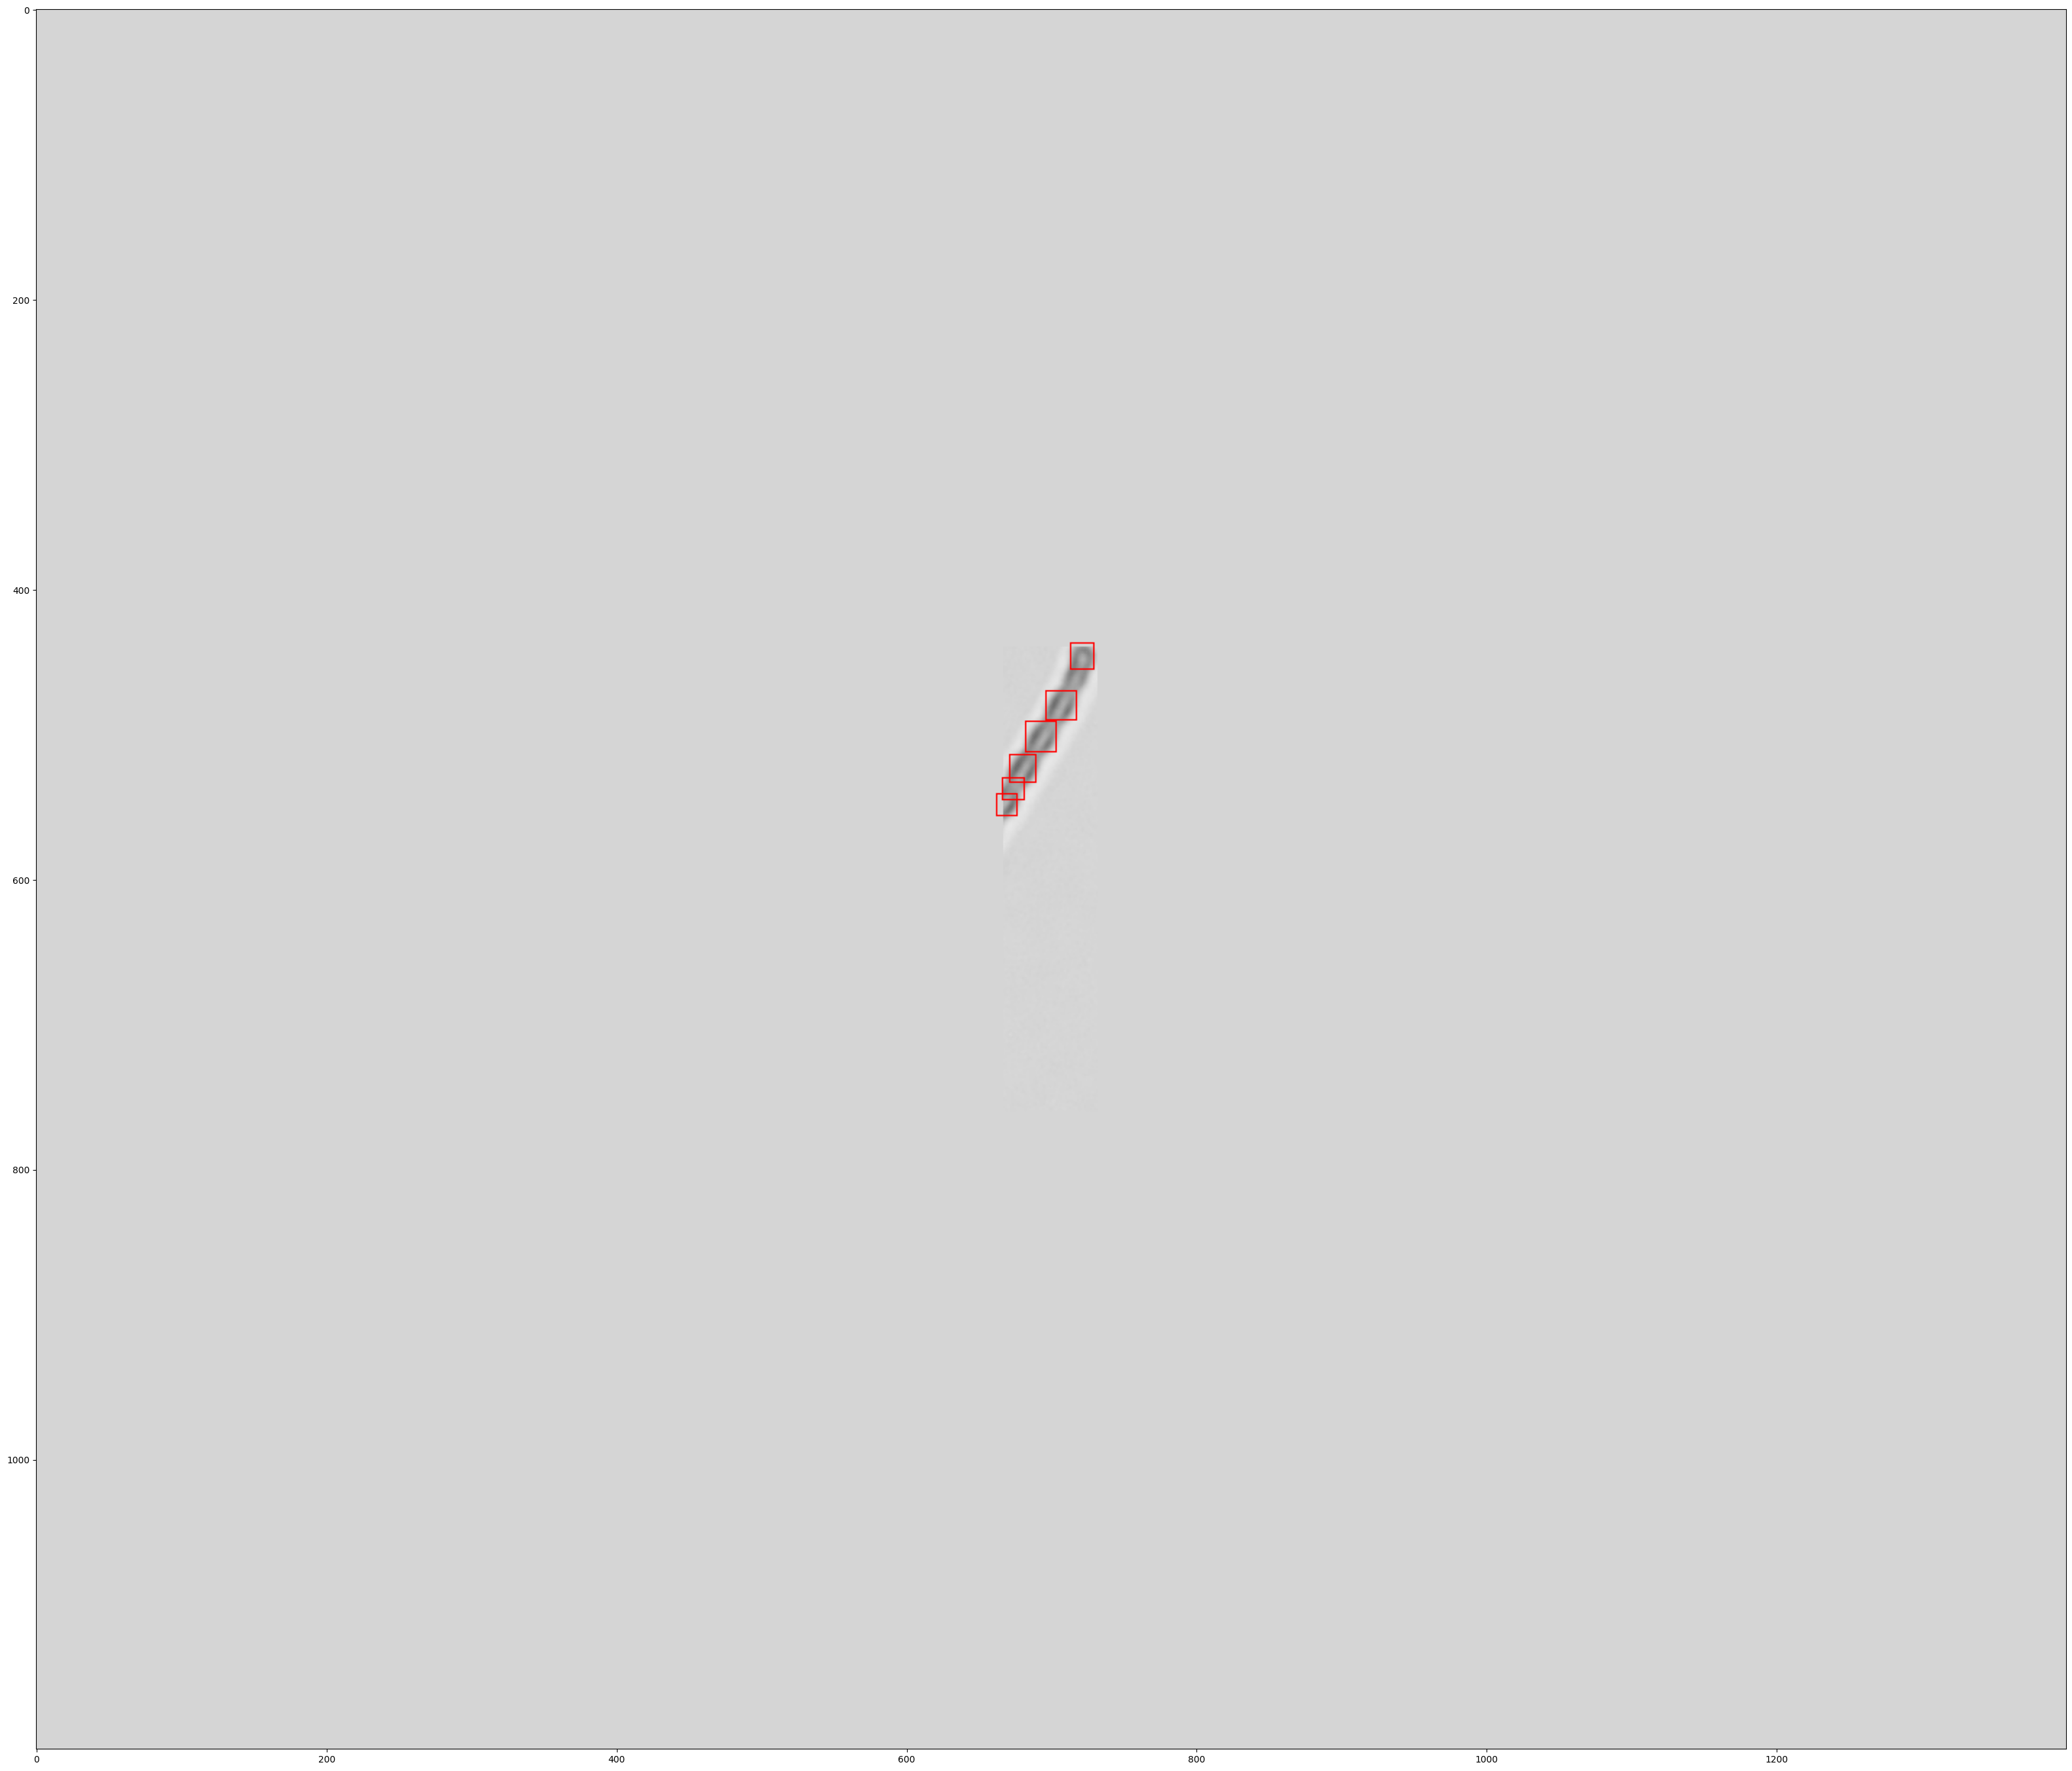

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 10/11 [00:53<00:06,  6.34s/it]

(684, 203, 3)


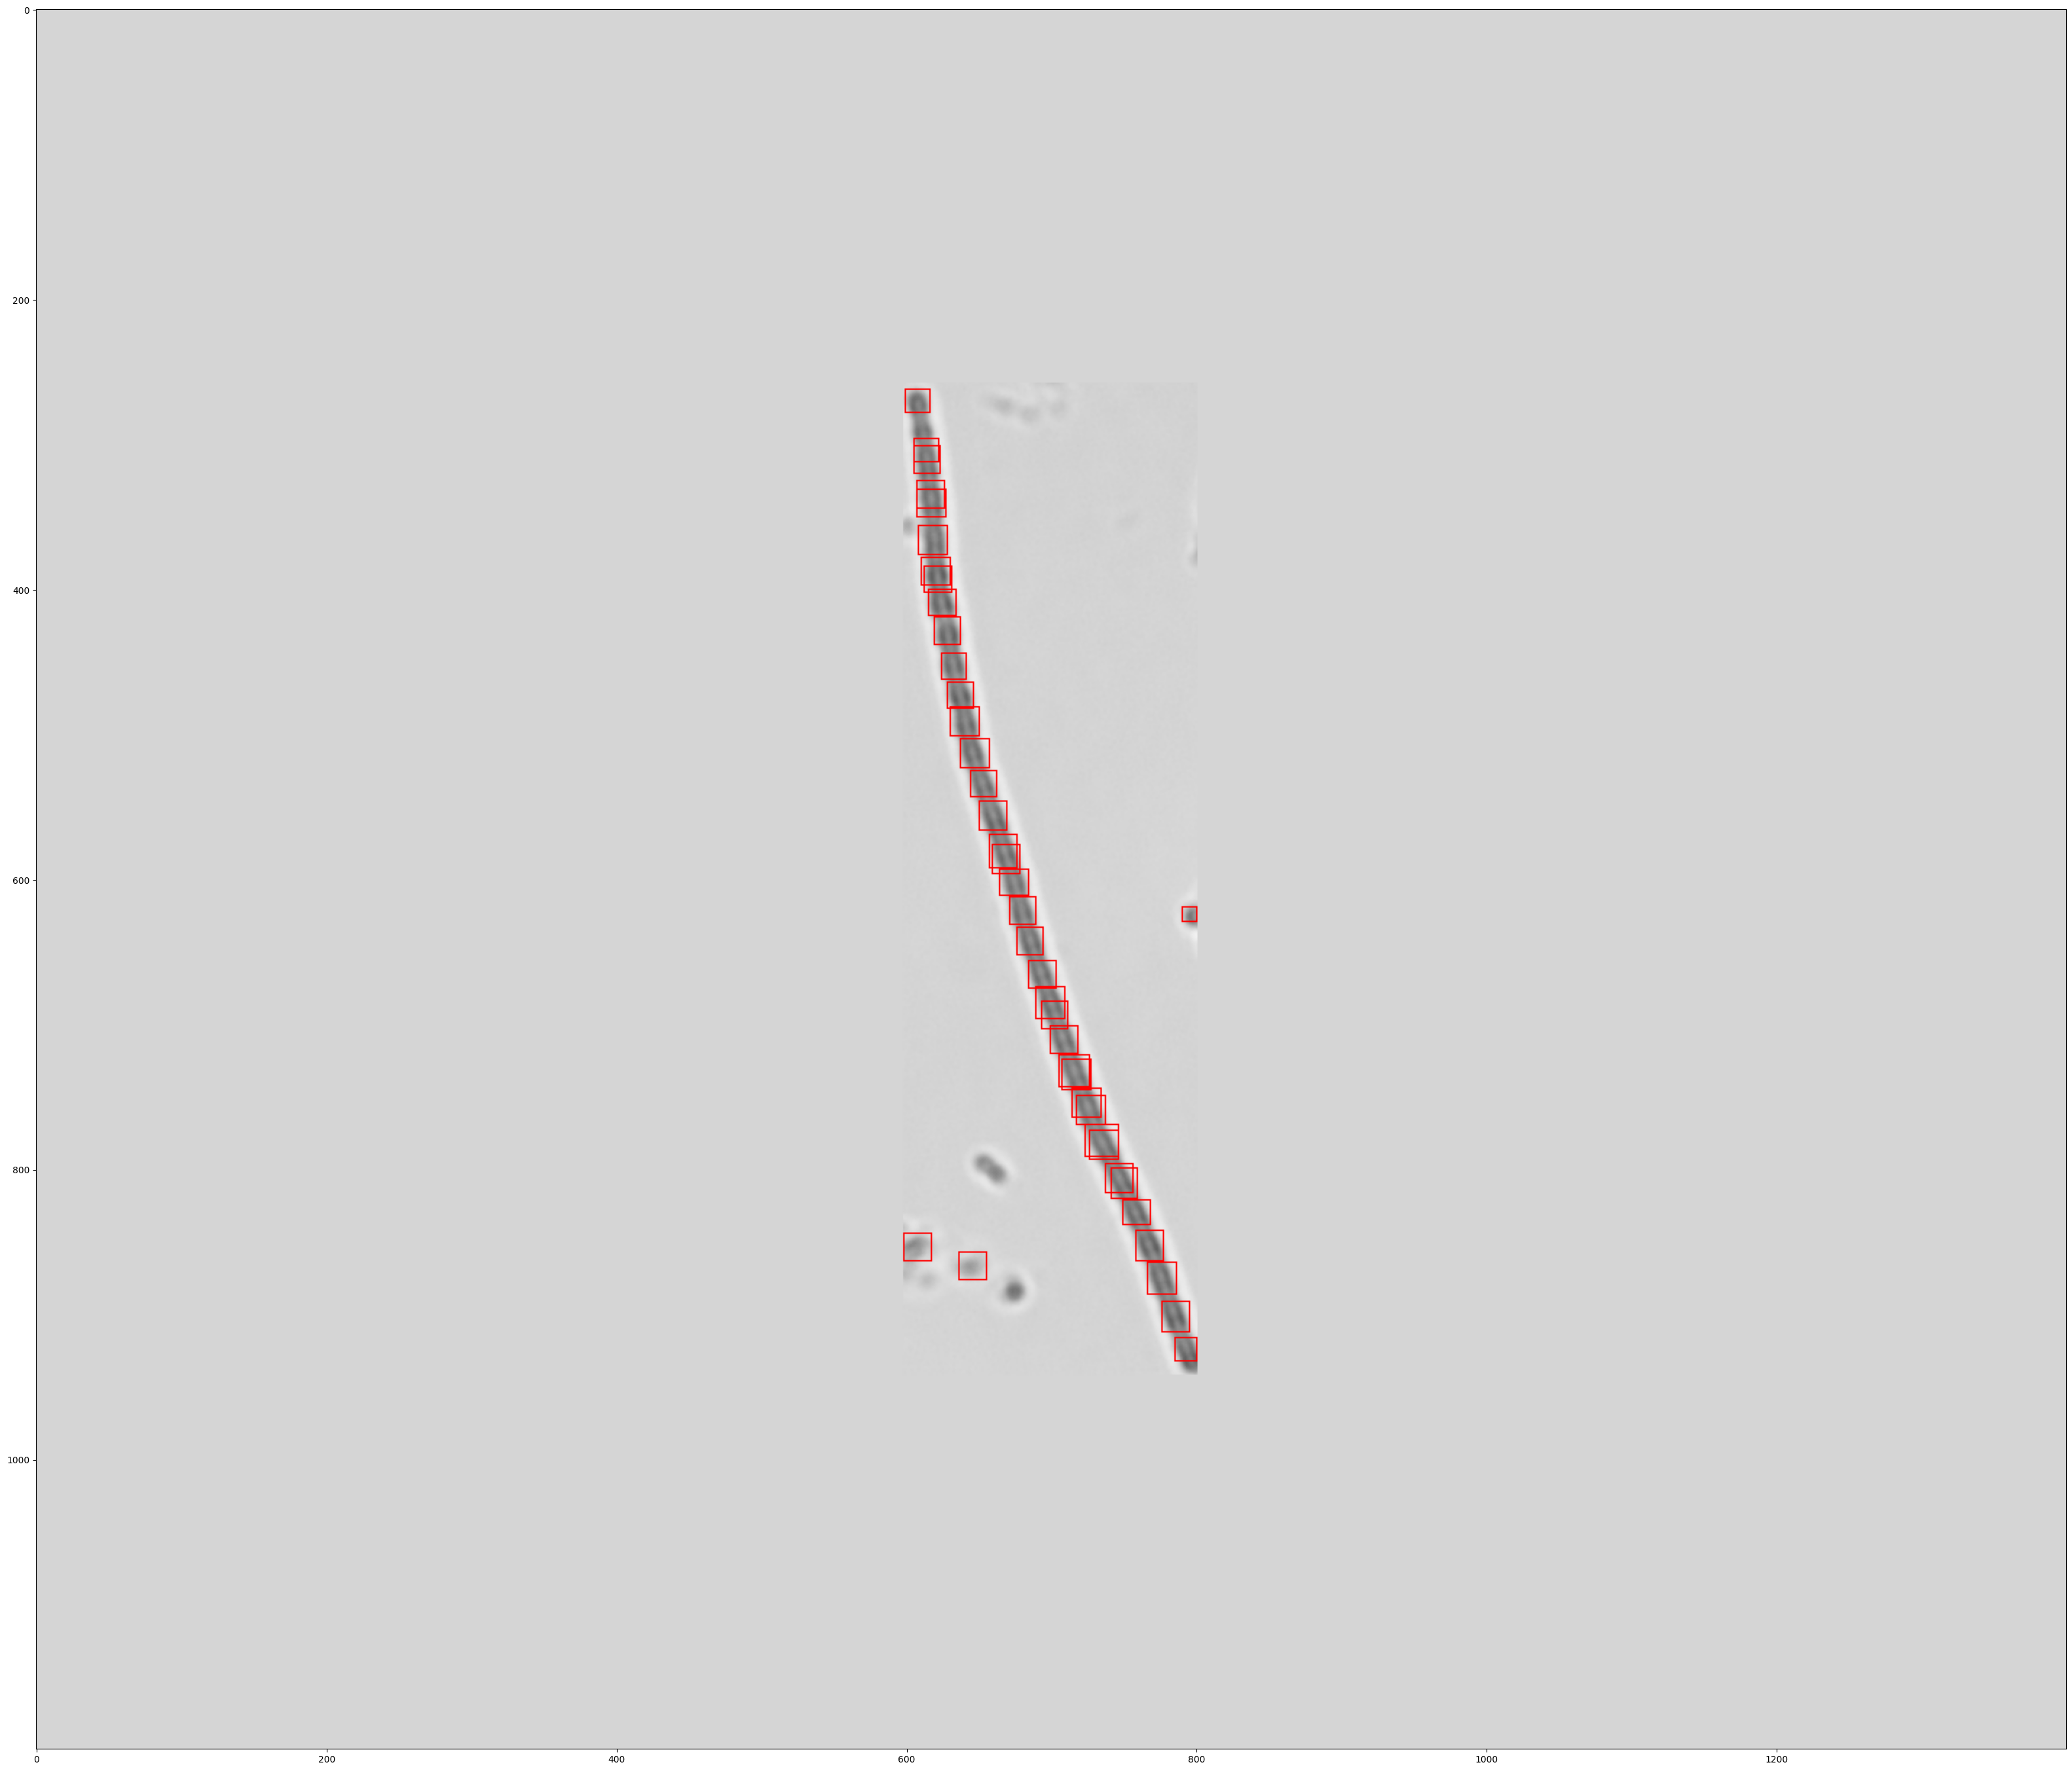

(82, 48, 3)


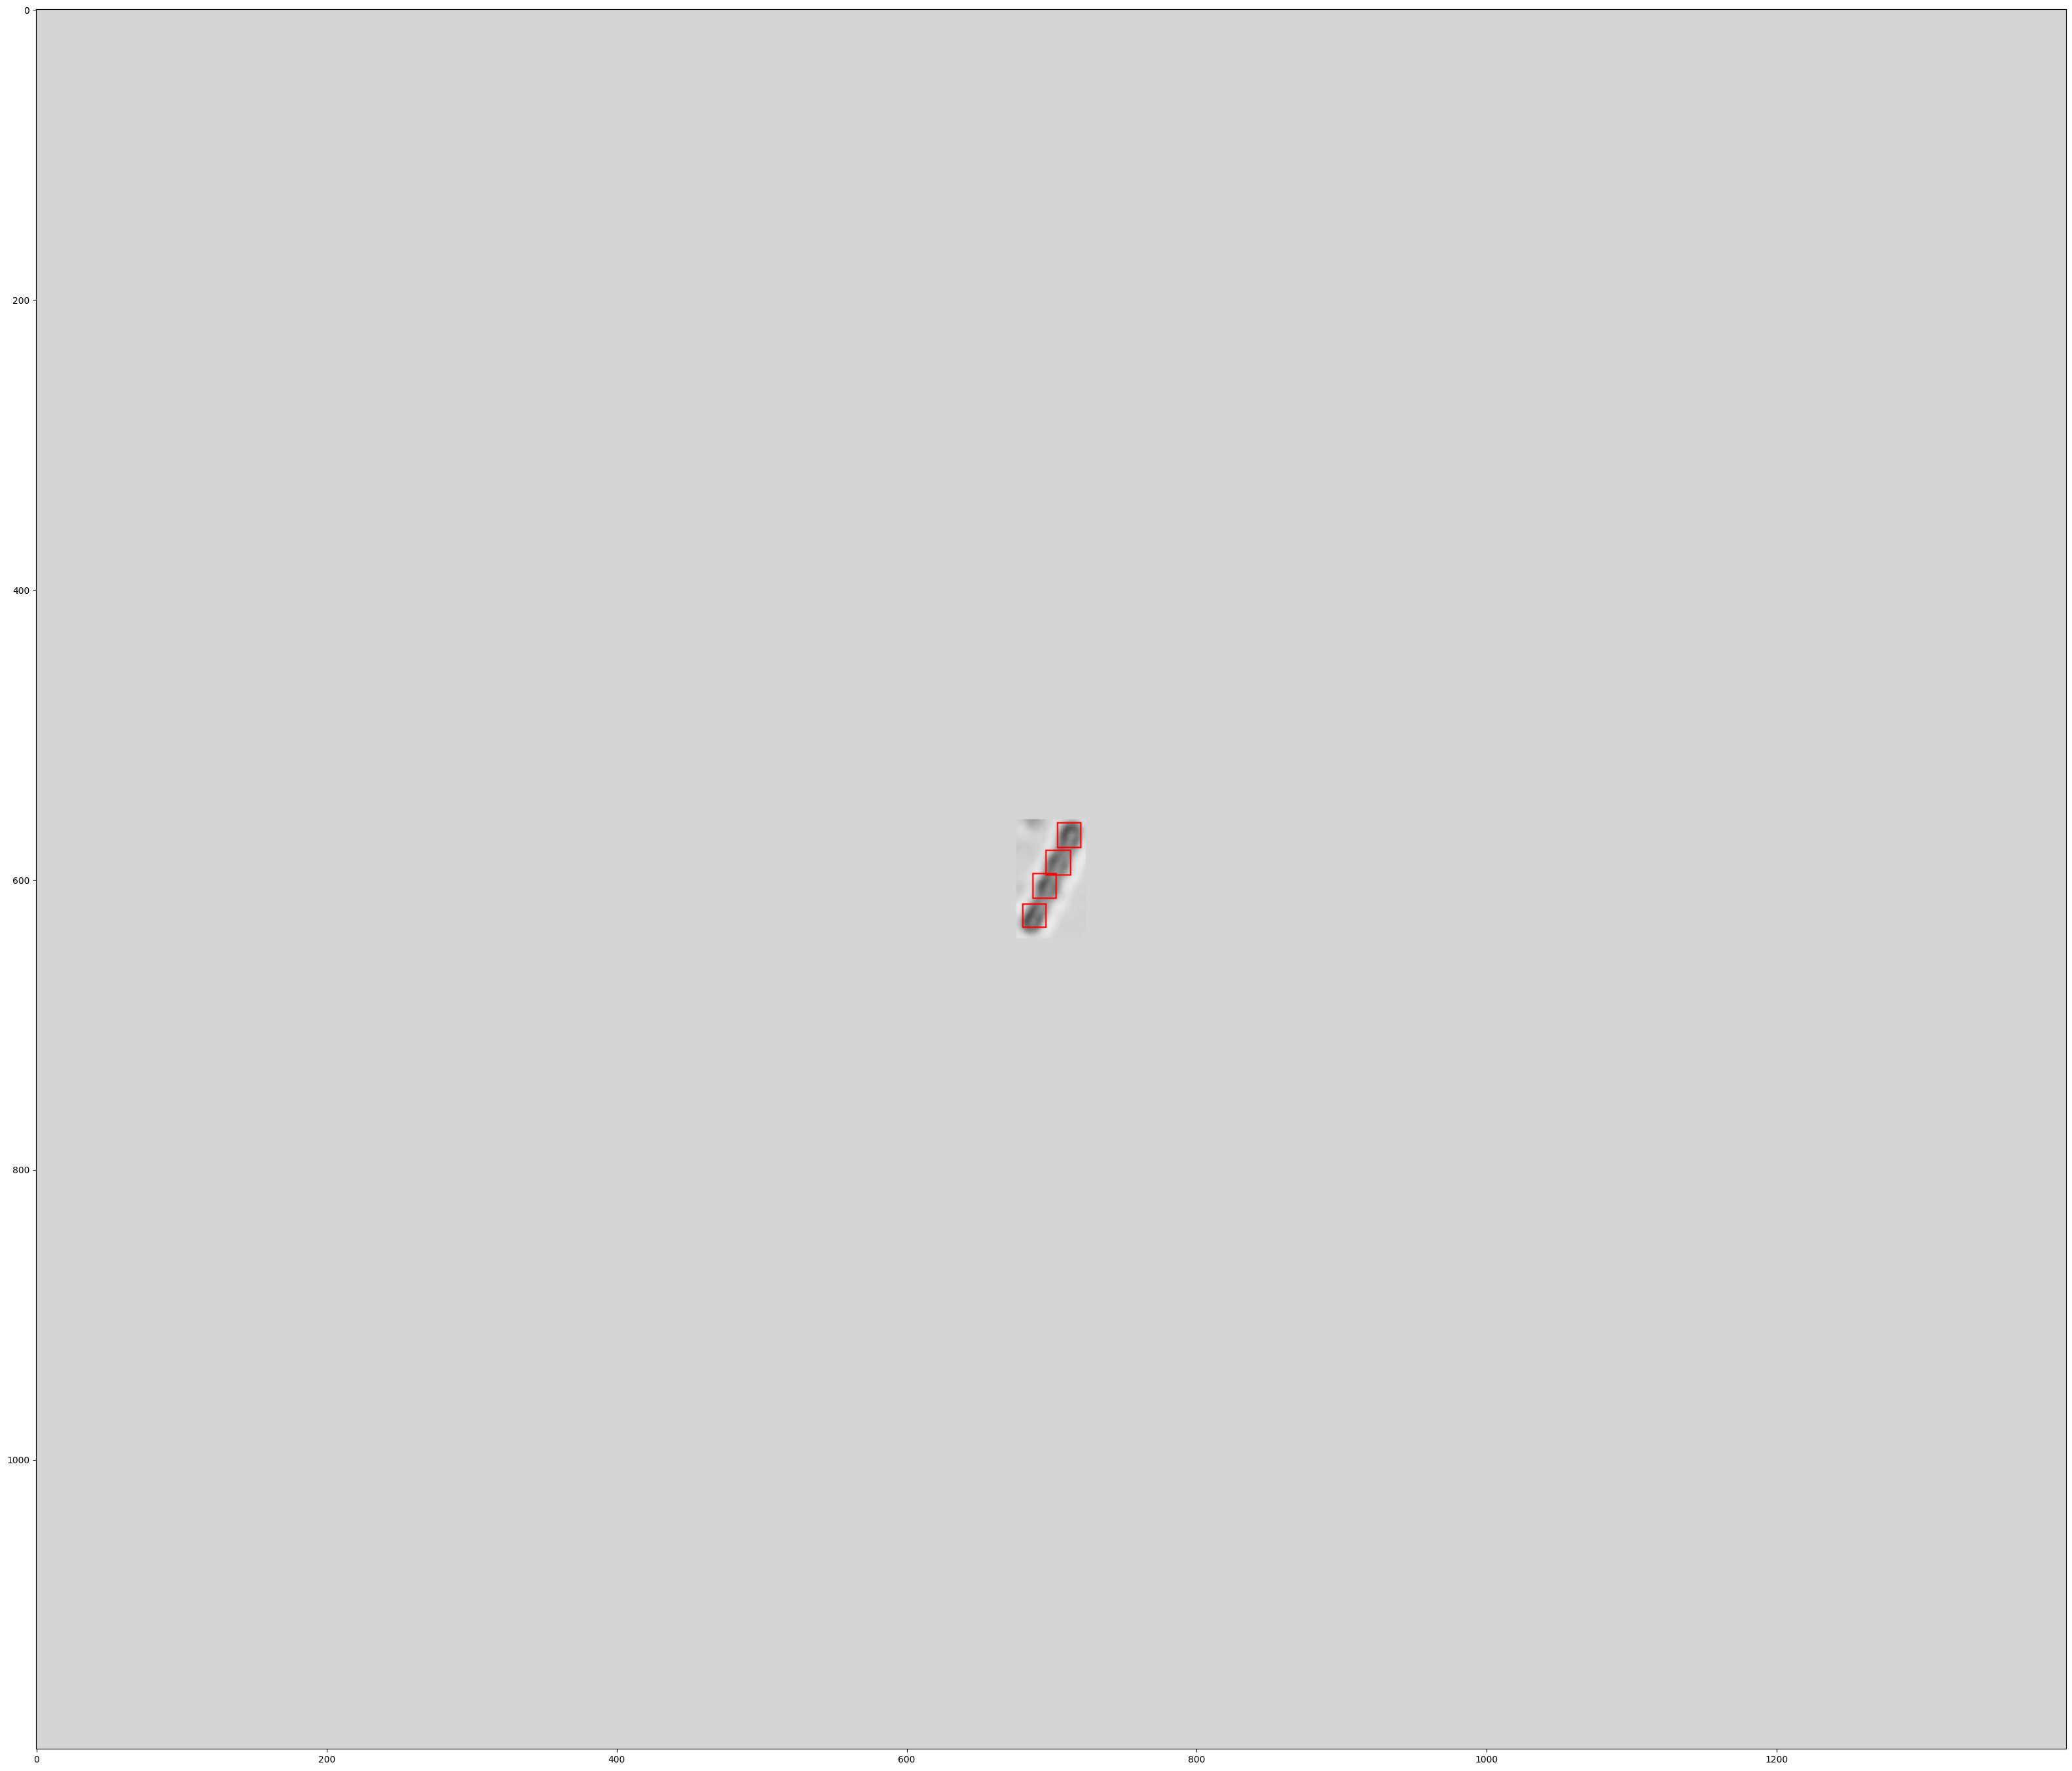

(106, 68, 3)


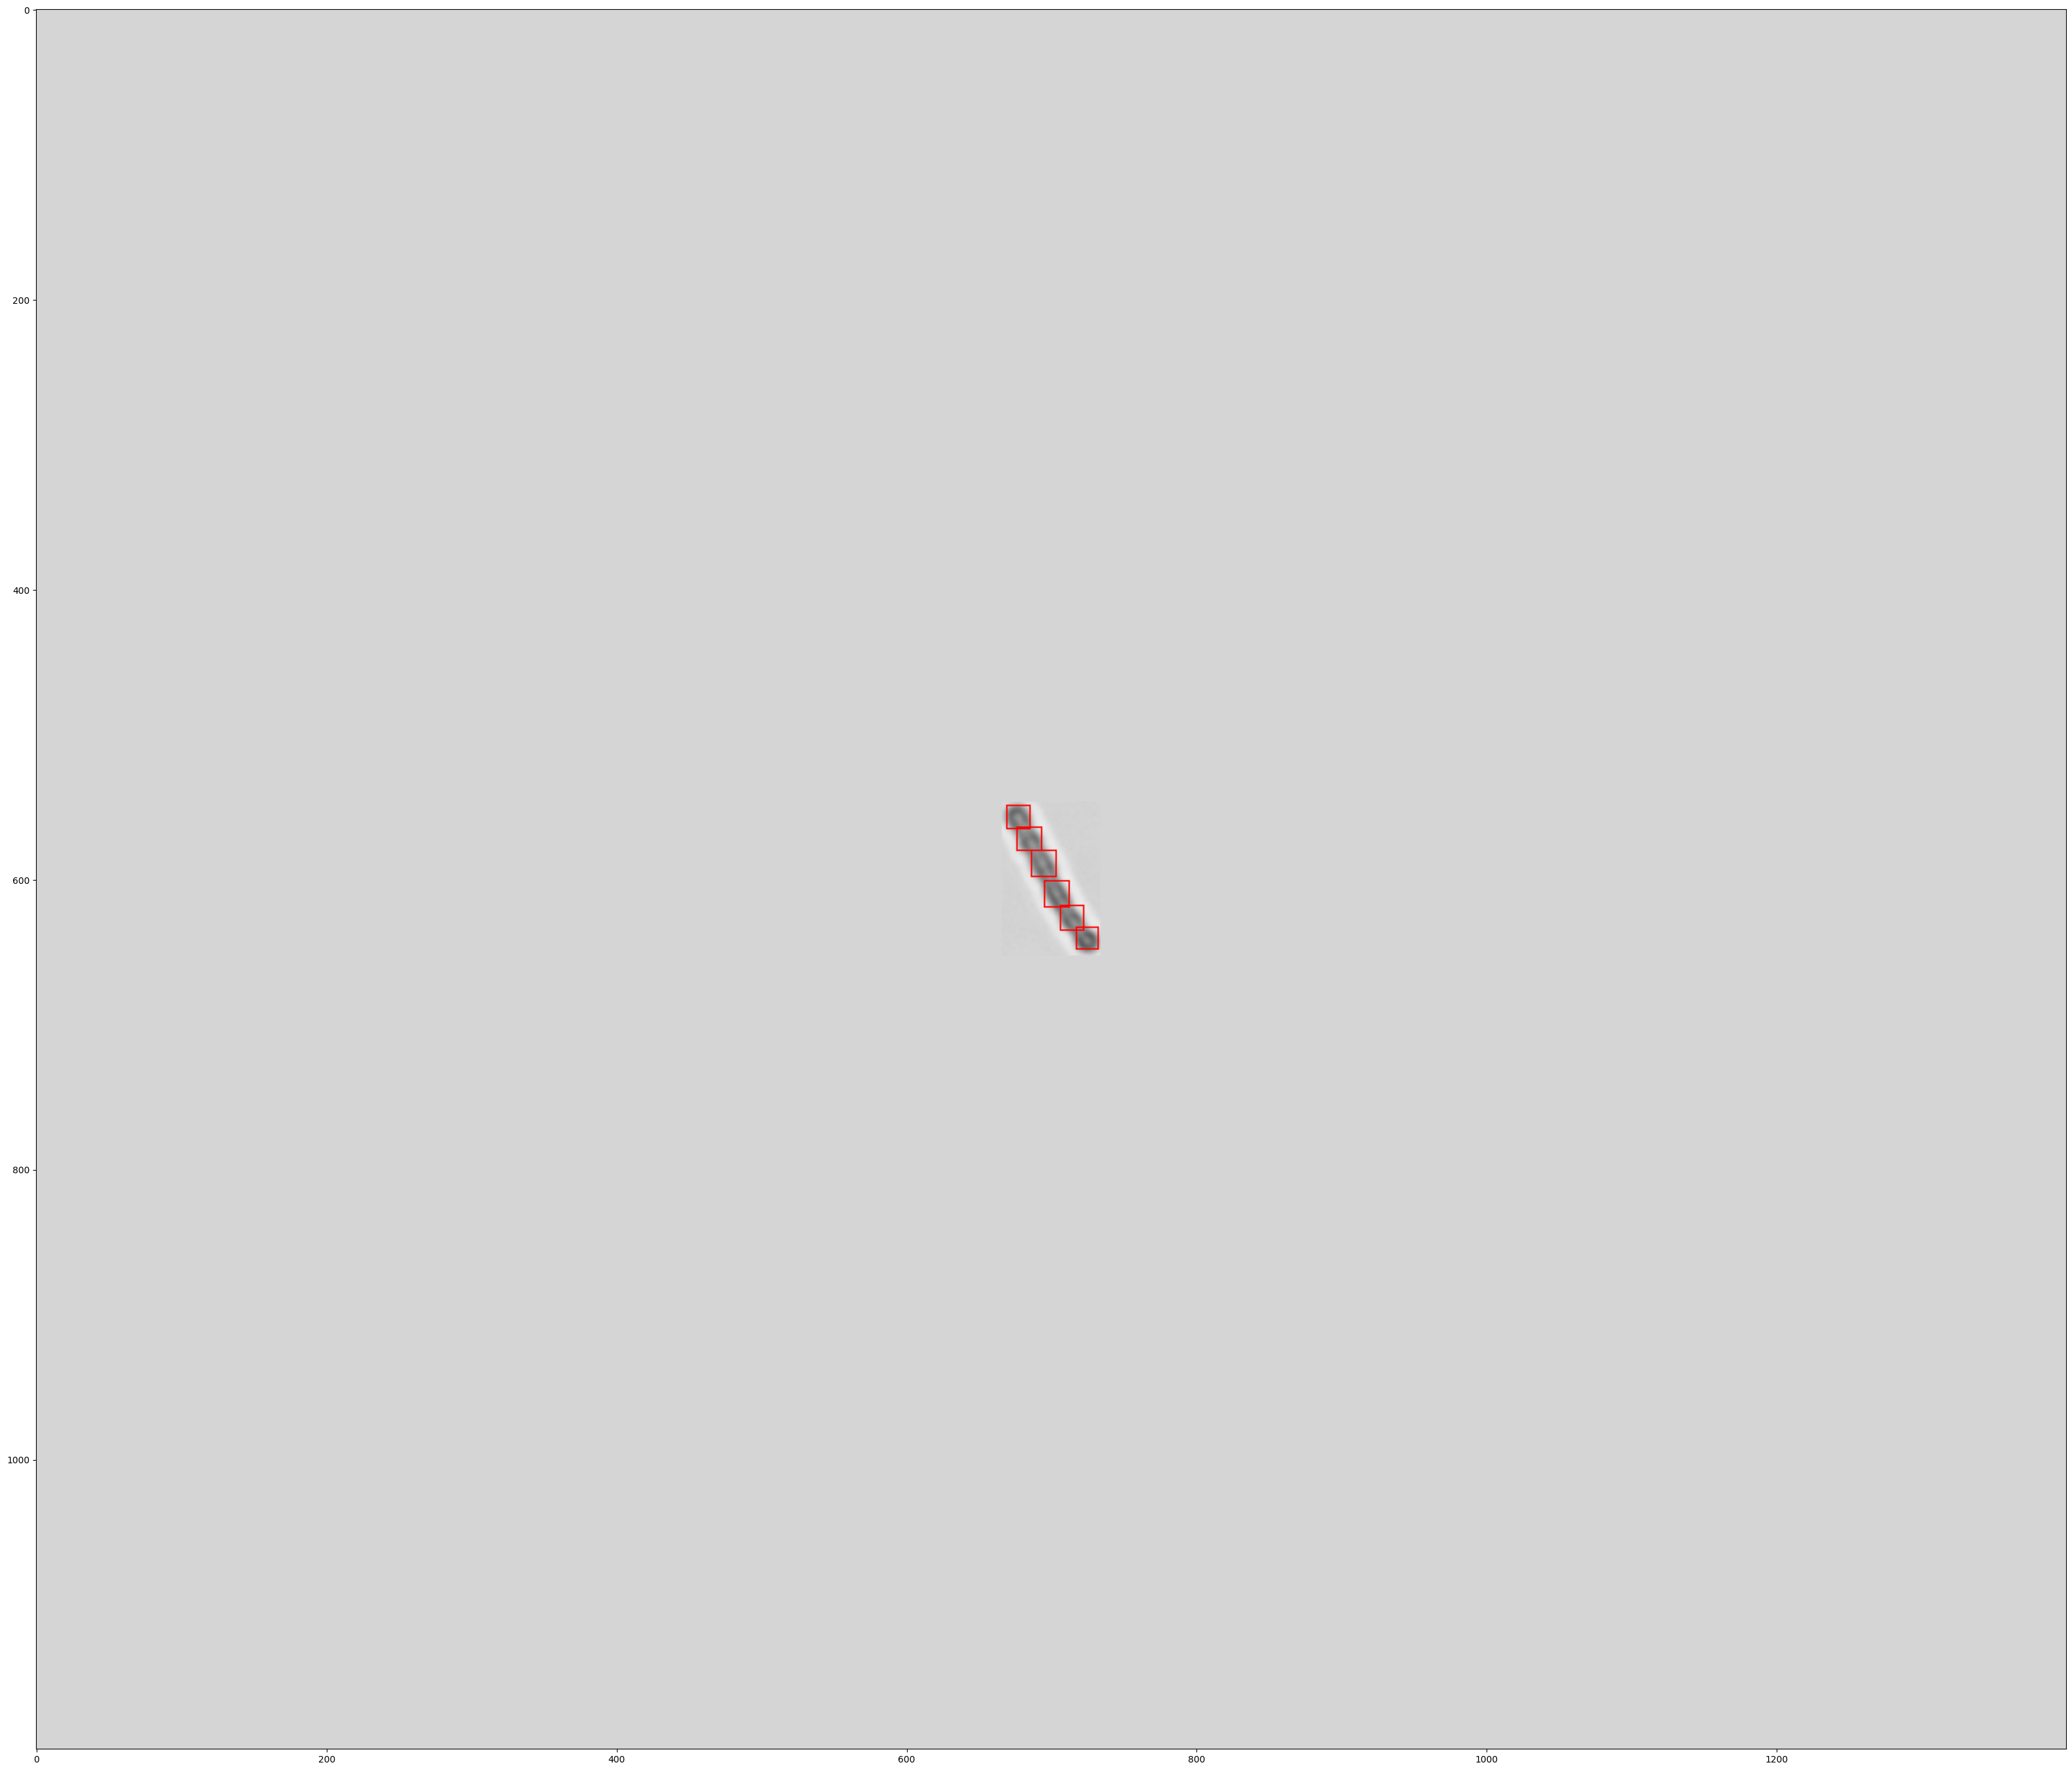

(190, 35, 3)


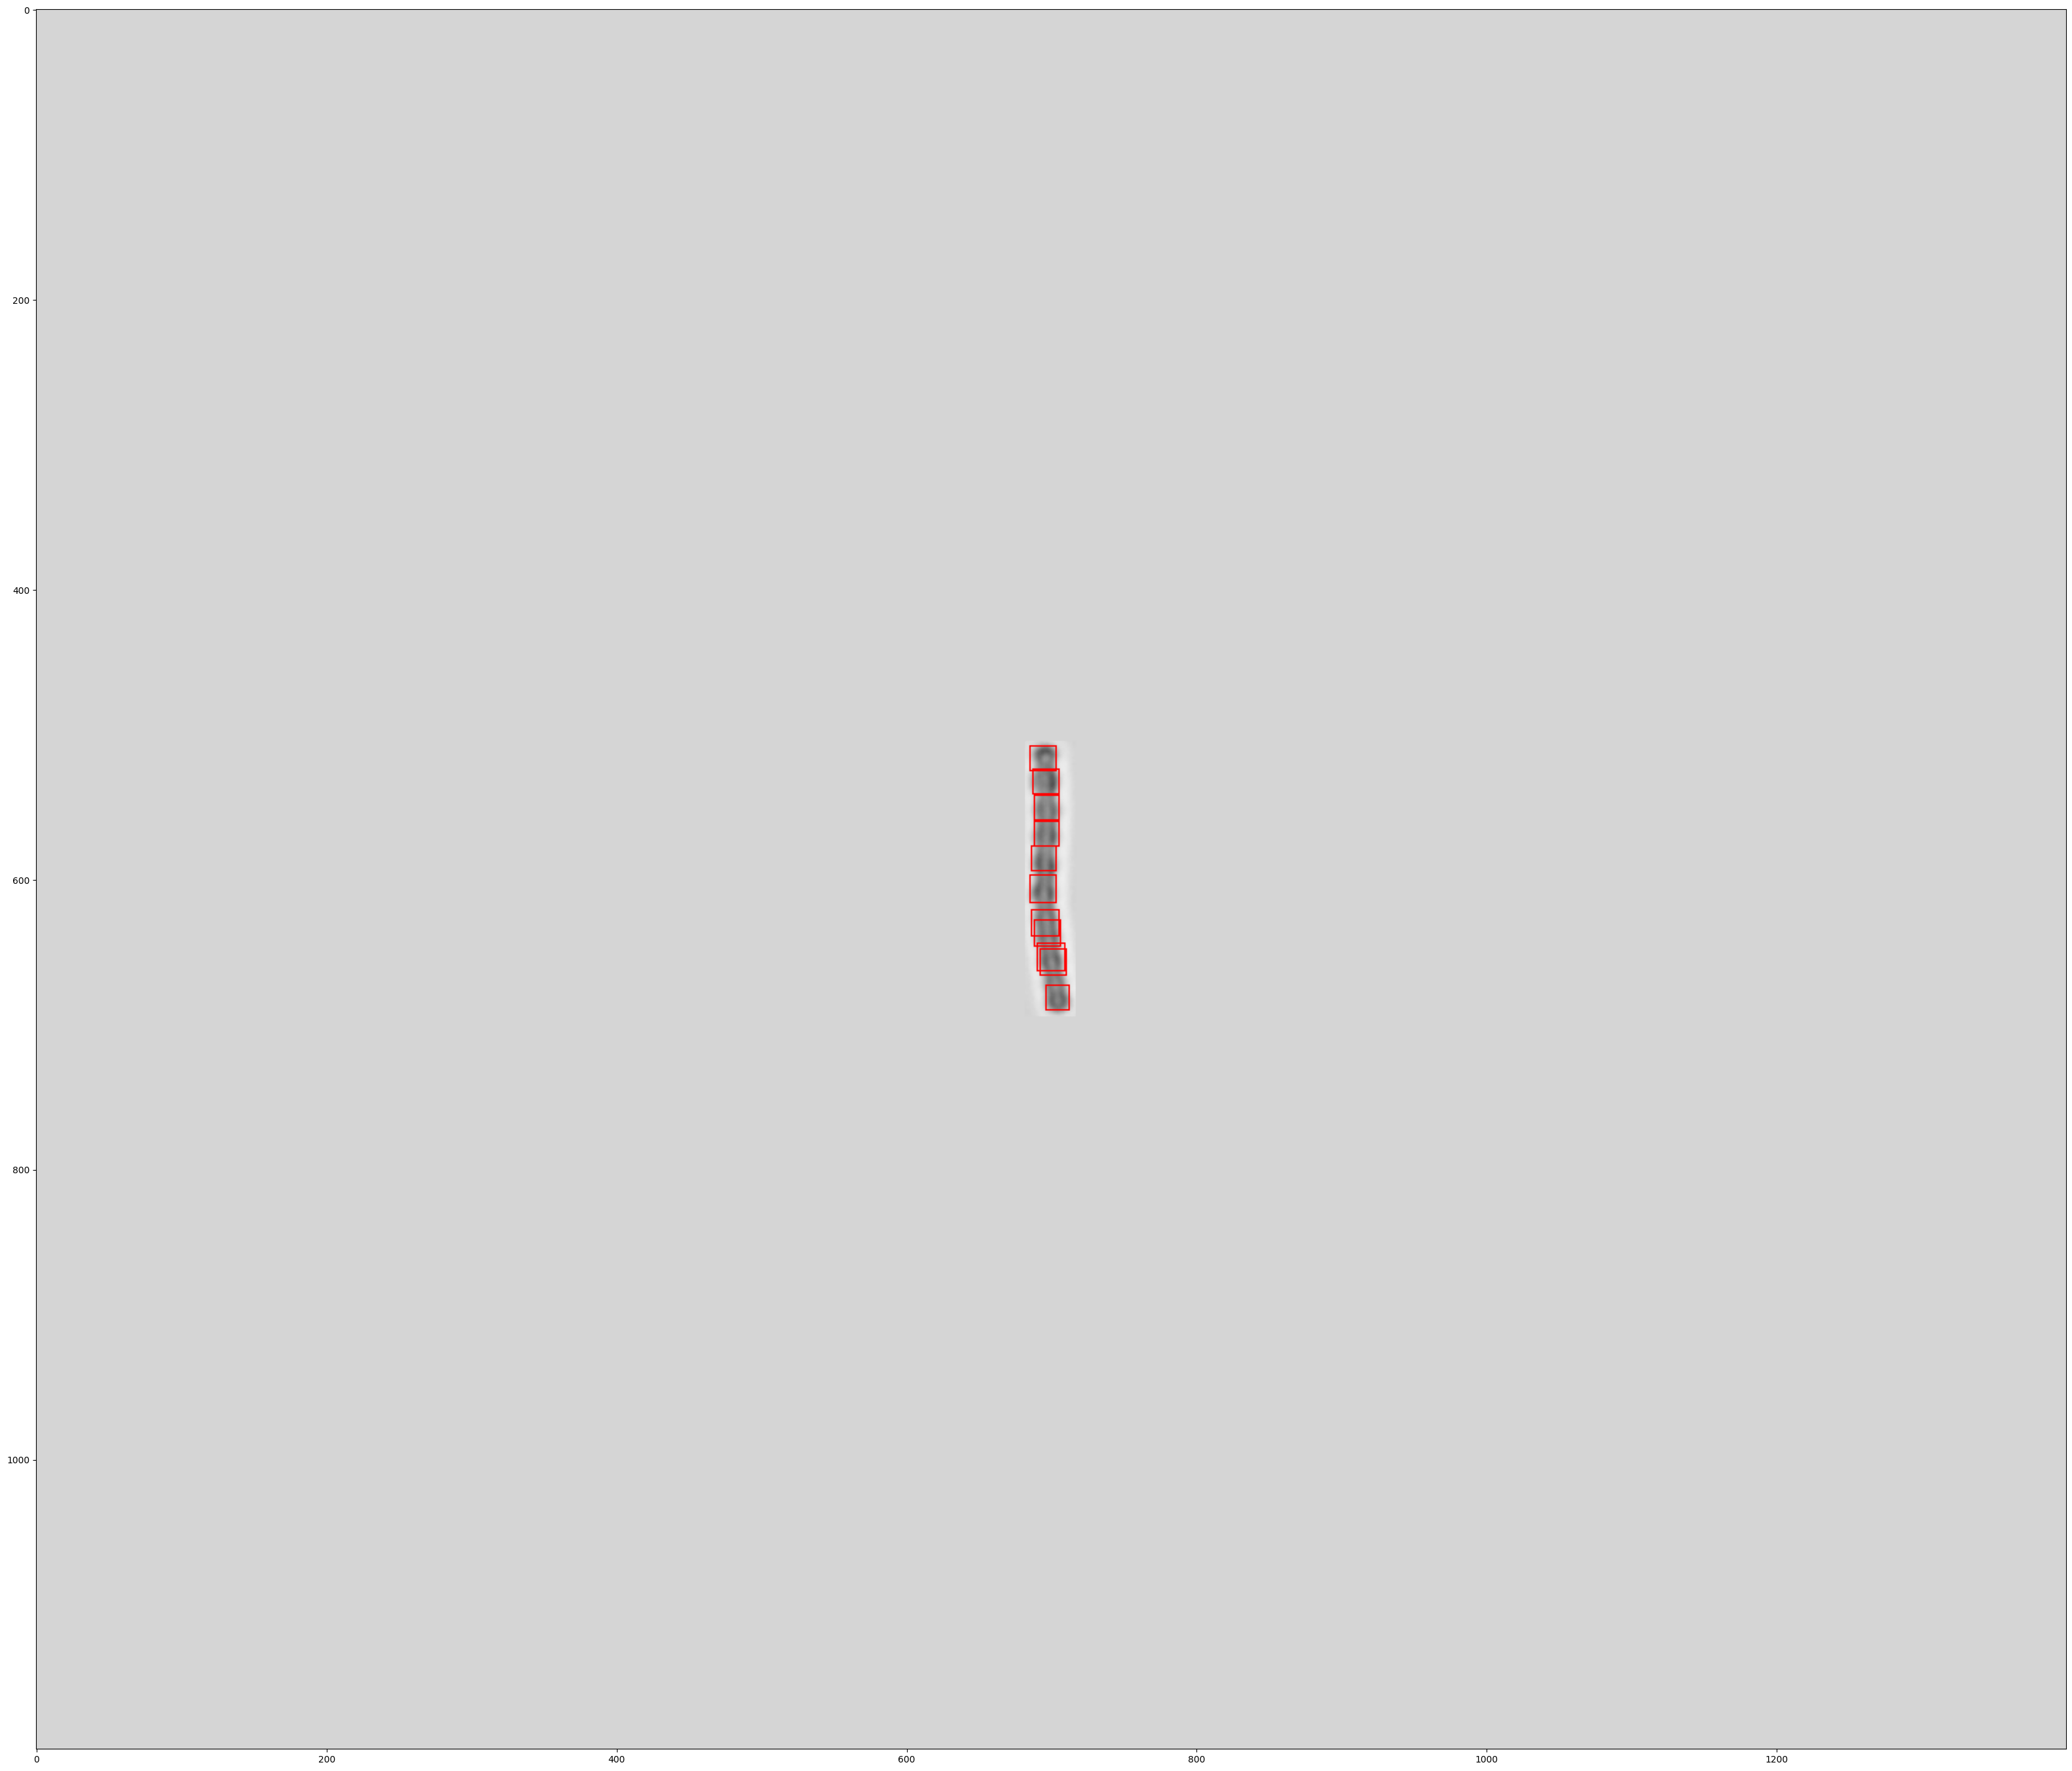

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:59<00:00,  5.41s/it]


Name  Count
0   110.png     23
1   109.png     54
2   106.png     16
3   100.png     64
4   103.png     24
5   107.png     27
6   108.png    244
7   104.png     44
8   105.png      6
9   102.png     61
10  101.png     62

In [43]:
padding_w,padding_h  = 1400,1200
result_list = []
for path_ in tqdm(glob('/home/etriai04/Downloads/Pseudanabaena/valid/images_origin/*')):
    name_ = path_.split('/')[-1]
    img_= cv2.cvtColor(cv2.imread(path_),cv2.COLOR_BGR2GRAY)
    img_= cv2.cvtColor(img_,cv2.COLOR_GRAY2RGB)

    out = stage1_model.predict(img_, conf=0.2, verbose=False)
    # print(out)
    count = 0
    for box_ in list(out[0].boxes.xyxy.detach().cpu().numpy()):
        x1,y1,x2,y2 = [int(i) for i in box_]
        target_= img_[y1:y2,x1:x2,:]
        target_h,target_w = target_.shape[:-1]
        temp_ = np.ones((padding_h,padding_w,3),np.uint8)
        temp_*=213
        print(target_.shape)
        temp_[(padding_h-target_h)//2:(padding_h-target_h)//2+target_h,(padding_w-target_w)//2:(padding_w-target_w)//2+target_w] = target_ #cv2.cvtColor(target_,cv2.COLOR_RGB2GRAY)
        out2 = stage2_model.predict(temp_, conf=0.2, verbose=False)
        count+= len(list(out2[0].boxes.xyxy.detach().cpu().numpy()))
                        
        for box2_ in list(out2[0].boxes.xyxy.detach().cpu().numpy()):
            x3,y3,x4,y4 = [int(i) for i in box2_]
            cv2.rectangle(temp_,(x3,y3),(x4,y4),(255,0,0))
        plt.figure(figsize=(40,40))
        plt.imshow(temp_)
        plt.show()
    result_list.append([name_,count])
df  = pd.DataFrame(result_list,columns=['Name','Count'])
df

In [44]:
df

Name  Count
0   110.png     23
1   109.png     54
2   106.png     16
3   100.png     64
4   103.png     24
5   107.png     27
6   108.png    244
7   104.png     44
8   105.png      6
9   102.png     61
10  101.png     62

In [8]:
df

Name  Count
0   110.png     29
1   109.png     67
2   106.png     16
3   100.png     81
4   103.png     34
5   107.png     28
6   108.png    342
7   104.png     79
8   105.png      6
9   102.png     77
10  101.png     72

In [74]:
(padding_h-target_h)//2, (padding_h-target_h)//2+target_h, (padding_w-target_w)//2, (padding_w-target_w)//2+target_w

(-74, 1040, 215, 1119)

In [77]:
target_h

1114

In [14]:
for path_ in glob('/home/etriai04/Downloads/Pseudanabaena/final_test/B2-1*'):
    out = stage1_model.predict(source=path_, conf=0.01)
    print(out)
    break


image 1/1 /home/etriai04/Downloads/Pseudanabaena/final_test/B2-1.jpg: 640x640 5 pseudanabaenas, 34.2ms
Speed: 17.7ms preprocess, 34.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'pseudanabaena'}
orig_img: array([[[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       ...,

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]],

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [214, 214, 214],
        [214, 214, 214],

'/home/etriai04/Downloads/cell_count_data'